In [1]:
import os
import glob
import shutil

import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

#from pathlib import Path


In [2]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

def label_figure(fig, data_identifier):                                                                                                                                     
    fig.text(0, 1,data_identifier, ha='left', va='top', fontsize=8)    

In [3]:
%matplotlib notebook

# Set source dirs

In [4]:
home_dir = '/n/coxfs01/julianarhee/face-tracking'
project = 'facetracking-jyr-2020-01-25' #'sideface-jyr-2020-01-09'
project_dir = os.path.join(home_dir, project)
video_dir = os.path.join(home_dir, project, 'videos')

In [5]:
rootdir = '/n/coxfs01/2p-data'
eyetracker_dir = os.path.join(rootdir, 'eyetracker_tmp')

In [6]:
analysis_dir = os.path.join(project_dir, 'pose-analysis') # DLC analysis output dir

# Network info

In [7]:

projectid = 'facetrackingJan25'
project_dir = os.path.join(home_dir, project)

scorer='DLC_resnet50'
iteration = 1
shuffle = 1
trainingsetindex=0
videotype='.mp4'

snapshot = 391800 #430200 #20900


DLCscorer = '%s_%sshuffle%i_%i' % (scorer, projectid, shuffle, snapshot)
print("Extracting results from scorer: %s" % DLCscorer)

Extracting results from scorer: DLC_resnet50_facetrackingJan25shuffle1_391800


In [8]:
glob.glob(os.path.join(project_dir, 'dlc-models', 'iteration-%i' % iteration,\
                      '%s-trainset95shuffle%i' % (projectid, shuffle), 'train', 'snapshot-*.meta'))


['/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391500.meta',
 '/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391400.meta',
 '/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391600.meta',
 '/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391700.meta',
 '/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391800.meta']

# Get aggregate data

In [9]:
from pipeline.python.classifications import get_dataset_stats as gd
import cPickle as pkl

options = ['-t', 'traces001']
optsE = gd.extract_options(options)

rootdir = optsE.rootdir
aggregate_dir = optsE.aggregate_dir
fov_type = optsE.fov_type
traceid = optsE.traceid
response_type = 'dff'
print aggregate_dir

sdata_fpath = os.path.join(aggregate_dir, 'dataset_info.pkl')
if os.path.exists(sdata_fpath):
    with open(sdata_fpath, 'rb') as f:
        sdata = pkl.load(f)
else:
    sdata = gd.aggregate_session_info(traceid=optsE.traceid, trace_type=optsE.trace_type, 
                                       state=optsE.state, fov_type=optsE.fov_type, 
                                       visual_areas=optsE.visual_areas,
                                       blacklist=optsE.blacklist, 
                                       rootdir=optsE.rootdir)
    with open(sdata_fpath, 'wb') as f:
        pkl.dump(sdata, f, protocol=pkl.HIGHEST_PROTOCOL)


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/get_dataset_stats.py:17: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/juliana

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/rois/utils.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/julianarhee/anaconda2/envs/pipe

/n/coxfs01/julianarhee/aggregate-visual-areas


## Only look at blobs for now

In [10]:
curr_exp = 'blobs'
dsets = sdata[sdata['experiment']==curr_exp].reset_index()


In [11]:
dsets.head()

index animalid experiment            fov   session visual_area
0      2    JC084      blobs  FOV1_zoom2p0x  20190522          V1
1      6    JC084      blobs  FOV1_zoom2p0x  20190525          Lm
2     12    JC091      blobs  FOV1_zoom2p0x  20190627          Lm
3     16    JC091      blobs  FOV1_zoom2p0x  20191008          Li
4     22    JC091      blobs  FOV1_zoom2p0x  20190607          Li

In [12]:
fovnums = [int(fv.split('_')[0][3:]) for fv in dsets['fov']]
dsets['fovnum'] = fovnums


In [13]:
dsets.head()

index animalid experiment            fov   session visual_area  fovnum
0      2    JC084      blobs  FOV1_zoom2p0x  20190522          V1       1
1      6    JC084      blobs  FOV1_zoom2p0x  20190525          Lm       1
2     12    JC091      blobs  FOV1_zoom2p0x  20190627          Lm       1
3     16    JC091      blobs  FOV1_zoom2p0x  20191008          Li       1
4     22    JC091      blobs  FOV1_zoom2p0x  20190607          Li       1

In [14]:
dsets.index

RangeIndex(start=0, stop=37, step=1)

## Only analyze datasets w. DLC extracted

In [15]:
incl_skeys = list(set([os.path.split(f)[-1].split('_f')[0] for f in glob.glob(os.path.join(analysis_dir, '*.h5'))]))

incl_sessions = ['_'.join(s.split('_')[0:2]) for s in incl_skeys]
incl_ixs = [i for i in dsets.index.tolist() if '_'.join([dsets.loc[i]['session'], dsets.loc[i]['animalid']]) in incl_sessions]

In [16]:
dsets = dsets.iloc[incl_ixs]

In [17]:
dsets.groupby(['visual_area']).count()


index  animalid  experiment  fov  session  fovnum
visual_area                                                   
Li              11        11          11   11       11      11
Lm              11        11          11   11       11      11
V1              10        10          10   10       10      10

# Functions

In [18]:
import json
from pipeline.python.classifications import experiment_classes as util
import scipy.stats as spstats

In [19]:
class struct():
    pass

def subtract_condition_mean(neuraldata, labels, included_trials):
    
    # Remove excluded trials and Calculate neural residuals
    trial_configs = pd.DataFrame(np.vstack([g['config'].iloc[0]\
                                        for trial, g in labels.groupby(['trial']) \
                                           if int(trial[5:]) in included_trials]), columns=['config']) # trials should be 1-indexed
    trial_configs = trial_configs.loc[included_trial_ixs]
    
    # Do mean subtraction for neural data
    residuals_neural = neuraldata.copy()
    for c, g in trial_configs.groupby(['config']):
        residuals_neural.loc[g.index] = neuraldata.loc[g.index] - neuraldata.loc[g.index].mean(axis=0)

    return residuals_neural


In [20]:
# body feature extraction
def get_dists_between_bodyparts(bp1, bp2, df, DLCscorer=None):

    if DLCscorer is not None:
        coords1 = [np.array([x, y]) for x, y, in zip(df[DLCscorer][bp1]['x'].values, df[DLCscorer][bp1]['y'].values)]
        coords2 = [np.array([x, y]) for x, y, in zip(df[DLCscorer][bp2]['x'].values, df[DLCscorer][bp2]['y'].values)]
    else:
        coords1 = [np.array([x, y]) for x, y, in zip(df[bp1]['x'].values, df[bp1]['y'].values)]
        coords2 = [np.array([x, y]) for x, y, in zip(df[bp2]['x'].values, df[bp2]['y'].values)]

    dists = np.array([np.linalg.norm(c1-c2) for c1, c2 in zip(coords1, coords2)])
    return dists


def calculate_pupil_metrics(dlc_outfile, filtered=False, threshold=0.99):

    bodyparts = ['pupilT', 'pupilB', 'pupilL', 'pupilR', 'cornealR']

    df = pd.read_hdf(dlc_outfile)
    if df.shape[0] < 5: # sth wrong
        return None, None
    
    filtdf = df.copy()
    filtdf = filtdf[DLCscorer][bodyparts][filtdf[DLCscorer][bodyparts] >= threshold].dropna()
    kept_ixs = filtdf.index.tolist()

    if filtered:
        pupil_dists_major = get_dists_between_bodyparts('pupilT', 'pupilB', filtdf, DLCscorer=None)
        pupil_dists_minor = get_dists_between_bodyparts('pupilL', 'pupilR', filtdf, DLCscorer=None)
    else:
        pupil_dists_major = get_dists_between_bodyparts('pupilT', 'pupilB', df, DLCscorer=DLCscorer)
        pupil_dists_minor = get_dists_between_bodyparts('pupilL', 'pupilR', df, DLCscorer=DLCscorer)

    if not filtered:
        #print("Replacing bad vals")
        replace_ixs = np.array([i for i in np.arange(0, df.shape[0]) if i not in kept_ixs])
        if len(replace_ixs) > 0:
            pupil_dists_major[replace_ixs] = np.nan
            pupil_dists_minor[replace_ixs] = np.nan

        
    return pupil_dists_major, pupil_dists_minor



def calculate_snout_metrics(dlc_outfile, filtered=False, threshold=.99999999):
    from shapely import geometry

    #bodyparts = ['snoutA', 'snoutL2', 'snoutL1', 'whiskerAL', 'whiskerP', 'whiskerAU', 'snoutU1', 'snoutU2']
    bodyparts = ['snoutA', 'snoutL2', 'snoutL1', 'whiskerAL2', 'whiskerP2', 'whiskerAU2', 'snoutU1', 'snoutU2']

    df = pd.read_hdf(dlc_outfile)
    if df.shape[0] < 5: # sth wrong
        return None, None

    filtdf = df.copy()
    filtdf = filtdf[DLCscorer][bodyparts][filtdf[DLCscorer][bodyparts] >= threshold].dropna()
    kept_ixs = filtdf.index.tolist()
    
    if filtered:
        xcoords = filtdf[bodyparts].xs(('x'), level=('coords'), axis=1)
        ycoords = filtdf[bodyparts].xs(('y'), level=('coords'), axis=1)
    else:
        xcoords = df[DLCscorer][bodyparts].xs(('x'), level=('coords'), axis=1)
        ycoords = df[DLCscorer][bodyparts].xs(('y'), level=('coords'), axis=1)
    
    nsamples = xcoords.shape[0]
    snout_areas = np.array([PolyArea(xcoords.iloc[i,:], ycoords.iloc[i,:]) for i in np.arange(0, nsamples)])

    if not filtered:
        replace_ixs = np.array([i for i in np.arange(0, df.shape[0]) if i not in kept_ixs])
        if len(replace_ixs) > 0:
            snout_areas[replace_ixs] = np.nan
            snout_areas[replace_ixs] = np.nan

    return snout_areas

def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))



In [21]:
### ** to dlc_utils.py

# def load_pose_data(animalid, session, fovnum, curr_exp, analysis_dir, feature='pupil',
#                    traceid='traces001', eyetracker_dir='/n/coxfs01/2p-data/eyetracker_tmp'):
    
#     # Get metadata for facetracker
#     facemeta = align_trials_to_facedata(animalid, session, fovnum, curr_exp, eyetracker_dir=eyetracker_dir)
    
#     # Get pupil data
#     datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)  
#     #pupildata, bad_files = parse_pupil_data(datakey, analysis_dir, eyetracker_dir=eyetracker_dir)
#     pupildata, bad_files = parse_pose_data(datakey, analysis_dir, feature=feature, eyetracker_dir=eyetracker_dir)
#     if len(bad_files) > 0:
#         print("___ there are %i bad files ___" % len(bad_files))
#         for b in bad_files:
#             print("    %s" % b)

#     return facemeta, pupildata

# #def calculate_pupil_stats(facemeta, pupildata, labels):
# def calculate_pose_stats(facemeta, pupildata, labels, feature='pupil'):
#     '''
#     Combines indices for MW trials (facemeta) with pupil traces (pupildata)
#     and assigns stimulus/condition info w/ labels.
    
#     '''
#     # Make sure we only take the included runs
#     included_run_indices = labels['run_ix'].unique() #0 indexed
#     mwmeta_runs = facemeta['run_num'].unique() # 1 indexed
#     pupildata_runs = pupildata['run_num'].unique() # 1 indexed
    
#     #included_run_indices1 = [int(i+1) for i in included_run_indices]
#     #included_run_indices1
    
#     if 0 in included_run_indices and (1 not in mwmeta_runs): # skipped _run1
#         included_run_indices1 = [int(i+2) for i in included_run_indices]
#     else:
#         included_run_indices1 = [int(i+1) for i in included_run_indices]

#     tmpmeta = facemeta[facemeta['run_num'].isin(included_run_indices1)]
#     tmppupil = pupildata[pupildata['run_num'].isin(included_run_indices1)]

#     # Add stimulus config info to face data
#     trial_key = pd.DataFrame({'config': [g['config'].unique()[0] \
#                              for trial, g in labels.groupby(['trial'])],
#                   'trial': [int(trial[5:]) \
#                              for trial, g in labels.groupby(['trial'])]})
#     facemeta = pd.concat([tmpmeta, trial_key], axis=1)
    
#     # Calculate a pupil metric for each trial
#     pupilstats = get_per_trial_metrics(tmppupil, facemeta, feature_name=feature)
    
#     return pupilstats


In [22]:
### ** to dlc_utils.py


# def get_per_trial_metrics(pupildata, facemeta, feature_name='pupil_maj', feature_save_name=None):
    
    
#     if feature_save_name is None:
#         feature_save_name = feature_name
        
#     config_names = sorted(facemeta['config'].unique(), key=natural_keys)

#     pupilstats_by_config = dict((k, []) for k in config_names)
#     pupilstats = []
#     #fig, ax = pl.subplots()
#     for tix, (trial, g) in enumerate(facemeta.groupby(['trial'])):

#         # Get run of experiment that current trial is in
#         run_num = g['run_num'].unique()[0]
#         if run_num not in pupildata['run_num'].unique():
#             #print(run_num)
#             print("--- [trial %i] warning, run_num %i not found in pupildata. skipping..." % (trial, run_num))
#             continue
        
#         if 'pupil' in feature_name:
#             feature_name_tmp = 'pupil_maj'
#         elif 'snout' in feature_name:
#             feature_name_tmp = 'snout_area'
#         else:
#             feature_name_tmp = feature_name
#         print("***** getting %s *****" % feature_name_tmp)
#         pupil_dists_major = pupildata[pupildata['run_num']==run_num]['%s' % feature_name_tmp]

#         # Get start/end indices of current trial in run
#         (eye_start, eye_end), = g[['start_ix', 'end_ix']].values
#         #print(trial, eye_start, eye_end)

#         #eye_tpoints = frames['time_stamp'][eye_start:eye_end+1]
#         eye_values = pupil_dists_major[int(eye_start):int(eye_end)+1]
        
#         # If all nan, get rid of this trial
#         if all(np.isnan(eye_values)):
#             continue
            
#         curr_config = g['config'].iloc[0]
#         #curr_cond = sdf['size'][curr_config]    
#         #ax.plot(eye_values.values, color=cond_colors[curr_cond])

#         #print(trial, np.nanmean(eye_values))
#         pupilstats_by_config[curr_config].append(np.nanmean(eye_values))

#         pdf = pd.DataFrame({'%s' % feature_save_name: np.nanmean(eye_values),
#                             'config': curr_config,
#                             'trial': trial}, index=[tix])

#         pupilstats.append(pdf)

#     pupilstats = pd.concat(pupilstats, axis=0)
    
#     return pupilstats

In [23]:
### ** to dlc_utils.py


# Face source data cleanup

# def get_metaface_for_run(curr_src):
#     '''
#     Get frame times and and interpolate missing frames for 1 run
#     '''
    
#     try:
#         run_num = int(re.search(r"_f\d{1}_", os.path.split(curr_src)[-1]).group().split('_')[1][1:])
#     except Exception as e:
#         run_num = int(re.search(r"_f\d{2}_", os.path.split(curr_src)[-1]).group().split('_')[1][1:])

#     print("----- File %i.-----" % run_num)

#     # Get meta data for experiment
#     #errors = []
#     metadata = None
#     performance_info = os.path.join(curr_src, 'times', 'performance.txt')
#     try:
#         metadata = pd.read_csv(performance_info, sep="\t ")
#         fps = float(metadata['frame_rate'])
#         #print(metadata)
#     except Exception as e:
#         print('****[%s]**** ERROR:' % curr_src, e)
#         #errors.append(curr_src)

#     # Get frame info
#     frame_info = os.path.join(curr_src, 'times', 'frame_times.txt')
#     try:
#         frame_attrs = pd.read_csv(frame_info, sep="\t ")
#         #print(frame_attrs.head())
#         #print("...loaded frames:", frame_attrs.shape)
#     except Exception as e:
#         print(e)

#     frames = check_missing_frames(frame_attrs, metadata)
#     #print("... adjusted for missing frames:", frames.shape)

#     tif_dur_sec = frames.iloc[-1]['time_stamp'] / 60.
#     print("Full run duration: %.2f min" % tif_dur_sec)
    
#     return frames


# def check_missing_frames(frame_attrs, metadata):
#     '''
#     frame_attrs : pd.DataFrame with columns 
#         frame_number
#         sync_in1
#         sync_in2
#         time_stamp
        
#     These are NaNs, and will be interpolated. Matters for time_stamp.
    
#     Returns:
#         interpdf, the interpolated dataframe
        
#     '''
#     print("Checking for missing frames.")
#     if metadata is None:
#         fps = 20.0
#         metadata = {'frame_period': (1./fps)}
#     tmpdf = frame_attrs.copy()
#     missed_ixs = [m-1 for m in np.where(frame_attrs['time_stamp'].diff() > float(metadata['frame_period']*1.5))[0]]
#     print(missed_ixs)
#     print("... found %i funky frame chunks." % len(missed_ixs))
#     for mi in missed_ixs:
#         # Identify duration of funky interval and how many missed frames it is:
#         missing_interval = frame_attrs['time_stamp'][mi+1] - frame_attrs['time_stamp'][mi] 
#         n_missing_frames = round(missing_interval/metadata['frame_period'], 0) -1
#         print("... interpolating %i frames" % n_missing_frames)

#         add_missing = pd.DataFrame({
#                       'frame_number': [np.nan for _ in np.arange(0, n_missing_frames)], #np.arange(mi+1, mi+n_missing_frames+1),
#                       'sync_in1': [np.nan for _ in np.arange(0, n_missing_frames)],
#                       'sync_in2': [np.nan for _ in np.arange(0, n_missing_frames)],
#                       #'time_stamp': [frame_attrs['time_stamp'][mi]+(float(metadata['frame_period'])*i) \
#                       #               for i in np.arange(1, n_missing_frames+1)]},
#                       'time_stamp': [np.nan for _ in np.arange(0, n_missing_frames)]},
#                                   index=np.linspace(mi, mi+1, n_missing_frames+2)[1:-1])


#         print("... adding %i frames" % add_missing.shape[0])
#         df2 = pd.concat([tmpdf.iloc[:mi+1], add_missing, tmpdf.iloc[mi+1:]]) #.reset_index(drop=True)
#         tmpdf = df2.copy()
        
#     #df2 = tmpdf.reset_index(drop=True)

#     interpdf = tmpdf.interpolate().reset_index(drop=True)
#     print("... frame info shape changed from %i to %i frames" % (frame_attrs.shape[0], interpdf.shape[0]))
    
#     return interpdf

In [24]:
### to dlc_utils.py


# def align_trials_to_facedata(animalid, session, fovnum, curr_exp, rootdir='/n/coxfs01/2p-data',
#                             eyetracker_dir='/n/coxfs01/2p-data/eyetracker_tmp',
#                             blacklist=['20191018_JC113_fov1_blobs_run5']):
    
#     '''
#     Align MW trial events/epochs to eyetracker data for each trial, 
#         i.e., matches eyetracker data to each "run" of a given experiment type.
#         Typically, 1 eyetracker movie for each paradigm file.
    
#     Returns:
#         dataframe of start/end indices for each trial across all eyetracker movies in all the runs.
#     '''
    
#     epoch = 'stimulus_on'
#     pre_ITI_ms = 1000
#     post_ITI_ms = 1000

#     datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)    

#     # Get all runs for the current experiment
#     all_runs = sorted(glob.glob(os.path.join(rootdir, animalid, session, 'FOV%i*' % fovnum,\
#                           '%s*_run*' % curr_exp)), key=natural_keys)

#     run_list = [int(os.path.split(rundir)[-1].split('_run')[-1]) for rundir in all_runs]
#     print("[%s] Found runs:" % curr_exp, run_list)
    
#     # Eyetracker source files
#     print("... finding movies for dset: %s" % datakey)
#     facetracker_srcdirs = sorted(glob.glob(os.path.join(eyetracker_dir, '%s*' % (datakey))), key=natural_keys)
#     for si, sd in enumerate(facetracker_srcdirs):
#         print(si, sd)

#     # Align facetracker frames to MW trials based on time stamps
#     facemeta = []
#     for run_num in run_list:
#         print("--- |%s|: getting MW info for run_%i" % (curr_exp, run_num))
        
#         if '%s_%s_fov%i_%s_run%i' % (session, animalid, fovnum, curr_exp, run_num) in blacklist:
#             continue
        
#         # Get MW info for this run
#         n_files = len( glob.glob(os.path.join(rootdir, animalid, session, 'FOV%i*' % fovnum,\
#                                         '*%s*_run%i' % (curr_exp, run_num), 'raw*', '*.tif')) )
#         print("--- %i tifs in run" % n_files)
        
#         mw_file = glob.glob(os.path.join(rootdir, animalid, session, 'FOV%i*' % fovnum,\
#                                         '*%s*_run%i' % (curr_exp, run_num), 'paradigm', 'trials_*.json'))[0]
#         with open(mw_file, 'r') as f:
#             mw = json.load(f)

#         #trialnames = sorted(mw.keys(), key=natural_keys)
#         file_ixs = np.arange(0, n_files)
#         trialnames = sorted([t for t, md in mw.items() if md['block_idx'] in file_ixs \
#                             and md['stimuli']['type'] != 'blank'], key=natural_keys)
#         print("--- %i trials in run" % len(trialnames))
        
#         start_t = mw[trialnames[0]]['start_time_ms']
#         end_t = mw[trialnames[0]]['end_time_ms']

#         # Get corresponding eyetracker dir for run
#         curr_face_srcdir = [s for s in facetracker_srcdirs if '_f%i_' % run_num in s][0]
#         print('Eyetracker:', os.path.split(curr_face_srcdir)[-1])

#         # Get eyetracker metadata
#         faceframes_meta = get_metaface_for_run(curr_face_srcdir)

#         #face_indices = {}
#         for tix, curr_trial in enumerate(sorted(trialnames, key=natural_keys)):

#             parafile = str(os.path.split(mw[curr_trial]['behavior_data_path'])[-1])
#             #print('Paradigm:', parafile)
#             if run_num >= 10:
#                 trial_run_num = int(re.search(r"_f\d{2}.", parafile).group().split('_')[1][1:-1])
#             else:
#                 trial_run_num = int(re.search(r"_f\d{1}.", parafile).group().split('_')[1][1:-1])
#             assert trial_run_num == run_num, "Bad run assignment: %s (should be %i)" % (parafile, run_num)

#             # Get SI triggers for start and end of trial
#             if 'retino' in curr_exp:
#                 trial_num = int(curr_trial)
#                 curr_trial_triggers = mw[str(curr_trial)]['stiminfo']['trigger_times']
#                 units = 1E6
#             else:
#                 trial_num = int(curr_trial[5:])
#                 if epoch == 'trial_alignment':
#                     stim_on_ms = mw[curr_trial]['start_time_ms']
#                     stim_dur_ms = mw[curr_trial]['stim_dur_ms']
#                     curr_trial_triggers = [stim_on_ms - pre_ITI_ms, stim_on_ms + stim_dur_ms + post_ITI_ms]
#                 elif epoch == 'stimulus_on':
#                     stim_on_ms = mw[curr_trial]['start_time_ms']
#                     stim_dur_ms = mw[curr_trial]['stim_dur_ms']
#                     curr_trial_triggers = [stim_on_ms, stim_on_ms + stim_dur_ms]

#                 else:
#                     curr_trial_triggers = [mw[curr_trial]['start_time_ms'], mw[curr_trial]['end_time_ms']]
#                 units = 1E3

#             # Calculate trial duration in secs
#             # nsecs_trial = ( (curr_trial_triggers[1] - curr_trial_triggers[0]) / units ) 
#             # Get number of eyetracker frames this corresponds to
#             # nframes_trial = nsecs_trial * metadata['frame_rate']

#             # Get start time and end time of trial (or tif) relative to start of RUN
#             trial_start_sec = (curr_trial_triggers[0] - start_t) / units
#             trial_end_sec = (curr_trial_triggers[-1] - start_t) / units
#             #print("Rel trial start/stop (sec):", trial_start_sec, trial_end_sec)

#             # Get corresponding eyetracker frame indices for start and end time points
#             eye_start = np.where(abs(faceframes_meta['time_stamp']-trial_start_sec) == (abs(faceframes_meta['time_stamp']-trial_start_sec).min()))[0][0]
#             eye_end = np.where(abs(faceframes_meta['time_stamp']-trial_end_sec) == (abs(faceframes_meta['time_stamp']-trial_end_sec).min()) )[0][0]
#             #print("Eyetracker start/stop frames:", eye_start, eye_end)

#             #face_indices[trial_num] = (eye_start, eye_end)

#             face_movie = '_'.join(os.path.split(curr_face_srcdir)[-1].split('_')[0:-1])
#             tmpdf = pd.DataFrame({'start_ix': eye_start,
#                                   'end_ix': eye_end,
#                                   'trial_in_run': trial_num,
#                                   'run_num': run_num,
#                                   'movie': face_movie}, index=[tix])

#             facemeta.append(tmpdf)

#     facemeta = pd.concat(facemeta, axis=0).reset_index(drop=True)

#     return facemeta


In [25]:
## To dly_utils.py

# def parse_pose_data(datakey, analysis_dir, feature='pupil', 
#                     eyetracker_dir='/n/coxfs01/2p-data/eyetracker_tmp'):

#     '''
#     Loads DLC pose analysis results, extracts some feature of the behavior for all runs of the experiment.
    
#     Returns:
#         dataframe that contains all analyzed (and thresholded) frames for all runs.
#     '''
#     # DLC outfiles
#     dlc_outfiles = sorted(glob.glob(os.path.join(analysis_dir, '%s*.h5' % datakey)), key=natural_keys)
#     #print(dlc_outfiles)

#     # Eyetracker source files
#     print("... checking movies for dset: %s" % datakey)
#     facetracker_srcdirs = sorted(glob.glob(os.path.join(eyetracker_dir, '%s*' % (datakey))), key=natural_keys)
#     print("... found %i DLC outfiles, expecting %i based on found eyetracker dirs." % (len(dlc_outfiles), len(facetracker_srcdirs)))
    
#     # Check that run num is same for PARA file and DLC results
#     for fd, od in zip(facetracker_srcdirs, dlc_outfiles):
#         fsub = os.path.split(fd)[-1]
#         osub = os.path.split(od)[-1]
#         try:
#             face_fnum = int(re.search(r"_f\d{1}_", fsub).group().split('_')[1][1:])
#             dlc_fnum = int(re.search(r"_f\d{1}D", osub).group().split('_')[1][1:-1])
#         except Exception as e:
#             face_fnum = int(re.search(r"_f\d{2}_", fsub).group().split('_')[1][1:])
#             dlc_fnum = int(re.search(r"_f\d{2}D", osub).group().split('_')[1][1:-1])
#         assert dlc_fnum == face_fnum, "incorrect match: %s / %s" % (fsub, osub)

#     bad_files = []
#     pupildata = []
#     for dlc_outfile in sorted(dlc_outfiles, key=natural_keys):
#         run_num=None
#         try:
#             run_num = int(re.search(r"_f\d{1}D", os.path.split(dlc_outfile)[-1]).group().split('_')[1][1:-1])
#         except Exception as e:
#             run_num = int(re.search(r"_f\d{2}D", os.path.split(dlc_outfile)[-1]).group().split('_')[1][1:-1])
        
#         assert run_num is not None, "Unable to find run_num for file: %s" % dlfile
#         assert np.isnan(run_num)==False, "Unable to find run_num for file: %s" % dlfile
#         print("...curr run: %i [%s]" % (run_num, os.path.split(dlc_outfile)[-1]))

#         # Get corresponding DLC results for movie
#         #dlc_outfile = [s for s in dlc_outfiles if '_f%iD' % run_num in s][0]
        
#         # Calculate some statistic from pose data
#         if 'pupil' in feature:
#             pupil_dists_major, pupil_dists_minor = calculate_pupil_metrics(dlc_outfile)
#             if pupil_dists_major is None and pupil_dists_minor is None:
#                 feature_dict = None
#             else:
#                 feature_dict = {'pupil_maj': pupil_dists_major,
#                                  'pupil_min': pupil_dists_minor}
#         elif 'snout' in feature:
#             snout_areas = calculate_snout_metrics(dlc_outfile)
#             if snout_areas is None:
#                 feature_dict = None
#             else:
#                 feature_dict = {'snout_area': snout_areas}
        
#         if feature_dict is None:
#             bad_files.append(dlc_outfile)
#             continue
        
#         nsamples = len(feature_dict[feature_dict.keys()[0]]) #pupil_dists_major)
#         feature_dict.update({'run_num': [run_num for _ in np.arange(0, nsamples)],
#                              'index': np.arange(0, nsamples)})
        
#         pdf = pd.DataFrame(feature_dict, index=np.arange(0, nsamples))
        
#         pupildata.append(pdf)

#     pupildata = pd.concat(pupildata, axis=0)
    
#     return pupildata, bad_files

In [26]:
def reformat_morph_values(sdf):
    control_ixs = sdf[sdf['morphlevel']==-1].index.tolist()
    sizevals = np.array([round(s, 1) for s in sdf['size'].unique() if s not in ['None', None] and not np.isnan(s)] )
    sdf.loc[sdf.morphlevel==-1, 'size'] = pd.Series(sizevals, index=control_ixs)
    sdf['size'] = [round(s, 1) for s in sdf['size'].values]

    return sdf


In [27]:
def get_fano_factor(animalid, session, fovnum, curr_exp, analysis_dir,
                                   traceid='traces001', response_type='dff',
                   responsive_test='ROC', responsive_thr=0.05):
    
    # Load experiment neucurr_objectral data
    fov = 'FOV%i_zoom2p0x' % fovnum
    exp = util.Objects(animalid, session, fov, traceid=traceid)
    exp.load(trace_type='dff', update_self=True, make_equal=False)
    labels = exp.data.labels.copy()

    # Get stimulus config info
    sdf = exp.data.sdf
    sdf = reformat_morph_values(sdf)
    n_conditions = len(sdf['size'].unique())
    color_list = sns.color_palette('cubehelix', n_conditions)
    cond_colors = dict((k, color_list[i]) for i, k in enumerate(sorted(sdf['size'].unique()))) #.keys()))

    # Add stimulus config info to face data
    trial_key = pd.DataFrame({'config': [g['config'].unique()[0] \
                             for trial, g in labels.groupby(['trial'])],
                  'trial': [int(trial[5:]) \
                             for trial, g in labels.groupby(['trial'])]})
    
    # ----- NEURAL STUFF -------------------------------
    # Get responsive cells
    responsive_cells, ncells_total = exp.get_responsive_cells(response_type=response_type,\
                                                              responsive_test=responsive_test, 
                                                              responsive_thr=responsive_thr)
    fano_pre = []
    fano_stim = []
    s_on = int(labels['stim_on_frame'].mean())
    n_on = int(labels['nframes_on'].mean())
    for trial, g in labels.groupby(['trial']):

        curr_traces = exp.data.traces[responsive_cells].iloc[g.index]

        ff_pre = np.var(abs(curr_traces.iloc[0:s_on]), ddof=1, axis=0) / np.nanmean(abs(curr_traces.iloc[0:s_on]), axis=0)
        ff_stim = np.var(abs(curr_traces.iloc[s_on:s_on+n_on]), ddof=1, axis=0) / np.nanmean(abs(curr_traces.iloc[s_on:s_on+n_on]), axis=0)

        fano_pre.append(ff_pre)
        fano_stim.append(ff_stim)

    fano_pre = pd.DataFrame(np.vstack(fano_pre), columns=responsive_cells)
    fano_stim = pd.DataFrame(np.vstack(fano_stim), columns=responsive_cells)

    #print("%i out of %i cells pass responsive test." % (len(responsive_cells), ncells_total))
    #neuraldata = roi_responses[responsive_cells]

    return fano_stim, fano_pre, trial_key
    

In [28]:
# def get_face_and_neural_stats(animalid, session, fovnum, curr_exp, analysis_dir,
#                                    traceid='traces001',
#                                    eyetracker_dir='/n/coxfs01/2p-data/eyetracker_tmp'):
    
#     # Load experiment neural data
#     fov = 'FOV%i_zoom2p0x' % fovnum
#     exp = util.Objects(animalid, session, fov, traceid=traceid)
#     exp.load(trace_type='dff', update_self=True, make_equal=True)
#     labels = exp.data.labels.copy()

#     # Get stimulus config info
#     sdf = exp.data.sdf
#     sdf = reformat_morph_values(sdf)
#     n_conditions = len(sdf['size'].unique())
#     color_list = sns.color_palette('cubehelix', n_conditions)
#     cond_colors = dict((k, color_list[i]) for i, k in enumerate(sorted(sdf['size'].unique()))) #.keys()))

#     # ----- PUPIL/FACE STUFF -------------------------------

#     # Get metadata for facetracker
#     facemeta = align_trials_to_facedata(animalid, session, fovnum, curr_exp, eyetracker_dir=eyetracker_dir)
    
#     # Get pupil data
#     datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)  
#     pupildata, bad_files = parse_pupil_data(datakey, analysis_dir, eyetracker_dir=eyetracker_dir)

#     # Add stimulus config info to face data
#     trial_key = pd.DataFrame({'config': [g['config'].unique()[0] \
#                              for trial, g in labels.groupby(['trial'])],
#                   'trial': [int(trial[5:]) \
#                              for trial, g in labels.groupby(['trial'])]})
#     facedf = pd.concat([facemeta, trial_key], axis=1)
    
#     # Calculate a pupil metric for each trial
#     pupilstats = get_per_trial_metrics(pupildata, facedf, sdf)

#     # ----- NEURAL STUFF -------------------------------
#     # Get nrois x ntrials array
#     s_on = int(labels['stim_on_frame'].mean())
#     n_on = int(labels['nframes_on'].mean())
#     roi_list = exp.data.traces.columns.tolist()
#     trial_list = np.array([int(trial[5:]) for trial, g in labels.groupby(['trial'])])
#     roi_responses = pd.DataFrame(np.vstack([np.nanmean(traces.iloc[g.index[s_on:s_on+n_on]], axis=0)\
#                                         for trial, g in labels.groupby(['trial'])]),
#                                  columns=roi_list) #, index=trial_list)

#     # Get responsive cells
#     responsive_cells, ncells_total = exp.get_responsive_cells(response_type='dff',\
#                                                               responsive_test='ROC', responsive_thr=0.05)
#     print("%i out of %i cells pass responsive test." % (len(responsive_cells), ncells_total))
#     neuraldata = roi_responses[responsive_cells]

#     return pupilstats, neuraldata, labels
    

# Set base output dir

In [29]:
outdir = os.path.join(aggregate_dir, 'behavior-state')
print(outdir)

/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state


# Calculcate Fano Factor - trial-to-trial variability

In [792]:
load_fano = False
fano_results = os.path.join(outdir, 'fano-stim.pkl')
if os.path.exists(fano_results):
    with open(fano_results, 'rb') as f:
        FANO_stim = pkl.load(f)
else:
    load_fano=True

In [793]:
if load_fano:
    FANO_stim = {}
    #FANO_pre = {}
    for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
        if animalid == 'JC076':
            continue
        datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)  
        fano_stim, _, trialkey = get_fano_factor(animalid, session, fovnum, curr_exp, analysis_dir,
                                       traceid='traces001')

        FANO_stim[datakey] = fano_stim
        #FANO_pre[datakey] = fano_pre
    with open(fano_results, 'wb') as f:
        pkl.dump(FANO_stim, f, protocol=pkl.HIGHEST_PROTOCOL)

In [45]:
outdir

'/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state'

In [798]:
datakey

'20190616_JC097_fov1_blobs'

In [816]:
# exclude_keys = ['20190511_JC083_fov1_blobs', '20190510_JC083_fov1_blobs', '20190501_JC076_fov1_blobs',
#                 '20190513_JC078_fov1_blobs', '20190504_JC078_fov1_blobs', '20190509_JC078_fov1_blobs', '20190627_JC091_fov1_blobs', '20190517_JC083_fov1_blobs', '20190512_JC083_fov1_blobs'
#                 '20191111_JC120_fov1_blobs', '20191105_JC117_fov1_blobs', '20191008_JC091_fov1_blobs', '20190605_JC090_fov1_blobs']

In [950]:
FANO_stim[datakey].shape

(1500, 188)

# Get all fanos
Calculate Fano Factor for each trial for all cells.

In [30]:
import scikit_posthocs as sp

In [31]:
def calculate_stats_by_area(mdf, metric='MI'):

    g= sns.catplot(x='visual_area', y=metric, kind='bar', data=mdf, palette='colorblind',
               order=['V1', 'Lm', 'Li'] )

    
    c1 = mdf[mdf['visual_area']=='V1'][metric]
    c2 = mdf[mdf['visual_area']=='Lm'][metric]
    c3 = mdf[mdf['visual_area']=='Li'][metric]
    print(c1.shape, c2.shape, c3.shape)

    # Shapiro-Wilk normality test 
    print("Shapiro-Wilk normality:", spstats.shapiro(c1), spstats.shapiro(c2), spstats.shapiro(c3) )

    F, p = spstats.f_oneway(c1, c2, c3)
    print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

    scores = np.hstack([c1, c2, c3])
    groups = np.hstack([['V1' for _ in range(len(c1))], 
                       ['Lm' for _ in range(len(c2))],
                       ['Li' for _ in range(len(c3))]])
    # Note that data in sheet have been preformatted in Group and Score columns 
    # Boolean values refer to whether we should reject the null hypothesis (H0) that
    # the means of the tested pair are statistically similar (non-significant differences)
    mcobj = ml.MultiComparison(scores, groups)
    out = mcobj.tukeyhsd(0.05) 
    print(out)

    print(spstats.kruskal(c1, c2, c3))
    statsdf = mdf[['visual_area', metric]].copy()
    print(sp.posthoc_dunn(statsdf, val_col=metric, group_col='visual_area', p_adjust='bonferroni')) #'fdr_by')
    
    return g

In [932]:
all_fanos = []
for datakey in FANO_stim.keys():
    #if datakey in exclude_keys:
    #    continue
        
    fano_vals = FANO_stim[datakey].values.ravel()
    session, animalid, fovn, _ = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    nsamples = len(fano_vals)
    ntrials = FANO_stim[datakey].shape[0]
    all_fanos.append(pd.DataFrame({'visual_area': [visual_area for _ in np.arange(0, nsamples)],
                                  'rid': np.hstack([FANO_stim[datakey].columns.tolist() for _ in np.arange(0, ntrials)]),
                                  'fano_stim': fano_vals,
                                  'datakey': [datakey for _ in np.arange(0, nsamples)]}) )
    
all_fanos = pd.concat(all_fanos, axis=0)

In [936]:
all_fanos.groupby(['visual_area']).count()

datakey  fano_stim      rid
visual_area                             
Li           1463050    1463050  1463050
Lm           1606850    1606850  1606850
V1           1652850    1652850  1652850

<IPython.core.display.Javascript object>


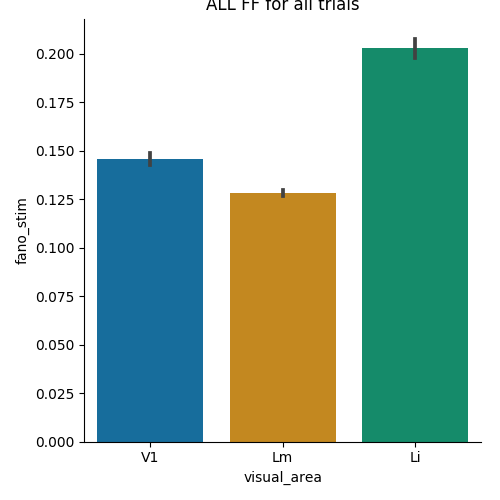

((1079,), (1095,), (938,))
('Shapiro-Wilk normality:', (0.8895418047904968, 4.388442460208222e-27), (0.997715175151825, 0.13272003829479218), (0.8251557350158691, 9.11970522622178e-31))
F statistic = 490.688 and probability p = 0.000
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  Li     Lm   -0.0745  -0.0803 -0.0687  True 
  Li     V1   -0.0572   -0.063 -0.0514  True 
  Lm     V1    0.0173   0.0118  0.0229  True 
---------------------------------------------
KruskalResult(statistic=914.33492825858411, pvalue=2.8490037635522557e-199)
               Li             Lm             V1
Li  -1.000000e+00  1.906408e-181  1.013003e-119
Lm  1.906408e-181  -1.000000e+00   7.613303e-08
V1  1.013003e-119   7.613303e-08  -1.000000e+00


In [947]:
g = calculate_stats_by_area(mean_fanos, metric='fano_stim')
pl.title('ALL FF for all trials')

figname = 'fano-factor_all-trial-values_collapse-sessions'
pl.savefig(os.path.join(outdir, 'trial_variability', '%s.svg' % figname))
pl.savefig(os.path.join(outdir, 'trial_variability', '%s.png' % figname))


In [954]:
#FANO_stim[datakey].mean().shape

(188,)

# Get mean fano factor for each cell

In [955]:
mean_fanos = []
for datakey in FANO_stim.keys():
    #if datakey in exclude_keys:
    #    continue
        
    fano_vals = FANO_stim[datakey].mean()
    session, animalid, fovn, _ = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    nsamples = len(fano_vals)
    ntrials = FANO_stim[datakey].shape[0]
    mean_fanos.append(pd.DataFrame({'visual_area': [visual_area for _ in np.arange(0, nsamples)],
                                  'rid': FANO_stim[datakey].columns.tolist(),
                                  'fano_stim': fano_vals,
                                  'datakey': [datakey for _ in np.arange(0, nsamples)]}) )
    
mean_fanos = pd.concat(mean_fanos, axis=0)

In [956]:
mean_fanos.groupby(['visual_area']).count()

datakey  fano_stim   rid
visual_area                          
Li               938        938   938
Lm              1095       1095  1095
V1              1079       1079  1079

<IPython.core.display.Javascript object>


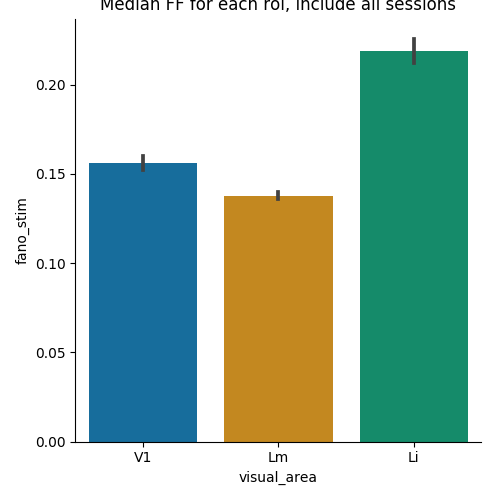

((1079,), (1095,), (938,))
('Shapiro-Wilk normality:', (0.8913357853889465, 6.805078554381926e-27), (0.9486494064331055, 4.392433484208912e-19), (0.6381973028182983, 1.7713253368144283e-40))
F statistic = 353.076 and probability p = 0.000
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  Li     Lm    -0.081  -0.0884 -0.0736  True 
  Li     V1   -0.0626   -0.07  -0.0552  True 
  Lm     V1    0.0184   0.0112  0.0255  True 
---------------------------------------------
KruskalResult(statistic=847.1018084943571, pvalue=1.1328684455815086e-184)
               Li             Lm             V1
Li  -1.000000e+00  1.477142e-168  1.843413e-110
Lm  1.477142e-168  -1.000000e+00   1.499557e-07
V1  1.843413e-110   1.499557e-07  -1.000000e+00


In [957]:
g = calculate_stats_by_area(mean_fanos, metric='fano_stim')
pl.title('Median FF for each roi, include all sessions')

figname = 'fano-factor_median-roi-values_collapse-sessions'
pl.savefig(os.path.join(outdir, 'trial_variability', '%s.svg' % figname))
pl.savefig(os.path.join(outdir, 'trial_variability', '%s.png' % figname))


In [745]:
visual_areas = ['V1', 'Lm', 'Li']
area_colors = dict((vis, col) for vis, col in zip(visual_areas, sns.color_palette('colorblind', n_colors=3)))


In [907]:
all_fanos.groupby(['datakey']).mean()

fano_stim
datakey                             
20190420_JC076_fov1_blobs   0.150180
20190430_JC078_fov1_blobs   0.096263
20190501_JC076_fov1_blobs   0.120468
20190504_JC078_fov1_blobs   0.105516
20190506_JC080_fov1_blobs   0.141414
20190507_JC083_fov1_blobs   0.143689
20190508_JC083_fov1_blobs   0.125335
20190509_JC078_fov1_blobs   0.125394
20190510_JC083_fov1_blobs   0.167942
20190511_JC083_fov1_blobs   0.136510
20190512_JC083_fov1_blobs   0.146737
20190513_JC078_fov1_blobs   0.124531
20190517_JC083_fov1_blobs   0.120777
20190522_JC084_fov1_blobs   0.144616
20190525_JC084_fov1_blobs   0.181851
20190602_JC091_fov1_blobs   0.163246
20190603_JC080_fov1_blobs   0.166386
20190605_JC090_fov1_blobs   0.269225
20190606_JC091_fov1_blobs   0.196034
20190607_JC091_fov1_blobs   0.172872
20190609_JC099_fov1_blobs   0.288436
20190612_JC099_fov1_blobs   0.218687
20190613_JC097_fov1_blobs   0.111820
20190614_JC091_fov1_blobs   0.226144
20190616_JC097_fov1_blobs   0.094894
20190617_JC099_fov1_blobs   0.253843
20190622_JC085_fov1_blobs   0.249575
20190627_JC091_fov1_blobs   0.156958
20191006_JC110_fov1_blobs   0.151630
20191018_JC113_fov1_blobs   0.154236
20191105_JC117_fov1_blobs   0.030241
20191111_JC120_fov1_blobs   0.475793

<IPython.core.display.Javascript object>


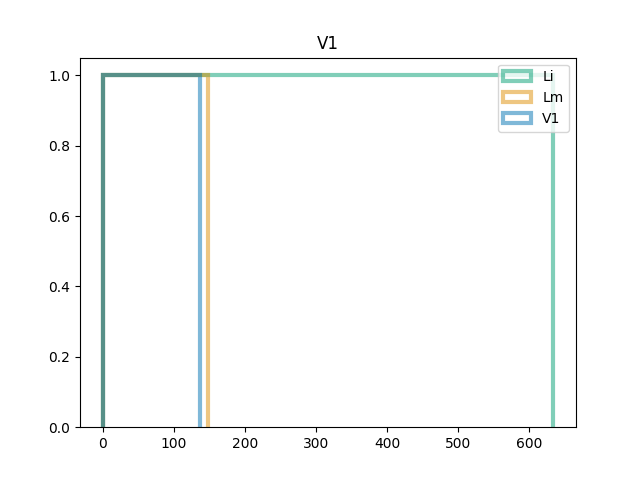

In [965]:
cdf=True

fig, ax = pl.subplots()
for visual_area, g in all_fanos.groupby(['visual_area']):
    values = g['fano_stim'].dropna().values
    weights = np.ones_like(values)/float(len(values))

    ax.hist(values, 
            cumulative=True,
            label=visual_area,
            color=area_colors[visual_area],
            histtype='step', alpha=0.5, lw=3,
            normed=0, weights=weights, bins=50)
    ax.set_title(visual_area)
                   
pl.legend()

In [966]:
fanos_by_session=[]
for visual_area, g in mean_fanos.groupby(['visual_area']):
    mvals = g.groupby(['datakey'])['fano_stim'].mean()
    counts = g.groupby(['datakey'])['fano_stim'].count()
    fanos_by_session.append(pd.DataFrame({'mean_fano': mvals,
                                          'counts': counts,
                                         'visual_area': [visual_area for _ in np.arange(0, len(mvals))]}))

    
fanos_by_session = pd.concat(fanos_by_session)

<IPython.core.display.Javascript object>


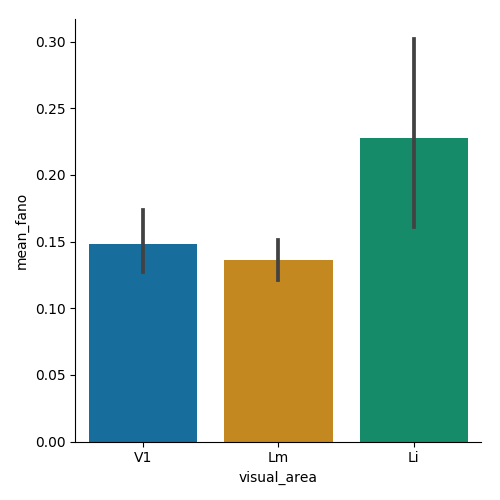

In [967]:
sns.catplot(x='visual_area', y='mean_fano', data=fanos_by_session, kind='bar',
           palette='colorblind', order=['V1', 'Lm', 'Li'])

#### Stats

In [970]:
c1 = fanos_by_session[fanos_by_session['visual_area']=='V1']['mean_fano']
c2 = fanos_by_session[fanos_by_session['visual_area']=='Lm']['mean_fano']
c3 = fanos_by_session[fanos_by_session['visual_area']=='Li']['mean_fano']
print(c1.shape, c2.shape, c3.shape)

# Shapiro-Wilk normality test 
print("Shapiro-Wilk normality:", spstats.shapiro(c1), spstats.shapiro(c2), spstats.shapiro(c3) )

F, p = spstats.f_oneway(c1, c2, c3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

scores = np.hstack([c1, c2, c3])
groups = np.hstack([['V1' for _ in range(len(c1))], 
                   ['Lm' for _ in range(len(c2))],
                   ['Li' for _ in range(len(c3))]])

# Note that data in sheet have been preformatted in Group and Score columns 
# Boolean values refer to whether we should reject the null hypothesis (H0) that
# the means of the tested pair are statistically similar (non-significant differences)

mcobj = ml.MultiComparison(scores, groups)
out = mcobj.tukeyhsd(0.05) 

print(out)

print(spstats.kruskal(c1, c2, c3))
statsdf = fanos_by_session[['visual_area', 'mean_fano']].copy()
sp.posthoc_dunn(statsdf, val_col='mean_fano', group_col='visual_area', p_adjust='bonferroni') #'fdr_by')

((10,), (11,), (11,))
('Shapiro-Wilk normality:', (0.8586461544036865, 0.07355262339115143), (0.9656316041946411, 0.8393511176109314), (0.8765125274658203, 0.09393627196550369))
F statistic = 4.558 and probability p = 0.019
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  Li     Lm   -0.0914  -0.1722 -0.0106  True 
  Li     V1   -0.0793  -0.1621  0.0035 False 
  Lm     V1    0.0121  -0.0707  0.0949 False 
---------------------------------------------
KruskalResult(statistic=10.083161157024804, pvalue=0.0064635241329951392)


Li       Lm        V1
Li -1.000000  0.01011  0.037766
Lm  0.010110 -1.00000  1.000000
V1  0.037766  1.00000 -1.000000

<IPython.core.display.Javascript object>


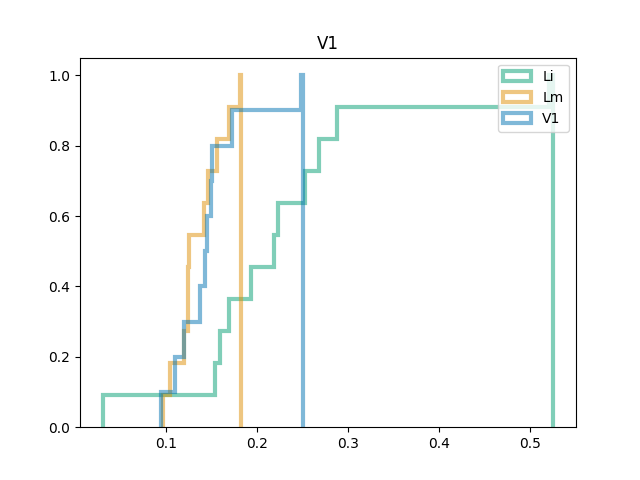

In [978]:
cdf=True

fig, ax = pl.subplots()
for visual_area, g in fanos_by_session.groupby(['visual_area']):
    values = g['mean_fano'].dropna().values
    weights = np.ones_like(values)/float(len(values))

    ax.hist(values, 
            cumulative=True,
            label=visual_area,
            color=area_colors[visual_area],
            histtype='step', alpha=0.5, lw=3,
            normed=0, weights=weights, bins=100)
    ax.set_title(visual_area)
                   
pl.legend()

In [ ]:
fanos_by_session

In [3]:
analysis_dir

NameError: name 'analysis_dir' is not defined

# Load data

In [47]:
# def get_pupil_stats(animalid, session, fovnum, curr_exp, analysis_dir, feature='pupil',
#                                    traceid='traces001',
#                                    eyetracker_dir='/n/coxfs01/2p-data/eyetracker_tmp',
#                              rootdir='/n/coxfs01/2p-data'):
    
#     # Load experiment neural data
#     fov = 'FOV%i_zoom2p0x' % fovnum
#     #exp = util.Objects(animalid, session, fov, traceid=traceid)
#     #exp.load(trace_type='dff', update_self=True, make_equal=True)
#     labels_dfile = glob.glob(os.path.join(rootdir, animalid, session, fov, 'combined_*%s*' % curr_exp, 'traces',
#                           '%s*' % traceid, 'data_arrays', 'np_subtracted.npz'))[0]
#     l = np.load(labels_dfile)
#     labels = pd.DataFrame(data=l['labels_data'], columns=l['labels_columns'])

# #     facemeta, pupildata = load_pupil_data(animalid, session, fovnum, curr_exp, analysis_dir, 
# #                                traceid=traceid, eyetracker_dir=eyetracker_dir)
#     facemeta, pupildata = load_pose_data(animalid, session, fovnum, curr_exp, analysis_dir, 
#                                          feature=feature,
#                                            traceid=traceid, eyetracker_dir=eyetracker_dir)
    
#     pupilstats = calculate_pupil_stats(facemeta, pupildata, labels)
    
#     # Check trial nums
#     trial_nums = sorted([int(t[5:]) for t in labels['trial'].unique()])
#     missing = [p for p in pupilstats['trial'].values if p not in trial_nums]
    
#     assert len(missing)==0, "****Bad trial indexing! [%s]" % '_'.join(session, animalid, fov, curr_exp)
#     return pupilstats

from pipeline.python.classifications import dlc_utils as dlcutils
def get_feature_stats(animalid, session, fovnum, curr_exp, analysis_dir, feature='pupil',
                      epoch='stimulus_on', pre_ITI_ms=0, post_ITI_ms=0,
                                   traceid='traces001',
                                   eyetracker_dir='/n/coxfs01/2p-data/eyetracker_tmp',
                             rootdir='/n/coxfs01/2p-data'):
    
    # Load experiment neural data
    fov = 'FOV%i_zoom2p0x' % fovnum
    #exp = util.Objects(animalid, session, fov, traceid=traceid)
    #exp.load(trace_type='dff', update_self=True, make_equal=True)
    labels_dfile = glob.glob(os.path.join(rootdir, animalid, session, fov, 'combined_*%s*' % curr_exp, 'traces',
                          '%s*' % traceid, 'data_arrays', 'np_subtracted.npz'))[0]
    l = np.load(labels_dfile)
    labels = pd.DataFrame(data=l['labels_data'], columns=l['labels_columns'])

#     facemeta, pupildata = load_pupil_data(animalid, session, fovnum, curr_exp, analysis_dir, 
#                                traceid=traceid, eyetracker_dir=eyetracker_dir)
    facemeta, pupildata = dlcutils.load_pose_data(animalid, session, fovnum, curr_exp, analysis_dir, 
                                         feature=feature,
                                       epoch=epoch, pre_ITI_ms=pre_ITI_ms, post_ITI_ms=post_ITI_ms,
                                           traceid=traceid, eyetracker_dir=eyetracker_dir)
    
    pupilstats = dlcutils.calculate_pose_stats(facemeta, pupildata, labels, feature=feature)
    
    # Check trial nums
    trial_nums = sorted([int(t[5:]) for t in labels['trial'].unique()])
    missing = [p for p in pupilstats['trial'].values if p not in trial_nums]
    
    assert len(missing)==0, "****Bad trial indexing! [%s]" % '_'.join(session, animalid, fov, curr_exp)
    return pupilstats
        

In [38]:
epoch = 'stimulus_on'
pre_ITI_ms = 0
post_ITI_ms = 0


In [39]:
responsive_test = 'ROC'
responsive_thr = 0.05
response_type = 'dff'
traceid = 'traces001'


# Load neural data

In [40]:
data_dir = os.path.join(aggregate_dir, 'data-stats')
os.listdir(data_dir)

['stats-traces001-corrected-dff-nstds-thr-10.00',
 'experiment-objects',
 'stats-traces001-corrected-dff-ROC-thr-0.05',
 'Lm_blobs_incorrect-params.json',
 'tmpdf.pkl',
 'tmpdf-blobs-rsa.pkl',
 'blobs_traces001-dff_ROC-thr-0.05.pkl',
 'rf-luminances_traces001-dff_blobs.pkl']

In [41]:
load_data = False
blobsdata_outfile = os.path.join(data_dir, 'blobs_%s-%s_%s-thr-%.2f.pkl' % (traceid, response_type, responsive_test, responsive_thr))
print(blobsdata_outfile)
if os.path.exists(blobsdata_outfile):
    print("...loading data")
    with open(blobsdata_outfile, 'rb') as f:
        NEURALDATA = pkl.load(f)
else:
    load_data = True


/n/coxfs01/julianarhee/aggregate-visual-areas/data-stats/blobs_traces001-dff_ROC-thr-0.05.pkl
...loading data


# Load pupil data

In [42]:
facedata_dir = os.path.join(aggregate_dir, 'behavior-state')

In [43]:
curr_exp

'blobs'

In [50]:
load_data = False
feature = 'pupil'

do_traces = True
epoch = 'trial_alignment'
pre_ITI_ms=1000
post_ITI_ms=1000

if do_traces:
    pupildata_outfile = os.path.join(facedata_dir, '%s_%s-traces_snapshot-%i.pkl' % (curr_exp, feature, snapshot))
else:
    epoch = 'stimulus_on'
    pre_ITI_ms=0
    post_ITI_ms=0
    pupildata_outfile = os.path.join(facedata_dir, '%s_%s-stimulus_snapshot-%i.pkl' % (curr_exp, feature, snapshot))

    
print(pupildata_outfile)
if os.path.exists(pupildata_outfile):
    print("...loading data")
    with open(pupildata_outfile, 'rb') as f:
        PUPILDATA = pkl.load(f)
else:
    load_data = True
print(load_data)

/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/blobs_pupil-traces_snapshot-391800.pkl
True


In [51]:
if load_data and do_traces is False:
    PUPILDATA = {}
    for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):

        datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)  

#         pupilstats = get_pupil_stats(animalid, session, fovnum, curr_exp, analysis_dir,
#                                            traceid=traceid,
#                                            eyetracker_dir=eyetracker_dir, rootdir=rootdir)
        pupilstats = get_feature_stats(animalid, session, fovnum, curr_exp, analysis_dir, feature=feature,
                                           traceid=traceid, epoch=epoch, pre_ITI_ms=pre_ITI_ms, post_ITI_ms=post_ITI_ms,
                                           eyetracker_dir=eyetracker_dir, rootdir=rootdir)

        PUPILDATA[datakey] = pupilstats
    
    with open(pupildata_outfile, 'wb') as f:
        pkl.dump(PUPILDATA, f, protocol=pkl.HIGHEST_PROTOCOL)

In [52]:
reload(dlcutils)

<module 'pipeline.python.classifications.dlc_utils' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/dlc_utils.pyc'>

In [57]:
if load_data and do_traces:
    PUPILDATA = {}
    for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):

        datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)  
        fov = 'FOV%i_zoom2p0x' % fovnum
        
        #### Get labels
        labels_dfile = glob.glob(os.path.join(rootdir, animalid, session, fov, 'combined_*%s*' % curr_exp, 'traces',
                              '%s*' % traceid, 'data_arrays', 'np_subtracted.npz'))[0]
        l = np.load(labels_dfile)
        labels = pd.DataFrame(data=l['labels_data'], columns=l['labels_columns'])
        
        #### Load pupil data
        facemeta, pupildata = dlcutils.load_pose_data(animalid, session, fovnum, curr_exp, analysis_dir, feature='pupil',
                               epoch='trial_alignment', pre_ITI_ms=pre_ITI_ms, post_ITI_ms=post_ITI_ms)

        #### Parse pupil data into traces
        pupiltraces = dlcutils.get_pose_traces(facemeta, pupildata, labels, feature='pupil')

        PUPILDATA[datakey] = pupiltraces
    
    with open(pupildata_outfile, 'wb') as f:
        pkl.dump(PUPILDATA, f, protocol=pkl.HIGHEST_PROTOCOL)

('[blobs] Found runs:', [1, 2, 3, 4, 5, 6, 7])
... finding movies for dset: 20190605_JC090_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f1_20190605141933120131')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f2_20190605151304470267')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f3_20190605160757630689')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f4_20190605171707227152')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f5_20190605180717539830')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f6_20190605183331571376')
(6, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f7_20190605184821422690')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190605_JC090_fov1_blobs_f1_20190605141933120131')
----- File 1.-----
Checking for missing frames.
[428, 6719, 21359]
... found 3 funky frame chunks.
... interpola

('Eyetracker start/stop frames:', 20034, 20094)
('Eyetracker start/stop frames:', 20095, 20155)
('Eyetracker start/stop frames:', 20156, 20216)
('Eyetracker start/stop frames:', 20217, 20277)
('Eyetracker start/stop frames:', 20278, 20338)
('Eyetracker start/stop frames:', 20339, 20399)
('Eyetracker start/stop frames:', 20400, 20460)
('Eyetracker start/stop frames:', 20461, 20521)
('Eyetracker start/stop frames:', 20522, 20582)
('Eyetracker start/stop frames:', 20583, 20643)
('Eyetracker start/stop frames:', 20644, 20704)
('Eyetracker start/stop frames:', 21295, 21356)
('Eyetracker start/stop frames:', 21356, 21417)
('Eyetracker start/stop frames:', 21417, 21478)
('Eyetracker start/stop frames:', 21478, 21539)
('Eyetracker start/stop frames:', 21539, 21600)
('Eyetracker start/stop frames:', 21600, 21661)
('Eyetracker start/stop frames:', 21661, 21722)
('Eyetracker start/stop frames:', 21722, 21783)
('Eyetracker start/stop frames:', 21783, 21844)
('Eyetracker start/stop frames:', 21844,

('Eyetracker start/stop frames:', 11154, 11214)
('Eyetracker start/stop frames:', 11215, 11275)
('Eyetracker start/stop frames:', 11276, 11336)
('Eyetracker start/stop frames:', 11337, 11397)
('Eyetracker start/stop frames:', 11398, 11458)
('Eyetracker start/stop frames:', 11459, 11519)
('Eyetracker start/stop frames:', 11520, 11580)
('Eyetracker start/stop frames:', 11581, 11641)
('Eyetracker start/stop frames:', 12085, 12145)
('Eyetracker start/stop frames:', 12146, 12206)
('Eyetracker start/stop frames:', 12207, 12267)
('Eyetracker start/stop frames:', 12268, 12328)
('Eyetracker start/stop frames:', 12329, 12389)
('Eyetracker start/stop frames:', 12390, 12450)
('Eyetracker start/stop frames:', 12451, 12511)
('Eyetracker start/stop frames:', 12512, 12572)
('Eyetracker start/stop frames:', 12573, 12633)
('Eyetracker start/stop frames:', 12633, 12694)
('Eyetracker start/stop frames:', 12694, 12755)
('Eyetracker start/stop frames:', 12755, 12816)
('Eyetracker start/stop frames:', 12816,

('Eyetracker start/stop frames:', 6478, 6539)
('Eyetracker start/stop frames:', 6539, 6600)
('Eyetracker start/stop frames:', 6600, 6661)
('Eyetracker start/stop frames:', 6661, 6722)
('Eyetracker start/stop frames:', 6722, 6783)
('Eyetracker start/stop frames:', 6783, 6844)
('Eyetracker start/stop frames:', 6844, 6905)
('Eyetracker start/stop frames:', 7086, 7147)
('Eyetracker start/stop frames:', 7147, 7208)
('Eyetracker start/stop frames:', 7208, 7269)
('Eyetracker start/stop frames:', 7269, 7330)
('Eyetracker start/stop frames:', 7330, 7391)
('Eyetracker start/stop frames:', 7391, 7452)
('Eyetracker start/stop frames:', 7452, 7513)
('Eyetracker start/stop frames:', 7513, 7574)
('Eyetracker start/stop frames:', 7574, 7635)
('Eyetracker start/stop frames:', 7635, 7695)
('Eyetracker start/stop frames:', 7696, 7756)
('Eyetracker start/stop frames:', 7757, 7817)
('Eyetracker start/stop frames:', 7818, 7878)
('Eyetracker start/stop frames:', 7879, 7939)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6556, 6616)
('Eyetracker start/stop frames:', 6617, 6677)
('Eyetracker start/stop frames:', 6678, 6738)
('Eyetracker start/stop frames:', 6739, 6799)
('Eyetracker start/stop frames:', 6800, 6860)
('Eyetracker start/stop frames:', 6861, 6921)
('Eyetracker start/stop frames:', 6922, 6982)
('Eyetracker start/stop frames:', 9217, 9278)
('Eyetracker start/stop frames:', 9278, 9339)
('Eyetracker start/stop frames:', 9339, 9400)
('Eyetracker start/stop frames:', 9400, 9461)
('Eyetracker start/stop frames:', 9461, 9522)
('Eyetracker start/stop frames:', 9522, 9583)
('Eyetracker start/stop frames:', 9583, 9644)
('Eyetracker start/stop frames:', 9644, 9705)
('Eyetracker start/stop frames:', 9705, 9766)
('Eyetracker start/stop frames:', 9766, 9827)
('Eyetracker start/stop frames:', 9827, 9888)
('Eyetracker start/stop frames:', 9888, 9949)
('Eyetracker start/stop frames:', 9949, 10010)
('Eyetracker start/stop frames:', 10010, 10071)
('Eyetracker start/stop frames:

('Eyetracker start/stop frames:', 446, 506)
('Eyetracker start/stop frames:', 507, 567)
('Eyetracker start/stop frames:', 568, 628)
('Eyetracker start/stop frames:', 629, 689)
('Eyetracker start/stop frames:', 690, 750)
('Eyetracker start/stop frames:', 751, 811)
('Eyetracker start/stop frames:', 812, 872)
('Eyetracker start/stop frames:', 873, 933)
('Eyetracker start/stop frames:', 934, 994)
('Eyetracker start/stop frames:', 995, 1055)
('Eyetracker start/stop frames:', 1056, 1116)
('Eyetracker start/stop frames:', 1117, 1177)
('Eyetracker start/stop frames:', 1178, 1238)
('Eyetracker start/stop frames:', 1239, 1299)
('Eyetracker start/stop frames:', 1300, 1360)
('Eyetracker start/stop frames:', 1361, 1421)
('Eyetracker start/stop frames:', 1422, 1482)
('Eyetracker start/stop frames:', 1483, 1543)
('Eyetracker start/stop frames:', 1732, 1793)
('Eyetracker start/stop frames:', 1793, 1854)
('Eyetracker start/stop frames:', 1854, 1915)
('Eyetracker start/stop frames:', 1915, 1976)
('Eyetr

('Eyetracker start/stop frames:', 8019, 8079)
('Eyetracker start/stop frames:', 8080, 8140)
('Eyetracker start/stop frames:', 8141, 8201)
('Eyetracker start/stop frames:', 8202, 8262)
('Eyetracker start/stop frames:', 8263, 8323)
('Eyetracker start/stop frames:', 8324, 8384)
('Eyetracker start/stop frames:', 8385, 8445)
('Eyetracker start/stop frames:', 8446, 8506)
('Eyetracker start/stop frames:', 8703, 8764)
('Eyetracker start/stop frames:', 8764, 8825)
('Eyetracker start/stop frames:', 8825, 8886)
('Eyetracker start/stop frames:', 8886, 8947)
('Eyetracker start/stop frames:', 8947, 9008)
('Eyetracker start/stop frames:', 9008, 9069)
('Eyetracker start/stop frames:', 9069, 9130)
('Eyetracker start/stop frames:', 9130, 9191)
('Eyetracker start/stop frames:', 9191, 9252)
('Eyetracker start/stop frames:', 9252, 9313)
('Eyetracker start/stop frames:', 9313, 9374)
('Eyetracker start/stop frames:', 9374, 9435)
('Eyetracker start/stop frames:', 9435, 9496)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6321, 6382)
('Eyetracker start/stop frames:', 6382, 6443)
('Eyetracker start/stop frames:', 6443, 6504)
('Eyetracker start/stop frames:', 6504, 6565)
('Eyetracker start/stop frames:', 6565, 6626)
('Eyetracker start/stop frames:', 6626, 6687)
('Eyetracker start/stop frames:', 6926, 6986)
('Eyetracker start/stop frames:', 6987, 7047)
('Eyetracker start/stop frames:', 7048, 7108)
('Eyetracker start/stop frames:', 7109, 7169)
('Eyetracker start/stop frames:', 7170, 7230)
('Eyetracker start/stop frames:', 7231, 7291)
('Eyetracker start/stop frames:', 7292, 7352)
('Eyetracker start/stop frames:', 7353, 7413)
('Eyetracker start/stop frames:', 7414, 7474)
('Eyetracker start/stop frames:', 7475, 7535)
('Eyetracker start/stop frames:', 7536, 7596)
('Eyetracker start/stop frames:', 7597, 7657)
('Eyetracker start/stop frames:', 7658, 7718)
('Eyetracker start/stop frames:', 7719, 7779)
('Eyetracker start/stop frames:', 7780, 7840)
('Eyetracker start/stop frames:', 

('NANs: skipping', 608)
('NANs: skipping', 609)
('NANs: skipping', 610)
('NANs: skipping', 611)
('NANs: skipping', 612)
('NANs: skipping', 613)
('NANs: skipping', 849)
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190602_JC091_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190602_JC091_fov1_blobs_f1_20190602151722650866')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190602_JC091_fov1_blobs_f2_20190602161127488646')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190602_JC091_fov1_blobs_f3_20190602171902936040')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190602_JC091_fov1_blobs_f4_20190602185634063844')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190602_JC091_fov1_blobs_f5_20190602195543014871')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190602_JC091_fov1_blobs_f6_20190602203012939604')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190602_JC091_fov1_blobs_f1_20190602151722650866')
----- File 1.-----
Checking for missin

('Eyetracker start/stop frames:', 15237, 15297)
('Eyetracker start/stop frames:', 15298, 15358)
('Eyetracker start/stop frames:', 15359, 15419)
('Eyetracker start/stop frames:', 15420, 15480)
('Eyetracker start/stop frames:', 15481, 15541)
('Eyetracker start/stop frames:', 15542, 15602)
('Eyetracker start/stop frames:', 15603, 15663)
('Eyetracker start/stop frames:', 15664, 15724)
('Eyetracker start/stop frames:', 15725, 15785)
('Eyetracker start/stop frames:', 15786, 15846)
('Eyetracker start/stop frames:', 15847, 15907)
('Eyetracker start/stop frames:', 15908, 15968)
('Eyetracker start/stop frames:', 15969, 16029)
('Eyetracker start/stop frames:', 16030, 16090)
('Eyetracker start/stop frames:', 16091, 16151)
('Eyetracker start/stop frames:', 16152, 16212)
('Eyetracker start/stop frames:', 16213, 16273)
('Eyetracker start/stop frames:', 16274, 16334)
('Eyetracker start/stop frames:', 16335, 16395)
('Eyetracker start/stop frames:', 16396, 16456)
('Eyetracker start/stop frames:', 16457,

('Eyetracker start/stop frames:', 6569, 6629)
('Eyetracker start/stop frames:', 6630, 6690)
('Eyetracker start/stop frames:', 6691, 6751)
('Eyetracker start/stop frames:', 6752, 6812)
('Eyetracker start/stop frames:', 7020, 7080)
('Eyetracker start/stop frames:', 7081, 7141)
('Eyetracker start/stop frames:', 7142, 7202)
('Eyetracker start/stop frames:', 7203, 7263)
('Eyetracker start/stop frames:', 7264, 7324)
('Eyetracker start/stop frames:', 7325, 7385)
('Eyetracker start/stop frames:', 7386, 7446)
('Eyetracker start/stop frames:', 7447, 7507)
('Eyetracker start/stop frames:', 7508, 7568)
('Eyetracker start/stop frames:', 7569, 7629)
('Eyetracker start/stop frames:', 7630, 7690)
('Eyetracker start/stop frames:', 7691, 7751)
('Eyetracker start/stop frames:', 7752, 7812)
('Eyetracker start/stop frames:', 7813, 7873)
('Eyetracker start/stop frames:', 7873, 7934)
('Eyetracker start/stop frames:', 7934, 7995)
('Eyetracker start/stop frames:', 7995, 8056)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6148, 6209)
('Eyetracker start/stop frames:', 6209, 6270)
('Eyetracker start/stop frames:', 6270, 6331)
('Eyetracker start/stop frames:', 6331, 6392)
('Eyetracker start/stop frames:', 6392, 6453)
('Eyetracker start/stop frames:', 6453, 6514)
('Eyetracker start/stop frames:', 6514, 6575)
('Eyetracker start/stop frames:', 6575, 6636)
('Eyetracker start/stop frames:', 6636, 6697)
('Eyetracker start/stop frames:', 6697, 6758)
('Eyetracker start/stop frames:', 6758, 6819)
('Eyetracker start/stop frames:', 6819, 6880)
('Eyetracker start/stop frames:', 6880, 6941)
('Eyetracker start/stop frames:', 9182, 9243)
('Eyetracker start/stop frames:', 9243, 9304)
('Eyetracker start/stop frames:', 9304, 9365)
('Eyetracker start/stop frames:', 9365, 9426)
('Eyetracker start/stop frames:', 9426, 9487)
('Eyetracker start/stop frames:', 9487, 9548)
('Eyetracker start/stop frames:', 9548, 9609)
('Eyetracker start/stop frames:', 9609, 9670)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 8036, 8096)
('Eyetracker start/stop frames:', 8097, 8157)
('Eyetracker start/stop frames:', 8158, 8218)
('Eyetracker start/stop frames:', 8219, 8279)
('Eyetracker start/stop frames:', 8280, 8340)
('Eyetracker start/stop frames:', 8558, 8618)
('Eyetracker start/stop frames:', 8619, 8679)
('Eyetracker start/stop frames:', 8680, 8740)
('Eyetracker start/stop frames:', 8741, 8801)
('Eyetracker start/stop frames:', 8802, 8862)
('Eyetracker start/stop frames:', 8863, 8923)
('Eyetracker start/stop frames:', 8924, 8984)
('Eyetracker start/stop frames:', 8985, 9045)
('Eyetracker start/stop frames:', 9046, 9106)
('Eyetracker start/stop frames:', 9107, 9167)
('Eyetracker start/stop frames:', 9168, 9228)
('Eyetracker start/stop frames:', 9229, 9289)
('Eyetracker start/stop frames:', 9290, 9350)
('Eyetracker start/stop frames:', 9351, 9411)
('Eyetracker start/stop frames:', 9412, 9472)
('Eyetracker start/stop frames:', 9473, 9533)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6174, 6235)
('Eyetracker start/stop frames:', 6235, 6296)
('Eyetracker start/stop frames:', 6296, 6357)
('Eyetracker start/stop frames:', 6357, 6418)
('Eyetracker start/stop frames:', 6418, 6479)
('Eyetracker start/stop frames:', 6479, 6540)
('Eyetracker start/stop frames:', 6540, 6601)
('Eyetracker start/stop frames:', 6601, 6662)
('Eyetracker start/stop frames:', 8741, 8802)
('Eyetracker start/stop frames:', 8802, 8863)
('Eyetracker start/stop frames:', 8863, 8924)
('Eyetracker start/stop frames:', 8924, 8985)
('Eyetracker start/stop frames:', 8985, 9046)
('Eyetracker start/stop frames:', 9046, 9107)
('Eyetracker start/stop frames:', 9107, 9168)
('Eyetracker start/stop frames:', 9168, 9229)
('Eyetracker start/stop frames:', 9229, 9290)
('Eyetracker start/stop frames:', 9290, 9351)
('Eyetracker start/stop frames:', 9351, 9412)
('Eyetracker start/stop frames:', 9412, 9473)
('Eyetracker start/stop frames:', 9473, 9534)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6040, 6100)
('Eyetracker start/stop frames:', 6101, 6161)
('Eyetracker start/stop frames:', 6162, 6222)
('Eyetracker start/stop frames:', 6223, 6283)
('Eyetracker start/stop frames:', 6284, 6344)
('Eyetracker start/stop frames:', 6345, 6405)
('Eyetracker start/stop frames:', 6406, 6466)
('Eyetracker start/stop frames:', 6467, 6527)
('Eyetracker start/stop frames:', 6528, 6588)
('Eyetracker start/stop frames:', 6589, 6649)
('Eyetracker start/stop frames:', 6650, 6710)
('Eyetracker start/stop frames:', 6711, 6771)
('Eyetracker start/stop frames:', 7149, 7209)
('Eyetracker start/stop frames:', 7210, 7270)
('Eyetracker start/stop frames:', 7271, 7331)
('Eyetracker start/stop frames:', 7332, 7392)
('Eyetracker start/stop frames:', 7393, 7453)
('Eyetracker start/stop frames:', 7454, 7514)
('Eyetracker start/stop frames:', 7515, 7575)
('Eyetracker start/stop frames:', 7576, 7636)
('Eyetracker start/stop frames:', 7637, 7697)
('Eyetracker start/stop frames:', 

...curr run: 6 [20190602_JC091_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
('NANs: skipping', 1)
('NANs: skipping', 2)
('NANs: skipping', 3)
('NANs: skipping', 4)
('NANs: skipping', 5)
('NANs: skipping', 6)
('NANs: skipping', 7)
('NANs: skipping', 8)
('NANs: skipping', 9)
('NANs: skipping', 10)
('NANs: skipping', 11)
('NANs: skipping', 12)
('NANs: skipping', 13)
('NANs: skipping', 14)
('NANs: skipping', 15)
('NANs: skipping', 16)
('NANs: skipping', 17)
('NANs: skipping', 18)
('NANs: skipping', 19)
('NANs: skipping', 20)
('NANs: skipping', 21)
('NANs: skipping', 22)
('NANs: skipping', 23)
('NANs: skipping', 24)
('NANs: skipping', 25)
('NANs: skipping', 26)
('NANs: skipping', 27)
('NANs: skipping', 30)
('NANs: skipping', 31)
('NANs: skipping', 32)
('NANs: skipping', 33)
('NANs: skipping', 34)
('NANs: skipping', 35)
('NANs: skipping', 36)
('NANs: skipping', 37)
('NANs: skipping', 38)
('NANs: skipping', 39)
('NANs: skipping', 40)
('NANs: skipping', 41)
('NANs: skipping',

('NANs: skipping', 454)
('NANs: skipping', 456)
('NANs: skipping', 457)
('NANs: skipping', 458)
('NANs: skipping', 459)
('NANs: skipping', 460)
('NANs: skipping', 461)
('NANs: skipping', 462)
('NANs: skipping', 463)
('NANs: skipping', 464)
('NANs: skipping', 465)
('NANs: skipping', 466)
('NANs: skipping', 467)
('NANs: skipping', 468)
('NANs: skipping', 469)
('NANs: skipping', 471)
('NANs: skipping', 472)
('NANs: skipping', 473)
('NANs: skipping', 474)
('NANs: skipping', 475)
('NANs: skipping', 477)
('NANs: skipping', 478)
('NANs: skipping', 479)
('NANs: skipping', 480)
('NANs: skipping', 481)
('NANs: skipping', 482)
('NANs: skipping', 483)
('NANs: skipping', 484)
('NANs: skipping', 485)
('NANs: skipping', 486)
('NANs: skipping', 487)
('NANs: skipping', 488)
('NANs: skipping', 489)
('NANs: skipping', 490)
('NANs: skipping', 491)
('NANs: skipping', 492)
('NANs: skipping', 495)
('NANs: skipping', 496)
('NANs: skipping', 497)
('NANs: skipping', 498)
('NANs: skipping', 499)
('NANs: skipping

('[blobs] Found runs:', [1, 2, 3, 4, 5, 6, 7])
... finding movies for dset: 20190606_JC091_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f1_20190606163148451173')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f2_20190606172228099376')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f3_20190606174323494731')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f4_20190606182920549874')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f5_20190606193721346275')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f6_20190606202806999176')
(6, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f7_20190606205830156361')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f1_20190606163148451173')
----- File 1.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed 

('Eyetracker start/stop frames:', 17220, 17280)
('Eyetracker start/stop frames:', 17280, 17341)
('Eyetracker start/stop frames:', 17341, 17402)
('Eyetracker start/stop frames:', 17402, 17463)
('Eyetracker start/stop frames:', 17463, 17524)
('Eyetracker start/stop frames:', 17524, 17585)
('Eyetracker start/stop frames:', 17585, 17646)
('Eyetracker start/stop frames:', 17646, 17707)
('Eyetracker start/stop frames:', 17707, 17768)
('Eyetracker start/stop frames:', 17768, 17829)
('Eyetracker start/stop frames:', 17829, 17890)
('Eyetracker start/stop frames:', 17890, 17951)
('Eyetracker start/stop frames:', 17951, 18012)
('Eyetracker start/stop frames:', 18012, 18073)
('Eyetracker start/stop frames:', 18073, 18134)
('Eyetracker start/stop frames:', 18134, 18195)
('Eyetracker start/stop frames:', 18195, 18256)
('Eyetracker start/stop frames:', 18256, 18317)
('Eyetracker start/stop frames:', 18317, 18378)
('Eyetracker start/stop frames:', 18378, 18439)
('Eyetracker start/stop frames:', 18439,

--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f3_20190606174323494731')
----- File 3.-----
Checking for missing frames.
[15065]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 19464 to 19470 frames
Full run duration: 16.23 min
('Eyetracker start/stop frames:', 19, 79)
('Eyetracker start/stop frames:', 80, 140)
('Eyetracker start/stop frames:', 141, 201)
('Eyetracker start/stop frames:', 202, 262)
('Eyetracker start/stop frames:', 263, 323)
('Eyetracker start/stop frames:', 324, 384)
('Eyetracker start/stop frames:', 385, 445)
('Eyetracker start/stop frames:', 446, 506)
('Eyetracker start/stop frames:', 507, 567)
('Eyetracker start/stop frames:', 568, 628)
('Eyetracker start/stop frames:', 629, 689)
('Eyetracker start/stop frames:', 690, 750)
('Eyetracker start/stop frames:', 751, 811)
('Eyetracker start/stop frames:', 812, 872)
('Eyetracker start/stop frames:', 873, 933)
('Eyetracker 

('Eyetracker start/stop frames:', 15626, 15686)
('Eyetracker start/stop frames:', 15687, 15747)
('Eyetracker start/stop frames:', 15748, 15808)
('Eyetracker start/stop frames:', 15809, 15869)
('Eyetracker start/stop frames:', 15870, 15930)
('Eyetracker start/stop frames:', 16104, 16164)
('Eyetracker start/stop frames:', 16165, 16225)
('Eyetracker start/stop frames:', 16226, 16286)
('Eyetracker start/stop frames:', 16287, 16347)
('Eyetracker start/stop frames:', 16348, 16408)
('Eyetracker start/stop frames:', 16409, 16469)
('Eyetracker start/stop frames:', 16470, 16530)
('Eyetracker start/stop frames:', 16531, 16591)
('Eyetracker start/stop frames:', 16592, 16652)
('Eyetracker start/stop frames:', 16653, 16713)
('Eyetracker start/stop frames:', 16714, 16774)
('Eyetracker start/stop frames:', 16775, 16835)
('Eyetracker start/stop frames:', 16836, 16896)
('Eyetracker start/stop frames:', 16897, 16957)
('Eyetracker start/stop frames:', 16958, 17018)
('Eyetracker start/stop frames:', 17019,

('Eyetracker start/stop frames:', 11604, 11664)
('Eyetracker start/stop frames:', 11665, 11725)
('Eyetracker start/stop frames:', 11726, 11786)
('Eyetracker start/stop frames:', 11787, 11847)
('Eyetracker start/stop frames:', 11848, 11908)
('Eyetracker start/stop frames:', 11909, 11969)
('Eyetracker start/stop frames:', 11970, 12030)
('Eyetracker start/stop frames:', 12031, 12091)
('Eyetracker start/stop frames:', 12092, 12152)
('Eyetracker start/stop frames:', 12153, 12213)
('Eyetracker start/stop frames:', 12214, 12274)
('Eyetracker start/stop frames:', 12408, 12468)
('Eyetracker start/stop frames:', 12469, 12529)
('Eyetracker start/stop frames:', 12530, 12590)
('Eyetracker start/stop frames:', 12591, 12651)
('Eyetracker start/stop frames:', 12652, 12712)
('Eyetracker start/stop frames:', 12713, 12773)
('Eyetracker start/stop frames:', 12774, 12834)
('Eyetracker start/stop frames:', 12835, 12895)
('Eyetracker start/stop frames:', 12896, 12956)
('Eyetracker start/stop frames:', 12957,

('Eyetracker start/stop frames:', 10892, 10952)
('Eyetracker start/stop frames:', 10953, 11013)
('Eyetracker start/stop frames:', 11014, 11074)
('Eyetracker start/stop frames:', 11075, 11135)
('Eyetracker start/stop frames:', 11136, 11196)
('Eyetracker start/stop frames:', 11197, 11257)
('Eyetracker start/stop frames:', 11258, 11318)
('Eyetracker start/stop frames:', 11445, 11505)
('Eyetracker start/stop frames:', 11506, 11566)
('Eyetracker start/stop frames:', 11567, 11627)
('Eyetracker start/stop frames:', 11628, 11688)
('Eyetracker start/stop frames:', 11689, 11749)
('Eyetracker start/stop frames:', 11750, 11810)
('Eyetracker start/stop frames:', 11811, 11871)
('Eyetracker start/stop frames:', 11872, 11932)
('Eyetracker start/stop frames:', 11933, 11993)
('Eyetracker start/stop frames:', 11994, 12054)
('Eyetracker start/stop frames:', 12055, 12115)
('Eyetracker start/stop frames:', 12116, 12176)
('Eyetracker start/stop frames:', 12177, 12237)
('Eyetracker start/stop frames:', 12238,

('Eyetracker start/stop frames:', 9571, 9631)
('Eyetracker start/stop frames:', 9632, 9692)
('Eyetracker start/stop frames:', 9693, 9753)
('Eyetracker start/stop frames:', 9754, 9814)
('Eyetracker start/stop frames:', 10170, 10230)
('Eyetracker start/stop frames:', 10231, 10291)
('Eyetracker start/stop frames:', 10292, 10352)
('Eyetracker start/stop frames:', 10353, 10413)
('Eyetracker start/stop frames:', 10414, 10474)
('Eyetracker start/stop frames:', 10475, 10535)
('Eyetracker start/stop frames:', 10536, 10596)
('Eyetracker start/stop frames:', 10597, 10657)
('Eyetracker start/stop frames:', 10658, 10718)
('Eyetracker start/stop frames:', 10719, 10779)
('Eyetracker start/stop frames:', 10780, 10840)
('Eyetracker start/stop frames:', 10841, 10901)
('Eyetracker start/stop frames:', 10902, 10962)
('Eyetracker start/stop frames:', 10963, 11023)
('Eyetracker start/stop frames:', 11024, 11084)
('Eyetracker start/stop frames:', 11085, 11145)
('Eyetracker start/stop frames:', 11146, 11206)


('Eyetracker start/stop frames:', 1056, 1116)
('Eyetracker start/stop frames:', 1117, 1177)
('Eyetracker start/stop frames:', 1178, 1238)
('Eyetracker start/stop frames:', 1239, 1299)
('Eyetracker start/stop frames:', 1300, 1360)
('Eyetracker start/stop frames:', 1361, 1421)
('Eyetracker start/stop frames:', 1422, 1482)
('Eyetracker start/stop frames:', 1483, 1543)
('Eyetracker start/stop frames:', 1873, 1933)
('Eyetracker start/stop frames:', 1934, 1994)
('Eyetracker start/stop frames:', 1995, 2055)
('Eyetracker start/stop frames:', 2056, 2116)
('Eyetracker start/stop frames:', 2117, 2177)
('Eyetracker start/stop frames:', 2178, 2238)
('Eyetracker start/stop frames:', 2239, 2299)
('Eyetracker start/stop frames:', 2300, 2360)
('Eyetracker start/stop frames:', 2361, 2421)
('Eyetracker start/stop frames:', 2422, 2482)
('Eyetracker start/stop frames:', 2483, 2543)
('Eyetracker start/stop frames:', 2544, 2604)
('Eyetracker start/stop frames:', 2605, 2665)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 15369, 15430)
('Eyetracker start/stop frames:', 15430, 15491)
('Eyetracker start/stop frames:', 15491, 15552)
('Eyetracker start/stop frames:', 15552, 15613)
('Eyetracker start/stop frames:', 15613, 15674)
('Eyetracker start/stop frames:', 15674, 15735)
('Eyetracker start/stop frames:', 15735, 15796)
('Eyetracker start/stop frames:', 15796, 15857)
('Eyetracker start/stop frames:', 15857, 15918)
('Eyetracker start/stop frames:', 15918, 15979)
('Eyetracker start/stop frames:', 15979, 16040)
('Eyetracker start/stop frames:', 16040, 16101)
('Eyetracker start/stop frames:', 16101, 16162)
('Eyetracker start/stop frames:', 16162, 16223)
('Eyetracker start/stop frames:', 16223, 16284)
('Eyetracker start/stop frames:', 16284, 16345)
('Eyetracker start/stop frames:', 16345, 16406)
('Eyetracker start/stop frames:', 16406, 16466)
('Eyetracker start/stop frames:', 16467, 16527)
('Eyetracker start/stop frames:', 16528, 16588)
('Eyetracker start/stop frames:', 16589,

('NANs: skipping', 472)
('NANs: skipping', 473)
('NANs: skipping', 474)
('NANs: skipping', 475)
('NANs: skipping', 476)
('NANs: skipping', 477)
('NANs: skipping', 478)
('NANs: skipping', 479)
('NANs: skipping', 480)
('NANs: skipping', 482)
('NANs: skipping', 483)
('NANs: skipping', 484)
('NANs: skipping', 485)
('NANs: skipping', 486)
('NANs: skipping', 487)
('NANs: skipping', 488)
('NANs: skipping', 489)
('NANs: skipping', 490)
('NANs: skipping', 491)
('NANs: skipping', 493)
('NANs: skipping', 494)
('NANs: skipping', 495)
('NANs: skipping', 496)
('NANs: skipping', 497)
('NANs: skipping', 498)
('NANs: skipping', 499)
('NANs: skipping', 500)
('NANs: skipping', 504)
('NANs: skipping', 505)
('NANs: skipping', 506)
('NANs: skipping', 507)
('NANs: skipping', 508)
('NANs: skipping', 509)
('NANs: skipping', 510)
('NANs: skipping', 511)
('NANs: skipping', 512)
('NANs: skipping', 513)
('NANs: skipping', 514)
('NANs: skipping', 515)
('NANs: skipping', 516)
('NANs: skipping', 517)
('NANs: skipping

('NANs: skipping', 1100)
('NANs: skipping', 1132)
('NANs: skipping', 1133)
('NANs: skipping', 1134)
('NANs: skipping', 1135)
('NANs: skipping', 1136)
('NANs: skipping', 1137)
('NANs: skipping', 1138)
('NANs: skipping', 1139)
('NANs: skipping', 1140)
('NANs: skipping', 1197)
('NANs: skipping', 1198)
('NANs: skipping', 1199)
('NANs: skipping', 1200)
('NANs: skipping', 1216)
('NANs: skipping', 1217)
('NANs: skipping', 1218)
('NANs: skipping', 1219)
('NANs: skipping', 1220)
('NANs: skipping', 1221)
('NANs: skipping', 1227)
('NANs: skipping', 1235)
('NANs: skipping', 1236)
('NANs: skipping', 1237)
('NANs: skipping', 1238)
('NANs: skipping', 1239)
('NANs: skipping', 1262)
('NANs: skipping', 1263)
('NANs: skipping', 1264)
('NANs: skipping', 1265)
('NANs: skipping', 1266)
('NANs: skipping', 1267)
('NANs: skipping', 1268)
('NANs: skipping', 1269)
('NANs: skipping', 1279)
('NANs: skipping', 1310)
('NANs: skipping', 1311)
('NANs: skipping', 1312)
('NANs: skipping', 1341)
('NANs: skipping', 1342)


('Eyetracker start/stop frames:', 13382, 13442)
('Eyetracker start/stop frames:', 13443, 13503)
('Eyetracker start/stop frames:', 13504, 13564)
('Eyetracker start/stop frames:', 13565, 13625)
('Eyetracker start/stop frames:', 13626, 13686)
('Eyetracker start/stop frames:', 13687, 13747)
('Eyetracker start/stop frames:', 13748, 13808)
('Eyetracker start/stop frames:', 13809, 13869)
('Eyetracker start/stop frames:', 13870, 13930)
('Eyetracker start/stop frames:', 13931, 13991)
('Eyetracker start/stop frames:', 13992, 14052)
('Eyetracker start/stop frames:', 14053, 14113)
('Eyetracker start/stop frames:', 14114, 14174)
('Eyetracker start/stop frames:', 14175, 14235)
('Eyetracker start/stop frames:', 14236, 14296)
('Eyetracker start/stop frames:', 14297, 14357)
('Eyetracker start/stop frames:', 14358, 14418)
('Eyetracker start/stop frames:', 14419, 14479)
('Eyetracker start/stop frames:', 14480, 14540)
('Eyetracker start/stop frames:', 14541, 14601)
('Eyetracker start/stop frames:', 14602,

('Eyetracker start/stop frames:', 12903, 12963)
('Eyetracker start/stop frames:', 12964, 13024)
('Eyetracker start/stop frames:', 13025, 13085)
('Eyetracker start/stop frames:', 13086, 13146)
('Eyetracker start/stop frames:', 13147, 13207)
('Eyetracker start/stop frames:', 13208, 13268)
('Eyetracker start/stop frames:', 13269, 13329)
('Eyetracker start/stop frames:', 13330, 13390)
('Eyetracker start/stop frames:', 13391, 13451)
('Eyetracker start/stop frames:', 13452, 13512)
('Eyetracker start/stop frames:', 13513, 13573)
('Eyetracker start/stop frames:', 13698, 13759)
('Eyetracker start/stop frames:', 13759, 13820)
('Eyetracker start/stop frames:', 13820, 13881)
('Eyetracker start/stop frames:', 13881, 13942)
('Eyetracker start/stop frames:', 13942, 14003)
('Eyetracker start/stop frames:', 14003, 14064)
('Eyetracker start/stop frames:', 14064, 14125)
('Eyetracker start/stop frames:', 14125, 14186)
('Eyetracker start/stop frames:', 14186, 14247)
('Eyetracker start/stop frames:', 14247,

('Eyetracker start/stop frames:', 6496, 6557)
('Eyetracker start/stop frames:', 6557, 6618)
('Eyetracker start/stop frames:', 6618, 6679)
('Eyetracker start/stop frames:', 6679, 6740)
('Eyetracker start/stop frames:', 6740, 6801)
('Eyetracker start/stop frames:', 6801, 6862)
('Eyetracker start/stop frames:', 6862, 6923)
('Eyetracker start/stop frames:', 6923, 6984)
('Eyetracker start/stop frames:', 7896, 7956)
('Eyetracker start/stop frames:', 7957, 8017)
('Eyetracker start/stop frames:', 8018, 8078)
('Eyetracker start/stop frames:', 8079, 8139)
('Eyetracker start/stop frames:', 8140, 8200)
('Eyetracker start/stop frames:', 8201, 8261)
('Eyetracker start/stop frames:', 8262, 8322)
('Eyetracker start/stop frames:', 8323, 8383)
('Eyetracker start/stop frames:', 8384, 8444)
('Eyetracker start/stop frames:', 8445, 8505)
('Eyetracker start/stop frames:', 8506, 8566)
('Eyetracker start/stop frames:', 8567, 8627)
('Eyetracker start/stop frames:', 8628, 8688)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6174, 6234)
('Eyetracker start/stop frames:', 6235, 6295)
('Eyetracker start/stop frames:', 6296, 6356)
('Eyetracker start/stop frames:', 6357, 6417)
('Eyetracker start/stop frames:', 6418, 6478)
('Eyetracker start/stop frames:', 6479, 6539)
('Eyetracker start/stop frames:', 6540, 6600)
('Eyetracker start/stop frames:', 6601, 6661)
('Eyetracker start/stop frames:', 6662, 6722)
('Eyetracker start/stop frames:', 7036, 7097)
('Eyetracker start/stop frames:', 7097, 7158)
('Eyetracker start/stop frames:', 7158, 7219)
('Eyetracker start/stop frames:', 7219, 7280)
('Eyetracker start/stop frames:', 7280, 7341)
('Eyetracker start/stop frames:', 7341, 7402)
('Eyetracker start/stop frames:', 7402, 7463)
('Eyetracker start/stop frames:', 7463, 7524)
('Eyetracker start/stop frames:', 7524, 7585)
('Eyetracker start/stop frames:', 7585, 7646)
('Eyetracker start/stop frames:', 7646, 7707)
('Eyetracker start/stop frames:', 7707, 7767)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 7661, 7721)
('Eyetracker start/stop frames:', 7722, 7782)
('Eyetracker start/stop frames:', 7783, 7843)
('Eyetracker start/stop frames:', 7844, 7904)
('Eyetracker start/stop frames:', 7905, 7965)
('Eyetracker start/stop frames:', 7966, 8026)
('Eyetracker start/stop frames:', 8027, 8087)
('Eyetracker start/stop frames:', 8088, 8148)
('Eyetracker start/stop frames:', 8149, 8209)
('Eyetracker start/stop frames:', 8210, 8270)
('Eyetracker start/stop frames:', 8271, 8331)
('Eyetracker start/stop frames:', 8435, 8495)
('Eyetracker start/stop frames:', 8496, 8556)
('Eyetracker start/stop frames:', 8557, 8617)
('Eyetracker start/stop frames:', 8618, 8678)
('Eyetracker start/stop frames:', 8679, 8739)
('Eyetracker start/stop frames:', 8740, 8800)
('Eyetracker start/stop frames:', 8801, 8861)
('Eyetracker start/stop frames:', 8862, 8922)
('Eyetracker start/stop frames:', 8923, 8983)
('Eyetracker start/stop frames:', 8984, 9044)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6152, 6213)
('Eyetracker start/stop frames:', 6213, 6274)
('Eyetracker start/stop frames:', 6274, 6335)
('Eyetracker start/stop frames:', 6335, 6396)
('Eyetracker start/stop frames:', 6396, 6457)
('Eyetracker start/stop frames:', 6457, 6518)
('Eyetracker start/stop frames:', 6518, 6579)
('Eyetracker start/stop frames:', 6579, 6640)
('Eyetracker start/stop frames:', 6640, 6701)
('Eyetracker start/stop frames:', 6701, 6762)
('Eyetracker start/stop frames:', 7735, 7795)
('Eyetracker start/stop frames:', 7796, 7856)
('Eyetracker start/stop frames:', 7857, 7917)
('Eyetracker start/stop frames:', 7918, 7978)
('Eyetracker start/stop frames:', 7979, 8039)
('Eyetracker start/stop frames:', 8040, 8100)
('Eyetracker start/stop frames:', 8101, 8161)
('Eyetracker start/stop frames:', 8162, 8222)
('Eyetracker start/stop frames:', 8223, 8283)
('Eyetracker start/stop frames:', 8284, 8344)
('Eyetracker start/stop frames:', 8345, 8405)
('Eyetracker start/stop frames:', 

('NANs: skipping', 58)
('NANs: skipping', 59)
('NANs: skipping', 60)
('NANs: skipping', 68)
('NANs: skipping', 69)
('NANs: skipping', 70)
('NANs: skipping', 71)
('NANs: skipping', 72)
('NANs: skipping', 73)
('NANs: skipping', 74)
('NANs: skipping', 75)
('NANs: skipping', 92)
('NANs: skipping', 93)
('NANs: skipping', 94)
('NANs: skipping', 109)
('NANs: skipping', 110)
('NANs: skipping', 111)
('NANs: skipping', 112)
('NANs: skipping', 113)
('NANs: skipping', 114)
('NANs: skipping', 115)
('NANs: skipping', 137)
('NANs: skipping', 138)
('NANs: skipping', 139)
('NANs: skipping', 140)
('NANs: skipping', 141)
('NANs: skipping', 142)
('NANs: skipping', 143)
('NANs: skipping', 144)
('NANs: skipping', 145)
('NANs: skipping', 146)
('NANs: skipping', 147)
('NANs: skipping', 148)
('NANs: skipping', 150)
('NANs: skipping', 163)
('NANs: skipping', 164)
('NANs: skipping', 165)
('NANs: skipping', 166)
('NANs: skipping', 167)
('NANs: skipping', 168)
('NANs: skipping', 169)
('NANs: skipping', 170)
('NANs

('NANs: skipping', 1472)
('NANs: skipping', 1484)
('NANs: skipping', 1485)
('NANs: skipping', 1486)
('NANs: skipping', 1487)
('NANs: skipping', 1488)
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190614_JC091_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190614_JC091_fov1_blobs_f1_20190614161718232598')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190614_JC091_fov1_blobs_f2_20190614172047345542')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190614_JC091_fov1_blobs_f3_20190614180747417824')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190614_JC091_fov1_blobs_f4_20190614185736563063')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190614_JC091_fov1_blobs_f5_20190614195320745745')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190614_JC091_fov1_blobs_f6_20190614200902650477')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190614_JC091_fov1_blobs_f1_20190614161718232598')
----- File 1.-----
Checking for missing frames.
[3416, 6

('Eyetracker start/stop frames:', 10844, 10904)
('Eyetracker start/stop frames:', 10905, 10965)
('Eyetracker start/stop frames:', 10966, 11026)
('Eyetracker start/stop frames:', 11027, 11087)
('Eyetracker start/stop frames:', 11088, 11148)
('Eyetracker start/stop frames:', 11149, 11209)
('Eyetracker start/stop frames:', 11210, 11270)
('Eyetracker start/stop frames:', 11271, 11331)
('Eyetracker start/stop frames:', 11332, 11392)
('Eyetracker start/stop frames:', 11393, 11453)
('Eyetracker start/stop frames:', 11454, 11514)
('Eyetracker start/stop frames:', 11515, 11575)
('Eyetracker start/stop frames:', 11576, 11636)
('Eyetracker start/stop frames:', 11637, 11697)
('Eyetracker start/stop frames:', 11698, 11758)
('Eyetracker start/stop frames:', 11759, 11819)
('Eyetracker start/stop frames:', 11968, 12029)
('Eyetracker start/stop frames:', 12029, 12090)
('Eyetracker start/stop frames:', 12090, 12151)
('Eyetracker start/stop frames:', 12151, 12212)
('Eyetracker start/stop frames:', 12212,

('Eyetracker start/stop frames:', 5436, 5497)
('Eyetracker start/stop frames:', 5632, 5693)
('Eyetracker start/stop frames:', 5693, 5754)
('Eyetracker start/stop frames:', 5754, 5815)
('Eyetracker start/stop frames:', 5815, 5876)
('Eyetracker start/stop frames:', 5876, 5937)
('Eyetracker start/stop frames:', 5937, 5998)
('Eyetracker start/stop frames:', 5998, 6059)
('Eyetracker start/stop frames:', 6059, 6120)
('Eyetracker start/stop frames:', 6120, 6181)
('Eyetracker start/stop frames:', 6181, 6242)
('Eyetracker start/stop frames:', 6242, 6303)
('Eyetracker start/stop frames:', 6303, 6364)
('Eyetracker start/stop frames:', 6364, 6425)
('Eyetracker start/stop frames:', 6425, 6486)
('Eyetracker start/stop frames:', 6486, 6547)
('Eyetracker start/stop frames:', 6547, 6608)
('Eyetracker start/stop frames:', 6608, 6669)
('Eyetracker start/stop frames:', 6669, 6730)
('Eyetracker start/stop frames:', 6730, 6791)
('Eyetracker start/stop frames:', 6791, 6852)
('Eyetracker start/stop frames:', 

--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190614_JC091_fov1_blobs_f3_20190614180747417824')
----- File 3.-----
Checking for missing frames.
[12142, 17495]
... found 2 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 17921 to 17933 frames
Full run duration: 14.95 min
('Eyetracker start/stop frames:', 19, 79)
('Eyetracker start/stop frames:', 80, 140)
('Eyetracker start/stop frames:', 141, 201)
('Eyetracker start/stop frames:', 202, 262)
('Eyetracker start/stop frames:', 263, 323)
('Eyetracker start/stop frames:', 324, 384)
('Eyetracker start/stop frames:', 385, 445)
('Eyetracker start/stop frames:', 446, 506)
('Eyetracker start/stop frames:', 507, 567)
('Eyetracker start/stop frames:', 568, 628)
('Eyetracker start/stop frames:', 629, 689)
('Eyetracker start/stop frames:', 690, 750)
('Eyetracker start/stop frames:', 751, 811)
('Eyetracker start/stop frames:', 812, 872)
('E

('Eyetracker start/stop frames:', 14267, 14327)
('Eyetracker start/stop frames:', 14644, 14705)
('Eyetracker start/stop frames:', 14705, 14766)
('Eyetracker start/stop frames:', 14766, 14827)
('Eyetracker start/stop frames:', 14827, 14888)
('Eyetracker start/stop frames:', 14888, 14949)
('Eyetracker start/stop frames:', 14949, 15010)
('Eyetracker start/stop frames:', 15010, 15071)
('Eyetracker start/stop frames:', 15071, 15132)
('Eyetracker start/stop frames:', 15132, 15193)
('Eyetracker start/stop frames:', 15193, 15254)
('Eyetracker start/stop frames:', 15254, 15315)
('Eyetracker start/stop frames:', 15315, 15376)
('Eyetracker start/stop frames:', 15376, 15437)
('Eyetracker start/stop frames:', 15437, 15498)
('Eyetracker start/stop frames:', 15498, 15559)
('Eyetracker start/stop frames:', 15559, 15620)
('Eyetracker start/stop frames:', 15620, 15681)
('Eyetracker start/stop frames:', 15681, 15742)
('Eyetracker start/stop frames:', 15742, 15803)
('Eyetracker start/stop frames:', 15803,

('Eyetracker start/stop frames:', 14343, 14403)
('Eyetracker start/stop frames:', 14404, 14464)
('Eyetracker start/stop frames:', 14465, 14525)
('Eyetracker start/stop frames:', 14526, 14586)
('Eyetracker start/stop frames:', 14587, 14647)
('Eyetracker start/stop frames:', 14648, 14708)
('Eyetracker start/stop frames:', 14709, 14769)
('Eyetracker start/stop frames:', 14770, 14830)
('Eyetracker start/stop frames:', 14831, 14891)
('Eyetracker start/stop frames:', 14993, 15054)
('Eyetracker start/stop frames:', 15054, 15115)
('Eyetracker start/stop frames:', 15115, 15176)
('Eyetracker start/stop frames:', 15176, 15237)
('Eyetracker start/stop frames:', 15237, 15298)
('Eyetracker start/stop frames:', 15298, 15359)
('Eyetracker start/stop frames:', 15359, 15420)
('Eyetracker start/stop frames:', 15420, 15481)
('Eyetracker start/stop frames:', 15481, 15542)
('Eyetracker start/stop frames:', 15542, 15603)
('Eyetracker start/stop frames:', 15603, 15664)
('Eyetracker start/stop frames:', 15664,

('Eyetracker start/stop frames:', 13134, 13195)
('Eyetracker start/stop frames:', 13195, 13256)
('Eyetracker start/stop frames:', 13256, 13317)
('Eyetracker start/stop frames:', 13317, 13378)
('Eyetracker start/stop frames:', 13378, 13439)
('Eyetracker start/stop frames:', 13439, 13500)
('Eyetracker start/stop frames:', 13500, 13561)
('Eyetracker start/stop frames:', 13561, 13622)
('Eyetracker start/stop frames:', 13622, 13683)
('Eyetracker start/stop frames:', 13683, 13744)
('Eyetracker start/stop frames:', 13744, 13811)
('Eyetracker start/stop frames:', 13811, 13866)
('Eyetracker start/stop frames:', 13866, 13927)
('Eyetracker start/stop frames:', 14079, 14139)
('Eyetracker start/stop frames:', 14140, 14200)
('Eyetracker start/stop frames:', 14201, 14261)
('Eyetracker start/stop frames:', 14262, 14322)
('Eyetracker start/stop frames:', 14323, 14383)
('Eyetracker start/stop frames:', 14384, 14444)
('Eyetracker start/stop frames:', 14445, 14505)
('Eyetracker start/stop frames:', 14506,

('Eyetracker start/stop frames:', 12851, 12911)
('Eyetracker start/stop frames:', 12912, 12972)
('Eyetracker start/stop frames:', 12973, 13033)
('Eyetracker start/stop frames:', 13034, 13094)
('Eyetracker start/stop frames:', 13095, 13155)
('Eyetracker start/stop frames:', 13156, 13216)
('Eyetracker start/stop frames:', 13217, 13277)
('Eyetracker start/stop frames:', 13278, 13338)
('Eyetracker start/stop frames:', 13339, 13399)
('Eyetracker start/stop frames:', 13400, 13460)
('Eyetracker start/stop frames:', 13461, 13521)
('Eyetracker start/stop frames:', 13522, 13582)
('Eyetracker start/stop frames:', 13583, 13643)
('Eyetracker start/stop frames:', 13644, 13704)
('Eyetracker start/stop frames:', 13705, 13765)
('Eyetracker start/stop frames:', 13766, 13826)
('Eyetracker start/stop frames:', 13943, 14004)
('Eyetracker start/stop frames:', 14004, 14065)
('Eyetracker start/stop frames:', 14065, 14126)
('Eyetracker start/stop frames:', 14126, 14187)
('Eyetracker start/stop frames:', 14187,

('Eyetracker start/stop frames:', 5769, 5830)
('Eyetracker start/stop frames:', 5830, 5891)
('Eyetracker start/stop frames:', 5891, 5952)
('Eyetracker start/stop frames:', 5952, 6013)
('Eyetracker start/stop frames:', 6013, 6074)
('Eyetracker start/stop frames:', 6074, 6135)
('Eyetracker start/stop frames:', 6135, 6196)
('Eyetracker start/stop frames:', 6196, 6257)
('Eyetracker start/stop frames:', 6257, 6318)
('Eyetracker start/stop frames:', 6318, 6379)
('Eyetracker start/stop frames:', 6379, 6440)
('Eyetracker start/stop frames:', 6440, 6501)
('Eyetracker start/stop frames:', 6501, 6562)
('Eyetracker start/stop frames:', 6562, 6623)
('Eyetracker start/stop frames:', 6623, 6684)
('Eyetracker start/stop frames:', 6684, 6745)
('Eyetracker start/stop frames:', 6917, 6977)
('Eyetracker start/stop frames:', 6978, 7038)
('Eyetracker start/stop frames:', 7039, 7099)
('Eyetracker start/stop frames:', 7100, 7160)
('Eyetracker start/stop frames:', 7161, 7221)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 507, 567)
('Eyetracker start/stop frames:', 568, 628)
('Eyetracker start/stop frames:', 629, 689)
('Eyetracker start/stop frames:', 690, 750)
('Eyetracker start/stop frames:', 751, 811)
('Eyetracker start/stop frames:', 812, 872)
('Eyetracker start/stop frames:', 873, 933)
('Eyetracker start/stop frames:', 934, 994)
('Eyetracker start/stop frames:', 995, 1055)
('Eyetracker start/stop frames:', 1056, 1116)
('Eyetracker start/stop frames:', 1117, 1177)
('Eyetracker start/stop frames:', 1178, 1238)
('Eyetracker start/stop frames:', 1239, 1299)
('Eyetracker start/stop frames:', 1300, 1360)
('Eyetracker start/stop frames:', 1361, 1421)
('Eyetracker start/stop frames:', 1422, 1482)
('Eyetracker start/stop frames:', 1483, 1543)
('Eyetracker start/stop frames:', 2086, 2147)
('Eyetracker start/stop frames:', 2147, 2208)
('Eyetracker start/stop frames:', 2208, 2269)
('Eyetracker start/stop frames:', 2269, 2330)
('Eyetracker start/stop frames:', 2330, 2391)
('Eye

('Eyetracker start/stop frames:', 17697, 17757)
('Eyetracker start/stop frames:', 17758, 17818)
('Eyetracker start/stop frames:', 17819, 17879)
('Eyetracker start/stop frames:', 17880, 17940)
('Eyetracker start/stop frames:', 17941, 18001)
('Eyetracker start/stop frames:', 18002, 18062)
--- |blobs|: getting MW info for run_3
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190609_JC099_fov1_blobs_f3_20190609131907762511')
----- File 3.-----
Checking for missing frames.
[8039]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 20506 to 20512 frames
Full run duration: 17.09 min
('Eyetracker start/stop frames:', 19, 79)
('Eyetracker start/stop frames:', 80, 140)
('Eyetracker start/stop frames:', 141, 201)
('Eyetracker start/stop frames:', 202, 262)
('Eyetracker start/stop frames:', 263, 323)
('Eyetracker start/stop frames:', 324, 384)
('Eyetracker start/stop frames:', 385, 445)
('Eyetracker start/stop frames:', 446, 

('Eyetracker start/stop frames:', 14402, 14462)
('Eyetracker start/stop frames:', 14463, 14523)
('Eyetracker start/stop frames:', 14524, 14584)
('Eyetracker start/stop frames:', 14585, 14645)
('Eyetracker start/stop frames:', 14646, 14706)
('Eyetracker start/stop frames:', 14707, 14767)
('Eyetracker start/stop frames:', 14768, 14828)
('Eyetracker start/stop frames:', 14829, 14889)
('Eyetracker start/stop frames:', 14890, 14950)
('Eyetracker start/stop frames:', 15579, 15639)
('Eyetracker start/stop frames:', 15640, 15700)
('Eyetracker start/stop frames:', 15701, 15761)
('Eyetracker start/stop frames:', 15762, 15822)
('Eyetracker start/stop frames:', 15823, 15883)
('Eyetracker start/stop frames:', 15884, 15944)
('Eyetracker start/stop frames:', 15945, 16005)
('Eyetracker start/stop frames:', 16006, 16066)
('Eyetracker start/stop frames:', 16067, 16127)
('Eyetracker start/stop frames:', 16128, 16188)
('Eyetracker start/stop frames:', 16189, 16249)
('Eyetracker start/stop frames:', 16250,

('Eyetracker start/stop frames:', 9660, 9720)
('Eyetracker start/stop frames:', 9721, 9781)
('Eyetracker start/stop frames:', 9782, 9842)
('Eyetracker start/stop frames:', 9843, 9903)
('Eyetracker start/stop frames:', 9904, 9964)
('Eyetracker start/stop frames:', 9965, 10025)
('Eyetracker start/stop frames:', 10026, 10086)
('Eyetracker start/stop frames:', 10236, 10297)
('Eyetracker start/stop frames:', 10297, 10358)
('Eyetracker start/stop frames:', 10358, 10419)
('Eyetracker start/stop frames:', 10419, 10480)
('Eyetracker start/stop frames:', 10480, 10541)
('Eyetracker start/stop frames:', 10541, 10602)
('Eyetracker start/stop frames:', 10602, 10663)
('Eyetracker start/stop frames:', 10663, 10724)
('Eyetracker start/stop frames:', 10724, 10785)
('Eyetracker start/stop frames:', 10785, 10846)
('Eyetracker start/stop frames:', 10846, 10907)
('Eyetracker start/stop frames:', 10907, 10968)
('Eyetracker start/stop frames:', 10968, 11029)
('Eyetracker start/stop frames:', 11029, 11090)
('E

('Eyetracker start/stop frames:', 6021, 6082)
('Eyetracker start/stop frames:', 6082, 6143)
('Eyetracker start/stop frames:', 6143, 6204)
('Eyetracker start/stop frames:', 6204, 6265)
('Eyetracker start/stop frames:', 6265, 6326)
('Eyetracker start/stop frames:', 6326, 6387)
('Eyetracker start/stop frames:', 6387, 6448)
('Eyetracker start/stop frames:', 6448, 6509)
('Eyetracker start/stop frames:', 6509, 6570)
('Eyetracker start/stop frames:', 6570, 6631)
('Eyetracker start/stop frames:', 6775, 6836)
('Eyetracker start/stop frames:', 6836, 6897)
('Eyetracker start/stop frames:', 6897, 6958)
('Eyetracker start/stop frames:', 6958, 7018)
('Eyetracker start/stop frames:', 7019, 7080)
('Eyetracker start/stop frames:', 7080, 7141)
('Eyetracker start/stop frames:', 7141, 7202)
('Eyetracker start/stop frames:', 7202, 7263)
('Eyetracker start/stop frames:', 7263, 7324)
('Eyetracker start/stop frames:', 7324, 7385)
('Eyetracker start/stop frames:', 7385, 7446)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 995, 1055)
('Eyetracker start/stop frames:', 1056, 1116)
('Eyetracker start/stop frames:', 1117, 1177)
('Eyetracker start/stop frames:', 1178, 1238)
('Eyetracker start/stop frames:', 1239, 1299)
('Eyetracker start/stop frames:', 1300, 1360)
('Eyetracker start/stop frames:', 1361, 1421)
('Eyetracker start/stop frames:', 1422, 1482)
('Eyetracker start/stop frames:', 1483, 1543)
('Eyetracker start/stop frames:', 1628, 1689)
('Eyetracker start/stop frames:', 1689, 1750)
('Eyetracker start/stop frames:', 1750, 1811)
('Eyetracker start/stop frames:', 1811, 1872)
('Eyetracker start/stop frames:', 1872, 1933)
('Eyetracker start/stop frames:', 1933, 1994)
('Eyetracker start/stop frames:', 1994, 2055)
('Eyetracker start/stop frames:', 2055, 2116)
('Eyetracker start/stop frames:', 2116, 2177)
('Eyetracker start/stop frames:', 2177, 2238)
('Eyetracker start/stop frames:', 2238, 2299)
('Eyetracker start/stop frames:', 2299, 2360)
('Eyetracker start/stop frames:', 2

... checking movies for dset: 20190609_JC099_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190609_JC099_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190609_JC099_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190609_JC099_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190609_JC099_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190609_JC099_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190609_JC099_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
('NANs: skipping', 35)
('NANs: skipping', 66)
('NANs: skipping', 67)
('NANs: skipping', 68)
('NANs: skipping', 69)
('NANs: skipping', 70)
('NANs: skipping', 71)
('NANs: skipping', 72)
('NANs: skipping', 120)
('NANs: skipping', 121)
('NANs: skipping', 122)
('NANs: skipping', 123)
('NANs: skipping', 124)
('NANs

('Eyetracker start/stop frames:', 13700, 13761)
('Eyetracker start/stop frames:', 13761, 13822)
('Eyetracker start/stop frames:', 13822, 13883)
('Eyetracker start/stop frames:', 13981, 14041)
('Eyetracker start/stop frames:', 14042, 14102)
('Eyetracker start/stop frames:', 14103, 14163)
('Eyetracker start/stop frames:', 14164, 14224)
('Eyetracker start/stop frames:', 14225, 14285)
('Eyetracker start/stop frames:', 14286, 14346)
('Eyetracker start/stop frames:', 14347, 14407)
('Eyetracker start/stop frames:', 14408, 14468)
('Eyetracker start/stop frames:', 14469, 14529)
('Eyetracker start/stop frames:', 14530, 14590)
('Eyetracker start/stop frames:', 14591, 14651)
('Eyetracker start/stop frames:', 14652, 14712)
('Eyetracker start/stop frames:', 14713, 14773)
('Eyetracker start/stop frames:', 14774, 14834)
('Eyetracker start/stop frames:', 14835, 14901)
('Eyetracker start/stop frames:', 14902, 14956)
('Eyetracker start/stop frames:', 14957, 15017)
('Eyetracker start/stop frames:', 15018,

('Eyetracker start/stop frames:', 12752, 12813)
('Eyetracker start/stop frames:', 12813, 12874)
('Eyetracker start/stop frames:', 12874, 12935)
('Eyetracker start/stop frames:', 12935, 12996)
('Eyetracker start/stop frames:', 12996, 13057)
('Eyetracker start/stop frames:', 13057, 13118)
('Eyetracker start/stop frames:', 13118, 13179)
('Eyetracker start/stop frames:', 13179, 13240)
('Eyetracker start/stop frames:', 13240, 13301)
('Eyetracker start/stop frames:', 13435, 13495)
('Eyetracker start/stop frames:', 13496, 13556)
('Eyetracker start/stop frames:', 13557, 13617)
('Eyetracker start/stop frames:', 13618, 13678)
('Eyetracker start/stop frames:', 13679, 13739)
('Eyetracker start/stop frames:', 13740, 13800)
('Eyetracker start/stop frames:', 13801, 13861)
('Eyetracker start/stop frames:', 13862, 13922)
('Eyetracker start/stop frames:', 13923, 13983)
('Eyetracker start/stop frames:', 13984, 14044)
('Eyetracker start/stop frames:', 14045, 14105)
('Eyetracker start/stop frames:', 14106,

('Eyetracker start/stop frames:', 9819, 9879)
('Eyetracker start/stop frames:', 9880, 9940)
('Eyetracker start/stop frames:', 9941, 10001)
('Eyetracker start/stop frames:', 10002, 10062)
('Eyetracker start/stop frames:', 10063, 10123)
('Eyetracker start/stop frames:', 10124, 10184)
('Eyetracker start/stop frames:', 10185, 10245)
('Eyetracker start/stop frames:', 10556, 10617)
('Eyetracker start/stop frames:', 10617, 10678)
('Eyetracker start/stop frames:', 10678, 10739)
('Eyetracker start/stop frames:', 10739, 10800)
('Eyetracker start/stop frames:', 10800, 10861)
('Eyetracker start/stop frames:', 10861, 10922)
('Eyetracker start/stop frames:', 10922, 10983)
('Eyetracker start/stop frames:', 10983, 11044)
('Eyetracker start/stop frames:', 11044, 11105)
('Eyetracker start/stop frames:', 11105, 11166)
('Eyetracker start/stop frames:', 11166, 11227)
('Eyetracker start/stop frames:', 11227, 11288)
('Eyetracker start/stop frames:', 11288, 11349)
('Eyetracker start/stop frames:', 11349, 1141

('Eyetracker start/stop frames:', 6159, 6219)
('Eyetracker start/stop frames:', 6220, 6280)
('Eyetracker start/stop frames:', 6281, 6341)
('Eyetracker start/stop frames:', 6342, 6402)
('Eyetracker start/stop frames:', 6403, 6463)
('Eyetracker start/stop frames:', 6464, 6524)
('Eyetracker start/stop frames:', 6525, 6585)
('Eyetracker start/stop frames:', 6586, 6646)
('Eyetracker start/stop frames:', 6647, 6707)
('Eyetracker start/stop frames:', 6708, 6768)
('Eyetracker start/stop frames:', 6769, 6829)
('Eyetracker start/stop frames:', 6830, 6890)
('Eyetracker start/stop frames:', 6891, 6951)
('Eyetracker start/stop frames:', 6952, 7012)
('Eyetracker start/stop frames:', 7013, 7073)
('Eyetracker start/stop frames:', 7246, 7306)
('Eyetracker start/stop frames:', 7307, 7367)
('Eyetracker start/stop frames:', 7368, 7428)
('Eyetracker start/stop frames:', 7429, 7489)
('Eyetracker start/stop frames:', 7490, 7550)
('Eyetracker start/stop frames:', 7551, 7611)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 8648, 8708)
('Eyetracker start/stop frames:', 8709, 8769)
('Eyetracker start/stop frames:', 8770, 8830)
('Eyetracker start/stop frames:', 8831, 8891)
('Eyetracker start/stop frames:', 8892, 8952)
('Eyetracker start/stop frames:', 8953, 9013)
('Eyetracker start/stop frames:', 9014, 9074)
('Eyetracker start/stop frames:', 9075, 9135)
('Eyetracker start/stop frames:', 9136, 9196)
('Eyetracker start/stop frames:', 10158, 10219)
('Eyetracker start/stop frames:', 10219, 10280)
('Eyetracker start/stop frames:', 10280, 10341)
('Eyetracker start/stop frames:', 10341, 10402)
('Eyetracker start/stop frames:', 10402, 10463)
('Eyetracker start/stop frames:', 10463, 10524)
('Eyetracker start/stop frames:', 10524, 10585)
('Eyetracker start/stop frames:', 10585, 10646)
('Eyetracker start/stop frames:', 10646, 10707)
('Eyetracker start/stop frames:', 10707, 10768)
('Eyetracker start/stop frames:', 10768, 10829)
('Eyetracker start/stop frames:', 10829, 10890)
('Eyetrack

('Eyetracker start/stop frames:', 6916, 6976)
('Eyetracker start/stop frames:', 6977, 7037)
('Eyetracker start/stop frames:', 7038, 7098)
('Eyetracker start/stop frames:', 7099, 7159)
('Eyetracker start/stop frames:', 7160, 7220)
('Eyetracker start/stop frames:', 7221, 7281)
('Eyetracker start/stop frames:', 7498, 7558)
('Eyetracker start/stop frames:', 7559, 7619)
('Eyetracker start/stop frames:', 7620, 7680)
('Eyetracker start/stop frames:', 7681, 7741)
('Eyetracker start/stop frames:', 7742, 7802)
('Eyetracker start/stop frames:', 7803, 7863)
('Eyetracker start/stop frames:', 7863, 7924)
('Eyetracker start/stop frames:', 7924, 7985)
('Eyetracker start/stop frames:', 7985, 8046)
('Eyetracker start/stop frames:', 8046, 8107)
('Eyetracker start/stop frames:', 8107, 8168)
('Eyetracker start/stop frames:', 8168, 8229)
('Eyetracker start/stop frames:', 8229, 8290)
('Eyetracker start/stop frames:', 8290, 8351)
('Eyetracker start/stop frames:', 8351, 8412)
('Eyetracker start/stop frames:', 

--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190617_JC099_fov1_blobs_f1_20190617115219029187')
----- File 1.-----
Checking for missing frames.
[1019]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18530 to 18536 frames
Full run duration: 15.45 min
('Eyetracker start/stop frames:', 19, 79)
('Eyetracker start/stop frames:', 80, 140)
('Eyetracker start/stop frames:', 141, 201)
('Eyetracker start/stop frames:', 202, 262)
('Eyetracker start/stop frames:', 263, 323)
('Eyetracker start/stop frames:', 324, 384)
('Eyetracker start/stop frames:', 385, 445)
('Eyetracker start/stop frames:', 446, 506)
('Eyetracker start/stop frames:', 507, 567)
('Eyetracker start/stop frames:', 568, 628)
('Eyetracker start/stop frames:', 629, 689)
('Eyetracker start/stop frames:', 690, 750)
('Eyetracker start/stop frames:', 751, 811)
('Eyetracker start/stop frames:', 812, 872)
('Eyetracker start/stop frames:', 873, 933)
('Eyetracker s

('Eyetracker start/stop frames:', 14004, 14064)
('Eyetracker start/stop frames:', 14065, 14125)
('Eyetracker start/stop frames:', 14126, 14186)
('Eyetracker start/stop frames:', 14187, 14247)
('Eyetracker start/stop frames:', 14248, 14308)
('Eyetracker start/stop frames:', 14309, 14369)
('Eyetracker start/stop frames:', 14370, 14430)
('Eyetracker start/stop frames:', 14431, 14491)
('Eyetracker start/stop frames:', 14492, 14552)
('Eyetracker start/stop frames:', 14553, 14613)
('Eyetracker start/stop frames:', 14614, 14674)
('Eyetracker start/stop frames:', 14675, 14735)
('Eyetracker start/stop frames:', 14736, 14796)
('Eyetracker start/stop frames:', 15320, 15380)
('Eyetracker start/stop frames:', 15381, 15441)
('Eyetracker start/stop frames:', 15442, 15502)
('Eyetracker start/stop frames:', 15503, 15563)
('Eyetracker start/stop frames:', 15564, 15624)
('Eyetracker start/stop frames:', 15625, 15685)
('Eyetracker start/stop frames:', 15686, 15746)
('Eyetracker start/stop frames:', 15747,

('Eyetracker start/stop frames:', 12835, 12895)
('Eyetracker start/stop frames:', 12896, 12956)
('Eyetracker start/stop frames:', 12957, 13017)
('Eyetracker start/stop frames:', 13018, 13078)
('Eyetracker start/stop frames:', 13079, 13139)
('Eyetracker start/stop frames:', 13140, 13200)
('Eyetracker start/stop frames:', 13201, 13261)
('Eyetracker start/stop frames:', 13262, 13322)
('Eyetracker start/stop frames:', 13323, 13383)
('Eyetracker start/stop frames:', 13384, 13444)
('Eyetracker start/stop frames:', 13445, 13505)
('Eyetracker start/stop frames:', 13506, 13566)
('Eyetracker start/stop frames:', 13567, 13627)
('Eyetracker start/stop frames:', 13628, 13688)
('Eyetracker start/stop frames:', 13689, 13749)
('Eyetracker start/stop frames:', 13828, 13888)
('Eyetracker start/stop frames:', 13889, 13949)
('Eyetracker start/stop frames:', 13950, 14010)
('Eyetracker start/stop frames:', 14011, 14071)
('Eyetracker start/stop frames:', 14072, 14132)
('Eyetracker start/stop frames:', 14133,

('Eyetracker start/stop frames:', 12439, 12499)
('Eyetracker start/stop frames:', 12500, 12560)
('Eyetracker start/stop frames:', 12561, 12621)
('Eyetracker start/stop frames:', 12622, 12682)
('Eyetracker start/stop frames:', 12683, 12743)
('Eyetracker start/stop frames:', 12744, 12804)
('Eyetracker start/stop frames:', 12805, 12865)
('Eyetracker start/stop frames:', 12866, 12926)
('Eyetracker start/stop frames:', 12927, 12987)
('Eyetracker start/stop frames:', 12988, 13048)
('Eyetracker start/stop frames:', 13049, 13109)
('Eyetracker start/stop frames:', 13110, 13170)
('Eyetracker start/stop frames:', 13171, 13231)
('Eyetracker start/stop frames:', 13232, 13292)
('Eyetracker start/stop frames:', 13293, 13353)
('Eyetracker start/stop frames:', 13354, 13414)
('Eyetracker start/stop frames:', 13415, 13475)
('Eyetracker start/stop frames:', 13476, 13536)
('Eyetracker start/stop frames:', 13893, 13954)
('Eyetracker start/stop frames:', 13954, 14015)
('Eyetracker start/stop frames:', 14015,

('Eyetracker start/stop frames:', 16727, 16788)
('Eyetracker start/stop frames:', 16788, 16849)
('Eyetracker start/stop frames:', 16849, 16910)
('Eyetracker start/stop frames:', 16910, 16971)
('Eyetracker start/stop frames:', 16971, 17032)
('Eyetracker start/stop frames:', 17032, 17093)
('Eyetracker start/stop frames:', 17093, 17154)
('Eyetracker start/stop frames:', 17154, 17215)
('Eyetracker start/stop frames:', 17215, 17276)
('Eyetracker start/stop frames:', 17276, 17337)
('Eyetracker start/stop frames:', 17337, 17398)
('Eyetracker start/stop frames:', 17398, 17459)
('Eyetracker start/stop frames:', 17459, 17520)
('Eyetracker start/stop frames:', 17520, 17581)
('Eyetracker start/stop frames:', 17581, 17642)
('Eyetracker start/stop frames:', 17642, 17703)
('Eyetracker start/stop frames:', 17973, 18034)
('Eyetracker start/stop frames:', 18034, 18095)
('Eyetracker start/stop frames:', 18095, 18156)
('Eyetracker start/stop frames:', 18156, 18217)
('Eyetracker start/stop frames:', 18217,

('Eyetracker start/stop frames:', 9681, 9741)
('Eyetracker start/stop frames:', 9742, 9802)
('Eyetracker start/stop frames:', 9803, 9863)
('Eyetracker start/stop frames:', 9864, 9924)
('Eyetracker start/stop frames:', 9925, 9985)
('Eyetracker start/stop frames:', 9986, 10046)
('Eyetracker start/stop frames:', 10047, 10107)
('Eyetracker start/stop frames:', 10108, 10168)
('Eyetracker start/stop frames:', 10169, 10229)
('Eyetracker start/stop frames:', 10230, 10290)
('Eyetracker start/stop frames:', 10960, 11020)
('Eyetracker start/stop frames:', 11021, 11081)
('Eyetracker start/stop frames:', 11082, 11142)
('Eyetracker start/stop frames:', 11143, 11203)
('Eyetracker start/stop frames:', 11204, 11264)
('Eyetracker start/stop frames:', 11265, 11325)
('Eyetracker start/stop frames:', 11326, 11386)
('Eyetracker start/stop frames:', 11387, 11447)
('Eyetracker start/stop frames:', 11448, 11508)
('Eyetracker start/stop frames:', 11509, 11569)
('Eyetracker start/stop frames:', 11570, 11630)
('E

--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20191018_JC113_fov1_blobs_f3_20191018164147770041')
----- File 3.-----
Checking for missing frames.
[3132]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 16964 to 16970 frames
Full run duration: 14.14 min
('Eyetracker start/stop frames:', 19, 79)
('Eyetracker start/stop frames:', 80, 140)
('Eyetracker start/stop frames:', 141, 201)
('Eyetracker start/stop frames:', 202, 262)
('Eyetracker start/stop frames:', 263, 323)
('Eyetracker start/stop frames:', 324, 384)
('Eyetracker start/stop frames:', 385, 445)
('Eyetracker start/stop frames:', 446, 506)
('Eyetracker start/stop frames:', 507, 567)
('Eyetracker start/stop frames:', 568, 628)
('Eyetracker start/stop frames:', 629, 689)
('Eyetracker start/stop frames:', 690, 750)
('Eyetracker start/stop frames:', 751, 811)
('Eyetracker start/stop frames:', 812, 872)
('Eyetracker start/stop frames:', 873, 933)
('Eyetracker s

('Eyetracker start/stop frames:', 13720, 13781)
('Eyetracker start/stop frames:', 13781, 13842)
('Eyetracker start/stop frames:', 13842, 13903)
('Eyetracker start/stop frames:', 13903, 13964)
('Eyetracker start/stop frames:', 13964, 14025)
('Eyetracker start/stop frames:', 14025, 14086)
('Eyetracker start/stop frames:', 14086, 14147)
('Eyetracker start/stop frames:', 14147, 14208)
('Eyetracker start/stop frames:', 14208, 14269)
('Eyetracker start/stop frames:', 14269, 14330)
('Eyetracker start/stop frames:', 14330, 14391)
('Eyetracker start/stop frames:', 14391, 14452)
('Eyetracker start/stop frames:', 14452, 14513)
('Eyetracker start/stop frames:', 14513, 14574)
('Eyetracker start/stop frames:', 14574, 14635)
('Eyetracker start/stop frames:', 14635, 14696)
('Eyetracker start/stop frames:', 14696, 14757)
('Eyetracker start/stop frames:', 14757, 14818)
('Eyetracker start/stop frames:', 14818, 14879)
('Eyetracker start/stop frames:', 14879, 14940)
('Eyetracker start/stop frames:', 14940,

('Eyetracker start/stop frames:', 10746, 10807)
('Eyetracker start/stop frames:', 10807, 10868)
('Eyetracker start/stop frames:', 10868, 10929)
('Eyetracker start/stop frames:', 10929, 10990)
('Eyetracker start/stop frames:', 10990, 11051)
('Eyetracker start/stop frames:', 11051, 11112)
('Eyetracker start/stop frames:', 11112, 11173)
('Eyetracker start/stop frames:', 11173, 11234)
('Eyetracker start/stop frames:', 11234, 11295)
('Eyetracker start/stop frames:', 11295, 11356)
('Eyetracker start/stop frames:', 11356, 11417)
('Eyetracker start/stop frames:', 11417, 11478)
('Eyetracker start/stop frames:', 11478, 11539)
('Eyetracker start/stop frames:', 11539, 11600)
('Eyetracker start/stop frames:', 11906, 11966)
('Eyetracker start/stop frames:', 11967, 12027)
('Eyetracker start/stop frames:', 12028, 12088)
('Eyetracker start/stop frames:', 12089, 12149)
('Eyetracker start/stop frames:', 12150, 12210)
('Eyetracker start/stop frames:', 12211, 12271)
('Eyetracker start/stop frames:', 12272,

('Eyetracker start/stop frames:', 6587, 6647)
('Eyetracker start/stop frames:', 6648, 6708)
('Eyetracker start/stop frames:', 6709, 6769)
('Eyetracker start/stop frames:', 6770, 6830)
('Eyetracker start/stop frames:', 6831, 6891)
('Eyetracker start/stop frames:', 6892, 6952)
('Eyetracker start/stop frames:', 6953, 7013)
('Eyetracker start/stop frames:', 7014, 7074)
('Eyetracker start/stop frames:', 7075, 7135)
('Eyetracker start/stop frames:', 7136, 7196)
('Eyetracker start/stop frames:', 7197, 7257)
('Eyetracker start/stop frames:', 7258, 7318)
('Eyetracker start/stop frames:', 7319, 7379)
('Eyetracker start/stop frames:', 7380, 7440)
('Eyetracker start/stop frames:', 7441, 7501)
('Eyetracker start/stop frames:', 7502, 7562)
('Eyetracker start/stop frames:', 9063, 9123)
('Eyetracker start/stop frames:', 9124, 9184)
('Eyetracker start/stop frames:', 9185, 9245)
('Eyetracker start/stop frames:', 9246, 9306)
('Eyetracker start/stop frames:', 9307, 9367)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 7101, 7161)
('Eyetracker start/stop frames:', 7162, 7222)
('Eyetracker start/stop frames:', 7223, 7283)
('Eyetracker start/stop frames:', 7284, 7344)
('Eyetracker start/stop frames:', 7345, 7405)
('Eyetracker start/stop frames:', 7406, 7466)
('Eyetracker start/stop frames:', 7467, 7527)
('Eyetracker start/stop frames:', 7528, 7588)
('Eyetracker start/stop frames:', 7589, 7649)
('Eyetracker start/stop frames:', 7650, 7710)
('Eyetracker start/stop frames:', 7711, 7771)
('Eyetracker start/stop frames:', 7772, 7832)
('Eyetracker start/stop frames:', 7833, 7893)
('Eyetracker start/stop frames:', 7894, 7954)
('Eyetracker start/stop frames:', 7955, 8015)
('Eyetracker start/stop frames:', 8016, 8076)
('Eyetracker start/stop frames:', 8077, 8137)
('Eyetracker start/stop frames:', 8138, 8198)
('Eyetracker start/stop frames:', 8199, 8259)
('Eyetracker start/stop frames:', 8260, 8320)
('Eyetracker start/stop frames:', 9353, 9413)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 21443, 21504)
('Eyetracker start/stop frames:', 21504, 21564)
('Eyetracker start/stop frames:', 21565, 21625)
('Eyetracker start/stop frames:', 21626, 21686)
('Eyetracker start/stop frames:', 21687, 21747)
('Eyetracker start/stop frames:', 21748, 21808)
('Eyetracker start/stop frames:', 21809, 21869)
('Eyetracker start/stop frames:', 21870, 21930)
('Eyetracker start/stop frames:', 21931, 21991)
('Eyetracker start/stop frames:', 21992, 22052)
('Eyetracker start/stop frames:', 22053, 22113)
('Eyetracker start/stop frames:', 22114, 22174)
('Eyetracker start/stop frames:', 22175, 22235)
('Eyetracker start/stop frames:', 22394, 22454)
('Eyetracker start/stop frames:', 22455, 22515)
('Eyetracker start/stop frames:', 22516, 22576)
('Eyetracker start/stop frames:', 22577, 22637)
('Eyetracker start/stop frames:', 22638, 22698)
('Eyetracker start/stop frames:', 22699, 22759)
('Eyetracker start/stop frames:', 22760, 22820)
('Eyetracker start/stop frames:', 22821,

('Eyetracker start/stop frames:', 13882, 13943)
('Eyetracker start/stop frames:', 13943, 14004)
('Eyetracker start/stop frames:', 14004, 14065)
('Eyetracker start/stop frames:', 14065, 14126)
('Eyetracker start/stop frames:', 16055, 16115)
('Eyetracker start/stop frames:', 16116, 16176)
('Eyetracker start/stop frames:', 16177, 16237)
('Eyetracker start/stop frames:', 16238, 16298)
('Eyetracker start/stop frames:', 16299, 16359)
('Eyetracker start/stop frames:', 16360, 16420)
('Eyetracker start/stop frames:', 16421, 16481)
('Eyetracker start/stop frames:', 16482, 16542)
('Eyetracker start/stop frames:', 16543, 16603)
('Eyetracker start/stop frames:', 16604, 16664)
('Eyetracker start/stop frames:', 16665, 16725)
('Eyetracker start/stop frames:', 16726, 16786)
('Eyetracker start/stop frames:', 16787, 16847)
('Eyetracker start/stop frames:', 16848, 16908)
('Eyetracker start/stop frames:', 16909, 16969)
('Eyetracker start/stop frames:', 16970, 17030)
('Eyetracker start/stop frames:', 17031,

('Eyetracker start/stop frames:', 18429, 18490)
('Eyetracker start/stop frames:', 18490, 18551)
('Eyetracker start/stop frames:', 18551, 18612)
('Eyetracker start/stop frames:', 18612, 18673)
('Eyetracker start/stop frames:', 18673, 18734)
('Eyetracker start/stop frames:', 18734, 18795)
('Eyetracker start/stop frames:', 18795, 18856)
('Eyetracker start/stop frames:', 18856, 18917)
('Eyetracker start/stop frames:', 18917, 18978)
('Eyetracker start/stop frames:', 18978, 19039)
('Eyetracker start/stop frames:', 19733, 19793)
('Eyetracker start/stop frames:', 19794, 19854)
('Eyetracker start/stop frames:', 19855, 19915)
('Eyetracker start/stop frames:', 19916, 19976)
('Eyetracker start/stop frames:', 19977, 20037)
('Eyetracker start/stop frames:', 20038, 20098)
('Eyetracker start/stop frames:', 20099, 20159)
('Eyetracker start/stop frames:', 20160, 20220)
('Eyetracker start/stop frames:', 20221, 20281)
('Eyetracker start/stop frames:', 20282, 20342)
('Eyetracker start/stop frames:', 20343,

('Eyetracker start/stop frames:', 16708, 16769)
('Eyetracker start/stop frames:', 16769, 16829)
('Eyetracker start/stop frames:', 16830, 16890)
('Eyetracker start/stop frames:', 16891, 16951)
('Eyetracker start/stop frames:', 16952, 17012)
('Eyetracker start/stop frames:', 17013, 17073)
('Eyetracker start/stop frames:', 17074, 17134)
('Eyetracker start/stop frames:', 17135, 17195)
('Eyetracker start/stop frames:', 17196, 17256)
('Eyetracker start/stop frames:', 17257, 17317)
('Eyetracker start/stop frames:', 17318, 17378)
('Eyetracker start/stop frames:', 17379, 17439)
('Eyetracker start/stop frames:', 19176, 19236)
('Eyetracker start/stop frames:', 19237, 19297)
('Eyetracker start/stop frames:', 19298, 19358)
('Eyetracker start/stop frames:', 19359, 19419)
('Eyetracker start/stop frames:', 19420, 19480)
('Eyetracker start/stop frames:', 19481, 19541)
('Eyetracker start/stop frames:', 19542, 19602)
('Eyetracker start/stop frames:', 19603, 19663)
('Eyetracker start/stop frames:', 19664,

('Eyetracker start/stop frames:', 12414, 12475)
('Eyetracker start/stop frames:', 12475, 12536)
('Eyetracker start/stop frames:', 12536, 12596)
('Eyetracker start/stop frames:', 12597, 12657)
('Eyetracker start/stop frames:', 12658, 12718)
('Eyetracker start/stop frames:', 12719, 12779)
('Eyetracker start/stop frames:', 13032, 13093)
('Eyetracker start/stop frames:', 13093, 13154)
('Eyetracker start/stop frames:', 13154, 13215)
('Eyetracker start/stop frames:', 13215, 13276)
('Eyetracker start/stop frames:', 13276, 13337)
('Eyetracker start/stop frames:', 13337, 13398)
('Eyetracker start/stop frames:', 13398, 13459)
('Eyetracker start/stop frames:', 13459, 13520)
('Eyetracker start/stop frames:', 13520, 13581)
('Eyetracker start/stop frames:', 13581, 13642)
('Eyetracker start/stop frames:', 13642, 13703)
('Eyetracker start/stop frames:', 13703, 13764)
('Eyetracker start/stop frames:', 13764, 13825)
('Eyetracker start/stop frames:', 13825, 13886)
('Eyetracker start/stop frames:', 13886,

('Eyetracker start/stop frames:', 10545, 10605)
('Eyetracker start/stop frames:', 10606, 10666)
('Eyetracker start/stop frames:', 10667, 10727)
('Eyetracker start/stop frames:', 10728, 10788)
('Eyetracker start/stop frames:', 10789, 10849)
('Eyetracker start/stop frames:', 10850, 10910)
('Eyetracker start/stop frames:', 10911, 10971)
('Eyetracker start/stop frames:', 10972, 11032)
('Eyetracker start/stop frames:', 11033, 11093)
('Eyetracker start/stop frames:', 11094, 11154)
('Eyetracker start/stop frames:', 11155, 11215)
('Eyetracker start/stop frames:', 11216, 11276)
('Eyetracker start/stop frames:', 11277, 11337)
('Eyetracker start/stop frames:', 11338, 11398)
('Eyetracker start/stop frames:', 11399, 11459)
('Eyetracker start/stop frames:', 11760, 11820)
('Eyetracker start/stop frames:', 11821, 11881)
('Eyetracker start/stop frames:', 11882, 11942)
('Eyetracker start/stop frames:', 11943, 12003)
('Eyetracker start/stop frames:', 12004, 12064)
('Eyetracker start/stop frames:', 12065,

Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17495 to 17495 frames
Full run duration: 14.58 min
('Eyetracker start/stop frames:', 19, 79)
('Eyetracker start/stop frames:', 80, 140)
('Eyetracker start/stop frames:', 203, 264)
('Eyetracker start/stop frames:', 264, 325)
('Eyetracker start/stop frames:', 325, 386)
('Eyetracker start/stop frames:', 386, 447)
('Eyetracker start/stop frames:', 447, 508)
('Eyetracker start/stop frames:', 508, 569)
('Eyetracker start/stop frames:', 569, 630)
('Eyetracker start/stop frames:', 630, 691)
('Eyetracker start/stop frames:', 691, 752)
('Eyetracker start/stop frames:', 752, 813)
('Eyetracker start/stop frames:', 813, 874)
('Eyetracker start/stop frames:', 874, 935)
('Eyetracker start/stop frames:', 935, 996)
('Eyetracker start/stop frames:', 996, 1057)
('Eyetracker start/stop frames:', 1057, 1118)
('Eyetracker start/stop frames:', 1118, 1179)
('Eyetracker start/stop frames:', 1179, 1240)
('Eyetracke

('Eyetracker start/stop frames:', 12464, 12525)
('Eyetracker start/stop frames:', 12526, 12586)
('Eyetracker start/stop frames:', 12587, 12647)
('Eyetracker start/stop frames:', 12647, 12708)
('Eyetracker start/stop frames:', 12708, 12769)
('Eyetracker start/stop frames:', 12769, 12830)
('Eyetracker start/stop frames:', 12830, 12891)
('Eyetracker start/stop frames:', 12891, 12952)
('Eyetracker start/stop frames:', 12952, 13013)
('Eyetracker start/stop frames:', 13013, 13074)
('Eyetracker start/stop frames:', 13074, 13135)
('Eyetracker start/stop frames:', 13135, 13196)
('Eyetracker start/stop frames:', 13196, 13257)
('Eyetracker start/stop frames:', 13257, 13318)
('Eyetracker start/stop frames:', 13318, 13379)
('Eyetracker start/stop frames:', 13379, 13440)
('Eyetracker start/stop frames:', 13440, 13501)
('Eyetracker start/stop frames:', 13501, 13562)
('Eyetracker start/stop frames:', 13562, 13623)
('Eyetracker start/stop frames:', 14090, 14151)
('Eyetracker start/stop frames:', 14151,

('Eyetracker start/stop frames:', 13887, 13948)
('Eyetracker start/stop frames:', 13948, 14009)
('Eyetracker start/stop frames:', 14009, 14070)
('Eyetracker start/stop frames:', 14070, 14131)
('Eyetracker start/stop frames:', 14131, 14192)
('Eyetracker start/stop frames:', 14192, 14253)
('Eyetracker start/stop frames:', 14253, 14314)
('Eyetracker start/stop frames:', 14314, 14375)
('Eyetracker start/stop frames:', 14375, 14436)
('Eyetracker start/stop frames:', 14436, 14497)
('Eyetracker start/stop frames:', 14497, 14558)
('Eyetracker start/stop frames:', 14782, 14842)
('Eyetracker start/stop frames:', 14843, 14903)
('Eyetracker start/stop frames:', 14904, 14964)
('Eyetracker start/stop frames:', 14965, 15025)
('Eyetracker start/stop frames:', 15026, 15086)
('Eyetracker start/stop frames:', 15087, 15147)
('Eyetracker start/stop frames:', 15148, 15208)
('Eyetracker start/stop frames:', 15209, 15269)
('Eyetracker start/stop frames:', 15270, 15330)
('Eyetracker start/stop frames:', 15331,

('Eyetracker start/stop frames:', 13130, 13190)
('Eyetracker start/stop frames:', 13191, 13251)
('Eyetracker start/stop frames:', 13252, 13312)
('Eyetracker start/stop frames:', 13313, 13373)
('Eyetracker start/stop frames:', 13374, 13434)
('Eyetracker start/stop frames:', 13435, 13495)
('Eyetracker start/stop frames:', 13496, 13556)
('Eyetracker start/stop frames:', 13557, 13617)
('Eyetracker start/stop frames:', 13618, 13678)
('Eyetracker start/stop frames:', 13679, 13739)
('Eyetracker start/stop frames:', 13740, 13800)
('Eyetracker start/stop frames:', 13801, 13861)
('Eyetracker start/stop frames:', 13862, 13922)
('Eyetracker start/stop frames:', 13923, 13983)
('Eyetracker start/stop frames:', 13984, 14044)
('Eyetracker start/stop frames:', 14045, 14105)
('Eyetracker start/stop frames:', 18166, 18227)
('Eyetracker start/stop frames:', 18227, 18288)
('Eyetracker start/stop frames:', 18288, 18349)
('Eyetracker start/stop frames:', 18349, 18410)
('Eyetracker start/stop frames:', 18410,

('Eyetracker start/stop frames:', 8922, 8983)
('Eyetracker start/stop frames:', 8983, 9044)
('Eyetracker start/stop frames:', 9044, 9105)
('Eyetracker start/stop frames:', 9105, 9166)
('Eyetracker start/stop frames:', 9166, 9227)
('Eyetracker start/stop frames:', 9227, 9288)
('Eyetracker start/stop frames:', 9288, 9349)
('Eyetracker start/stop frames:', 9349, 9410)
('Eyetracker start/stop frames:', 9410, 9471)
('Eyetracker start/stop frames:', 9788, 9848)
('Eyetracker start/stop frames:', 9849, 9909)
('Eyetracker start/stop frames:', 9910, 9970)
('Eyetracker start/stop frames:', 9971, 10031)
('Eyetracker start/stop frames:', 10032, 10092)
('Eyetracker start/stop frames:', 10093, 10153)
('Eyetracker start/stop frames:', 10154, 10214)
('Eyetracker start/stop frames:', 10215, 10275)
('Eyetracker start/stop frames:', 10276, 10336)
('Eyetracker start/stop frames:', 10337, 10397)
('Eyetracker start/stop frames:', 10398, 10458)
('Eyetracker start/stop frames:', 10459, 10519)
('Eyetracker star

('Eyetracker start/stop frames:', 6560, 6620)
('Eyetracker start/stop frames:', 6621, 6681)
('Eyetracker start/stop frames:', 6933, 6993)
('Eyetracker start/stop frames:', 6994, 7054)
('Eyetracker start/stop frames:', 7055, 7115)
('Eyetracker start/stop frames:', 7116, 7176)
('Eyetracker start/stop frames:', 7177, 7237)
('Eyetracker start/stop frames:', 7238, 7298)
('Eyetracker start/stop frames:', 7299, 7359)
('Eyetracker start/stop frames:', 7360, 7420)
('Eyetracker start/stop frames:', 7421, 7481)
('Eyetracker start/stop frames:', 7482, 7542)
('Eyetracker start/stop frames:', 7543, 7603)
('Eyetracker start/stop frames:', 7604, 7664)
('Eyetracker start/stop frames:', 7665, 7725)
('Eyetracker start/stop frames:', 7726, 7786)
('Eyetracker start/stop frames:', 7787, 7847)
('Eyetracker start/stop frames:', 7847, 7908)
('Eyetracker start/stop frames:', 7908, 7969)
('Eyetracker start/stop frames:', 7969, 8030)
('Eyetracker start/stop frames:', 8030, 8091)
('Eyetracker start/stop frames:', 

... checking movies for dset: 20191105_JC117_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20191105_JC117_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20191105_JC117_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20191105_JC117_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20191105_JC117_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20191105_JC117_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20191105_JC117_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
('NANs: skipping', 1103)
('NANs: skipping', 1104)
('NANs: skipping', 1105)
('NANs: skipping', 1106)
('NANs: skipping', 1107)
('NANs: skipping', 1108)
('NANs: skipping', 1109)
('NANs: skipping', 1110)
('NANs: skipping', 1111)
('NANs: skipping', 1112)
('NANs: skipping', 1113)
('NANs: skipping', 1114)
('NANs: sk

('Eyetracker start/stop frames:', 5483, 5544)
('Eyetracker start/stop frames:', 5544, 5605)
('Eyetracker start/stop frames:', 5605, 5666)
('Eyetracker start/stop frames:', 5666, 5733)
('Eyetracker start/stop frames:', 5733, 5788)
('Eyetracker start/stop frames:', 5788, 5849)
('Eyetracker start/stop frames:', 5849, 5910)
('Eyetracker start/stop frames:', 5910, 5971)
('Eyetracker start/stop frames:', 5971, 6032)
('Eyetracker start/stop frames:', 6032, 6093)
('Eyetracker start/stop frames:', 6093, 6154)
('Eyetracker start/stop frames:', 6154, 6215)
('Eyetracker start/stop frames:', 6215, 6276)
('Eyetracker start/stop frames:', 6276, 6337)
('Eyetracker start/stop frames:', 6337, 6398)
('Eyetracker start/stop frames:', 6398, 6459)
('Eyetracker start/stop frames:', 6459, 6520)
('Eyetracker start/stop frames:', 6520, 6581)
('Eyetracker start/stop frames:', 6581, 6642)
('Eyetracker start/stop frames:', 6912, 6972)
('Eyetracker start/stop frames:', 6973, 7033)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 324, 384)
('Eyetracker start/stop frames:', 385, 445)
('Eyetracker start/stop frames:', 446, 506)
('Eyetracker start/stop frames:', 507, 567)
('Eyetracker start/stop frames:', 568, 628)
('Eyetracker start/stop frames:', 629, 689)
('Eyetracker start/stop frames:', 690, 750)
('Eyetracker start/stop frames:', 751, 811)
('Eyetracker start/stop frames:', 812, 872)
('Eyetracker start/stop frames:', 873, 933)
('Eyetracker start/stop frames:', 934, 994)
('Eyetracker start/stop frames:', 995, 1055)
('Eyetracker start/stop frames:', 1056, 1116)
('Eyetracker start/stop frames:', 1117, 1177)
('Eyetracker start/stop frames:', 1178, 1238)
('Eyetracker start/stop frames:', 1239, 1299)
('Eyetracker start/stop frames:', 1300, 1360)
('Eyetracker start/stop frames:', 1361, 1421)
('Eyetracker start/stop frames:', 1422, 1482)
('Eyetracker start/stop frames:', 1483, 1543)
('Eyetracker start/stop frames:', 1706, 1766)
('Eyetracker start/stop frames:', 1767, 1827)
('Eyetracke

('Eyetracker start/stop frames:', 14648, 14709)
('Eyetracker start/stop frames:', 14709, 14770)
('Eyetracker start/stop frames:', 14770, 14831)
('Eyetracker start/stop frames:', 14831, 14892)
('Eyetracker start/stop frames:', 14892, 14953)
('Eyetracker start/stop frames:', 14953, 15014)
('Eyetracker start/stop frames:', 15014, 15075)
('Eyetracker start/stop frames:', 15075, 15136)
('Eyetracker start/stop frames:', 15136, 15197)
('Eyetracker start/stop frames:', 15197, 15258)
('Eyetracker start/stop frames:', 15258, 15319)
('Eyetracker start/stop frames:', 15319, 15380)
('Eyetracker start/stop frames:', 15380, 15441)
('Eyetracker start/stop frames:', 15441, 15502)
('Eyetracker start/stop frames:', 15741, 15802)
('Eyetracker start/stop frames:', 15802, 15863)
('Eyetracker start/stop frames:', 15863, 15924)
('Eyetracker start/stop frames:', 15924, 15985)
('Eyetracker start/stop frames:', 15985, 16046)
('Eyetracker start/stop frames:', 16046, 16113)
('Eyetracker start/stop frames:', 16113,

('Eyetracker start/stop frames:', 7724, 7784)
('Eyetracker start/stop frames:', 7785, 7851)
('Eyetracker start/stop frames:', 7852, 7912)
('Eyetracker start/stop frames:', 7913, 7967)
('Eyetracker start/stop frames:', 7968, 8029)
('Eyetracker start/stop frames:', 8029, 8089)
('Eyetracker start/stop frames:', 8090, 8150)
('Eyetracker start/stop frames:', 8151, 8211)
('Eyetracker start/stop frames:', 8212, 8278)
('Eyetracker start/stop frames:', 8279, 8339)
('Eyetracker start/stop frames:', 8340, 8394)
('Eyetracker start/stop frames:', 8395, 8461)
('Eyetracker start/stop frames:', 8462, 8528)
('Eyetracker start/stop frames:', 8633, 8688)
('Eyetracker start/stop frames:', 8688, 8749)
('Eyetracker start/stop frames:', 8749, 8816)
('Eyetracker start/stop frames:', 8816, 8883)
('Eyetracker start/stop frames:', 8883, 8938)
('Eyetracker start/stop frames:', 8938, 8993)
('Eyetracker start/stop frames:', 8993, 9054)
('Eyetracker start/stop frames:', 9054, 9115)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 5922, 5982)
('Eyetracker start/stop frames:', 5983, 6043)
('Eyetracker start/stop frames:', 6044, 6104)
('Eyetracker start/stop frames:', 6105, 6165)
('Eyetracker start/stop frames:', 6166, 6226)
('Eyetracker start/stop frames:', 6227, 6287)
('Eyetracker start/stop frames:', 6288, 6348)
('Eyetracker start/stop frames:', 6349, 6409)
('Eyetracker start/stop frames:', 6410, 6470)
('Eyetracker start/stop frames:', 6471, 6531)
('Eyetracker start/stop frames:', 6532, 6592)
('Eyetracker start/stop frames:', 6593, 6653)
('Eyetracker start/stop frames:', 6654, 6714)
('Eyetracker start/stop frames:', 6865, 6925)
('Eyetracker start/stop frames:', 6926, 6986)
('Eyetracker start/stop frames:', 6987, 7047)
('Eyetracker start/stop frames:', 7048, 7108)
('Eyetracker start/stop frames:', 7109, 7169)
('Eyetracker start/stop frames:', 7170, 7230)
('Eyetracker start/stop frames:', 7231, 7291)
('Eyetracker start/stop frames:', 7292, 7352)
('Eyetracker start/stop frames:', 

... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 17357 to 17507 frames
Full run duration: 14.59 min
('Eyetracker start/stop frames:', 19, 79)
('Eyetracker start/stop frames:', 80, 140)
('Eyetracker start/stop frames:', 141, 201)
('Eyetracker start/stop frames:', 202, 262)
('Eyetracker start/stop frames:', 263, 323)
('Eyetracker start/stop frames:', 324, 384)
('Eyetracker start/stop frames:', 385, 445)
('Eyetracker start/stop frames:', 446, 506)
('Eyetracker start/stop frames:', 507, 567)
('Eyetracker start/stop frames:', 568, 628)
('Eyetracker start/stop frames:', 629, 689)
('Eyetracker start/stop frames:', 690, 750)
('Eyetracker start/stop frames:', 751, 811)
('Eyetracker start/stop frames:', 812, 872)
('Eyetracker start/stop frames:', 873, 933)
('Eyetracker start/stop frames:', 934, 994)
('Eyetracker start/stop frames:', 995, 1055)
('Eyetracker start/stop frames:', 1056, 1116)
('Eyetracker start/stop frames:', 1117, 1177)
('Eyetracker start/stop frames

('Eyetracker start/stop frames:', 14494, 14554)
('Eyetracker start/stop frames:', 14555, 14615)
('Eyetracker start/stop frames:', 14616, 14676)
('Eyetracker start/stop frames:', 14677, 14737)
('Eyetracker start/stop frames:', 14738, 14798)
('Eyetracker start/stop frames:', 14799, 14859)
('Eyetracker start/stop frames:', 14860, 14920)
('Eyetracker start/stop frames:', 14921, 14981)
('Eyetracker start/stop frames:', 14982, 15042)
('Eyetracker start/stop frames:', 15043, 15103)
('Eyetracker start/stop frames:', 15104, 15164)
('Eyetracker start/stop frames:', 15165, 15225)
('Eyetracker start/stop frames:', 15226, 15286)
('Eyetracker start/stop frames:', 15287, 15347)
('Eyetracker start/stop frames:', 15348, 15408)
('Eyetracker start/stop frames:', 15409, 15469)
('Eyetracker start/stop frames:', 15470, 15530)
('Eyetracker start/stop frames:', 15531, 15591)
('Eyetracker start/stop frames:', 15592, 15652)
('Eyetracker start/stop frames:', 15653, 15713)
('Eyetracker start/stop frames:', 15714,

('Eyetracker start/stop frames:', 5076, 5143)
('Eyetracker start/stop frames:', 5143, 5198)
('Eyetracker start/stop frames:', 5297, 5358)
('Eyetracker start/stop frames:', 5358, 5419)
('Eyetracker start/stop frames:', 5419, 5480)
('Eyetracker start/stop frames:', 5480, 5541)
('Eyetracker start/stop frames:', 5541, 5602)
('Eyetracker start/stop frames:', 5602, 5663)
('Eyetracker start/stop frames:', 5663, 5724)
('Eyetracker start/stop frames:', 5724, 5785)
('Eyetracker start/stop frames:', 5785, 5846)
('Eyetracker start/stop frames:', 5846, 5907)
('Eyetracker start/stop frames:', 5907, 5968)
('Eyetracker start/stop frames:', 5968, 6029)
('Eyetracker start/stop frames:', 6029, 6090)
('Eyetracker start/stop frames:', 6090, 6151)
('Eyetracker start/stop frames:', 6151, 6212)
('Eyetracker start/stop frames:', 6212, 6273)
('Eyetracker start/stop frames:', 6273, 6334)
('Eyetracker start/stop frames:', 6334, 6395)
('Eyetracker start/stop frames:', 6395, 6456)
('Eyetracker start/stop frames:', 

... checking movies for dset: 20191111_JC120_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20191111_JC120_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20191111_JC120_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20191111_JC120_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20191111_JC120_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20191111_JC120_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20191111_JC120_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
('NANs: skipping', 250)
('NANs: skipping', 500)
('NANs: skipping', 748)
('NANs: skipping', 749)
('NANs: skipping', 750)
('NANs: skipping', 1249)
('NANs: skipping', 1250)
('NANs: skipping', 1497)
('NANs: skipping', 1498)
('NANs: skipping', 1499)
('NANs: skipping', 1500)
('[blobs] Found runs:', [1, 2, 3, 4, 5, 

('Eyetracker start/stop frames:', 16411, 16472)
('Eyetracker start/stop frames:', 16492, 16553)
('Eyetracker start/stop frames:', 16573, 16633)
('Eyetracker start/stop frames:', 16654, 16714)
('Eyetracker start/stop frames:', 16735, 16795)
('Eyetracker start/stop frames:', 16816, 16877)
('Eyetracker start/stop frames:', 16897, 16958)
('Eyetracker start/stop frames:', 16978, 17038)
('Eyetracker start/stop frames:', 17059, 17119)
('Eyetracker start/stop frames:', 17140, 17200)
('Eyetracker start/stop frames:', 17221, 17281)
('Eyetracker start/stop frames:', 17302, 17362)
('Eyetracker start/stop frames:', 17383, 17443)
('Eyetracker start/stop frames:', 17464, 17524)
('Eyetracker start/stop frames:', 17545, 17605)
('Eyetracker start/stop frames:', 17767, 17828)
('Eyetracker start/stop frames:', 17848, 17909)
('Eyetracker start/stop frames:', 17929, 17990)
('Eyetracker start/stop frames:', 18010, 18071)
('Eyetracker start/stop frames:', 18091, 18152)
('Eyetracker start/stop frames:', 18172,

('Eyetracker start/stop frames:', 15378, 15438)
('Eyetracker start/stop frames:', 15459, 15519)
('Eyetracker start/stop frames:', 15540, 15600)
('Eyetracker start/stop frames:', 15621, 15681)
('Eyetracker start/stop frames:', 15702, 15762)
('Eyetracker start/stop frames:', 15783, 15843)
('Eyetracker start/stop frames:', 15864, 15924)
('Eyetracker start/stop frames:', 15945, 16005)
('Eyetracker start/stop frames:', 16026, 16086)
('Eyetracker start/stop frames:', 16107, 16167)
('Eyetracker start/stop frames:', 16188, 16248)
('Eyetracker start/stop frames:', 16269, 16329)
('Eyetracker start/stop frames:', 16350, 16410)
('Eyetracker start/stop frames:', 16600, 16660)
('Eyetracker start/stop frames:', 16681, 16741)
('Eyetracker start/stop frames:', 16762, 16822)
('Eyetracker start/stop frames:', 16843, 16903)
('Eyetracker start/stop frames:', 16924, 16984)
('Eyetracker start/stop frames:', 17005, 17065)
('Eyetracker start/stop frames:', 17086, 17146)
('Eyetracker start/stop frames:', 17167,

('Eyetracker start/stop frames:', 10940, 11000)
('Eyetracker start/stop frames:', 11021, 11081)
('Eyetracker start/stop frames:', 11102, 11162)
('Eyetracker start/stop frames:', 11183, 11243)
('Eyetracker start/stop frames:', 11264, 11324)
('Eyetracker start/stop frames:', 11345, 11405)
('Eyetracker start/stop frames:', 11426, 11486)
('Eyetracker start/stop frames:', 11507, 11567)
('Eyetracker start/stop frames:', 11588, 11648)
('Eyetracker start/stop frames:', 11669, 11729)
('Eyetracker start/stop frames:', 11750, 11810)
('Eyetracker start/stop frames:', 11831, 11891)
('Eyetracker start/stop frames:', 11912, 11972)
('Eyetracker start/stop frames:', 11993, 12053)
('Eyetracker start/stop frames:', 12074, 12134)
('Eyetracker start/stop frames:', 12155, 12215)
('Eyetracker start/stop frames:', 12236, 12296)
('Eyetracker start/stop frames:', 12317, 12377)
('Eyetracker start/stop frames:', 12398, 12458)
('Eyetracker start/stop frames:', 12479, 12539)
('Eyetracker start/stop frames:', 12560,

('Eyetracker start/stop frames:', 9030, 9091)
('Eyetracker start/stop frames:', 9111, 9172)
('Eyetracker start/stop frames:', 9590, 9651)
('Eyetracker start/stop frames:', 9671, 9732)
('Eyetracker start/stop frames:', 9752, 9813)
('Eyetracker start/stop frames:', 9833, 9894)
('Eyetracker start/stop frames:', 9914, 9975)
('Eyetracker start/stop frames:', 9995, 10056)
('Eyetracker start/stop frames:', 10076, 10137)
('Eyetracker start/stop frames:', 10159, 10218)
('Eyetracker start/stop frames:', 10238, 10299)
('Eyetracker start/stop frames:', 10319, 10380)
('Eyetracker start/stop frames:', 10400, 10461)
('Eyetracker start/stop frames:', 10481, 10542)
('Eyetracker start/stop frames:', 10562, 10623)
('Eyetracker start/stop frames:', 10643, 10704)
('Eyetracker start/stop frames:', 10724, 10785)
('Eyetracker start/stop frames:', 10805, 10866)
('Eyetracker start/stop frames:', 10886, 10947)
('Eyetracker start/stop frames:', 10967, 11028)
('Eyetracker start/stop frames:', 11048, 11109)
('Eyetr

('Eyetracker start/stop frames:', 7917, 7977)
('Eyetracker start/stop frames:', 7998, 8058)
('Eyetracker start/stop frames:', 8079, 8139)
('Eyetracker start/stop frames:', 8160, 8220)
('Eyetracker start/stop frames:', 8241, 8301)
('Eyetracker start/stop frames:', 8322, 8382)
('Eyetracker start/stop frames:', 8403, 8463)
('Eyetracker start/stop frames:', 8484, 8544)
('Eyetracker start/stop frames:', 8565, 8625)
('Eyetracker start/stop frames:', 8646, 8706)
('Eyetracker start/stop frames:', 9279, 9340)
('Eyetracker start/stop frames:', 9360, 9421)
('Eyetracker start/stop frames:', 9441, 9502)
('Eyetracker start/stop frames:', 9522, 9583)
('Eyetracker start/stop frames:', 9603, 9664)
('Eyetracker start/stop frames:', 9684, 9745)
('Eyetracker start/stop frames:', 9765, 9826)
('Eyetracker start/stop frames:', 9846, 9907)
('Eyetracker start/stop frames:', 9927, 9988)
('Eyetracker start/stop frames:', 10008, 10069)
('Eyetracker start/stop frames:', 10089, 10150)
('Eyetracker start/stop frames

('Eyetracker start/stop frames:', 7594, 7655)
('Eyetracker start/stop frames:', 7675, 7736)
('Eyetracker start/stop frames:', 7756, 7817)
('Eyetracker start/stop frames:', 7837, 7898)
('Eyetracker start/stop frames:', 7918, 7979)
('Eyetracker start/stop frames:', 7999, 8060)
('Eyetracker start/stop frames:', 8080, 8141)
('Eyetracker start/stop frames:', 8161, 8222)
('Eyetracker start/stop frames:', 8242, 8303)
('Eyetracker start/stop frames:', 8323, 8384)
('Eyetracker start/stop frames:', 8404, 8465)
('Eyetracker start/stop frames:', 8485, 8546)
('Eyetracker start/stop frames:', 8566, 8627)
('Eyetracker start/stop frames:', 8647, 8708)
('Eyetracker start/stop frames:', 8728, 8789)
('Eyetracker start/stop frames:', 8999, 9059)
('Eyetracker start/stop frames:', 9080, 9140)
('Eyetracker start/stop frames:', 9161, 9221)
('Eyetracker start/stop frames:', 9242, 9302)
('Eyetracker start/stop frames:', 9323, 9383)
('Eyetracker start/stop frames:', 9404, 9464)
('Eyetracker start/stop frames:', 

...curr run: 4 [20190430_JC078_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190430_JC078_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190430_JC078_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190504_JC078_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190504_JC078_fov1_blobs_f1_20190504132741232668')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190504_JC078_fov1_blobs_f2_20190504140422791661')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190504_JC078_fov1_blobs_f3_20190504144156488852')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190504_JC078_fov1_blobs_f4_20190504152101248216')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190504_JC078_fov1_blobs_f5_20190504161419794690')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190504_JC078_fov1_blobs_f6_20190504171307826923')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials 

('Eyetracker start/stop frames:', 19477, 19537)
('Eyetracker start/stop frames:', 19558, 19618)
('Eyetracker start/stop frames:', 19639, 19699)
('Eyetracker start/stop frames:', 19720, 19780)
('Eyetracker start/stop frames:', 19801, 19861)
('Eyetracker start/stop frames:', 19882, 19942)
('Eyetracker start/stop frames:', 19963, 20023)
('Eyetracker start/stop frames:', 20044, 20104)
('Eyetracker start/stop frames:', 20125, 20185)
('Eyetracker start/stop frames:', 20206, 20266)
('Eyetracker start/stop frames:', 20287, 20347)
('Eyetracker start/stop frames:', 20368, 20428)
('Eyetracker start/stop frames:', 20555, 20615)
('Eyetracker start/stop frames:', 20636, 20696)
('Eyetracker start/stop frames:', 20717, 20777)
('Eyetracker start/stop frames:', 20798, 20858)
('Eyetracker start/stop frames:', 20879, 20939)
('Eyetracker start/stop frames:', 20960, 21020)
('Eyetracker start/stop frames:', 21041, 21101)
('Eyetracker start/stop frames:', 21122, 21182)
('Eyetracker start/stop frames:', 21203,

('Eyetracker start/stop frames:', 18856, 18916)
('Eyetracker start/stop frames:', 18937, 18997)
('Eyetracker start/stop frames:', 19018, 19078)
('Eyetracker start/stop frames:', 19099, 19159)
('Eyetracker start/stop frames:', 19180, 19240)
('Eyetracker start/stop frames:', 19261, 19321)
('Eyetracker start/stop frames:', 19342, 19402)
('Eyetracker start/stop frames:', 19423, 19483)
('Eyetracker start/stop frames:', 19504, 19564)
('Eyetracker start/stop frames:', 19585, 19645)
('Eyetracker start/stop frames:', 19666, 19726)
('Eyetracker start/stop frames:', 19747, 19807)
('Eyetracker start/stop frames:', 19828, 19888)
('Eyetracker start/stop frames:', 20104, 20164)
('Eyetracker start/stop frames:', 20185, 20245)
('Eyetracker start/stop frames:', 20266, 20326)
('Eyetracker start/stop frames:', 20347, 20407)
('Eyetracker start/stop frames:', 20428, 20488)
('Eyetracker start/stop frames:', 20509, 20569)
('Eyetracker start/stop frames:', 20590, 20650)
('Eyetracker start/stop frames:', 20671,

('Eyetracker start/stop frames:', 15485, 15545)
('Eyetracker start/stop frames:', 15566, 15626)
('Eyetracker start/stop frames:', 15647, 15707)
('Eyetracker start/stop frames:', 15728, 15788)
('Eyetracker start/stop frames:', 15809, 15869)
('Eyetracker start/stop frames:', 15890, 15950)
('Eyetracker start/stop frames:', 15971, 16031)
('Eyetracker start/stop frames:', 16052, 16112)
('Eyetracker start/stop frames:', 16133, 16193)
('Eyetracker start/stop frames:', 16214, 16274)
('Eyetracker start/stop frames:', 16295, 16355)
('Eyetracker start/stop frames:', 16376, 16436)
('Eyetracker start/stop frames:', 16457, 16517)
('Eyetracker start/stop frames:', 16538, 16598)
('Eyetracker start/stop frames:', 16619, 16679)
('Eyetracker start/stop frames:', 16700, 16760)
('Eyetracker start/stop frames:', 16781, 16841)
('Eyetracker start/stop frames:', 16862, 16922)
('Eyetracker start/stop frames:', 16943, 17003)
('Eyetracker start/stop frames:', 17024, 17084)
('Eyetracker start/stop frames:', 17105,

('Eyetracker start/stop frames:', 7337, 7397)
('Eyetracker start/stop frames:', 7418, 7478)
('Eyetracker start/stop frames:', 7499, 7559)
('Eyetracker start/stop frames:', 7580, 7640)
('Eyetracker start/stop frames:', 7660, 7721)
('Eyetracker start/stop frames:', 7741, 7802)
('Eyetracker start/stop frames:', 7822, 7883)
('Eyetracker start/stop frames:', 7903, 7964)
('Eyetracker start/stop frames:', 7984, 8045)
('Eyetracker start/stop frames:', 8065, 8126)
('Eyetracker start/stop frames:', 8146, 8207)
('Eyetracker start/stop frames:', 8227, 8288)
('Eyetracker start/stop frames:', 8308, 8369)
('Eyetracker start/stop frames:', 8389, 8450)
('Eyetracker start/stop frames:', 8470, 8531)
('Eyetracker start/stop frames:', 8551, 8612)
('Eyetracker start/stop frames:', 8632, 8693)
('Eyetracker start/stop frames:', 8713, 8774)
('Eyetracker start/stop frames:', 8794, 8855)
('Eyetracker start/stop frames:', 8875, 8936)
('Eyetracker start/stop frames:', 8956, 9017)
('Eyetracker start/stop frames:', 

--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190504_JC078_fov1_blobs_f5_20190504161419794690')
----- File 5.-----
Checking for missing frames.
[5098, 21956]
... found 2 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 29358 to 29370 frames
Full run duration: 24.48 min
('Eyetracker start/stop frames:', 39, 99)
('Eyetracker start/stop frames:', 120, 180)
('Eyetracker start/stop frames:', 201, 261)
('Eyetracker start/stop frames:', 282, 342)
('Eyetracker start/stop frames:', 363, 423)
('Eyetracker start/stop frames:', 444, 504)
('Eyetracker start/stop frames:', 525, 585)
('Eyetracker start/stop frames:', 606, 666)
('Eyetracker start/stop frames:', 687, 747)
('Eyetracker start/stop frames:', 768, 828)
('Eyetracker start/stop frames:', 849, 909)
('Eyetracker start/stop frames:', 930, 990)
('Eyetracker start/stop frames:', 1011, 1071)
('Eyetracker start/stop frames:', 1092, 1152)

('Eyetracker start/stop frames:', 22809, 22869)
('Eyetracker start/stop frames:', 22890, 22950)
('Eyetracker start/stop frames:', 22971, 23031)
('Eyetracker start/stop frames:', 23052, 23112)
('Eyetracker start/stop frames:', 23133, 23193)
('Eyetracker start/stop frames:', 23214, 23274)
('Eyetracker start/stop frames:', 23295, 23355)
('Eyetracker start/stop frames:', 23376, 23436)
('Eyetracker start/stop frames:', 23457, 23517)
('Eyetracker start/stop frames:', 23538, 23598)
('Eyetracker start/stop frames:', 23619, 23679)
('Eyetracker start/stop frames:', 23700, 23760)
('Eyetracker start/stop frames:', 23781, 23841)
('Eyetracker start/stop frames:', 23862, 23922)
('Eyetracker start/stop frames:', 23943, 24003)
('Eyetracker start/stop frames:', 24024, 24084)
('Eyetracker start/stop frames:', 24105, 24165)
('Eyetracker start/stop frames:', 24186, 24246)
('Eyetracker start/stop frames:', 24267, 24327)
('Eyetracker start/stop frames:', 24348, 24408)
('Eyetracker start/stop frames:', 24429,

('Eyetracker start/stop frames:', 17715, 17776)
('Eyetracker start/stop frames:', 17796, 17857)
('Eyetracker start/stop frames:', 17877, 17938)
('Eyetracker start/stop frames:', 17958, 18019)
('Eyetracker start/stop frames:', 18039, 18100)
('Eyetracker start/stop frames:', 18120, 18181)
('Eyetracker start/stop frames:', 18201, 18262)
('Eyetracker start/stop frames:', 18282, 18343)
('Eyetracker start/stop frames:', 18363, 18424)
('Eyetracker start/stop frames:', 18444, 18505)
('Eyetracker start/stop frames:', 18525, 18586)
('Eyetracker start/stop frames:', 18606, 18667)
('Eyetracker start/stop frames:', 18687, 18748)
('Eyetracker start/stop frames:', 18768, 18829)
('Eyetracker start/stop frames:', 18849, 18910)
('Eyetracker start/stop frames:', 18930, 18991)
('Eyetracker start/stop frames:', 19011, 19072)
('Eyetracker start/stop frames:', 19092, 19153)
('Eyetracker start/stop frames:', 19173, 19234)
('Eyetracker start/stop frames:', 19254, 19315)
('Eyetracker start/stop frames:', 19335,

('Eyetracker start/stop frames:', 9292, 9352)
('Eyetracker start/stop frames:', 9373, 9433)
('Eyetracker start/stop frames:', 9454, 9514)
('Eyetracker start/stop frames:', 9535, 9595)
('Eyetracker start/stop frames:', 9813, 9873)
('Eyetracker start/stop frames:', 9894, 9954)
('Eyetracker start/stop frames:', 9975, 10035)
('Eyetracker start/stop frames:', 10056, 10116)
('Eyetracker start/stop frames:', 10137, 10197)
('Eyetracker start/stop frames:', 10218, 10278)
('Eyetracker start/stop frames:', 10299, 10359)
('Eyetracker start/stop frames:', 10380, 10440)
('Eyetracker start/stop frames:', 10461, 10521)
('Eyetracker start/stop frames:', 10542, 10602)
('Eyetracker start/stop frames:', 10623, 10683)
('Eyetracker start/stop frames:', 10704, 10764)
('Eyetracker start/stop frames:', 10785, 10845)
('Eyetracker start/stop frames:', 10866, 10926)
('Eyetracker start/stop frames:', 10947, 11007)
('Eyetracker start/stop frames:', 11028, 11088)
('Eyetracker start/stop frames:', 11109, 11169)
('Eye

('Eyetracker start/stop frames:', 2850, 2910)
('Eyetracker start/stop frames:', 2931, 2991)
('Eyetracker start/stop frames:', 3012, 3072)
('Eyetracker start/stop frames:', 3093, 3153)
('Eyetracker start/stop frames:', 3174, 3234)
('Eyetracker start/stop frames:', 3255, 3315)
('Eyetracker start/stop frames:', 3336, 3396)
('Eyetracker start/stop frames:', 3417, 3477)
('Eyetracker start/stop frames:', 3498, 3558)
('Eyetracker start/stop frames:', 3579, 3639)
('Eyetracker start/stop frames:', 3660, 3720)
('Eyetracker start/stop frames:', 3741, 3801)
('Eyetracker start/stop frames:', 3822, 3882)
('Eyetracker start/stop frames:', 3903, 3963)
('Eyetracker start/stop frames:', 3984, 4044)
('Eyetracker start/stop frames:', 4065, 4125)
('Eyetracker start/stop frames:', 4146, 4206)
('Eyetracker start/stop frames:', 4344, 4405)
('Eyetracker start/stop frames:', 4425, 4486)
('Eyetracker start/stop frames:', 4506, 4567)
('Eyetracker start/stop frames:', 4587, 4648)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 23247, 23307)
('Eyetracker start/stop frames:', 23328, 23388)
('Eyetracker start/stop frames:', 23409, 23469)
('Eyetracker start/stop frames:', 23490, 23550)
('Eyetracker start/stop frames:', 23571, 23631)
('Eyetracker start/stop frames:', 23652, 23712)
('Eyetracker start/stop frames:', 23733, 23793)
('Eyetracker start/stop frames:', 23814, 23874)
('Eyetracker start/stop frames:', 23895, 23955)
('Eyetracker start/stop frames:', 23976, 24036)
('Eyetracker start/stop frames:', 24057, 24117)
('Eyetracker start/stop frames:', 24138, 24198)
('Eyetracker start/stop frames:', 24219, 24279)
('Eyetracker start/stop frames:', 24300, 24360)
('Eyetracker start/stop frames:', 24381, 24441)
--- |blobs|: getting MW info for run_3
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190509_JC078_fov1_blobs_f3_20190509121543747582')
----- File 3.-----
Checking for missing frames.
[28583]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 fra

('Eyetracker start/stop frames:', 21779, 21839)
('Eyetracker start/stop frames:', 21860, 21920)
('Eyetracker start/stop frames:', 21941, 22001)
('Eyetracker start/stop frames:', 22022, 22082)
('Eyetracker start/stop frames:', 22103, 22163)
('Eyetracker start/stop frames:', 22184, 22244)
('Eyetracker start/stop frames:', 22265, 22325)
('Eyetracker start/stop frames:', 22346, 22406)
('Eyetracker start/stop frames:', 22427, 22487)
('Eyetracker start/stop frames:', 22508, 22568)
('Eyetracker start/stop frames:', 22589, 22649)
('Eyetracker start/stop frames:', 22670, 22730)
('Eyetracker start/stop frames:', 22751, 22811)
('Eyetracker start/stop frames:', 22832, 22892)
('Eyetracker start/stop frames:', 22913, 22973)
('Eyetracker start/stop frames:', 22994, 23054)
('Eyetracker start/stop frames:', 23075, 23135)
('Eyetracker start/stop frames:', 23156, 23216)
('Eyetracker start/stop frames:', 23237, 23297)
('Eyetracker start/stop frames:', 23318, 23378)
('Eyetracker start/stop frames:', 23399,

('Eyetracker start/stop frames:', 19630, 19691)
('Eyetracker start/stop frames:', 19711, 19772)
('Eyetracker start/stop frames:', 19792, 19853)
('Eyetracker start/stop frames:', 19873, 19934)
('Eyetracker start/stop frames:', 19954, 20015)
('Eyetracker start/stop frames:', 20035, 20096)
('Eyetracker start/stop frames:', 20116, 20177)
('Eyetracker start/stop frames:', 20197, 20258)
('Eyetracker start/stop frames:', 20278, 20339)
('Eyetracker start/stop frames:', 20359, 20420)
('Eyetracker start/stop frames:', 20440, 20501)
('Eyetracker start/stop frames:', 20521, 20582)
('Eyetracker start/stop frames:', 20602, 20663)
('Eyetracker start/stop frames:', 20683, 20744)
('Eyetracker start/stop frames:', 20764, 20825)
('Eyetracker start/stop frames:', 20845, 20906)
('Eyetracker start/stop frames:', 20926, 20987)
('Eyetracker start/stop frames:', 21007, 21068)
('Eyetracker start/stop frames:', 21088, 21149)
('Eyetracker start/stop frames:', 21169, 21230)
('Eyetracker start/stop frames:', 21250,

('Eyetracker start/stop frames:', 15190, 15250)
('Eyetracker start/stop frames:', 15271, 15331)
('Eyetracker start/stop frames:', 15352, 15412)
('Eyetracker start/stop frames:', 15433, 15493)
('Eyetracker start/stop frames:', 15514, 15574)
('Eyetracker start/stop frames:', 15595, 15655)
('Eyetracker start/stop frames:', 15676, 15736)
('Eyetracker start/stop frames:', 15757, 15817)
('Eyetracker start/stop frames:', 15838, 15898)
('Eyetracker start/stop frames:', 16704, 16764)
('Eyetracker start/stop frames:', 16785, 16845)
('Eyetracker start/stop frames:', 16866, 16926)
('Eyetracker start/stop frames:', 16947, 17007)
('Eyetracker start/stop frames:', 17028, 17088)
('Eyetracker start/stop frames:', 17109, 17169)
('Eyetracker start/stop frames:', 17190, 17250)
('Eyetracker start/stop frames:', 17271, 17331)
('Eyetracker start/stop frames:', 17351, 17412)
('Eyetracker start/stop frames:', 17432, 17493)
('Eyetracker start/stop frames:', 17513, 17574)
('Eyetracker start/stop frames:', 17594,

('Eyetracker start/stop frames:', 9992, 10052)
('Eyetracker start/stop frames:', 10073, 10133)
('Eyetracker start/stop frames:', 10154, 10214)
('Eyetracker start/stop frames:', 10235, 10295)
('Eyetracker start/stop frames:', 10316, 10376)
('Eyetracker start/stop frames:', 10397, 10457)
('Eyetracker start/stop frames:', 10478, 10538)
('Eyetracker start/stop frames:', 10559, 10619)
('Eyetracker start/stop frames:', 10640, 10700)
('Eyetracker start/stop frames:', 10721, 10781)
('Eyetracker start/stop frames:', 10802, 10862)
('Eyetracker start/stop frames:', 11066, 11126)
('Eyetracker start/stop frames:', 11147, 11207)
('Eyetracker start/stop frames:', 11228, 11288)
('Eyetracker start/stop frames:', 11309, 11369)
('Eyetracker start/stop frames:', 11390, 11450)
('Eyetracker start/stop frames:', 11471, 11531)
('Eyetracker start/stop frames:', 11552, 11612)
('Eyetracker start/stop frames:', 11633, 11693)
('Eyetracker start/stop frames:', 11714, 11774)
('Eyetracker start/stop frames:', 11795, 

('Eyetracker start/stop frames:', 2653, 2713)
('Eyetracker start/stop frames:', 2714, 2774)
('Eyetracker start/stop frames:', 2775, 2835)
('Eyetracker start/stop frames:', 2836, 2896)
('Eyetracker start/stop frames:', 2897, 2957)
('Eyetracker start/stop frames:', 2958, 3018)
('Eyetracker start/stop frames:', 3019, 3079)
('Eyetracker start/stop frames:', 3080, 3140)
('Eyetracker start/stop frames:', 3140, 3201)
('Eyetracker start/stop frames:', 3385, 3445)
('Eyetracker start/stop frames:', 3446, 3506)
('Eyetracker start/stop frames:', 3507, 3567)
('Eyetracker start/stop frames:', 3568, 3628)
('Eyetracker start/stop frames:', 3629, 3689)
('Eyetracker start/stop frames:', 3690, 3750)
('Eyetracker start/stop frames:', 3751, 3811)
('Eyetracker start/stop frames:', 3812, 3872)
('Eyetracker start/stop frames:', 3873, 3933)
('Eyetracker start/stop frames:', 3934, 3994)
('Eyetracker start/stop frames:', 3995, 4055)
('Eyetracker start/stop frames:', 4056, 4116)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 16150, 16211)
('Eyetracker start/stop frames:', 16211, 16272)
('Eyetracker start/stop frames:', 16272, 16333)
('Eyetracker start/stop frames:', 16333, 16394)
('Eyetracker start/stop frames:', 16394, 16455)
('Eyetracker start/stop frames:', 16455, 16516)
('Eyetracker start/stop frames:', 16516, 16577)
('Eyetracker start/stop frames:', 16577, 16638)
('Eyetracker start/stop frames:', 16638, 16699)
--- |blobs|: getting MW info for run_2
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190513_JC078_fov1_blobs_f2_20190513193514942798')
----- File 2.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 19474 to 19474 frames
Full run duration: 16.23 min
('Eyetracker start/stop frames:', 19, 79)
('Eyetracker start/stop frames:', 80, 140)
('Eyetracker start/stop frames:', 141, 201)
('Eyetracker start/stop frames:', 202, 262)
('Eyetracker start/stop frames:', 263, 323)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 16378, 16438)
('Eyetracker start/stop frames:', 16439, 16499)
('Eyetracker start/stop frames:', 16500, 16560)
('Eyetracker start/stop frames:', 16561, 16621)
('Eyetracker start/stop frames:', 16622, 16682)
('Eyetracker start/stop frames:', 16683, 16743)
('Eyetracker start/stop frames:', 16744, 16804)
('Eyetracker start/stop frames:', 16805, 16865)
('Eyetracker start/stop frames:', 16866, 16926)
('Eyetracker start/stop frames:', 16927, 16987)
('Eyetracker start/stop frames:', 16988, 17048)
('Eyetracker start/stop frames:', 17049, 17109)
('Eyetracker start/stop frames:', 17110, 17170)
('Eyetracker start/stop frames:', 17170, 17231)
('Eyetracker start/stop frames:', 17231, 17292)
('Eyetracker start/stop frames:', 17292, 17353)
('Eyetracker start/stop frames:', 17353, 17414)
('Eyetracker start/stop frames:', 17414, 17475)
('Eyetracker start/stop frames:', 17475, 17536)
('Eyetracker start/stop frames:', 17536, 17597)
('Eyetracker start/stop frames:', 17597,

('Eyetracker start/stop frames:', 9580, 9640)
('Eyetracker start/stop frames:', 9641, 9701)
('Eyetracker start/stop frames:', 9702, 9762)
('Eyetracker start/stop frames:', 9763, 9823)
('Eyetracker start/stop frames:', 9824, 9884)
('Eyetracker start/stop frames:', 9885, 9945)
('Eyetracker start/stop frames:', 9946, 10006)
('Eyetracker start/stop frames:', 10007, 10067)
('Eyetracker start/stop frames:', 10068, 10128)
('Eyetracker start/stop frames:', 10236, 10297)
('Eyetracker start/stop frames:', 10297, 10358)
('Eyetracker start/stop frames:', 10358, 10419)
('Eyetracker start/stop frames:', 10419, 10480)
('Eyetracker start/stop frames:', 10480, 10541)
('Eyetracker start/stop frames:', 10541, 10602)
('Eyetracker start/stop frames:', 10602, 10663)
('Eyetracker start/stop frames:', 10663, 10724)
('Eyetracker start/stop frames:', 10724, 10785)
('Eyetracker start/stop frames:', 10785, 10846)
('Eyetracker start/stop frames:', 10846, 10907)
('Eyetracker start/stop frames:', 10907, 10968)
('Eye

('Eyetracker start/stop frames:', 7004, 7064)
('Eyetracker start/stop frames:', 7065, 7125)
('Eyetracker start/stop frames:', 7126, 7186)
('Eyetracker start/stop frames:', 7187, 7247)
('Eyetracker start/stop frames:', 7248, 7308)
('Eyetracker start/stop frames:', 7309, 7369)
('Eyetracker start/stop frames:', 7370, 7430)
('Eyetracker start/stop frames:', 7431, 7491)
('Eyetracker start/stop frames:', 7492, 7552)
('Eyetracker start/stop frames:', 7553, 7613)
('Eyetracker start/stop frames:', 7614, 7674)
('Eyetracker start/stop frames:', 7675, 7735)
('Eyetracker start/stop frames:', 7736, 7796)
('Eyetracker start/stop frames:', 7797, 7857)
('Eyetracker start/stop frames:', 7858, 7918)
('Eyetracker start/stop frames:', 7918, 7979)
('Eyetracker start/stop frames:', 7979, 8040)
('Eyetracker start/stop frames:', 8040, 8101)
('Eyetracker start/stop frames:', 8101, 8162)
('Eyetracker start/stop frames:', 8162, 8223)
('Eyetracker start/stop frames:', 8223, 8284)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 8561, 8621)
('Eyetracker start/stop frames:', 8622, 8682)
('Eyetracker start/stop frames:', 8683, 8743)
('Eyetracker start/stop frames:', 8744, 8804)
('Eyetracker start/stop frames:', 8805, 8865)
('Eyetracker start/stop frames:', 8866, 8926)
('Eyetracker start/stop frames:', 8927, 8987)
('Eyetracker start/stop frames:', 8988, 9048)
('Eyetracker start/stop frames:', 9049, 9109)
('Eyetracker start/stop frames:', 9110, 9170)
('Eyetracker start/stop frames:', 9171, 9231)
('Eyetracker start/stop frames:', 9232, 9292)
('Eyetracker start/stop frames:', 9293, 9353)
('Eyetracker start/stop frames:', 9354, 9414)
('Eyetracker start/stop frames:', 9415, 9475)
('Eyetracker start/stop frames:', 9476, 9536)
('Eyetracker start/stop frames:', 9537, 9597)
('Eyetracker start/stop frames:', 9598, 9658)
('Eyetracker start/stop frames:', 9659, 9719)
('Eyetracker start/stop frames:', 9720, 9780)
('Eyetracker start/stop frames:', 9781, 9841)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 11449, 11510)
('Eyetracker start/stop frames:', 11510, 11571)
('Eyetracker start/stop frames:', 11571, 11632)
('Eyetracker start/stop frames:', 11741, 11801)
('Eyetracker start/stop frames:', 11802, 11862)
('Eyetracker start/stop frames:', 11863, 11923)
('Eyetracker start/stop frames:', 11924, 11984)
('Eyetracker start/stop frames:', 11985, 12045)
('Eyetracker start/stop frames:', 12046, 12106)
('Eyetracker start/stop frames:', 12107, 12167)
('Eyetracker start/stop frames:', 12168, 12228)
('Eyetracker start/stop frames:', 12229, 12289)
('Eyetracker start/stop frames:', 12290, 12350)
('Eyetracker start/stop frames:', 12351, 12411)
('Eyetracker start/stop frames:', 12412, 12472)
('Eyetracker start/stop frames:', 12473, 12533)
('Eyetracker start/stop frames:', 12534, 12594)
('Eyetracker start/stop frames:', 12595, 12655)
('Eyetracker start/stop frames:', 12656, 12716)
('Eyetracker start/stop frames:', 12717, 12777)
('Eyetracker start/stop frames:', 12778,

('Eyetracker start/stop frames:', 8766, 8826)
('Eyetracker start/stop frames:', 8847, 8907)
('Eyetracker start/stop frames:', 8928, 8988)
('Eyetracker start/stop frames:', 9009, 9069)
('Eyetracker start/stop frames:', 9090, 9150)
('Eyetracker start/stop frames:', 9171, 9231)
('Eyetracker start/stop frames:', 9252, 9312)
('Eyetracker start/stop frames:', 9333, 9393)
('Eyetracker start/stop frames:', 9973, 10033)
('Eyetracker start/stop frames:', 10054, 10114)
('Eyetracker start/stop frames:', 10135, 10195)
('Eyetracker start/stop frames:', 10216, 10276)
('Eyetracker start/stop frames:', 10297, 10357)
('Eyetracker start/stop frames:', 10378, 10438)
('Eyetracker start/stop frames:', 10459, 10519)
('Eyetracker start/stop frames:', 10540, 10600)
('Eyetracker start/stop frames:', 10621, 10681)
('Eyetracker start/stop frames:', 10702, 10762)
('Eyetracker start/stop frames:', 10783, 10843)
('Eyetracker start/stop frames:', 10864, 10924)
('Eyetracker start/stop frames:', 10945, 11005)
('Eyetrac

('Eyetracker start/stop frames:', 2570, 2630)
('Eyetracker start/stop frames:', 2651, 2711)
('Eyetracker start/stop frames:', 2732, 2792)
('Eyetracker start/stop frames:', 2813, 2873)
('Eyetracker start/stop frames:', 2894, 2954)
('Eyetracker start/stop frames:', 2975, 3035)
('Eyetracker start/stop frames:', 3056, 3116)
('Eyetracker start/stop frames:', 3137, 3197)
('Eyetracker start/stop frames:', 3218, 3278)
('Eyetracker start/stop frames:', 3299, 3359)
('Eyetracker start/stop frames:', 3380, 3440)
('Eyetracker start/stop frames:', 3461, 3521)
('Eyetracker start/stop frames:', 3542, 3602)
('Eyetracker start/stop frames:', 3623, 3683)
('Eyetracker start/stop frames:', 3704, 3764)
('Eyetracker start/stop frames:', 3785, 3845)
('Eyetracker start/stop frames:', 3866, 3926)
('Eyetracker start/stop frames:', 3947, 4007)
('Eyetracker start/stop frames:', 4028, 4088)
('Eyetracker start/stop frames:', 4109, 4169)
('Eyetracker start/stop frames:', 4190, 4250)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 22918, 22978)
('Eyetracker start/stop frames:', 22999, 23059)
('Eyetracker start/stop frames:', 23080, 23140)
('Eyetracker start/stop frames:', 23161, 23221)
('Eyetracker start/stop frames:', 23242, 23302)
('Eyetracker start/stop frames:', 23323, 23383)
('Eyetracker start/stop frames:', 23404, 23464)
('Eyetracker start/stop frames:', 23485, 23545)
('Eyetracker start/stop frames:', 23566, 23626)
('Eyetracker start/stop frames:', 23647, 23707)
('Eyetracker start/stop frames:', 23728, 23788)
('Eyetracker start/stop frames:', 23956, 24016)
('Eyetracker start/stop frames:', 24037, 24097)
('Eyetracker start/stop frames:', 24118, 24178)
('Eyetracker start/stop frames:', 24199, 24259)
('Eyetracker start/stop frames:', 24280, 24340)
('Eyetracker start/stop frames:', 24361, 24421)
('Eyetracker start/stop frames:', 24442, 24502)
('Eyetracker start/stop frames:', 24523, 24583)
('Eyetracker start/stop frames:', 24604, 24664)
('Eyetracker start/stop frames:', 24685,

('Eyetracker start/stop frames:', 17538, 17599)
('Eyetracker start/stop frames:', 17619, 17680)
('Eyetracker start/stop frames:', 17700, 17761)
('Eyetracker start/stop frames:', 17781, 17842)
('Eyetracker start/stop frames:', 17862, 17923)
('Eyetracker start/stop frames:', 18097, 18157)
('Eyetracker start/stop frames:', 18178, 18238)
('Eyetracker start/stop frames:', 18259, 18319)
('Eyetracker start/stop frames:', 18340, 18400)
('Eyetracker start/stop frames:', 18421, 18481)
('Eyetracker start/stop frames:', 18502, 18562)
('Eyetracker start/stop frames:', 18583, 18643)
('Eyetracker start/stop frames:', 18664, 18724)
('Eyetracker start/stop frames:', 18745, 18805)
('Eyetracker start/stop frames:', 18826, 18886)
('Eyetracker start/stop frames:', 18907, 18967)
('Eyetracker start/stop frames:', 18988, 19048)
('Eyetracker start/stop frames:', 19069, 19129)
('Eyetracker start/stop frames:', 19150, 19210)
('Eyetracker start/stop frames:', 19231, 19291)
('Eyetracker start/stop frames:', 19312,

('Eyetracker start/stop frames:', 12404, 12464)
('Eyetracker start/stop frames:', 12485, 12545)
('Eyetracker start/stop frames:', 12566, 12626)
('Eyetracker start/stop frames:', 12647, 12707)
('Eyetracker start/stop frames:', 12728, 12788)
('Eyetracker start/stop frames:', 12809, 12869)
('Eyetracker start/stop frames:', 12890, 12950)
('Eyetracker start/stop frames:', 12971, 13031)
('Eyetracker start/stop frames:', 13052, 13112)
('Eyetracker start/stop frames:', 13133, 13193)
('Eyetracker start/stop frames:', 13214, 13274)
('Eyetracker start/stop frames:', 13295, 13355)
('Eyetracker start/stop frames:', 13376, 13436)
('Eyetracker start/stop frames:', 13457, 13517)
('Eyetracker start/stop frames:', 13538, 13598)
('Eyetracker start/stop frames:', 13619, 13679)
('Eyetracker start/stop frames:', 13700, 13760)
('Eyetracker start/stop frames:', 13781, 13841)
('Eyetracker start/stop frames:', 13862, 13922)
('Eyetracker start/stop frames:', 13943, 14003)
('Eyetracker start/stop frames:', 14024,

('Eyetracker start/stop frames:', 8467, 8528)
('Eyetracker start/stop frames:', 8548, 8609)
('Eyetracker start/stop frames:', 8629, 8690)
('Eyetracker start/stop frames:', 8710, 8771)
('Eyetracker start/stop frames:', 8984, 9045)
('Eyetracker start/stop frames:', 9065, 9126)
('Eyetracker start/stop frames:', 9146, 9207)
('Eyetracker start/stop frames:', 9227, 9288)
('Eyetracker start/stop frames:', 9308, 9369)
('Eyetracker start/stop frames:', 9389, 9450)
('Eyetracker start/stop frames:', 9470, 9531)
('Eyetracker start/stop frames:', 9551, 9612)
('Eyetracker start/stop frames:', 9632, 9693)
('Eyetracker start/stop frames:', 9713, 9774)
('Eyetracker start/stop frames:', 9794, 9855)
('Eyetracker start/stop frames:', 9875, 9936)
('Eyetracker start/stop frames:', 9956, 10017)
('Eyetracker start/stop frames:', 10037, 10098)
('Eyetracker start/stop frames:', 10118, 10179)
('Eyetracker start/stop frames:', 10199, 10260)
('Eyetracker start/stop frames:', 10280, 10341)
('Eyetracker start/stop f

('Eyetracker start/stop frames:', 8424, 8484)
('Eyetracker start/stop frames:', 8505, 8565)
('Eyetracker start/stop frames:', 8586, 8646)
('Eyetracker start/stop frames:', 8667, 8727)
('Eyetracker start/stop frames:', 8748, 8808)
('Eyetracker start/stop frames:', 8829, 8889)
('Eyetracker start/stop frames:', 8910, 8970)
('Eyetracker start/stop frames:', 8991, 9051)
('Eyetracker start/stop frames:', 9072, 9132)
('Eyetracker start/stop frames:', 9153, 9213)
('Eyetracker start/stop frames:', 9234, 9294)
('Eyetracker start/stop frames:', 9315, 9375)
('Eyetracker start/stop frames:', 9557, 9617)
('Eyetracker start/stop frames:', 9638, 9698)
('Eyetracker start/stop frames:', 9719, 9779)
('Eyetracker start/stop frames:', 9800, 9860)
('Eyetracker start/stop frames:', 9881, 9941)
('Eyetracker start/stop frames:', 9962, 10022)
('Eyetracker start/stop frames:', 10043, 10103)
('Eyetracker start/stop frames:', 10124, 10184)
('Eyetracker start/stop frames:', 10205, 10265)
('Eyetracker start/stop fra

--- [trial 1001] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1002] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1003] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1004] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1005] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1006] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1007] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1008] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1009] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1010] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1011] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1012] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1013] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1014] warning, run_num 5 not found in pupildata. skip

--- [trial 1300] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1301] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1302] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1303] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1304] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1305] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1306] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1307] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1308] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1309] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1310] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1311] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1312] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1313] warning, run_num 6 not found in pupildata. skip

('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190603_JC080_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190603_JC080_fov1_blobs_f1_20190603175510355957')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190603_JC080_fov1_blobs_f2_20190603184705468466')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190603_JC080_fov1_blobs_f3_20190603201611442079')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190603_JC080_fov1_blobs_f4_20190603210407288911')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190603_JC080_fov1_blobs_f5_20190603215803619784')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190603_JC080_fov1_blobs_f6_20190603223742301912')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190603_JC080_fov1_blobs_f1_20190603175510355957')
----- File 1.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 16956 to 16956 frames
Full run duration: 14.13 min
('Eyetracker start/stop frames:', 19, 

('Eyetracker start/stop frames:', 13517, 13577)
('Eyetracker start/stop frames:', 13578, 13638)
('Eyetracker start/stop frames:', 13749, 13809)
('Eyetracker start/stop frames:', 13810, 13870)
('Eyetracker start/stop frames:', 13871, 13931)
('Eyetracker start/stop frames:', 13932, 13992)
('Eyetracker start/stop frames:', 13993, 14053)
('Eyetracker start/stop frames:', 14054, 14114)
('Eyetracker start/stop frames:', 14115, 14175)
('Eyetracker start/stop frames:', 14176, 14236)
('Eyetracker start/stop frames:', 14237, 14297)
('Eyetracker start/stop frames:', 14298, 14358)
('Eyetracker start/stop frames:', 14359, 14419)
('Eyetracker start/stop frames:', 14420, 14480)
('Eyetracker start/stop frames:', 14481, 14541)
('Eyetracker start/stop frames:', 14542, 14602)
('Eyetracker start/stop frames:', 14603, 14663)
('Eyetracker start/stop frames:', 14664, 14724)
('Eyetracker start/stop frames:', 14725, 14785)
('Eyetracker start/stop frames:', 14786, 14846)
('Eyetracker start/stop frames:', 14847,

('Eyetracker start/stop frames:', 9988, 10048)
('Eyetracker start/stop frames:', 10049, 10109)
('Eyetracker start/stop frames:', 10110, 10170)
('Eyetracker start/stop frames:', 10171, 10231)
('Eyetracker start/stop frames:', 10232, 10292)
('Eyetracker start/stop frames:', 10293, 10353)
('Eyetracker start/stop frames:', 10354, 10414)
('Eyetracker start/stop frames:', 10415, 10475)
('Eyetracker start/stop frames:', 10476, 10536)
('Eyetracker start/stop frames:', 10537, 10597)
('Eyetracker start/stop frames:', 10598, 10658)
('Eyetracker start/stop frames:', 10659, 10719)
('Eyetracker start/stop frames:', 10720, 10780)
('Eyetracker start/stop frames:', 10781, 10841)
('Eyetracker start/stop frames:', 10842, 10902)
('Eyetracker start/stop frames:', 10903, 10963)
('Eyetracker start/stop frames:', 10964, 11024)
('Eyetracker start/stop frames:', 11025, 11085)
('Eyetracker start/stop frames:', 11086, 11146)
('Eyetracker start/stop frames:', 11147, 11207)
('Eyetracker start/stop frames:', 11303, 

('Eyetracker start/stop frames:', 6240, 6301)
('Eyetracker start/stop frames:', 6301, 6362)
('Eyetracker start/stop frames:', 6362, 6423)
('Eyetracker start/stop frames:', 6423, 6484)
('Eyetracker start/stop frames:', 6484, 6545)
('Eyetracker start/stop frames:', 6614, 6674)
('Eyetracker start/stop frames:', 6675, 6735)
('Eyetracker start/stop frames:', 6736, 6796)
('Eyetracker start/stop frames:', 6797, 6857)
('Eyetracker start/stop frames:', 6858, 6918)
('Eyetracker start/stop frames:', 6919, 6979)
('Eyetracker start/stop frames:', 6980, 7040)
('Eyetracker start/stop frames:', 7041, 7101)
('Eyetracker start/stop frames:', 7102, 7162)
('Eyetracker start/stop frames:', 7163, 7223)
('Eyetracker start/stop frames:', 7223, 7284)
('Eyetracker start/stop frames:', 7284, 7345)
('Eyetracker start/stop frames:', 7345, 7406)
('Eyetracker start/stop frames:', 7406, 7467)
('Eyetracker start/stop frames:', 7467, 7528)
('Eyetracker start/stop frames:', 7528, 7589)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6665, 6726)
('Eyetracker start/stop frames:', 6726, 6787)
('Eyetracker start/stop frames:', 6787, 6848)
('Eyetracker start/stop frames:', 6967, 7028)
('Eyetracker start/stop frames:', 7028, 7089)
('Eyetracker start/stop frames:', 7089, 7150)
('Eyetracker start/stop frames:', 7150, 7211)
('Eyetracker start/stop frames:', 7211, 7272)
('Eyetracker start/stop frames:', 7272, 7333)
('Eyetracker start/stop frames:', 7333, 7394)
('Eyetracker start/stop frames:', 7394, 7455)
('Eyetracker start/stop frames:', 7455, 7516)
('Eyetracker start/stop frames:', 7516, 7577)
('Eyetracker start/stop frames:', 7577, 7638)
('Eyetracker start/stop frames:', 7638, 7698)
('Eyetracker start/stop frames:', 7699, 7759)
('Eyetracker start/stop frames:', 7760, 7820)
('Eyetracker start/stop frames:', 7821, 7881)
('Eyetracker start/stop frames:', 7882, 7942)
('Eyetracker start/stop frames:', 7943, 8003)
('Eyetracker start/stop frames:', 8004, 8064)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6526, 6586)
('Eyetracker start/stop frames:', 6587, 6647)
('Eyetracker start/stop frames:', 6648, 6708)
('Eyetracker start/stop frames:', 6709, 6769)
('Eyetracker start/stop frames:', 6908, 6968)
('Eyetracker start/stop frames:', 6969, 7029)
('Eyetracker start/stop frames:', 7030, 7090)
('Eyetracker start/stop frames:', 7091, 7151)
('Eyetracker start/stop frames:', 7152, 7212)
('Eyetracker start/stop frames:', 7213, 7273)
('Eyetracker start/stop frames:', 7273, 7334)
('Eyetracker start/stop frames:', 7334, 7395)
('Eyetracker start/stop frames:', 7395, 7456)
('Eyetracker start/stop frames:', 7456, 7517)
('Eyetracker start/stop frames:', 7517, 7578)
('Eyetracker start/stop frames:', 7578, 7639)
('Eyetracker start/stop frames:', 7639, 7700)
('Eyetracker start/stop frames:', 7700, 7761)
('Eyetracker start/stop frames:', 7761, 7822)
('Eyetracker start/stop frames:', 7822, 7883)
('Eyetracker start/stop frames:', 7883, 7944)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 7053, 7113)
('Eyetracker start/stop frames:', 7114, 7174)
('Eyetracker start/stop frames:', 7175, 7235)
('Eyetracker start/stop frames:', 7236, 7296)
('Eyetracker start/stop frames:', 7297, 7357)
('Eyetracker start/stop frames:', 7358, 7418)
('Eyetracker start/stop frames:', 7419, 7479)
('Eyetracker start/stop frames:', 7480, 7540)
('Eyetracker start/stop frames:', 7541, 7601)
('Eyetracker start/stop frames:', 7602, 7662)
('Eyetracker start/stop frames:', 7663, 7723)
('Eyetracker start/stop frames:', 7724, 7784)
('Eyetracker start/stop frames:', 7785, 7845)
('Eyetracker start/stop frames:', 7846, 7906)
('Eyetracker start/stop frames:', 7907, 7967)
('Eyetracker start/stop frames:', 7968, 8028)
('Eyetracker start/stop frames:', 8029, 8089)
('Eyetracker start/stop frames:', 8090, 8150)
('Eyetracker start/stop frames:', 8151, 8211)
('Eyetracker start/stop frames:', 8212, 8272)
('Eyetracker start/stop frames:', 8273, 8333)
('Eyetracker start/stop frames:', 

--- 250 trials in run
('Eyetracker:', '20190508_JC083_fov1_blobs_f1_20190508150003547958')
----- File 1.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 29371 to 29371 frames
Full run duration: 24.48 min
('Eyetracker start/stop frames:', 39, 99)
('Eyetracker start/stop frames:', 120, 180)
('Eyetracker start/stop frames:', 201, 261)
('Eyetracker start/stop frames:', 282, 342)
('Eyetracker start/stop frames:', 363, 423)
('Eyetracker start/stop frames:', 444, 504)
('Eyetracker start/stop frames:', 525, 585)
('Eyetracker start/stop frames:', 606, 666)
('Eyetracker start/stop frames:', 687, 747)
('Eyetracker start/stop frames:', 768, 828)
('Eyetracker start/stop frames:', 849, 909)
('Eyetracker start/stop frames:', 930, 990)
('Eyetracker start/stop frames:', 1011, 1071)
('Eyetracker start/stop frames:', 1092, 1152)
('Eyetracker start/stop frames:', 1173, 1233)
('Eyetracker start/stop frames:', 1254, 1314)
('Eyetracker start/stop frames:

('Eyetracker start/stop frames:', 22526, 22586)
('Eyetracker start/stop frames:', 22607, 22667)
('Eyetracker start/stop frames:', 22688, 22748)
('Eyetracker start/stop frames:', 22769, 22829)
('Eyetracker start/stop frames:', 22850, 22910)
('Eyetracker start/stop frames:', 22931, 22991)
('Eyetracker start/stop frames:', 23012, 23072)
('Eyetracker start/stop frames:', 23093, 23153)
('Eyetracker start/stop frames:', 23174, 23234)
('Eyetracker start/stop frames:', 23255, 23315)
('Eyetracker start/stop frames:', 23336, 23396)
('Eyetracker start/stop frames:', 23417, 23477)
('Eyetracker start/stop frames:', 23498, 23558)
('Eyetracker start/stop frames:', 23579, 23639)
('Eyetracker start/stop frames:', 23660, 23720)
('Eyetracker start/stop frames:', 23741, 23801)
('Eyetracker start/stop frames:', 23822, 23882)
('Eyetracker start/stop frames:', 23903, 23963)
('Eyetracker start/stop frames:', 23984, 24044)
('Eyetracker start/stop frames:', 24376, 24436)
('Eyetracker start/stop frames:', 24457,

('Eyetracker start/stop frames:', 16040, 16100)
('Eyetracker start/stop frames:', 16121, 16181)
('Eyetracker start/stop frames:', 16202, 16262)
('Eyetracker start/stop frames:', 16283, 16343)
('Eyetracker start/stop frames:', 16364, 16424)
('Eyetracker start/stop frames:', 16445, 16505)
('Eyetracker start/stop frames:', 16526, 16586)
('Eyetracker start/stop frames:', 16607, 16667)
('Eyetracker start/stop frames:', 16688, 16748)
('Eyetracker start/stop frames:', 16769, 16829)
('Eyetracker start/stop frames:', 16850, 16910)
('Eyetracker start/stop frames:', 16931, 16991)
('Eyetracker start/stop frames:', 17012, 17072)
('Eyetracker start/stop frames:', 17093, 17153)
('Eyetracker start/stop frames:', 17174, 17234)
('Eyetracker start/stop frames:', 17255, 17315)
('Eyetracker start/stop frames:', 17336, 17396)
('Eyetracker start/stop frames:', 17417, 17477)
('Eyetracker start/stop frames:', 17498, 17558)
('Eyetracker start/stop frames:', 17579, 17639)
('Eyetracker start/stop frames:', 17660,

('Eyetracker start/stop frames:', 9996, 10056)
('Eyetracker start/stop frames:', 10077, 10137)
('Eyetracker start/stop frames:', 10158, 10218)
('Eyetracker start/stop frames:', 10239, 10299)
('Eyetracker start/stop frames:', 10320, 10380)
('Eyetracker start/stop frames:', 10401, 10461)
('Eyetracker start/stop frames:', 10482, 10542)
('Eyetracker start/stop frames:', 10563, 10623)
('Eyetracker start/stop frames:', 10644, 10704)
('Eyetracker start/stop frames:', 10725, 10785)
('Eyetracker start/stop frames:', 10806, 10866)
('Eyetracker start/stop frames:', 10887, 10947)
('Eyetracker start/stop frames:', 10968, 11028)
('Eyetracker start/stop frames:', 11049, 11109)
('Eyetracker start/stop frames:', 11130, 11190)
('Eyetracker start/stop frames:', 11365, 11426)
('Eyetracker start/stop frames:', 11446, 11507)
('Eyetracker start/stop frames:', 11527, 11588)
('Eyetracker start/stop frames:', 11608, 11669)
('Eyetracker start/stop frames:', 11689, 11750)
('Eyetracker start/stop frames:', 11770, 

('Eyetracker start/stop frames:', 8354, 8414)
('Eyetracker start/stop frames:', 8435, 8495)
('Eyetracker start/stop frames:', 8516, 8576)
('Eyetracker start/stop frames:', 8597, 8657)
('Eyetracker start/stop frames:', 8845, 8905)
('Eyetracker start/stop frames:', 8926, 8986)
('Eyetracker start/stop frames:', 9007, 9067)
('Eyetracker start/stop frames:', 9088, 9148)
('Eyetracker start/stop frames:', 9169, 9229)
('Eyetracker start/stop frames:', 9250, 9310)
('Eyetracker start/stop frames:', 9331, 9391)
('Eyetracker start/stop frames:', 9412, 9472)
('Eyetracker start/stop frames:', 9493, 9553)
('Eyetracker start/stop frames:', 9574, 9634)
('Eyetracker start/stop frames:', 9655, 9715)
('Eyetracker start/stop frames:', 9736, 9796)
('Eyetracker start/stop frames:', 9817, 9877)
('Eyetracker start/stop frames:', 9898, 9958)
('Eyetracker start/stop frames:', 9979, 10039)
('Eyetracker start/stop frames:', 10060, 10120)
('Eyetracker start/stop frames:', 10141, 10201)
('Eyetracker start/stop frame

('Eyetracker start/stop frames:', 7900, 7960)
('Eyetracker start/stop frames:', 7981, 8041)
('Eyetracker start/stop frames:', 8062, 8122)
('Eyetracker start/stop frames:', 8143, 8203)
('Eyetracker start/stop frames:', 8224, 8284)
('Eyetracker start/stop frames:', 8305, 8365)
('Eyetracker start/stop frames:', 8386, 8446)
('Eyetracker start/stop frames:', 8467, 8527)
('Eyetracker start/stop frames:', 8548, 8608)
('Eyetracker start/stop frames:', 8629, 8689)
('Eyetracker start/stop frames:', 8710, 8770)
('Eyetracker start/stop frames:', 8791, 8851)
('Eyetracker start/stop frames:', 9328, 9388)
('Eyetracker start/stop frames:', 9409, 9469)
('Eyetracker start/stop frames:', 9490, 9550)
('Eyetracker start/stop frames:', 9571, 9631)
('Eyetracker start/stop frames:', 9652, 9712)
('Eyetracker start/stop frames:', 9733, 9793)
('Eyetracker start/stop frames:', 9814, 9874)
('Eyetracker start/stop frames:', 9895, 9955)
('Eyetracker start/stop frames:', 9976, 10036)
('Eyetracker start/stop frames:',

('Eyetracker start/stop frames:', 7285, 7345)
('Eyetracker start/stop frames:', 7366, 7426)
('Eyetracker start/stop frames:', 7447, 7507)
('Eyetracker start/stop frames:', 7528, 7588)
('Eyetracker start/stop frames:', 7609, 7669)
('Eyetracker start/stop frames:', 7690, 7750)
('Eyetracker start/stop frames:', 7771, 7831)
('Eyetracker start/stop frames:', 7852, 7912)
('Eyetracker start/stop frames:', 7933, 7993)
('Eyetracker start/stop frames:', 8014, 8074)
('Eyetracker start/stop frames:', 8095, 8155)
('Eyetracker start/stop frames:', 8176, 8236)
('Eyetracker start/stop frames:', 8257, 8317)
('Eyetracker start/stop frames:', 8338, 8398)
('Eyetracker start/stop frames:', 8419, 8479)
('Eyetracker start/stop frames:', 8500, 8560)
('Eyetracker start/stop frames:', 8581, 8641)
('Eyetracker start/stop frames:', 8662, 8722)
('Eyetracker start/stop frames:', 8743, 8803)
('Eyetracker start/stop frames:', 8824, 8884)
('Eyetracker start/stop frames:', 8905, 8965)
('Eyetracker start/stop frames:', 

... checking movies for dset: 20190508_JC083_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190508_JC083_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190508_JC083_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190508_JC083_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190508_JC083_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190508_JC083_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190508_JC083_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
('NANs: skipping', 1)
('NANs: skipping', 15)
('NANs: skipping', 34)
('NANs: skipping', 35)
('NANs: skipping', 60)
('NANs: skipping', 61)
('NANs: skipping', 62)
('NANs: skipping', 63)
('NANs: skipping', 68)
('NANs: skipping', 69)
('NANs: skipping', 70)
('NANs: skipping', 71)
('NANs: skipping', 72)
('NANs: skip

('Eyetracker start/stop frames:', 10527, 10587)
('Eyetracker start/stop frames:', 10588, 10648)
('Eyetracker start/stop frames:', 10649, 10709)
('Eyetracker start/stop frames:', 10710, 10770)
('Eyetracker start/stop frames:', 10771, 10831)
('Eyetracker start/stop frames:', 10832, 10892)
('Eyetracker start/stop frames:', 10893, 10953)
('Eyetracker start/stop frames:', 10954, 11014)
('Eyetracker start/stop frames:', 11015, 11075)
('Eyetracker start/stop frames:', 11076, 11136)
('Eyetracker start/stop frames:', 11137, 11197)
('Eyetracker start/stop frames:', 11198, 11258)
('Eyetracker start/stop frames:', 11259, 11319)
('Eyetracker start/stop frames:', 11320, 11380)
('Eyetracker start/stop frames:', 11381, 11441)
('Eyetracker start/stop frames:', 11442, 11502)
('Eyetracker start/stop frames:', 11503, 11563)
('Eyetracker start/stop frames:', 11564, 11624)
('Eyetracker start/stop frames:', 11625, 11685)
('Eyetracker start/stop frames:', 11686, 11746)
('Eyetracker start/stop frames:', 11747,

('Eyetracker start/stop frames:', 3116, 3176)
('Eyetracker start/stop frames:', 3177, 3237)
('Eyetracker start/stop frames:', 3238, 3298)
('Eyetracker start/stop frames:', 3299, 3359)
('Eyetracker start/stop frames:', 3360, 3420)
('Eyetracker start/stop frames:', 3554, 3615)
('Eyetracker start/stop frames:', 3615, 3676)
('Eyetracker start/stop frames:', 3676, 3737)
('Eyetracker start/stop frames:', 3737, 3798)
('Eyetracker start/stop frames:', 3798, 3859)
('Eyetracker start/stop frames:', 3859, 3920)
('Eyetracker start/stop frames:', 3920, 3981)
('Eyetracker start/stop frames:', 3981, 4042)
('Eyetracker start/stop frames:', 4042, 4103)
('Eyetracker start/stop frames:', 4103, 4164)
('Eyetracker start/stop frames:', 4164, 4225)
('Eyetracker start/stop frames:', 4225, 4286)
('Eyetracker start/stop frames:', 4286, 4347)
('Eyetracker start/stop frames:', 4347, 4408)
('Eyetracker start/stop frames:', 4408, 4469)
('Eyetracker start/stop frames:', 4469, 4530)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 16934, 16994)
('Eyetracker start/stop frames:', 16995, 17055)
('Eyetracker start/stop frames:', 17056, 17116)
('Eyetracker start/stop frames:', 17117, 17177)
('Eyetracker start/stop frames:', 17178, 17238)
('Eyetracker start/stop frames:', 17239, 17299)
('Eyetracker start/stop frames:', 17300, 17360)
('Eyetracker start/stop frames:', 17361, 17421)
('Eyetracker start/stop frames:', 17422, 17482)
('Eyetracker start/stop frames:', 17483, 17543)
--- |blobs|: getting MW info for run_3
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190512_JC083_fov1_blobs_f3_20190512130147904811')
----- File 3.-----
Checking for missing frames.
[1359]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 20178 to 20184 frames
Full run duration: 16.82 min
('Eyetracker start/stop frames:', 19, 79)
('Eyetracker start/stop frames:', 80, 140)
('Eyetracker start/stop frames:', 141, 201)
('Eyetracker start/stop

('Eyetracker start/stop frames:', 14310, 14370)
('Eyetracker start/stop frames:', 14371, 14431)
('Eyetracker start/stop frames:', 14432, 14492)
('Eyetracker start/stop frames:', 14493, 14553)
('Eyetracker start/stop frames:', 14554, 14614)
('Eyetracker start/stop frames:', 14615, 14675)
('Eyetracker start/stop frames:', 16961, 17022)
('Eyetracker start/stop frames:', 17022, 17083)
('Eyetracker start/stop frames:', 17083, 17144)
('Eyetracker start/stop frames:', 17144, 17205)
('Eyetracker start/stop frames:', 17205, 17265)
('Eyetracker start/stop frames:', 17266, 17326)
('Eyetracker start/stop frames:', 17327, 17387)
('Eyetracker start/stop frames:', 17388, 17448)
('Eyetracker start/stop frames:', 17449, 17509)
('Eyetracker start/stop frames:', 17510, 17570)
('Eyetracker start/stop frames:', 17571, 17631)
('Eyetracker start/stop frames:', 17632, 17692)
('Eyetracker start/stop frames:', 17693, 17753)
('Eyetracker start/stop frames:', 17754, 17814)
('Eyetracker start/stop frames:', 17815,

('Eyetracker start/stop frames:', 17604, 17664)
('Eyetracker start/stop frames:', 17665, 17725)
('Eyetracker start/stop frames:', 17726, 17786)
('Eyetracker start/stop frames:', 17787, 17847)
('Eyetracker start/stop frames:', 18449, 18509)
('Eyetracker start/stop frames:', 18510, 18570)
('Eyetracker start/stop frames:', 18571, 18631)
('Eyetracker start/stop frames:', 18632, 18692)
('Eyetracker start/stop frames:', 18693, 18753)
('Eyetracker start/stop frames:', 18754, 18814)
('Eyetracker start/stop frames:', 18815, 18875)
('Eyetracker start/stop frames:', 18876, 18936)
('Eyetracker start/stop frames:', 18937, 18997)
('Eyetracker start/stop frames:', 18998, 19058)
('Eyetracker start/stop frames:', 19059, 19119)
('Eyetracker start/stop frames:', 19120, 19180)
('Eyetracker start/stop frames:', 19181, 19241)
('Eyetracker start/stop frames:', 19242, 19302)
('Eyetracker start/stop frames:', 19303, 19363)
('Eyetracker start/stop frames:', 19364, 19424)
('Eyetracker start/stop frames:', 19425,

('Eyetracker start/stop frames:', 6169, 6229)
('Eyetracker start/stop frames:', 6230, 6290)
('Eyetracker start/stop frames:', 6291, 6351)
('Eyetracker start/stop frames:', 6352, 6412)
('Eyetracker start/stop frames:', 6413, 6473)
('Eyetracker start/stop frames:', 6474, 6534)
('Eyetracker start/stop frames:', 6535, 6595)
('Eyetracker start/stop frames:', 6596, 6656)
('Eyetracker start/stop frames:', 6657, 6717)
('Eyetracker start/stop frames:', 6718, 6778)
('Eyetracker start/stop frames:', 6779, 6839)
('Eyetracker start/stop frames:', 6840, 6900)
('Eyetracker start/stop frames:', 6901, 6961)
('Eyetracker start/stop frames:', 6962, 7022)
('Eyetracker start/stop frames:', 8935, 8995)
('Eyetracker start/stop frames:', 8996, 9056)
('Eyetracker start/stop frames:', 9057, 9117)
('Eyetracker start/stop frames:', 9118, 9178)
('Eyetracker start/stop frames:', 9179, 9239)
('Eyetracker start/stop frames:', 9240, 9300)
('Eyetracker start/stop frames:', 9301, 9361)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 7867, 7927)
('Eyetracker start/stop frames:', 7928, 7988)
('Eyetracker start/stop frames:', 7989, 8049)
('Eyetracker start/stop frames:', 8050, 8110)
('Eyetracker start/stop frames:', 8111, 8171)
('Eyetracker start/stop frames:', 8172, 8232)
('Eyetracker start/stop frames:', 8233, 8293)
('Eyetracker start/stop frames:', 8294, 8354)
('Eyetracker start/stop frames:', 8355, 8415)
('Eyetracker start/stop frames:', 8416, 8476)
('Eyetracker start/stop frames:', 8477, 8537)
('Eyetracker start/stop frames:', 8538, 8598)
('Eyetracker start/stop frames:', 9926, 9986)
('Eyetracker start/stop frames:', 9987, 10047)
('Eyetracker start/stop frames:', 10048, 10108)
('Eyetracker start/stop frames:', 10109, 10169)
('Eyetracker start/stop frames:', 10170, 10230)
('Eyetracker start/stop frames:', 10231, 10291)
('Eyetracker start/stop frames:', 10292, 10352)
('Eyetracker start/stop frames:', 10353, 10413)
('Eyetracker start/stop frames:', 10414, 10474)
('Eyetracker start/

...curr run: 5 [20190512_JC083_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190512_JC083_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 7 [20190512_JC083_fov1_blobs_f7DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
('NANs: skipping', 751)
('NANs: skipping', 752)
('NANs: skipping', 753)
('NANs: skipping', 754)
('NANs: skipping', 755)
('NANs: skipping', 759)
('NANs: skipping', 777)
('NANs: skipping', 789)
('NANs: skipping', 790)
('NANs: skipping', 792)
('NANs: skipping', 798)
('NANs: skipping', 799)
('NANs: skipping', 800)
('NANs: skipping', 803)
('NANs: skipping', 804)
('NANs: skipping', 805)
('NANs: skipping', 806)
('NANs: skipping', 807)
('NANs: skipping', 811)
('NANs: skipping', 812)
('NANs: skipping', 813)
('NANs: skipping', 814)
('NANs: skipping', 815)
('NANs: skipping', 816)
('NANs: skipping', 817)
('NANs: skipping', 818)
('NANs: skipping', 819)
('NANs: skipping', 820)
('NANs: skipping', 824)
('NANs: skipping', 825

('Eyetracker start/stop frames:', 10129, 10189)
('Eyetracker start/stop frames:', 10190, 10250)
('Eyetracker start/stop frames:', 10251, 10311)
('Eyetracker start/stop frames:', 10312, 10372)
('Eyetracker start/stop frames:', 10373, 10433)
('Eyetracker start/stop frames:', 10434, 10494)
('Eyetracker start/stop frames:', 10495, 10555)
('Eyetracker start/stop frames:', 10556, 10616)
('Eyetracker start/stop frames:', 10617, 10677)
('Eyetracker start/stop frames:', 10678, 10738)
('Eyetracker start/stop frames:', 10739, 10799)
('Eyetracker start/stop frames:', 10800, 10860)
('Eyetracker start/stop frames:', 10861, 10921)
('Eyetracker start/stop frames:', 10922, 10982)
('Eyetracker start/stop frames:', 10983, 11043)
('Eyetracker start/stop frames:', 11394, 11454)
('Eyetracker start/stop frames:', 11455, 11515)
('Eyetracker start/stop frames:', 11516, 11576)
('Eyetracker start/stop frames:', 11577, 11637)
('Eyetracker start/stop frames:', 11638, 11698)
('Eyetracker start/stop frames:', 11699,

('Eyetracker start/stop frames:', 6925, 6985)
('Eyetracker start/stop frames:', 6986, 7046)
('Eyetracker start/stop frames:', 7047, 7107)
('Eyetracker start/stop frames:', 7108, 7168)
('Eyetracker start/stop frames:', 7450, 7510)
('Eyetracker start/stop frames:', 7510, 7571)
('Eyetracker start/stop frames:', 7571, 7632)
('Eyetracker start/stop frames:', 7632, 7693)
('Eyetracker start/stop frames:', 7693, 7754)
('Eyetracker start/stop frames:', 7754, 7815)
('Eyetracker start/stop frames:', 7815, 7876)
('Eyetracker start/stop frames:', 7876, 7937)
('Eyetracker start/stop frames:', 7937, 7998)
('Eyetracker start/stop frames:', 7998, 8059)
('Eyetracker start/stop frames:', 8059, 8120)
('Eyetracker start/stop frames:', 8120, 8181)
('Eyetracker start/stop frames:', 8181, 8242)
('Eyetracker start/stop frames:', 8242, 8303)
('Eyetracker start/stop frames:', 8303, 8364)
('Eyetracker start/stop frames:', 8364, 8425)
('Eyetracker start/stop frames:', 8425, 8486)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6555, 6615)
('Eyetracker start/stop frames:', 6616, 6676)
('Eyetracker start/stop frames:', 6677, 6737)
('Eyetracker start/stop frames:', 6738, 6798)
('Eyetracker start/stop frames:', 6799, 6859)
('Eyetracker start/stop frames:', 6860, 6920)
('Eyetracker start/stop frames:', 6921, 6981)
('Eyetracker start/stop frames:', 6982, 7042)
('Eyetracker start/stop frames:', 7043, 7103)
('Eyetracker start/stop frames:', 7104, 7164)
('Eyetracker start/stop frames:', 7451, 7511)
('Eyetracker start/stop frames:', 7512, 7572)
('Eyetracker start/stop frames:', 7573, 7633)
('Eyetracker start/stop frames:', 7634, 7694)
('Eyetracker start/stop frames:', 7695, 7755)
('Eyetracker start/stop frames:', 7756, 7816)
('Eyetracker start/stop frames:', 7817, 7877)
('Eyetracker start/stop frames:', 7878, 7938)
('Eyetracker start/stop frames:', 7939, 7999)
('Eyetracker start/stop frames:', 8000, 8060)
('Eyetracker start/stop frames:', 8061, 8121)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 751, 811)
('Eyetracker start/stop frames:', 812, 872)
('Eyetracker start/stop frames:', 873, 933)
('Eyetracker start/stop frames:', 934, 994)
('Eyetracker start/stop frames:', 995, 1055)
('Eyetracker start/stop frames:', 1056, 1116)
('Eyetracker start/stop frames:', 1117, 1177)
('Eyetracker start/stop frames:', 1178, 1238)
('Eyetracker start/stop frames:', 1239, 1299)
('Eyetracker start/stop frames:', 1300, 1361)
('Eyetracker start/stop frames:', 1361, 1422)
('Eyetracker start/stop frames:', 1422, 1483)
('Eyetracker start/stop frames:', 1483, 1544)
('Eyetracker start/stop frames:', 1765, 1825)
('Eyetracker start/stop frames:', 1826, 1886)
('Eyetracker start/stop frames:', 1887, 1947)
('Eyetracker start/stop frames:', 1948, 2008)
('Eyetracker start/stop frames:', 2009, 2069)
('Eyetracker start/stop frames:', 2070, 2130)
('Eyetracker start/stop frames:', 2131, 2191)
('Eyetracker start/stop frames:', 2192, 2252)
('Eyetracker start/stop frames:', 2253, 231

('Eyetracker start/stop frames:', 16877, 16938)
('Eyetracker start/stop frames:', 16938, 16999)
('Eyetracker start/stop frames:', 16999, 17060)
('Eyetracker start/stop frames:', 17060, 17121)
('Eyetracker start/stop frames:', 17121, 17182)
('Eyetracker start/stop frames:', 17182, 17243)
('Eyetracker start/stop frames:', 17243, 17304)
('Eyetracker start/stop frames:', 17304, 17365)
('Eyetracker start/stop frames:', 17365, 17426)
('Eyetracker start/stop frames:', 17426, 17487)
('Eyetracker start/stop frames:', 17487, 17548)
('Eyetracker start/stop frames:', 17548, 17609)
('Eyetracker start/stop frames:', 17609, 17670)
('Eyetracker start/stop frames:', 17670, 17731)
('Eyetracker start/stop frames:', 17731, 17792)
('Eyetracker start/stop frames:', 17792, 17853)
('Eyetracker start/stop frames:', 17853, 17914)
('Eyetracker start/stop frames:', 17914, 17975)
('Eyetracker start/stop frames:', 17975, 18036)
('Eyetracker start/stop frames:', 18036, 18097)
('Eyetracker start/stop frames:', 18097,

('Eyetracker start/stop frames:', 10925, 10986)
('Eyetracker start/stop frames:', 10986, 11047)
('Eyetracker start/stop frames:', 11047, 11108)
('Eyetracker start/stop frames:', 11407, 11467)
('Eyetracker start/stop frames:', 11468, 11528)
('Eyetracker start/stop frames:', 11529, 11589)
('Eyetracker start/stop frames:', 11590, 11650)
('Eyetracker start/stop frames:', 11651, 11711)
('Eyetracker start/stop frames:', 11712, 11772)
('Eyetracker start/stop frames:', 11773, 11833)
('Eyetracker start/stop frames:', 11834, 11894)
('Eyetracker start/stop frames:', 11895, 11955)
('Eyetracker start/stop frames:', 11956, 12016)
('Eyetracker start/stop frames:', 12017, 12077)
('Eyetracker start/stop frames:', 12078, 12138)
('Eyetracker start/stop frames:', 12139, 12199)
('Eyetracker start/stop frames:', 12200, 12260)
('Eyetracker start/stop frames:', 12261, 12321)
('Eyetracker start/stop frames:', 12322, 12382)
('Eyetracker start/stop frames:', 12383, 12443)
('Eyetracker start/stop frames:', 12444,

('Eyetracker start/stop frames:', 8228, 8288)
('Eyetracker start/stop frames:', 8289, 8349)
('Eyetracker start/stop frames:', 8350, 8410)
('Eyetracker start/stop frames:', 8411, 8471)
('Eyetracker start/stop frames:', 8472, 8532)
('Eyetracker start/stop frames:', 8533, 8593)
('Eyetracker start/stop frames:', 8594, 8654)
('Eyetracker start/stop frames:', 8655, 8715)
('Eyetracker start/stop frames:', 9369, 9429)
('Eyetracker start/stop frames:', 9430, 9490)
('Eyetracker start/stop frames:', 9491, 9551)
('Eyetracker start/stop frames:', 9552, 9612)
('Eyetracker start/stop frames:', 9613, 9673)
('Eyetracker start/stop frames:', 9674, 9734)
('Eyetracker start/stop frames:', 9735, 9795)
('Eyetracker start/stop frames:', 9796, 9856)
('Eyetracker start/stop frames:', 9857, 9917)
('Eyetracker start/stop frames:', 9918, 9978)
('Eyetracker start/stop frames:', 9979, 10039)
('Eyetracker start/stop frames:', 10040, 10100)
('Eyetracker start/stop frames:', 10101, 10161)
('Eyetracker start/stop frame

('Eyetracker start/stop frames:', 6912, 6973)
('Eyetracker start/stop frames:', 6973, 7034)
('Eyetracker start/stop frames:', 7034, 7095)
('Eyetracker start/stop frames:', 7095, 7156)
('Eyetracker start/stop frames:', 7156, 7217)
('Eyetracker start/stop frames:', 7217, 7278)
('Eyetracker start/stop frames:', 7278, 7339)
('Eyetracker start/stop frames:', 7704, 7764)
('Eyetracker start/stop frames:', 7765, 7825)
('Eyetracker start/stop frames:', 7826, 7886)
('Eyetracker start/stop frames:', 7887, 7947)
('Eyetracker start/stop frames:', 7948, 8008)
('Eyetracker start/stop frames:', 8009, 8069)
('Eyetracker start/stop frames:', 8070, 8130)
('Eyetracker start/stop frames:', 8131, 8191)
('Eyetracker start/stop frames:', 8192, 8252)
('Eyetracker start/stop frames:', 8253, 8313)
('Eyetracker start/stop frames:', 8314, 8374)
('Eyetracker start/stop frames:', 8375, 8435)
('Eyetracker start/stop frames:', 8436, 8496)
('Eyetracker start/stop frames:', 8497, 8557)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 5740, 5800)
('Eyetracker start/stop frames:', 5801, 5861)
('Eyetracker start/stop frames:', 5862, 5922)
('Eyetracker start/stop frames:', 5923, 5983)
('Eyetracker start/stop frames:', 5984, 6044)
('Eyetracker start/stop frames:', 6045, 6105)
('Eyetracker start/stop frames:', 6106, 6166)
('Eyetracker start/stop frames:', 6167, 6227)
('Eyetracker start/stop frames:', 6228, 6288)
('Eyetracker start/stop frames:', 6289, 6349)
('Eyetracker start/stop frames:', 6350, 6410)
('Eyetracker start/stop frames:', 6411, 6471)
('Eyetracker start/stop frames:', 6472, 6532)
('Eyetracker start/stop frames:', 6533, 6593)
('Eyetracker start/stop frames:', 6594, 6654)
('Eyetracker start/stop frames:', 6655, 6715)
('Eyetracker start/stop frames:', 6716, 6776)
('Eyetracker start/stop frames:', 6777, 6837)
('Eyetracker start/stop frames:', 6838, 6898)
('Eyetracker start/stop frames:', 7116, 7177)
('Eyetracker start/stop frames:', 7177, 7238)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 5948, 6008)
('Eyetracker start/stop frames:', 6009, 6069)
('Eyetracker start/stop frames:', 6070, 6130)
('Eyetracker start/stop frames:', 6131, 6191)
('Eyetracker start/stop frames:', 6192, 6252)
('Eyetracker start/stop frames:', 6253, 6313)
('Eyetracker start/stop frames:', 6314, 6374)
('Eyetracker start/stop frames:', 6375, 6435)
('Eyetracker start/stop frames:', 6436, 6496)
('Eyetracker start/stop frames:', 6497, 6557)
('Eyetracker start/stop frames:', 6558, 6618)
('Eyetracker start/stop frames:', 6619, 6679)
('Eyetracker start/stop frames:', 6992, 7053)
('Eyetracker start/stop frames:', 7053, 7114)
('Eyetracker start/stop frames:', 7114, 7175)
('Eyetracker start/stop frames:', 7175, 7236)
('Eyetracker start/stop frames:', 7236, 7297)
('Eyetracker start/stop frames:', 7297, 7358)
('Eyetracker start/stop frames:', 7358, 7419)
('Eyetracker start/stop frames:', 7419, 7479)
('Eyetracker start/stop frames:', 7480, 7540)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6673, 6733)
('Eyetracker start/stop frames:', 6734, 6794)
('Eyetracker start/stop frames:', 6795, 6855)
('Eyetracker start/stop frames:', 6856, 6916)
('Eyetracker start/stop frames:', 6917, 6977)
('Eyetracker start/stop frames:', 6978, 7038)
('Eyetracker start/stop frames:', 7039, 7099)
('Eyetracker start/stop frames:', 7100, 7160)
('Eyetracker start/stop frames:', 7479, 7540)
('Eyetracker start/stop frames:', 7540, 7601)
('Eyetracker start/stop frames:', 7601, 7662)
('Eyetracker start/stop frames:', 7662, 7722)
('Eyetracker start/stop frames:', 7723, 7783)
('Eyetracker start/stop frames:', 7784, 7844)
('Eyetracker start/stop frames:', 7845, 7905)
('Eyetracker start/stop frames:', 7906, 7966)
('Eyetracker start/stop frames:', 7967, 8027)
('Eyetracker start/stop frames:', 8028, 8088)
('Eyetracker start/stop frames:', 8089, 8149)
('Eyetracker start/stop frames:', 8150, 8210)
('Eyetracker start/stop frames:', 8211, 8271)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6228, 6289)
('Eyetracker start/stop frames:', 6289, 6350)
('Eyetracker start/stop frames:', 6350, 6411)
('Eyetracker start/stop frames:', 6411, 6472)
('Eyetracker start/stop frames:', 6472, 6533)
('Eyetracker start/stop frames:', 6533, 6594)
('Eyetracker start/stop frames:', 6594, 6655)
('Eyetracker start/stop frames:', 6655, 6716)
('Eyetracker start/stop frames:', 6716, 6777)
('Eyetracker start/stop frames:', 6777, 6838)
('Eyetracker start/stop frames:', 6838, 6899)
('Eyetracker start/stop frames:', 6899, 6960)
('Eyetracker start/stop frames:', 6960, 7021)
('Eyetracker start/stop frames:', 7791, 7851)
('Eyetracker start/stop frames:', 7852, 7912)
('Eyetracker start/stop frames:', 7912, 7973)
('Eyetracker start/stop frames:', 7973, 8034)
('Eyetracker start/stop frames:', 8034, 8095)
('Eyetracker start/stop frames:', 8095, 8156)
('Eyetracker start/stop frames:', 8156, 8217)
('Eyetracker start/stop frames:', 8217, 8278)
('Eyetracker start/stop frames:', 

...curr run: 5 [20190525_JC084_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190525_JC084_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190627_JC091_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190627_JC091_fov1_blobs_f1_20190627105352037651')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190627_JC091_fov1_blobs_f2_20190627120610360535')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190627_JC091_fov1_blobs_f3_20190627130753698662')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190627_JC091_fov1_blobs_f4_20190627140656183320')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190627_JC091_fov1_blobs_f5_20190627150052471102')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190627_JC091_fov1_blobs_f6_20190627154613533495')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190627_JC091_fov1_blobs_f1_20190627105352037651')
----- File 1.-----

('Eyetracker start/stop frames:', 16081, 16141)
('Eyetracker start/stop frames:', 16339, 16399)
('Eyetracker start/stop frames:', 16400, 16461)
('Eyetracker start/stop frames:', 16461, 16521)
('Eyetracker start/stop frames:', 16522, 16582)
('Eyetracker start/stop frames:', 16583, 16643)
('Eyetracker start/stop frames:', 16644, 16705)
('Eyetracker start/stop frames:', 16705, 16765)
('Eyetracker start/stop frames:', 16766, 16826)
('Eyetracker start/stop frames:', 16827, 16887)
('Eyetracker start/stop frames:', 16888, 16948)
('Eyetracker start/stop frames:', 16949, 17009)
('Eyetracker start/stop frames:', 17010, 17070)
('Eyetracker start/stop frames:', 17071, 17131)
('Eyetracker start/stop frames:', 17132, 17192)
('Eyetracker start/stop frames:', 17193, 17253)
('Eyetracker start/stop frames:', 17254, 17314)
('Eyetracker start/stop frames:', 17315, 17375)
('Eyetracker start/stop frames:', 17376, 17436)
('Eyetracker start/stop frames:', 17437, 17497)
('Eyetracker start/stop frames:', 17498,

('Eyetracker start/stop frames:', 12909, 12969)
('Eyetracker start/stop frames:', 12970, 13030)
('Eyetracker start/stop frames:', 13031, 13091)
('Eyetracker start/stop frames:', 13664, 13725)
('Eyetracker start/stop frames:', 13725, 13786)
('Eyetracker start/stop frames:', 13786, 13847)
('Eyetracker start/stop frames:', 13847, 13908)
('Eyetracker start/stop frames:', 13908, 13969)
('Eyetracker start/stop frames:', 13969, 14030)
('Eyetracker start/stop frames:', 14030, 14091)
('Eyetracker start/stop frames:', 14091, 14152)
('Eyetracker start/stop frames:', 14152, 14213)
('Eyetracker start/stop frames:', 14213, 14274)
('Eyetracker start/stop frames:', 14274, 14335)
('Eyetracker start/stop frames:', 14335, 14396)
('Eyetracker start/stop frames:', 14396, 14457)
('Eyetracker start/stop frames:', 14457, 14518)
('Eyetracker start/stop frames:', 14518, 14579)
('Eyetracker start/stop frames:', 14579, 14640)
('Eyetracker start/stop frames:', 14640, 14701)
('Eyetracker start/stop frames:', 14701,

('Eyetracker start/stop frames:', 9475, 9536)
('Eyetracker start/stop frames:', 9536, 9597)
('Eyetracker start/stop frames:', 9597, 9658)
('Eyetracker start/stop frames:', 9658, 9719)
('Eyetracker start/stop frames:', 9719, 9780)
('Eyetracker start/stop frames:', 9780, 9841)
('Eyetracker start/stop frames:', 9841, 9902)
('Eyetracker start/stop frames:', 9902, 9963)
('Eyetracker start/stop frames:', 9963, 10024)
('Eyetracker start/stop frames:', 10024, 10085)
('Eyetracker start/stop frames:', 10085, 10146)
('Eyetracker start/stop frames:', 10146, 10207)
('Eyetracker start/stop frames:', 10207, 10268)
('Eyetracker start/stop frames:', 10268, 10329)
('Eyetracker start/stop frames:', 10329, 10390)
('Eyetracker start/stop frames:', 10390, 10451)
('Eyetracker start/stop frames:', 10651, 10712)
('Eyetracker start/stop frames:', 10712, 10773)
('Eyetracker start/stop frames:', 10773, 10834)
('Eyetracker start/stop frames:', 10834, 10895)
('Eyetracker start/stop frames:', 10895, 10956)
('Eyetrac

('Eyetracker start/stop frames:', 5186, 5247)
('Eyetracker start/stop frames:', 5247, 5308)
('Eyetracker start/stop frames:', 5308, 5369)
('Eyetracker start/stop frames:', 5369, 5430)
('Eyetracker start/stop frames:', 5430, 5491)
('Eyetracker start/stop frames:', 5491, 5552)
('Eyetracker start/stop frames:', 5552, 5613)
('Eyetracker start/stop frames:', 5613, 5674)
('Eyetracker start/stop frames:', 5674, 5735)
('Eyetracker start/stop frames:', 5735, 5796)
('Eyetracker start/stop frames:', 5796, 5857)
('Eyetracker start/stop frames:', 5857, 5918)
('Eyetracker start/stop frames:', 5918, 5979)
('Eyetracker start/stop frames:', 5979, 6040)
('Eyetracker start/stop frames:', 6040, 6101)
('Eyetracker start/stop frames:', 6101, 6162)
('Eyetracker start/stop frames:', 6162, 6223)
('Eyetracker start/stop frames:', 6223, 6284)
('Eyetracker start/stop frames:', 6284, 6345)
('Eyetracker start/stop frames:', 6345, 6406)
('Eyetracker start/stop frames:', 6406, 6467)
('Eyetracker start/stop frames:', 

--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190627_JC091_fov1_blobs_f5_20190627150052471102')
----- File 5.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 21013 to 21013 frames
Full run duration: 17.51 min
('Eyetracker start/stop frames:', 19, 79)
('Eyetracker start/stop frames:', 80, 140)
('Eyetracker start/stop frames:', 141, 201)
('Eyetracker start/stop frames:', 202, 262)
('Eyetracker start/stop frames:', 263, 323)
('Eyetracker start/stop frames:', 324, 384)
('Eyetracker start/stop frames:', 385, 445)
('Eyetracker start/stop frames:', 446, 506)
('Eyetracker start/stop frames:', 507, 567)
('Eyetracker start/stop frames:', 568, 628)
('Eyetracker start/stop frames:', 629, 689)
('Eyetracker start/stop frames:', 690, 750)
('Eyetracker start/stop frames:', 751, 811)
('Eyetracker start/stop frames:', 812, 872)
('Eyetracker start/stop frames:', 873, 933)
('Eyetracker start/stop frames:', 934, 994)
('Eyetracker start/st

('Eyetracker start/stop frames:', 13724, 13784)
('Eyetracker start/stop frames:', 14010, 14071)
('Eyetracker start/stop frames:', 14071, 14132)
('Eyetracker start/stop frames:', 14132, 14193)
('Eyetracker start/stop frames:', 14193, 14254)
('Eyetracker start/stop frames:', 14254, 14315)
('Eyetracker start/stop frames:', 14315, 14376)
('Eyetracker start/stop frames:', 14376, 14437)
('Eyetracker start/stop frames:', 14437, 14498)
('Eyetracker start/stop frames:', 14498, 14559)
('Eyetracker start/stop frames:', 14559, 14620)
('Eyetracker start/stop frames:', 14620, 14681)
('Eyetracker start/stop frames:', 14681, 14742)
('Eyetracker start/stop frames:', 14742, 14803)
('Eyetracker start/stop frames:', 14803, 14864)
('Eyetracker start/stop frames:', 14864, 14925)
('Eyetracker start/stop frames:', 14925, 14986)
('Eyetracker start/stop frames:', 14986, 15047)
('Eyetracker start/stop frames:', 15047, 15108)
('Eyetracker start/stop frames:', 15108, 15169)
('Eyetracker start/stop frames:', 15169,

('Eyetracker start/stop frames:', 12206, 12266)
('Eyetracker start/stop frames:', 12267, 12327)
('Eyetracker start/stop frames:', 12328, 12388)
('Eyetracker start/stop frames:', 12389, 12449)
('Eyetracker start/stop frames:', 12450, 12510)
('Eyetracker start/stop frames:', 12511, 12571)
('Eyetracker start/stop frames:', 12572, 12632)
('Eyetracker start/stop frames:', 12633, 12693)
('Eyetracker start/stop frames:', 12694, 12754)
('Eyetracker start/stop frames:', 12755, 12815)
('Eyetracker start/stop frames:', 12816, 12876)
('Eyetracker start/stop frames:', 12877, 12937)
('Eyetracker start/stop frames:', 12938, 12998)
('Eyetracker start/stop frames:', 12999, 13059)
('Eyetracker start/stop frames:', 13060, 13120)
('Eyetracker start/stop frames:', 13121, 13181)
('Eyetracker start/stop frames:', 13182, 13242)
('Eyetracker start/stop frames:', 13243, 13303)
('Eyetracker start/stop frames:', 13304, 13364)
('Eyetracker start/stop frames:', 13365, 13425)
('Eyetracker start/stop frames:', 13426,

('Eyetracker start/stop frames:', 11000, 11061)
('Eyetracker start/stop frames:', 11081, 11142)
('Eyetracker start/stop frames:', 11162, 11223)
('Eyetracker start/stop frames:', 11243, 11304)
('Eyetracker start/stop frames:', 11324, 11385)
('Eyetracker start/stop frames:', 11405, 11466)
('Eyetracker start/stop frames:', 11486, 11547)
('Eyetracker start/stop frames:', 11567, 11628)
('Eyetracker start/stop frames:', 11648, 11709)
('Eyetracker start/stop frames:', 11729, 11790)
('Eyetracker start/stop frames:', 11810, 11871)
('Eyetracker start/stop frames:', 12082, 12143)
('Eyetracker start/stop frames:', 12163, 12224)
('Eyetracker start/stop frames:', 12244, 12305)
('Eyetracker start/stop frames:', 12325, 12386)
('Eyetracker start/stop frames:', 12406, 12467)
('Eyetracker start/stop frames:', 12487, 12547)
('Eyetracker start/stop frames:', 12568, 12628)
('Eyetracker start/stop frames:', 12649, 12709)
('Eyetracker start/stop frames:', 12730, 12790)
('Eyetracker start/stop frames:', 12811,

('Eyetracker start/stop frames:', 4094, 4154)
('Eyetracker start/stop frames:', 4175, 4235)
('Eyetracker start/stop frames:', 4256, 4316)
('Eyetracker start/stop frames:', 4337, 4397)
('Eyetracker start/stop frames:', 4418, 4478)
('Eyetracker start/stop frames:', 4499, 4559)
('Eyetracker start/stop frames:', 4580, 4640)
('Eyetracker start/stop frames:', 4661, 4721)
('Eyetracker start/stop frames:', 4742, 4802)
('Eyetracker start/stop frames:', 4823, 4883)
('Eyetracker start/stop frames:', 4904, 4964)
('Eyetracker start/stop frames:', 4985, 5045)
('Eyetracker start/stop frames:', 5066, 5126)
('Eyetracker start/stop frames:', 5147, 5207)
('Eyetracker start/stop frames:', 5228, 5288)
('Eyetracker start/stop frames:', 5807, 5867)
('Eyetracker start/stop frames:', 5888, 5948)
('Eyetracker start/stop frames:', 5969, 6029)
('Eyetracker start/stop frames:', 6050, 6110)
('Eyetracker start/stop frames:', 6131, 6191)
('Eyetracker start/stop frames:', 6212, 6272)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 22063, 22123)
('Eyetracker start/stop frames:', 22144, 22204)
('Eyetracker start/stop frames:', 22225, 22285)
('Eyetracker start/stop frames:', 22306, 22366)
('Eyetracker start/stop frames:', 22387, 22447)
('Eyetracker start/stop frames:', 22468, 22528)
('Eyetracker start/stop frames:', 22549, 22609)
('Eyetracker start/stop frames:', 22630, 22690)
('Eyetracker start/stop frames:', 22711, 22771)
('Eyetracker start/stop frames:', 22792, 22852)
('Eyetracker start/stop frames:', 22873, 22933)
('Eyetracker start/stop frames:', 22954, 23014)
('Eyetracker start/stop frames:', 23035, 23095)
('Eyetracker start/stop frames:', 23116, 23176)
('Eyetracker start/stop frames:', 23197, 23257)
('Eyetracker start/stop frames:', 23278, 23338)
('Eyetracker start/stop frames:', 23359, 23419)
('Eyetracker start/stop frames:', 23440, 23500)
('Eyetracker start/stop frames:', 23521, 23581)
('Eyetracker start/stop frames:', 23602, 23662)
('Eyetracker start/stop frames:', 23683,

('Eyetracker start/stop frames:', 20023, 20083)
('Eyetracker start/stop frames:', 20104, 20164)
('Eyetracker start/stop frames:', 20185, 20245)
('Eyetracker start/stop frames:', 20266, 20326)
('Eyetracker start/stop frames:', 20347, 20407)
('Eyetracker start/stop frames:', 20428, 20488)
('Eyetracker start/stop frames:', 20509, 20569)
('Eyetracker start/stop frames:', 20590, 20650)
('Eyetracker start/stop frames:', 20671, 20731)
('Eyetracker start/stop frames:', 20752, 20812)
('Eyetracker start/stop frames:', 20833, 20893)
('Eyetracker start/stop frames:', 20914, 20974)
('Eyetracker start/stop frames:', 20995, 21055)
('Eyetracker start/stop frames:', 21076, 21136)
('Eyetracker start/stop frames:', 21157, 21217)
('Eyetracker start/stop frames:', 21238, 21298)
('Eyetracker start/stop frames:', 21319, 21379)
('Eyetracker start/stop frames:', 21400, 21460)
('Eyetracker start/stop frames:', 21743, 21804)
('Eyetracker start/stop frames:', 21824, 21884)
('Eyetracker start/stop frames:', 21905,

('Eyetracker start/stop frames:', 20559, 20619)
('Eyetracker start/stop frames:', 20640, 20700)
('Eyetracker start/stop frames:', 20721, 20781)
('Eyetracker start/stop frames:', 20802, 20862)
('Eyetracker start/stop frames:', 20883, 20943)
('Eyetracker start/stop frames:', 20964, 21024)
('Eyetracker start/stop frames:', 21045, 21105)
('Eyetracker start/stop frames:', 21126, 21186)
('Eyetracker start/stop frames:', 21207, 21267)
('Eyetracker start/stop frames:', 21287, 21348)
('Eyetracker start/stop frames:', 21368, 21429)
('Eyetracker start/stop frames:', 21450, 21510)
('Eyetracker start/stop frames:', 21530, 21591)
('Eyetracker start/stop frames:', 21762, 21822)
('Eyetracker start/stop frames:', 21843, 21903)
('Eyetracker start/stop frames:', 21924, 21984)
('Eyetracker start/stop frames:', 22005, 22065)
('Eyetracker start/stop frames:', 22086, 22146)
('Eyetracker start/stop frames:', 22167, 22227)
('Eyetracker start/stop frames:', 22248, 22308)
('Eyetracker start/stop frames:', 22329,

('Eyetracker start/stop frames:', 15868, 15929)
('Eyetracker start/stop frames:', 15949, 16010)
('Eyetracker start/stop frames:', 16030, 16091)
('Eyetracker start/stop frames:', 16111, 16172)
('Eyetracker start/stop frames:', 16192, 16253)
('Eyetracker start/stop frames:', 16273, 16334)
('Eyetracker start/stop frames:', 16354, 16415)
('Eyetracker start/stop frames:', 16435, 16496)
('Eyetracker start/stop frames:', 16516, 16577)
('Eyetracker start/stop frames:', 16597, 16658)
('Eyetracker start/stop frames:', 16678, 16739)
('Eyetracker start/stop frames:', 16759, 16820)
('Eyetracker start/stop frames:', 16840, 16901)
('Eyetracker start/stop frames:', 16921, 16982)
('Eyetracker start/stop frames:', 17002, 17063)
('Eyetracker start/stop frames:', 17083, 17144)
('Eyetracker start/stop frames:', 17164, 17225)
('Eyetracker start/stop frames:', 17245, 17305)
('Eyetracker start/stop frames:', 19350, 19411)
('Eyetracker start/stop frames:', 19431, 19492)
('Eyetracker start/stop frames:', 19512,

('Eyetracker start/stop frames:', 8829, 8889)
('Eyetracker start/stop frames:', 8910, 8970)
('Eyetracker start/stop frames:', 8991, 9051)
('Eyetracker start/stop frames:', 9072, 9132)
('Eyetracker start/stop frames:', 9153, 9213)
('Eyetracker start/stop frames:', 9234, 9294)
('Eyetracker start/stop frames:', 9315, 9375)
('Eyetracker start/stop frames:', 9396, 9456)
('Eyetracker start/stop frames:', 9477, 9537)
('Eyetracker start/stop frames:', 9558, 9618)
('Eyetracker start/stop frames:', 9639, 9699)
('Eyetracker start/stop frames:', 9720, 9780)
('Eyetracker start/stop frames:', 9801, 9861)
('Eyetracker start/stop frames:', 9882, 9942)
('Eyetracker start/stop frames:', 9963, 10023)
('Eyetracker start/stop frames:', 10044, 10104)
('Eyetracker start/stop frames:', 10480, 10540)
('Eyetracker start/stop frames:', 10561, 10621)
('Eyetracker start/stop frames:', 10642, 10702)
('Eyetracker start/stop frames:', 10723, 10783)
('Eyetracker start/stop frames:', 10804, 10864)
('Eyetracker start/st

...curr run: 3 [20190420_JC076_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190420_JC076_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190420_JC076_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190420_JC076_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
('NANs: skipping', 61)
('NANs: skipping', 62)
('NANs: skipping', 63)
('NANs: skipping', 64)
('NANs: skipping', 65)
('NANs: skipping', 66)
('NANs: skipping', 67)
('NANs: skipping', 68)
('NANs: skipping', 69)
('NANs: skipping', 70)
('NANs: skipping', 71)
('NANs: skipping', 72)
('NANs: skipping', 73)
('NANs: skipping', 74)
('NANs: skipping', 75)
('NANs: skipping', 76)
('NANs: skipping', 77)
('NANs: skipping', 78)
('NANs: skipping', 79)
('NANs: skipping', 80)
('NANs: skipping', 81)
('NANs: skipping', 82)
('NANs: skipping', 83)
('NANs: skipping', 84)
('NANs: skipping', 85)
('NANs: skipping', 86)
('NANs: skipping', 87)
('N

('Eyetracker start/stop frames:', 9089, 9150)
('Eyetracker start/stop frames:', 9170, 9231)
('Eyetracker start/stop frames:', 9251, 9312)
('Eyetracker start/stop frames:', 9332, 9393)
('Eyetracker start/stop frames:', 9413, 9474)
('Eyetracker start/stop frames:', 9494, 9555)
('Eyetracker start/stop frames:', 9575, 9636)
('Eyetracker start/stop frames:', 9656, 9717)
('Eyetracker start/stop frames:', 9737, 9798)
('Eyetracker start/stop frames:', 9818, 9879)
('Eyetracker start/stop frames:', 10034, 10094)
('Eyetracker start/stop frames:', 10115, 10175)
('Eyetracker start/stop frames:', 10196, 10256)
('Eyetracker start/stop frames:', 10277, 10337)
('Eyetracker start/stop frames:', 10358, 10418)
('Eyetracker start/stop frames:', 10439, 10499)
('Eyetracker start/stop frames:', 10520, 10580)
('Eyetracker start/stop frames:', 10601, 10661)
('Eyetracker start/stop frames:', 10682, 10742)
('Eyetracker start/stop frames:', 10763, 10823)
('Eyetracker start/stop frames:', 10844, 10904)
('Eyetracker

('Eyetracker start/stop frames:', 1902, 1962)
('Eyetracker start/stop frames:', 1983, 2043)
('Eyetracker start/stop frames:', 2207, 2268)
('Eyetracker start/stop frames:', 2288, 2349)
('Eyetracker start/stop frames:', 2369, 2430)
('Eyetracker start/stop frames:', 2450, 2511)
('Eyetracker start/stop frames:', 2531, 2592)
('Eyetracker start/stop frames:', 2612, 2673)
('Eyetracker start/stop frames:', 2693, 2754)
('Eyetracker start/stop frames:', 2774, 2835)
('Eyetracker start/stop frames:', 2855, 2915)
('Eyetracker start/stop frames:', 2936, 2996)
('Eyetracker start/stop frames:', 3017, 3077)
('Eyetracker start/stop frames:', 3098, 3158)
('Eyetracker start/stop frames:', 3179, 3239)
('Eyetracker start/stop frames:', 3260, 3320)
('Eyetracker start/stop frames:', 3341, 3401)
('Eyetracker start/stop frames:', 3422, 3482)
('Eyetracker start/stop frames:', 3503, 3563)
('Eyetracker start/stop frames:', 3584, 3644)
('Eyetracker start/stop frames:', 3665, 3725)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 18425, 18485)
('Eyetracker start/stop frames:', 18506, 18566)
('Eyetracker start/stop frames:', 18587, 18647)
('Eyetracker start/stop frames:', 18668, 18728)
('Eyetracker start/stop frames:', 18749, 18809)
('Eyetracker start/stop frames:', 18830, 18890)
('Eyetracker start/stop frames:', 18911, 18971)
('Eyetracker start/stop frames:', 18992, 19052)
('Eyetracker start/stop frames:', 19073, 19133)
('Eyetracker start/stop frames:', 19154, 19214)
('Eyetracker start/stop frames:', 19235, 19295)
('Eyetracker start/stop frames:', 19316, 19376)
('Eyetracker start/stop frames:', 19397, 19457)
('Eyetracker start/stop frames:', 19478, 19538)
('Eyetracker start/stop frames:', 19559, 19619)
('Eyetracker start/stop frames:', 19640, 19700)
('Eyetracker start/stop frames:', 19721, 19781)
('Eyetracker start/stop frames:', 19802, 19862)
('Eyetracker start/stop frames:', 19883, 19943)
('Eyetracker start/stop frames:', 19964, 20024)
('Eyetracker start/stop frames:', 20045,

('Eyetracker start/stop frames:', 18637, 18698)
('Eyetracker start/stop frames:', 18718, 18779)
('Eyetracker start/stop frames:', 20207, 20267)
('Eyetracker start/stop frames:', 20288, 20348)
('Eyetracker start/stop frames:', 20369, 20429)
('Eyetracker start/stop frames:', 20450, 20510)
('Eyetracker start/stop frames:', 20531, 20591)
('Eyetracker start/stop frames:', 20612, 20672)
('Eyetracker start/stop frames:', 20693, 20753)
('Eyetracker start/stop frames:', 20774, 20834)
('Eyetracker start/stop frames:', 20855, 20915)
('Eyetracker start/stop frames:', 20936, 20996)
('Eyetracker start/stop frames:', 21017, 21077)
('Eyetracker start/stop frames:', 21098, 21158)
('Eyetracker start/stop frames:', 21179, 21239)
('Eyetracker start/stop frames:', 21260, 21320)
('Eyetracker start/stop frames:', 21341, 21401)
('Eyetracker start/stop frames:', 21422, 21482)
('Eyetracker start/stop frames:', 21503, 21563)
('Eyetracker start/stop frames:', 21584, 21644)
('Eyetracker start/stop frames:', 21665,

('Eyetracker start/stop frames:', 9830, 9890)
('Eyetracker start/stop frames:', 9911, 9971)
('Eyetracker start/stop frames:', 9992, 10052)
('Eyetracker start/stop frames:', 10073, 10133)
('Eyetracker start/stop frames:', 10154, 10214)
('Eyetracker start/stop frames:', 10235, 10295)
('Eyetracker start/stop frames:', 10316, 10376)
('Eyetracker start/stop frames:', 10397, 10457)
('Eyetracker start/stop frames:', 10478, 10538)
('Eyetracker start/stop frames:', 10559, 10619)
('Eyetracker start/stop frames:', 10640, 10700)
('Eyetracker start/stop frames:', 10721, 10781)
('Eyetracker start/stop frames:', 10976, 11036)
('Eyetracker start/stop frames:', 11057, 11117)
('Eyetracker start/stop frames:', 11138, 11198)
('Eyetracker start/stop frames:', 11219, 11279)
('Eyetracker start/stop frames:', 11300, 11360)
('Eyetracker start/stop frames:', 11381, 11441)
('Eyetracker start/stop frames:', 11462, 11522)
('Eyetracker start/stop frames:', 11543, 11603)
('Eyetracker start/stop frames:', 11624, 1168

('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 8591, 8591)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 3098, 3158)
('Eyetracker start/stop frames:', 3179, 3239)
('Eyetracker start/stop frames:', 3260, 3320)
('Eyetracker start/stop frames:', 3341, 3401)
('Eyetracker start/stop frames:', 3422, 3482)
('Eyetracker start/stop frames:', 3503, 3563)
('Eyetracker start/stop frames:', 3584, 3644)
('Eyetracker start/stop frames:', 3665, 3725)
('Eyetracker start/stop frames:', 3746, 3806)
('Eyetracker start/stop frames:', 3827, 3887)
('Eyetracker start/stop frames:', 3908, 3968)
('Eyetracker start/stop frames:', 3989, 4049)
('Eyetracker start/stop frames:', 4070, 4130)
('Eyetracker start/stop frames:', 4151, 4211)
('Eyetracker start/stop frames:', 4232, 4292)
('Eyetracker start/stop frames:', 5057, 5118)
('Eyetracker start/stop frames:', 5138, 5199)
('Eyetracker start/stop frames:', 5219, 5280)
('Eyetracker start/stop frames:', 5300, 5361)
('Eyetracker start/stop frames:', 5381, 5442)
('Eyetracker start/stop frames:', 5462, 5523)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 18549, 18549)
('Eyetracker start/stop frames:', 18549, 18549)
('Eyetracker start/stop frames:', 18549, 18549)
('Eyetracker start/stop frames:', 18549, 18549)
('Eyetracker start/stop frames:', 18549, 18549)
('Eyetracker start/stop frames:', 18549, 18549)
('Eyetracker start/stop frames:', 18549, 18549)
('Eyetracker start/stop frames:', 18549, 18549)
('Eyetracker start/stop frames:', 18549, 18549)
('Eyetracker start/stop frames:', 18549, 18549)
... checking movies for dset: 20190501_JC076_fov1_blobs
... found 4 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190501_JC076_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190501_JC076_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190501_JC076_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190501_JC076_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
--- [trial 1001] w

--- [trial 1260] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1261] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1262] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1263] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1264] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1265] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1266] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1267] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1268] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1269] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1270] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1271] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1272] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1273] warning, run_num 6 not found in pupildata. skip

('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190507_JC083_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190507_JC083_fov1_blobs_f1_20190507181737910960')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190507_JC083_fov1_blobs_f2_20190507185603009640')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190507_JC083_fov1_blobs_f3_20190507193534058903')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190507_JC083_fov1_blobs_f4_20190507201426660931')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190507_JC083_fov1_blobs_f5_20190507210250493553')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190507_JC083_fov1_blobs_f6_20190507214201726280')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190507_JC083_fov1_blobs_f1_20190507181737910960')
----- File 1.-----
Checking for missing frames.
[1760, 13753]
... found 2 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info sha

('Eyetracker start/stop frames:', 15936, 15997)
('Eyetracker start/stop frames:', 16017, 16078)
('Eyetracker start/stop frames:', 16098, 16159)
('Eyetracker start/stop frames:', 16179, 16240)
('Eyetracker start/stop frames:', 16260, 16321)
('Eyetracker start/stop frames:', 16341, 16402)
('Eyetracker start/stop frames:', 16422, 16483)
('Eyetracker start/stop frames:', 16503, 16564)
('Eyetracker start/stop frames:', 16584, 16645)
('Eyetracker start/stop frames:', 16665, 16726)
('Eyetracker start/stop frames:', 16746, 16807)
('Eyetracker start/stop frames:', 16827, 16888)
('Eyetracker start/stop frames:', 16908, 16969)
('Eyetracker start/stop frames:', 16989, 17050)
('Eyetracker start/stop frames:', 17070, 17131)
('Eyetracker start/stop frames:', 17151, 17212)
('Eyetracker start/stop frames:', 17232, 17293)
('Eyetracker start/stop frames:', 17313, 17373)
('Eyetracker start/stop frames:', 17394, 17454)
('Eyetracker start/stop frames:', 17475, 17535)
('Eyetracker start/stop frames:', 17556,

('Eyetracker start/stop frames:', 12035, 12095)
('Eyetracker start/stop frames:', 12116, 12176)
('Eyetracker start/stop frames:', 12197, 12257)
('Eyetracker start/stop frames:', 12278, 12338)
('Eyetracker start/stop frames:', 12359, 12419)
('Eyetracker start/stop frames:', 12440, 12500)
('Eyetracker start/stop frames:', 12521, 12581)
('Eyetracker start/stop frames:', 12602, 12662)
('Eyetracker start/stop frames:', 12683, 12743)
('Eyetracker start/stop frames:', 12764, 12824)
('Eyetracker start/stop frames:', 12845, 12905)
('Eyetracker start/stop frames:', 12926, 12986)
('Eyetracker start/stop frames:', 13007, 13067)
('Eyetracker start/stop frames:', 13088, 13148)
('Eyetracker start/stop frames:', 13169, 13229)
('Eyetracker start/stop frames:', 13250, 13310)
('Eyetracker start/stop frames:', 13331, 13391)
('Eyetracker start/stop frames:', 13542, 13602)
('Eyetracker start/stop frames:', 13623, 13683)
('Eyetracker start/stop frames:', 13704, 13764)
('Eyetracker start/stop frames:', 13785,

('Eyetracker start/stop frames:', 8129, 8189)
('Eyetracker start/stop frames:', 8210, 8270)
('Eyetracker start/stop frames:', 8291, 8351)
('Eyetracker start/stop frames:', 8372, 8432)
('Eyetracker start/stop frames:', 8453, 8513)
('Eyetracker start/stop frames:', 8534, 8594)
('Eyetracker start/stop frames:', 8615, 8675)
('Eyetracker start/stop frames:', 8696, 8756)
('Eyetracker start/stop frames:', 8777, 8837)
('Eyetracker start/stop frames:', 8858, 8918)
('Eyetracker start/stop frames:', 8939, 8999)
('Eyetracker start/stop frames:', 9020, 9080)
('Eyetracker start/stop frames:', 9101, 9161)
('Eyetracker start/stop frames:', 9182, 9242)
('Eyetracker start/stop frames:', 9263, 9323)
('Eyetracker start/stop frames:', 9344, 9404)
('Eyetracker start/stop frames:', 9625, 9685)
('Eyetracker start/stop frames:', 9706, 9766)
('Eyetracker start/stop frames:', 9787, 9847)
('Eyetracker start/stop frames:', 9868, 9928)
('Eyetracker start/stop frames:', 9949, 10009)
('Eyetracker start/stop frames:',

('Eyetracker start/stop frames:', 525, 585)
('Eyetracker start/stop frames:', 606, 666)
('Eyetracker start/stop frames:', 687, 747)
('Eyetracker start/stop frames:', 768, 828)
('Eyetracker start/stop frames:', 849, 909)
('Eyetracker start/stop frames:', 930, 990)
('Eyetracker start/stop frames:', 1011, 1071)
('Eyetracker start/stop frames:', 1092, 1152)
('Eyetracker start/stop frames:', 1173, 1233)
('Eyetracker start/stop frames:', 1254, 1314)
('Eyetracker start/stop frames:', 1335, 1395)
('Eyetracker start/stop frames:', 1416, 1476)
('Eyetracker start/stop frames:', 1497, 1557)
('Eyetracker start/stop frames:', 1578, 1638)
('Eyetracker start/stop frames:', 1659, 1719)
('Eyetracker start/stop frames:', 1740, 1800)
('Eyetracker start/stop frames:', 1821, 1881)
('Eyetracker start/stop frames:', 1902, 1962)
('Eyetracker start/stop frames:', 1983, 2043)
('Eyetracker start/stop frames:', 3544, 3604)
('Eyetracker start/stop frames:', 3625, 3685)
('Eyetracker start/stop frames:', 3706, 3766)


--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190507_JC083_fov1_blobs_f5_20190507210250493553')
----- File 5.-----
Checking for missing frames.
[16703, 20253, 22000]
... found 3 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 22896 to 22914 frames
Full run duration: 19.10 min
('Eyetracker start/stop frames:', 39, 99)
('Eyetracker start/stop frames:', 120, 180)
('Eyetracker start/stop frames:', 201, 261)
('Eyetracker start/stop frames:', 282, 342)
('Eyetracker start/stop frames:', 363, 423)
('Eyetracker start/stop frames:', 444, 504)
('Eyetracker start/stop frames:', 525, 585)
('Eyetracker start/stop frames:', 606, 666)
('Eyetracker start/stop frames:', 687, 747)
('Eyetracker start/stop frames:', 768, 828)
('Eyetracker start/stop frames:', 849, 909)
('Eyetracker start/stop frames:', 930, 990)
('Eyetracker start/stop frames:', 10

('Eyetracker start/stop frames:', 21587, 21647)
('Eyetracker start/stop frames:', 21668, 21728)
('Eyetracker start/stop frames:', 21749, 21809)
('Eyetracker start/stop frames:', 21830, 21890)
('Eyetracker start/stop frames:', 21911, 21971)
('Eyetracker start/stop frames:', 21992, 22052)
('Eyetracker start/stop frames:', 22073, 22133)
('Eyetracker start/stop frames:', 22154, 22214)
('Eyetracker start/stop frames:', 22235, 22295)
('Eyetracker start/stop frames:', 22316, 22376)
('Eyetracker start/stop frames:', 22397, 22457)
('Eyetracker start/stop frames:', 22478, 22538)
('Eyetracker start/stop frames:', 22559, 22619)
('Eyetracker start/stop frames:', 22640, 22700)
('Eyetracker start/stop frames:', 22721, 22781)
('Eyetracker start/stop frames:', 22802, 22862)
--- |blobs|: getting MW info for run_6
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190507_JC083_fov1_blobs_f6_20190507214201726280')
----- File 6.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.


('Eyetracker start/stop frames:', 17896, 17956)
('Eyetracker start/stop frames:', 17977, 18037)
('Eyetracker start/stop frames:', 18058, 18118)
('Eyetracker start/stop frames:', 18139, 18199)
('Eyetracker start/stop frames:', 18220, 18280)
('Eyetracker start/stop frames:', 18301, 18361)
('Eyetracker start/stop frames:', 18382, 18442)
('Eyetracker start/stop frames:', 18463, 18523)
('Eyetracker start/stop frames:', 18695, 18756)
('Eyetracker start/stop frames:', 18776, 18837)
('Eyetracker start/stop frames:', 18857, 18918)
('Eyetracker start/stop frames:', 18938, 18999)
('Eyetracker start/stop frames:', 19019, 19080)
('Eyetracker start/stop frames:', 19100, 19161)
('Eyetracker start/stop frames:', 19181, 19242)
('Eyetracker start/stop frames:', 19262, 19323)
('Eyetracker start/stop frames:', 19343, 19404)
('Eyetracker start/stop frames:', 19424, 19485)
('Eyetracker start/stop frames:', 19505, 19566)
('Eyetracker start/stop frames:', 19586, 19647)
('Eyetracker start/stop frames:', 19667,

('Eyetracker start/stop frames:', 8768, 8829)
('Eyetracker start/stop frames:', 8849, 8910)
('Eyetracker start/stop frames:', 8930, 8991)
('Eyetracker start/stop frames:', 9011, 9072)
('Eyetracker start/stop frames:', 9276, 9337)
('Eyetracker start/stop frames:', 9357, 9418)
('Eyetracker start/stop frames:', 9438, 9499)
('Eyetracker start/stop frames:', 9519, 9580)
('Eyetracker start/stop frames:', 9600, 9661)
('Eyetracker start/stop frames:', 9681, 9742)
('Eyetracker start/stop frames:', 9762, 9823)
('Eyetracker start/stop frames:', 9843, 9904)
('Eyetracker start/stop frames:', 9924, 9985)
('Eyetracker start/stop frames:', 10005, 10066)
('Eyetracker start/stop frames:', 10086, 10147)
('Eyetracker start/stop frames:', 10167, 10228)
('Eyetracker start/stop frames:', 10248, 10309)
('Eyetracker start/stop frames:', 10329, 10390)
('Eyetracker start/stop frames:', 10410, 10471)
('Eyetracker start/stop frames:', 10491, 10552)
('Eyetracker start/stop frames:', 10572, 10633)
('Eyetracker start

('Eyetracker start/stop frames:', 9385, 9445)
('Eyetracker start/stop frames:', 9466, 9526)
('Eyetracker start/stop frames:', 9547, 9607)
('Eyetracker start/stop frames:', 9628, 9688)
('Eyetracker start/stop frames:', 9709, 9769)
('Eyetracker start/stop frames:', 9790, 9850)
('Eyetracker start/stop frames:', 9871, 9931)
('Eyetracker start/stop frames:', 9952, 10012)
('Eyetracker start/stop frames:', 10033, 10093)
('Eyetracker start/stop frames:', 10114, 10174)
('Eyetracker start/stop frames:', 10195, 10255)
('Eyetracker start/stop frames:', 10663, 10723)
('Eyetracker start/stop frames:', 10744, 10804)
('Eyetracker start/stop frames:', 10825, 10885)
('Eyetracker start/stop frames:', 10906, 10966)
('Eyetracker start/stop frames:', 10987, 11047)
('Eyetracker start/stop frames:', 11068, 11128)
('Eyetracker start/stop frames:', 11149, 11209)
('Eyetracker start/stop frames:', 11230, 11290)
('Eyetracker start/stop frames:', 11311, 11371)
('Eyetracker start/stop frames:', 11392, 11452)
('Eyetr

('Eyetracker start/stop frames:', 11762, 11822)
('Eyetracker start/stop frames:', 11843, 11903)
('Eyetracker start/stop frames:', 11924, 11984)
('Eyetracker start/stop frames:', 12005, 12065)
('Eyetracker start/stop frames:', 12086, 12146)
('Eyetracker start/stop frames:', 12564, 12624)
('Eyetracker start/stop frames:', 12645, 12705)
('Eyetracker start/stop frames:', 12726, 12786)
('Eyetracker start/stop frames:', 12807, 12867)
('Eyetracker start/stop frames:', 12888, 12948)
('Eyetracker start/stop frames:', 12969, 13029)
('Eyetracker start/stop frames:', 13050, 13110)
('Eyetracker start/stop frames:', 13131, 13191)
('Eyetracker start/stop frames:', 13212, 13272)
('Eyetracker start/stop frames:', 13293, 13353)
('Eyetracker start/stop frames:', 13374, 13434)
('Eyetracker start/stop frames:', 13455, 13515)
('Eyetracker start/stop frames:', 13536, 13596)
('Eyetracker start/stop frames:', 13617, 13677)
('Eyetracker start/stop frames:', 13698, 13758)
('Eyetracker start/stop frames:', 13779,

('Eyetracker start/stop frames:', 2635, 2696)
('Eyetracker start/stop frames:', 2716, 2777)
('Eyetracker start/stop frames:', 2797, 2858)
('Eyetracker start/stop frames:', 2878, 2938)
('Eyetracker start/stop frames:', 2959, 3019)
('Eyetracker start/stop frames:', 3040, 3100)
('Eyetracker start/stop frames:', 3121, 3181)
('Eyetracker start/stop frames:', 3202, 3262)
('Eyetracker start/stop frames:', 3283, 3343)
('Eyetracker start/stop frames:', 3364, 3424)
('Eyetracker start/stop frames:', 3445, 3505)
('Eyetracker start/stop frames:', 3526, 3586)
('Eyetracker start/stop frames:', 3607, 3667)
('Eyetracker start/stop frames:', 3688, 3748)
('Eyetracker start/stop frames:', 3769, 3829)
('Eyetracker start/stop frames:', 3850, 3910)
('Eyetracker start/stop frames:', 3931, 3991)
('Eyetracker start/stop frames:', 4012, 4072)
('Eyetracker start/stop frames:', 4093, 4153)
('Eyetracker start/stop frames:', 4174, 4234)
('Eyetracker start/stop frames:', 4677, 4738)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 21924, 21984)
('Eyetracker start/stop frames:', 22005, 22065)
('Eyetracker start/stop frames:', 22086, 22146)
('Eyetracker start/stop frames:', 22167, 22227)
('Eyetracker start/stop frames:', 22248, 22308)
('Eyetracker start/stop frames:', 22829, 22889)
('Eyetracker start/stop frames:', 22910, 22970)
('Eyetracker start/stop frames:', 22991, 23051)
('Eyetracker start/stop frames:', 23072, 23132)
('Eyetracker start/stop frames:', 23153, 23213)
('Eyetracker start/stop frames:', 23234, 23294)
('Eyetracker start/stop frames:', 23315, 23375)
('Eyetracker start/stop frames:', 23396, 23456)
('Eyetracker start/stop frames:', 23477, 23537)
('Eyetracker start/stop frames:', 23558, 23618)
('Eyetracker start/stop frames:', 23639, 23699)
('Eyetracker start/stop frames:', 23720, 23780)
('Eyetracker start/stop frames:', 23801, 23861)
('Eyetracker start/stop frames:', 23882, 23942)
('Eyetracker start/stop frames:', 23963, 24023)
('Eyetracker start/stop frames:', 24044,

('Eyetracker start/stop frames:', 18539, 18600)
('Eyetracker start/stop frames:', 18620, 18681)
('Eyetracker start/stop frames:', 18701, 18762)
('Eyetracker start/stop frames:', 18782, 18843)
('Eyetracker start/stop frames:', 18863, 18924)
('Eyetracker start/stop frames:', 18944, 19005)
('Eyetracker start/stop frames:', 19025, 19086)
('Eyetracker start/stop frames:', 19484, 19544)
('Eyetracker start/stop frames:', 19565, 19625)
('Eyetracker start/stop frames:', 19646, 19706)
('Eyetracker start/stop frames:', 19727, 19787)
('Eyetracker start/stop frames:', 19808, 19868)
('Eyetracker start/stop frames:', 19889, 19949)
('Eyetracker start/stop frames:', 19970, 20030)
('Eyetracker start/stop frames:', 20051, 20111)
('Eyetracker start/stop frames:', 20132, 20192)
('Eyetracker start/stop frames:', 20213, 20273)
('Eyetracker start/stop frames:', 20294, 20354)
('Eyetracker start/stop frames:', 20375, 20435)
('Eyetracker start/stop frames:', 20456, 20516)
('Eyetracker start/stop frames:', 20537,

('Eyetracker start/stop frames:', 17160, 17221)
('Eyetracker start/stop frames:', 17241, 17302)
('Eyetracker start/stop frames:', 17322, 17383)
('Eyetracker start/stop frames:', 17403, 17464)
('Eyetracker start/stop frames:', 17484, 17545)
('Eyetracker start/stop frames:', 17565, 17626)
('Eyetracker start/stop frames:', 17646, 17707)
('Eyetracker start/stop frames:', 17727, 17788)
('Eyetracker start/stop frames:', 17808, 17869)
('Eyetracker start/stop frames:', 17889, 17950)
('Eyetracker start/stop frames:', 17970, 18031)
('Eyetracker start/stop frames:', 19305, 19365)
('Eyetracker start/stop frames:', 19386, 19446)
('Eyetracker start/stop frames:', 19467, 19527)
('Eyetracker start/stop frames:', 19548, 19608)
('Eyetracker start/stop frames:', 19629, 19689)
('Eyetracker start/stop frames:', 19710, 19770)
('Eyetracker start/stop frames:', 19791, 19851)
('Eyetracker start/stop frames:', 19872, 19932)
('Eyetracker start/stop frames:', 19953, 20013)
('Eyetracker start/stop frames:', 20034,

('Eyetracker start/stop frames:', 13555, 13615)
('Eyetracker start/stop frames:', 13636, 13696)
('Eyetracker start/stop frames:', 13717, 13777)
('Eyetracker start/stop frames:', 13798, 13858)
('Eyetracker start/stop frames:', 13879, 13939)
('Eyetracker start/stop frames:', 13960, 14020)
('Eyetracker start/stop frames:', 14041, 14101)
('Eyetracker start/stop frames:', 14122, 14182)
('Eyetracker start/stop frames:', 14203, 14263)
('Eyetracker start/stop frames:', 14284, 14344)
('Eyetracker start/stop frames:', 14365, 14425)
('Eyetracker start/stop frames:', 14446, 14506)
('Eyetracker start/stop frames:', 14527, 14587)
('Eyetracker start/stop frames:', 14608, 14668)
('Eyetracker start/stop frames:', 14689, 14749)
('Eyetracker start/stop frames:', 14770, 14830)
('Eyetracker start/stop frames:', 14851, 14911)
('Eyetracker start/stop frames:', 14932, 14992)
('Eyetracker start/stop frames:', 15294, 15355)
('Eyetracker start/stop frames:', 15375, 15436)
('Eyetracker start/stop frames:', 15456,

('NANs: skipping', 442)
('NANs: skipping', 443)
('NANs: skipping', 454)
('NANs: skipping', 463)
('NANs: skipping', 464)
('NANs: skipping', 465)
('NANs: skipping', 466)
('NANs: skipping', 473)
('NANs: skipping', 477)
('NANs: skipping', 478)
('NANs: skipping', 479)
('NANs: skipping', 484)
('NANs: skipping', 485)
('NANs: skipping', 486)
('NANs: skipping', 488)
('NANs: skipping', 489)
('NANs: skipping', 490)
('NANs: skipping', 491)
('NANs: skipping', 494)
('NANs: skipping', 499)
('NANs: skipping', 500)
('NANs: skipping', 501)
('NANs: skipping', 502)
('NANs: skipping', 503)
('NANs: skipping', 504)
('NANs: skipping', 505)
('NANs: skipping', 506)
('NANs: skipping', 508)
('NANs: skipping', 509)
('NANs: skipping', 510)
('NANs: skipping', 511)
('NANs: skipping', 512)
('NANs: skipping', 513)
('NANs: skipping', 514)
('NANs: skipping', 515)
('NANs: skipping', 516)
('NANs: skipping', 517)
('NANs: skipping', 518)
('NANs: skipping', 519)
('NANs: skipping', 521)
('NANs: skipping', 522)
('NANs: skipping

('NANs: skipping', 956)
('NANs: skipping', 960)
('NANs: skipping', 963)
('NANs: skipping', 965)
('NANs: skipping', 966)
('NANs: skipping', 967)
('NANs: skipping', 968)
('NANs: skipping', 969)
('NANs: skipping', 970)
('NANs: skipping', 971)
('NANs: skipping', 972)
('NANs: skipping', 973)
('NANs: skipping', 974)
('NANs: skipping', 975)
('NANs: skipping', 976)
('NANs: skipping', 978)
('NANs: skipping', 979)
('NANs: skipping', 980)
('NANs: skipping', 981)
('NANs: skipping', 982)
('NANs: skipping', 983)
('NANs: skipping', 984)
('NANs: skipping', 985)
('NANs: skipping', 986)
('NANs: skipping', 987)
('NANs: skipping', 989)
('NANs: skipping', 990)
('NANs: skipping', 991)
('NANs: skipping', 992)
('NANs: skipping', 993)
('NANs: skipping', 994)
('NANs: skipping', 995)
('NANs: skipping', 996)
('NANs: skipping', 997)
('NANs: skipping', 998)
('NANs: skipping', 999)
('NANs: skipping', 1000)
('NANs: skipping', 1001)
('NANs: skipping', 1010)
('NANs: skipping', 1016)
('NANs: skipping', 1017)
('NANs: ski

('Eyetracker start/stop frames:', 6397, 6457)
('Eyetracker start/stop frames:', 6458, 6518)
('Eyetracker start/stop frames:', 6519, 6579)
('Eyetracker start/stop frames:', 6580, 6640)
('Eyetracker start/stop frames:', 7568, 7628)
('Eyetracker start/stop frames:', 7628, 7689)
('Eyetracker start/stop frames:', 7689, 7750)
('Eyetracker start/stop frames:', 7750, 7811)
('Eyetracker start/stop frames:', 7811, 7872)
('Eyetracker start/stop frames:', 7872, 7933)
('Eyetracker start/stop frames:', 7933, 7994)
('Eyetracker start/stop frames:', 7994, 8055)
('Eyetracker start/stop frames:', 8055, 8116)
('Eyetracker start/stop frames:', 8116, 8177)
('Eyetracker start/stop frames:', 8177, 8238)
('Eyetracker start/stop frames:', 8238, 8299)
('Eyetracker start/stop frames:', 8299, 8360)
('Eyetracker start/stop frames:', 8360, 8421)
('Eyetracker start/stop frames:', 8421, 8482)
('Eyetracker start/stop frames:', 8482, 8543)
('Eyetracker start/stop frames:', 8543, 8604)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6466, 6526)
('Eyetracker start/stop frames:', 6527, 6587)
('Eyetracker start/stop frames:', 6588, 6648)
('Eyetracker start/stop frames:', 6649, 6709)
('Eyetracker start/stop frames:', 6710, 6770)
('Eyetracker start/stop frames:', 6771, 6831)
('Eyetracker start/stop frames:', 6832, 6892)
('Eyetracker start/stop frames:', 6893, 6953)
('Eyetracker start/stop frames:', 6954, 7014)
('Eyetracker start/stop frames:', 7183, 7244)
('Eyetracker start/stop frames:', 7244, 7305)
('Eyetracker start/stop frames:', 7305, 7366)
('Eyetracker start/stop frames:', 7366, 7427)
('Eyetracker start/stop frames:', 7427, 7488)
('Eyetracker start/stop frames:', 7488, 7549)
('Eyetracker start/stop frames:', 7549, 7610)
('Eyetracker start/stop frames:', 7610, 7671)
('Eyetracker start/stop frames:', 7671, 7731)
('Eyetracker start/stop frames:', 7732, 7792)
('Eyetracker start/stop frames:', 7793, 7853)
('Eyetracker start/stop frames:', 7854, 7914)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 2669, 2729)
('Eyetracker start/stop frames:', 2730, 2790)
('Eyetracker start/stop frames:', 2791, 2851)
('Eyetracker start/stop frames:', 2852, 2912)
('Eyetracker start/stop frames:', 2913, 2973)
('Eyetracker start/stop frames:', 2974, 3034)
('Eyetracker start/stop frames:', 3035, 3095)
('Eyetracker start/stop frames:', 3096, 3156)
('Eyetracker start/stop frames:', 3157, 3217)
('Eyetracker start/stop frames:', 3218, 3278)
('Eyetracker start/stop frames:', 3279, 3339)
('Eyetracker start/stop frames:', 3340, 3400)
('Eyetracker start/stop frames:', 3401, 3461)
('Eyetracker start/stop frames:', 3702, 3763)
('Eyetracker start/stop frames:', 3763, 3824)
('Eyetracker start/stop frames:', 3824, 3885)
('Eyetracker start/stop frames:', 3885, 3946)
('Eyetracker start/stop frames:', 3946, 4007)
('Eyetracker start/stop frames:', 4007, 4068)
('Eyetracker start/stop frames:', 4068, 4129)
('Eyetracker start/stop frames:', 4129, 4190)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 16915, 16975)
('Eyetracker start/stop frames:', 16976, 17036)
('Eyetracker start/stop frames:', 17037, 17097)
('Eyetracker start/stop frames:', 17098, 17158)
('Eyetracker start/stop frames:', 17159, 17219)
('Eyetracker start/stop frames:', 17220, 17280)
('Eyetracker start/stop frames:', 17281, 17341)
('Eyetracker start/stop frames:', 17342, 17402)
('Eyetracker start/stop frames:', 17403, 17463)
('Eyetracker start/stop frames:', 17464, 17524)
('Eyetracker start/stop frames:', 17525, 17585)
('Eyetracker start/stop frames:', 17586, 17646)
('Eyetracker start/stop frames:', 17647, 17707)
('Eyetracker start/stop frames:', 17708, 17768)
('Eyetracker start/stop frames:', 17769, 17829)
('Eyetracker start/stop frames:', 17830, 17890)
('Eyetracker start/stop frames:', 17891, 17951)
('Eyetracker start/stop frames:', 17952, 18012)
('Eyetracker start/stop frames:', 18013, 18073)
('Eyetracker start/stop frames:', 18074, 18134)
('Eyetracker start/stop frames:', 18135,

('Eyetracker start/stop frames:', 15384, 15444)
('Eyetracker start/stop frames:', 15445, 15511)
('Eyetracker start/stop frames:', 18044, 18104)
('Eyetracker start/stop frames:', 18105, 18165)
('Eyetracker start/stop frames:', 18166, 18226)
('Eyetracker start/stop frames:', 18227, 18287)
('Eyetracker start/stop frames:', 18288, 18348)
('Eyetracker start/stop frames:', 18349, 18409)
('Eyetracker start/stop frames:', 18410, 18470)
('Eyetracker start/stop frames:', 18471, 18531)
('Eyetracker start/stop frames:', 18532, 18592)
('Eyetracker start/stop frames:', 18593, 18653)
('Eyetracker start/stop frames:', 18654, 18714)
('Eyetracker start/stop frames:', 18715, 18775)
('Eyetracker start/stop frames:', 18776, 18836)
('Eyetracker start/stop frames:', 18837, 18897)
('Eyetracker start/stop frames:', 18898, 18958)
('Eyetracker start/stop frames:', 18959, 19019)
('Eyetracker start/stop frames:', 19020, 19080)
('Eyetracker start/stop frames:', 19081, 19141)
('Eyetracker start/stop frames:', 19142,

('Eyetracker start/stop frames:', 7742, 7802)
('Eyetracker start/stop frames:', 7803, 7863)
('Eyetracker start/stop frames:', 7864, 7924)
('Eyetracker start/stop frames:', 7925, 7985)
('Eyetracker start/stop frames:', 7986, 8046)
('Eyetracker start/stop frames:', 8047, 8107)
('Eyetracker start/stop frames:', 8265, 8325)
('Eyetracker start/stop frames:', 8326, 8386)
('Eyetracker start/stop frames:', 8387, 8447)
('Eyetracker start/stop frames:', 8448, 8508)
('Eyetracker start/stop frames:', 8509, 8569)
('Eyetracker start/stop frames:', 8570, 8630)
('Eyetracker start/stop frames:', 8631, 8691)
('Eyetracker start/stop frames:', 8692, 8752)
('Eyetracker start/stop frames:', 8753, 8813)
('Eyetracker start/stop frames:', 8814, 8874)
('Eyetracker start/stop frames:', 8875, 8935)
('Eyetracker start/stop frames:', 8936, 8996)
('Eyetracker start/stop frames:', 8997, 9057)
('Eyetracker start/stop frames:', 9058, 9118)
('Eyetracker start/stop frames:', 9119, 9179)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 4041, 4101)
('Eyetracker start/stop frames:', 4102, 4162)
('Eyetracker start/stop frames:', 4163, 4223)
('Eyetracker start/stop frames:', 4224, 4284)
('Eyetracker start/stop frames:', 4285, 4345)
('Eyetracker start/stop frames:', 4346, 4406)
('Eyetracker start/stop frames:', 4407, 4467)
('Eyetracker start/stop frames:', 4468, 4528)
('Eyetracker start/stop frames:', 4529, 4589)
('Eyetracker start/stop frames:', 4590, 4650)
('Eyetracker start/stop frames:', 4770, 4831)
('Eyetracker start/stop frames:', 4831, 4892)
('Eyetracker start/stop frames:', 4892, 4953)
('Eyetracker start/stop frames:', 4953, 5014)
('Eyetracker start/stop frames:', 5014, 5075)
('Eyetracker start/stop frames:', 5075, 5136)
('Eyetracker start/stop frames:', 5136, 5197)
('Eyetracker start/stop frames:', 5197, 5258)
('Eyetracker start/stop frames:', 5258, 5319)
('Eyetracker start/stop frames:', 5319, 5380)
('Eyetracker start/stop frames:', 5380, 5441)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 18521, 18581)
('Eyetracker start/stop frames:', 18582, 18642)
('Eyetracker start/stop frames:', 18643, 18703)
('Eyetracker start/stop frames:', 18704, 18764)
('Eyetracker start/stop frames:', 18765, 18825)
('Eyetracker start/stop frames:', 18826, 18886)
('Eyetracker start/stop frames:', 18887, 18947)
('Eyetracker start/stop frames:', 18948, 19008)
('Eyetracker start/stop frames:', 19009, 19069)
('Eyetracker start/stop frames:', 19070, 19130)
... checking movies for dset: 20190511_JC083_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190511_JC083_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190511_JC083_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190511_JC083_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190511_JC083_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20

('Eyetracker start/stop frames:', 15505, 15566)
('Eyetracker start/stop frames:', 15566, 15627)
('Eyetracker start/stop frames:', 15627, 15688)
('Eyetracker start/stop frames:', 15688, 15749)
('Eyetracker start/stop frames:', 15749, 15810)
('Eyetracker start/stop frames:', 15810, 15871)
('Eyetracker start/stop frames:', 15871, 15932)
('Eyetracker start/stop frames:', 15932, 15993)
('Eyetracker start/stop frames:', 15993, 16054)
('Eyetracker start/stop frames:', 16054, 16115)
('Eyetracker start/stop frames:', 16115, 16176)
('Eyetracker start/stop frames:', 16176, 16237)
('Eyetracker start/stop frames:', 16237, 16298)
('Eyetracker start/stop frames:', 16298, 16359)
('Eyetracker start/stop frames:', 16359, 16420)
('Eyetracker start/stop frames:', 16420, 16481)
('Eyetracker start/stop frames:', 16481, 16542)
('Eyetracker start/stop frames:', 16542, 16603)
('Eyetracker start/stop frames:', 16603, 16664)
--- |blobs|: getting MW info for run_2
--- 10 tifs in run
--- 250 trials in run
('Eyetra

('Eyetracker start/stop frames:', 14189, 14250)
('Eyetracker start/stop frames:', 14250, 14311)
('Eyetracker start/stop frames:', 14311, 14372)
('Eyetracker start/stop frames:', 14372, 14433)
('Eyetracker start/stop frames:', 14433, 14494)
('Eyetracker start/stop frames:', 14494, 14555)
('Eyetracker start/stop frames:', 14555, 14616)
('Eyetracker start/stop frames:', 14616, 14677)
('Eyetracker start/stop frames:', 14677, 14738)
('Eyetracker start/stop frames:', 14738, 14799)
('Eyetracker start/stop frames:', 14799, 14860)
('Eyetracker start/stop frames:', 14860, 14921)
('Eyetracker start/stop frames:', 14921, 14982)
('Eyetracker start/stop frames:', 14982, 15043)
('Eyetracker start/stop frames:', 15043, 15104)
('Eyetracker start/stop frames:', 15104, 15165)
('Eyetracker start/stop frames:', 15165, 15226)
('Eyetracker start/stop frames:', 15226, 15287)
('Eyetracker start/stop frames:', 15287, 15348)
('Eyetracker start/stop frames:', 15348, 15409)
('Eyetracker start/stop frames:', 16066,

('Eyetracker start/stop frames:', 11637, 11697)
('Eyetracker start/stop frames:', 11698, 11758)
('Eyetracker start/stop frames:', 11759, 11819)
('Eyetracker start/stop frames:', 11820, 11880)
('Eyetracker start/stop frames:', 11881, 11941)
('Eyetracker start/stop frames:', 11942, 12002)
('Eyetracker start/stop frames:', 12003, 12063)
('Eyetracker start/stop frames:', 12064, 12124)
('Eyetracker start/stop frames:', 12125, 12185)
('Eyetracker start/stop frames:', 12446, 12506)
('Eyetracker start/stop frames:', 12507, 12567)
('Eyetracker start/stop frames:', 12568, 12628)
('Eyetracker start/stop frames:', 12629, 12689)
('Eyetracker start/stop frames:', 12690, 12750)
('Eyetracker start/stop frames:', 12751, 12811)
('Eyetracker start/stop frames:', 12812, 12872)
('Eyetracker start/stop frames:', 12873, 12933)
('Eyetracker start/stop frames:', 12934, 12994)
('Eyetracker start/stop frames:', 12995, 13055)
('Eyetracker start/stop frames:', 13056, 13116)
('Eyetracker start/stop frames:', 13117,

('Eyetracker start/stop frames:', 7588, 7648)
('Eyetracker start/stop frames:', 7649, 7709)
('Eyetracker start/stop frames:', 7710, 7770)
('Eyetracker start/stop frames:', 7771, 7831)
('Eyetracker start/stop frames:', 7832, 7892)
('Eyetracker start/stop frames:', 7893, 7953)
('Eyetracker start/stop frames:', 7954, 8014)
('Eyetracker start/stop frames:', 8015, 8075)
('Eyetracker start/stop frames:', 8076, 8136)
('Eyetracker start/stop frames:', 8137, 8197)
('Eyetracker start/stop frames:', 8198, 8258)
('Eyetracker start/stop frames:', 8259, 8319)
('Eyetracker start/stop frames:', 8320, 8380)
('Eyetracker start/stop frames:', 8381, 8441)
('Eyetracker start/stop frames:', 8442, 8502)
('Eyetracker start/stop frames:', 8503, 8563)
('Eyetracker start/stop frames:', 8564, 8624)
('Eyetracker start/stop frames:', 8625, 8685)
('Eyetracker start/stop frames:', 8686, 8746)
('Eyetracker start/stop frames:', 8747, 8807)
('Eyetracker start/stop frames:', 8808, 8868)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 2183, 2243)
('Eyetracker start/stop frames:', 2244, 2304)
('Eyetracker start/stop frames:', 2305, 2365)
('Eyetracker start/stop frames:', 2366, 2426)
('Eyetracker start/stop frames:', 2427, 2487)
('Eyetracker start/stop frames:', 2488, 2548)
('Eyetracker start/stop frames:', 2549, 2609)
('Eyetracker start/stop frames:', 2610, 2670)
('Eyetracker start/stop frames:', 2671, 2731)
('Eyetracker start/stop frames:', 2732, 2792)
('Eyetracker start/stop frames:', 2793, 2853)
('Eyetracker start/stop frames:', 2854, 2914)
('Eyetracker start/stop frames:', 2915, 2975)
('Eyetracker start/stop frames:', 2976, 3036)
('Eyetracker start/stop frames:', 3037, 3097)
('Eyetracker start/stop frames:', 3098, 3158)
('Eyetracker start/stop frames:', 3159, 3219)
('Eyetracker start/stop frames:', 3220, 3280)
('Eyetracker start/stop frames:', 3281, 3341)
('Eyetracker start/stop frames:', 3755, 3815)
('Eyetracker start/stop frames:', 3816, 3876)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 17902, 17963)
('Eyetracker start/stop frames:', 17963, 18024)
('Eyetracker start/stop frames:', 18024, 18085)
('Eyetracker start/stop frames:', 18085, 18146)
('Eyetracker start/stop frames:', 18146, 18207)
('Eyetracker start/stop frames:', 18207, 18268)
('Eyetracker start/stop frames:', 18268, 18329)
('Eyetracker start/stop frames:', 18329, 18390)
('Eyetracker start/stop frames:', 18390, 18451)
('Eyetracker start/stop frames:', 18451, 18512)
('Eyetracker start/stop frames:', 18512, 18573)
--- |blobs|: getting MW info for run_6
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190522_JC084_fov1_blobs_f6_20190522222633434359')
----- File 6.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17956 to 17956 frames
Full run duration: 14.96 min
('Eyetracker start/stop frames:', 19, 79)
('Eyetracker start/stop frames:', 80, 140)
('Eyetracker start/stop frames:', 141, 201)
('Eyetracker start/stop fr

('Eyetracker start/stop frames:', 17803, 17863)
('Eyetracker start/stop frames:', 17864, 17924)
... checking movies for dset: 20190522_JC084_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190522_JC084_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190522_JC084_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190522_JC084_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190522_JC084_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190522_JC084_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190522_JC084_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
('NANs: skipping', 601)
('NANs: skipping', 680)
('NANs: skipping', 681)
('NANs: skipping', 741)
('NANs: skipping', 870)
('NANs: skipping', 986)
('NANs: skipping', 1029)
('NANs: skipping', 1030)
('NANs: skipping', 1

('Eyetracker start/stop frames:', 19413, 19473)
('Eyetracker start/stop frames:', 19474, 19534)
('Eyetracker start/stop frames:', 19535, 19595)
('Eyetracker start/stop frames:', 19596, 19656)
('Eyetracker start/stop frames:', 19657, 19717)
('Eyetracker start/stop frames:', 20423, 20483)
('Eyetracker start/stop frames:', 20484, 20544)
('Eyetracker start/stop frames:', 20545, 20605)
('Eyetracker start/stop frames:', 20606, 20666)
('Eyetracker start/stop frames:', 20667, 20727)
('Eyetracker start/stop frames:', 20728, 20788)
('Eyetracker start/stop frames:', 20789, 20849)
('Eyetracker start/stop frames:', 20850, 20910)
('Eyetracker start/stop frames:', 20911, 20971)
('Eyetracker start/stop frames:', 20972, 21032)
('Eyetracker start/stop frames:', 21033, 21093)
('Eyetracker start/stop frames:', 21094, 21154)
('Eyetracker start/stop frames:', 21155, 21215)
('Eyetracker start/stop frames:', 21216, 21276)
('Eyetracker start/stop frames:', 21277, 21337)
('Eyetracker start/stop frames:', 21338,

('Eyetracker start/stop frames:', 6826, 6886)
('Eyetracker start/stop frames:', 7212, 7273)
('Eyetracker start/stop frames:', 7273, 7334)
('Eyetracker start/stop frames:', 7334, 7395)
('Eyetracker start/stop frames:', 7395, 7456)
('Eyetracker start/stop frames:', 7456, 7517)
('Eyetracker start/stop frames:', 7517, 7578)
('Eyetracker start/stop frames:', 7578, 7639)
('Eyetracker start/stop frames:', 7639, 7699)
('Eyetracker start/stop frames:', 7700, 7760)
('Eyetracker start/stop frames:', 7761, 7821)
('Eyetracker start/stop frames:', 7822, 7882)
('Eyetracker start/stop frames:', 7883, 7943)
('Eyetracker start/stop frames:', 7944, 8004)
('Eyetracker start/stop frames:', 8005, 8065)
('Eyetracker start/stop frames:', 8066, 8126)
('Eyetracker start/stop frames:', 8127, 8187)
('Eyetracker start/stop frames:', 8188, 8248)
('Eyetracker start/stop frames:', 8249, 8309)
('Eyetracker start/stop frames:', 8310, 8370)
('Eyetracker start/stop frames:', 8371, 8431)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6629, 6690)
('Eyetracker start/stop frames:', 6690, 6751)
('Eyetracker start/stop frames:', 6751, 6812)
('Eyetracker start/stop frames:', 6812, 6873)
('Eyetracker start/stop frames:', 6873, 6934)
('Eyetracker start/stop frames:', 6934, 6995)
('Eyetracker start/stop frames:', 6995, 7056)
('Eyetracker start/stop frames:', 7056, 7117)
('Eyetracker start/stop frames:', 7117, 7178)
('Eyetracker start/stop frames:', 7288, 7349)
('Eyetracker start/stop frames:', 7349, 7410)
('Eyetracker start/stop frames:', 7410, 7471)
('Eyetracker start/stop frames:', 7471, 7532)
('Eyetracker start/stop frames:', 7532, 7592)
('Eyetracker start/stop frames:', 7593, 7653)
('Eyetracker start/stop frames:', 7654, 7714)
('Eyetracker start/stop frames:', 7715, 7775)
('Eyetracker start/stop frames:', 7776, 7836)
('Eyetracker start/stop frames:', 7837, 7897)
('Eyetracker start/stop frames:', 7898, 7958)
('Eyetracker start/stop frames:', 7959, 8019)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 2816, 2876)
('Eyetracker start/stop frames:', 2877, 2937)
('Eyetracker start/stop frames:', 2938, 2998)
('Eyetracker start/stop frames:', 2999, 3059)
('Eyetracker start/stop frames:', 3060, 3120)
('Eyetracker start/stop frames:', 3121, 3181)
('Eyetracker start/stop frames:', 3182, 3242)
('Eyetracker start/stop frames:', 3243, 3303)
('Eyetracker start/stop frames:', 3304, 3364)
('Eyetracker start/stop frames:', 3364, 3425)
('Eyetracker start/stop frames:', 3425, 3486)
('Eyetracker start/stop frames:', 3486, 3547)
('Eyetracker start/stop frames:', 3547, 3608)
('Eyetracker start/stop frames:', 3608, 3669)
('Eyetracker start/stop frames:', 3669, 3730)
('Eyetracker start/stop frames:', 3730, 3791)
('Eyetracker start/stop frames:', 5428, 5488)
('Eyetracker start/stop frames:', 5489, 5549)
('Eyetracker start/stop frames:', 5550, 5610)
('Eyetracker start/stop frames:', 5611, 5671)
('Eyetracker start/stop frames:', 5672, 5732)
('Eyetracker start/stop frames:', 

--- 250 trials in run
('Eyetracker:', '20190622_JC085_fov1_blobs_f5_20190622174510802153')
----- File 5.-----
Checking for missing frames.
[18440]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 25797 to 25803 frames
Full run duration: 21.50 min
('Eyetracker start/stop frames:', 19, 79)
('Eyetracker start/stop frames:', 80, 140)
('Eyetracker start/stop frames:', 141, 201)
('Eyetracker start/stop frames:', 202, 262)
('Eyetracker start/stop frames:', 263, 323)
('Eyetracker start/stop frames:', 324, 384)
('Eyetracker start/stop frames:', 385, 445)
('Eyetracker start/stop frames:', 446, 506)
('Eyetracker start/stop frames:', 507, 567)
('Eyetracker start/stop frames:', 568, 628)
('Eyetracker start/stop frames:', 629, 689)
('Eyetracker start/stop frames:', 690, 750)
('Eyetracker start/stop frames:', 751, 811)
('Eyetracker start/stop frames:', 812, 872)
('Eyetracker start/stop frames:', 873, 933)
('Eyetracker start/stop frames:'

('Eyetracker start/stop frames:', 19135, 19195)
('Eyetracker start/stop frames:', 19196, 19256)
('Eyetracker start/stop frames:', 19257, 19317)
('Eyetracker start/stop frames:', 19318, 19378)
('Eyetracker start/stop frames:', 19379, 19439)
('Eyetracker start/stop frames:', 19440, 19500)
('Eyetracker start/stop frames:', 19501, 19561)
('Eyetracker start/stop frames:', 19562, 19622)
('Eyetracker start/stop frames:', 19623, 19683)
('Eyetracker start/stop frames:', 19684, 19744)
('Eyetracker start/stop frames:', 19745, 19805)
('Eyetracker start/stop frames:', 19806, 19866)
('Eyetracker start/stop frames:', 19867, 19927)
('Eyetracker start/stop frames:', 19928, 19988)
('Eyetracker start/stop frames:', 22283, 22344)
('Eyetracker start/stop frames:', 22344, 22405)
('Eyetracker start/stop frames:', 22405, 22466)
('Eyetracker start/stop frames:', 22466, 22527)
('Eyetracker start/stop frames:', 22527, 22588)
('Eyetracker start/stop frames:', 22588, 22649)
('Eyetracker start/stop frames:', 22649,

('Eyetracker start/stop frames:', 10762, 10822)
('Eyetracker start/stop frames:', 10823, 10883)
('Eyetracker start/stop frames:', 10884, 10944)
('Eyetracker start/stop frames:', 10945, 11005)
('Eyetracker start/stop frames:', 11006, 11066)
('Eyetracker start/stop frames:', 11067, 11127)
('Eyetracker start/stop frames:', 11128, 11188)
('Eyetracker start/stop frames:', 11189, 11249)
('Eyetracker start/stop frames:', 11427, 11487)
('Eyetracker start/stop frames:', 11488, 11548)
('Eyetracker start/stop frames:', 11549, 11609)
('Eyetracker start/stop frames:', 11610, 11670)
('Eyetracker start/stop frames:', 11671, 11731)
('Eyetracker start/stop frames:', 11732, 11792)
('Eyetracker start/stop frames:', 11793, 11853)
('Eyetracker start/stop frames:', 11854, 11914)
('Eyetracker start/stop frames:', 11915, 11975)
('Eyetracker start/stop frames:', 11976, 12036)
('Eyetracker start/stop frames:', 12037, 12097)
('Eyetracker start/stop frames:', 12098, 12158)
('Eyetracker start/stop frames:', 12159,

('NANs: skipping', 114)
('NANs: skipping', 119)
('NANs: skipping', 120)
('NANs: skipping', 121)
('NANs: skipping', 122)
('NANs: skipping', 123)
('NANs: skipping', 124)
('NANs: skipping', 126)
('NANs: skipping', 138)
('NANs: skipping', 139)
('NANs: skipping', 142)
('NANs: skipping', 145)
('NANs: skipping', 147)
('NANs: skipping', 148)
('NANs: skipping', 149)
('NANs: skipping', 150)
('NANs: skipping', 152)
('NANs: skipping', 153)
('NANs: skipping', 154)
('NANs: skipping', 155)
('NANs: skipping', 156)
('NANs: skipping', 157)
('NANs: skipping', 158)
('NANs: skipping', 159)
('NANs: skipping', 160)
('NANs: skipping', 161)
('NANs: skipping', 163)
('NANs: skipping', 164)
('NANs: skipping', 165)
('NANs: skipping', 166)
('NANs: skipping', 167)
('NANs: skipping', 168)
('NANs: skipping', 169)
('NANs: skipping', 170)
('NANs: skipping', 171)
('NANs: skipping', 172)
('NANs: skipping', 173)
('NANs: skipping', 174)
('NANs: skipping', 175)
('NANs: skipping', 178)
('NANs: skipping', 179)
('NANs: skipping

('NANs: skipping', 1407)
('NANs: skipping', 1409)
('NANs: skipping', 1410)
('NANs: skipping', 1411)
('NANs: skipping', 1412)
('NANs: skipping', 1413)
('NANs: skipping', 1414)
('NANs: skipping', 1416)
('NANs: skipping', 1417)
('NANs: skipping', 1418)
('NANs: skipping', 1419)
('NANs: skipping', 1420)
('NANs: skipping', 1423)
('NANs: skipping', 1424)
('NANs: skipping', 1425)
('NANs: skipping', 1426)
('NANs: skipping', 1427)
('NANs: skipping', 1428)
('NANs: skipping', 1429)
('NANs: skipping', 1430)
('NANs: skipping', 1431)
('NANs: skipping', 1432)
('NANs: skipping', 1433)
('NANs: skipping', 1434)
('NANs: skipping', 1435)
('NANs: skipping', 1436)
('NANs: skipping', 1437)
('NANs: skipping', 1438)
('NANs: skipping', 1439)
('NANs: skipping', 1440)
('NANs: skipping', 1441)
('NANs: skipping', 1442)
('NANs: skipping', 1443)
('NANs: skipping', 1444)
('NANs: skipping', 1445)
('NANs: skipping', 1446)
('NANs: skipping', 1447)
('NANs: skipping', 1448)
('NANs: skipping', 1449)
('NANs: skipping', 1450)


('Eyetracker start/stop frames:', 11164, 11224)
('Eyetracker start/stop frames:', 11225, 11285)
('Eyetracker start/stop frames:', 11286, 11346)
('Eyetracker start/stop frames:', 11347, 11407)
('Eyetracker start/stop frames:', 11408, 11468)
('Eyetracker start/stop frames:', 11469, 11529)
('Eyetracker start/stop frames:', 11764, 11824)
('Eyetracker start/stop frames:', 11825, 11885)
('Eyetracker start/stop frames:', 11886, 11946)
('Eyetracker start/stop frames:', 11947, 12007)
('Eyetracker start/stop frames:', 12008, 12068)
('Eyetracker start/stop frames:', 12069, 12129)
('Eyetracker start/stop frames:', 12130, 12190)
('Eyetracker start/stop frames:', 12191, 12251)
('Eyetracker start/stop frames:', 12252, 12312)
('Eyetracker start/stop frames:', 12313, 12373)
('Eyetracker start/stop frames:', 12374, 12434)
('Eyetracker start/stop frames:', 12435, 12495)
('Eyetracker start/stop frames:', 12496, 12556)
('Eyetracker start/stop frames:', 12557, 12617)
('Eyetracker start/stop frames:', 12617,

('Eyetracker start/stop frames:', 6228, 6288)
('Eyetracker start/stop frames:', 6289, 6349)
('Eyetracker start/stop frames:', 6350, 6416)
('Eyetracker start/stop frames:', 6417, 6471)
('Eyetracker start/stop frames:', 6472, 6532)
('Eyetracker start/stop frames:', 6533, 6593)
('Eyetracker start/stop frames:', 6721, 6782)
('Eyetracker start/stop frames:', 6782, 6843)
('Eyetracker start/stop frames:', 6843, 6904)
('Eyetracker start/stop frames:', 6904, 6965)
('Eyetracker start/stop frames:', 6965, 7026)
('Eyetracker start/stop frames:', 7026, 7086)
('Eyetracker start/stop frames:', 7087, 7148)
('Eyetracker start/stop frames:', 7148, 7209)
('Eyetracker start/stop frames:', 7209, 7269)
('Eyetracker start/stop frames:', 7270, 7330)
('Eyetracker start/stop frames:', 7331, 7391)
('Eyetracker start/stop frames:', 7392, 7452)
('Eyetracker start/stop frames:', 7453, 7513)
('Eyetracker start/stop frames:', 7514, 7574)
('Eyetracker start/stop frames:', 7575, 7635)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 6366, 6426)
('Eyetracker start/stop frames:', 6427, 6487)
('Eyetracker start/stop frames:', 6488, 6548)
('Eyetracker start/stop frames:', 6549, 6609)
('Eyetracker start/stop frames:', 6610, 6670)
('Eyetracker start/stop frames:', 6671, 6731)
('Eyetracker start/stop frames:', 6732, 6792)
('Eyetracker start/stop frames:', 6793, 6853)
('Eyetracker start/stop frames:', 6854, 6914)
('Eyetracker start/stop frames:', 6915, 6993)
('Eyetracker start/stop frames:', 6993, 7036)
('Eyetracker start/stop frames:', 7037, 7097)
('Eyetracker start/stop frames:', 7098, 7158)
('Eyetracker start/stop frames:', 7159, 7219)
('Eyetracker start/stop frames:', 7859, 7919)
('Eyetracker start/stop frames:', 7920, 7980)
('Eyetracker start/stop frames:', 7981, 8041)
('Eyetracker start/stop frames:', 8042, 8102)
('Eyetracker start/stop frames:', 8103, 8163)
('Eyetracker start/stop frames:', 8164, 8224)
('Eyetracker start/stop frames:', 8225, 8285)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 5575, 5635)
('Eyetracker start/stop frames:', 5636, 5696)
('Eyetracker start/stop frames:', 5697, 5757)
('Eyetracker start/stop frames:', 5758, 5818)
('Eyetracker start/stop frames:', 5819, 5879)
('Eyetracker start/stop frames:', 5880, 5940)
('Eyetracker start/stop frames:', 5941, 6001)
('Eyetracker start/stop frames:', 6002, 6062)
('Eyetracker start/stop frames:', 6063, 6123)
('Eyetracker start/stop frames:', 6124, 6184)
('Eyetracker start/stop frames:', 6185, 6245)
('Eyetracker start/stop frames:', 6246, 6306)
('Eyetracker start/stop frames:', 6307, 6367)
('Eyetracker start/stop frames:', 6368, 6428)
('Eyetracker start/stop frames:', 6429, 6489)
('Eyetracker start/stop frames:', 6490, 6550)
('Eyetracker start/stop frames:', 6658, 6718)
('Eyetracker start/stop frames:', 6719, 6779)
('Eyetracker start/stop frames:', 6780, 6840)
('Eyetracker start/stop frames:', 6841, 6901)
('Eyetracker start/stop frames:', 6902, 6962)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 5074, 5134)
('Eyetracker start/stop frames:', 5135, 5195)
('Eyetracker start/stop frames:', 5196, 5256)
('Eyetracker start/stop frames:', 5257, 5317)
('Eyetracker start/stop frames:', 5318, 5378)
('Eyetracker start/stop frames:', 5379, 5445)
('Eyetracker start/stop frames:', 5446, 5506)
('Eyetracker start/stop frames:', 5507, 5561)
('Eyetracker start/stop frames:', 5562, 5622)
('Eyetracker start/stop frames:', 5623, 5689)
('Eyetracker start/stop frames:', 5690, 5744)
('Eyetracker start/stop frames:', 5745, 5805)
('Eyetracker start/stop frames:', 5806, 5866)
('Eyetracker start/stop frames:', 5867, 5927)
('Eyetracker start/stop frames:', 5928, 5988)
('Eyetracker start/stop frames:', 5989, 6049)
('Eyetracker start/stop frames:', 6050, 6110)
('Eyetracker start/stop frames:', 6111, 6171)
('Eyetracker start/stop frames:', 6172, 6232)
('Eyetracker start/stop frames:', 6233, 6293)
('Eyetracker start/stop frames:', 6294, 6354)
('Eyetracker start/stop frames:', 

--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190613_JC097_fov1_blobs_f6_20190613184332233938')
----- File 6.-----
Checking for missing frames.
[3659, 4259, 4319, 4379, 4619, 4799, 5279, 5339, 5399, 5579, 6179, 6239, 8279, 11159, 12179, 12239, 12299, 12419, 14459, 14519, 15959, 16319, 16379, 16439]
... found 24 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 fr

('Eyetracker start/stop frames:', 12501, 12555)
('Eyetracker start/stop frames:', 12556, 12616)
('Eyetracker start/stop frames:', 12617, 12677)
('Eyetracker start/stop frames:', 12678, 12738)
('Eyetracker start/stop frames:', 12739, 12799)
('Eyetracker start/stop frames:', 12800, 12860)
('Eyetracker start/stop frames:', 12861, 12921)
('Eyetracker start/stop frames:', 12922, 12982)
('Eyetracker start/stop frames:', 12983, 13043)
('Eyetracker start/stop frames:', 13044, 13104)
('Eyetracker start/stop frames:', 13105, 13165)
('Eyetracker start/stop frames:', 13166, 13226)
('Eyetracker start/stop frames:', 13227, 13287)
('Eyetracker start/stop frames:', 13288, 13348)
('Eyetracker start/stop frames:', 13349, 13409)
('Eyetracker start/stop frames:', 13410, 13470)
('Eyetracker start/stop frames:', 13471, 13531)
('Eyetracker start/stop frames:', 13532, 13592)
('Eyetracker start/stop frames:', 13593, 13653)
('Eyetracker start/stop frames:', 13654, 13714)
('Eyetracker start/stop frames:', 13715,

('Eyetracker start/stop frames:', 1178, 1238)
('Eyetracker start/stop frames:', 1239, 1299)
('Eyetracker start/stop frames:', 1300, 1360)
('Eyetracker start/stop frames:', 1361, 1421)
('Eyetracker start/stop frames:', 1422, 1482)
('Eyetracker start/stop frames:', 1483, 1543)
('Eyetracker start/stop frames:', 1832, 1893)
('Eyetracker start/stop frames:', 1893, 1954)
('Eyetracker start/stop frames:', 1954, 2015)
('Eyetracker start/stop frames:', 2015, 2076)
('Eyetracker start/stop frames:', 2076, 2137)
('Eyetracker start/stop frames:', 2137, 2198)
('Eyetracker start/stop frames:', 2198, 2259)
('Eyetracker start/stop frames:', 2259, 2320)
('Eyetracker start/stop frames:', 2320, 2381)
('Eyetracker start/stop frames:', 2381, 2442)
('Eyetracker start/stop frames:', 2442, 2503)
('Eyetracker start/stop frames:', 2503, 2564)
('Eyetracker start/stop frames:', 2564, 2625)
('Eyetracker start/stop frames:', 2625, 2686)
('Eyetracker start/stop frames:', 2686, 2747)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 16904, 16965)
('Eyetracker start/stop frames:', 16965, 17025)
('Eyetracker start/stop frames:', 17026, 17087)
('Eyetracker start/stop frames:', 17087, 17148)
('Eyetracker start/stop frames:', 17148, 17208)
('Eyetracker start/stop frames:', 17209, 17269)
('Eyetracker start/stop frames:', 17270, 17330)
('Eyetracker start/stop frames:', 17331, 17391)
('Eyetracker start/stop frames:', 17392, 17452)
('Eyetracker start/stop frames:', 17453, 17513)
('Eyetracker start/stop frames:', 17514, 17574)
('Eyetracker start/stop frames:', 17575, 17635)
('Eyetracker start/stop frames:', 17636, 17696)
('Eyetracker start/stop frames:', 17697, 17757)
('Eyetracker start/stop frames:', 17893, 17954)
('Eyetracker start/stop frames:', 17954, 18015)
('Eyetracker start/stop frames:', 18015, 18076)
('Eyetracker start/stop frames:', 18076, 18137)
('Eyetracker start/stop frames:', 18137, 18198)
('Eyetracker start/stop frames:', 18198, 18259)
('Eyetracker start/stop frames:', 18259,

('Eyetracker start/stop frames:', 12661, 12721)
('Eyetracker start/stop frames:', 12722, 12782)
('Eyetracker start/stop frames:', 12783, 12843)
('Eyetracker start/stop frames:', 12844, 12904)
('Eyetracker start/stop frames:', 12905, 12965)
('Eyetracker start/stop frames:', 12966, 13026)
('Eyetracker start/stop frames:', 13027, 13087)
('Eyetracker start/stop frames:', 13088, 13148)
('Eyetracker start/stop frames:', 13149, 13209)
('Eyetracker start/stop frames:', 13210, 13270)
('Eyetracker start/stop frames:', 13271, 13331)
('Eyetracker start/stop frames:', 13491, 13551)
('Eyetracker start/stop frames:', 13552, 13612)
('Eyetracker start/stop frames:', 13613, 13673)
('Eyetracker start/stop frames:', 13674, 13734)
('Eyetracker start/stop frames:', 13735, 13795)
('Eyetracker start/stop frames:', 13796, 13856)
('Eyetracker start/stop frames:', 13857, 13917)
('Eyetracker start/stop frames:', 13918, 13978)
('Eyetracker start/stop frames:', 13979, 14039)
('Eyetracker start/stop frames:', 14040,

('Eyetracker start/stop frames:', 18297, 18358)
('Eyetracker start/stop frames:', 18358, 18419)
('Eyetracker start/stop frames:', 18419, 18480)
('Eyetracker start/stop frames:', 18480, 18541)
('Eyetracker start/stop frames:', 18541, 18602)
('Eyetracker start/stop frames:', 18602, 18663)
('Eyetracker start/stop frames:', 18663, 18724)
('Eyetracker start/stop frames:', 18724, 18785)
('Eyetracker start/stop frames:', 18785, 18846)
('Eyetracker start/stop frames:', 18846, 18907)
('Eyetracker start/stop frames:', 20209, 20269)
('Eyetracker start/stop frames:', 20270, 20330)
('Eyetracker start/stop frames:', 20331, 20391)
('Eyetracker start/stop frames:', 20392, 20452)
('Eyetracker start/stop frames:', 20453, 20513)
('Eyetracker start/stop frames:', 20514, 20574)
('Eyetracker start/stop frames:', 20575, 20635)
('Eyetracker start/stop frames:', 20636, 20696)
('Eyetracker start/stop frames:', 20697, 20757)
('Eyetracker start/stop frames:', 20758, 20818)
('Eyetracker start/stop frames:', 20819,

('Eyetracker start/stop frames:', 16707, 16767)
('Eyetracker start/stop frames:', 16767, 16828)
('Eyetracker start/stop frames:', 16828, 16889)
('Eyetracker start/stop frames:', 16889, 16950)
('Eyetracker start/stop frames:', 16950, 17011)
('Eyetracker start/stop frames:', 17011, 17072)
('Eyetracker start/stop frames:', 17072, 17133)
('Eyetracker start/stop frames:', 17133, 17194)
('Eyetracker start/stop frames:', 17194, 17255)
('Eyetracker start/stop frames:', 17255, 17316)
('Eyetracker start/stop frames:', 17316, 17377)
('Eyetracker start/stop frames:', 17377, 17438)
('Eyetracker start/stop frames:', 17438, 17499)
('Eyetracker start/stop frames:', 17499, 17560)
('Eyetracker start/stop frames:', 18349, 18409)
('Eyetracker start/stop frames:', 18410, 18470)
('Eyetracker start/stop frames:', 18471, 18531)
('Eyetracker start/stop frames:', 18532, 18592)
('Eyetracker start/stop frames:', 18593, 18653)
('Eyetracker start/stop frames:', 18654, 18714)
('Eyetracker start/stop frames:', 18715,

('Eyetracker start/stop frames:', 7642, 7702)
('Eyetracker start/stop frames:', 7703, 7763)
('Eyetracker start/stop frames:', 7764, 7824)
('Eyetracker start/stop frames:', 7825, 7885)
('Eyetracker start/stop frames:', 7886, 7946)
('Eyetracker start/stop frames:', 7947, 8007)
('Eyetracker start/stop frames:', 8008, 8068)
('Eyetracker start/stop frames:', 8069, 8129)
('Eyetracker start/stop frames:', 8130, 8190)
('Eyetracker start/stop frames:', 8191, 8251)
('Eyetracker start/stop frames:', 8252, 8312)
('Eyetracker start/stop frames:', 8313, 8373)
('Eyetracker start/stop frames:', 8375, 8435)
('Eyetracker start/stop frames:', 8436, 8496)
('Eyetracker start/stop frames:', 8497, 8557)
('Eyetracker start/stop frames:', 8558, 8618)
('Eyetracker start/stop frames:', 8619, 8679)
('Eyetracker start/stop frames:', 8680, 8740)
('Eyetracker start/stop frames:', 8741, 8801)
('Eyetracker start/stop frames:', 9187, 9247)
('Eyetracker start/stop frames:', 9248, 9308)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 2531, 2592)
('Eyetracker start/stop frames:', 2592, 2653)
('Eyetracker start/stop frames:', 2653, 2714)
('Eyetracker start/stop frames:', 2714, 2775)
('Eyetracker start/stop frames:', 2775, 2836)
('Eyetracker start/stop frames:', 2836, 2897)
('Eyetracker start/stop frames:', 2897, 2957)
('Eyetracker start/stop frames:', 2958, 3018)
('Eyetracker start/stop frames:', 3019, 3079)
('Eyetracker start/stop frames:', 3080, 3140)
('Eyetracker start/stop frames:', 3141, 3202)
('Eyetracker start/stop frames:', 3202, 3263)
('Eyetracker start/stop frames:', 3263, 3323)
('Eyetracker start/stop frames:', 3324, 3384)
('Eyetracker start/stop frames:', 3511, 3571)
('Eyetracker start/stop frames:', 3572, 3632)
('Eyetracker start/stop frames:', 3633, 3693)
('Eyetracker start/stop frames:', 3694, 3754)
('Eyetracker start/stop frames:', 3755, 3815)
('Eyetracker start/stop frames:', 3816, 3876)
('Eyetracker start/stop frames:', 3877, 3937)
('Eyetracker start/stop frames:', 

('Eyetracker start/stop frames:', 17144, 17204)
('Eyetracker start/stop frames:', 17205, 17265)
('Eyetracker start/stop frames:', 17266, 17326)
('Eyetracker start/stop frames:', 17327, 17387)
('Eyetracker start/stop frames:', 17388, 17448)
('Eyetracker start/stop frames:', 17449, 17509)
('Eyetracker start/stop frames:', 17510, 17570)
('Eyetracker start/stop frames:', 17571, 17631)
('Eyetracker start/stop frames:', 17632, 17692)
('Eyetracker start/stop frames:', 17693, 17753)
('Eyetracker start/stop frames:', 17754, 17814)
('Eyetracker start/stop frames:', 17815, 17875)
('Eyetracker start/stop frames:', 17876, 17936)
('Eyetracker start/stop frames:', 17937, 17997)
('Eyetracker start/stop frames:', 17998, 18058)
('Eyetracker start/stop frames:', 18059, 18119)
('Eyetracker start/stop frames:', 18120, 18180)
('Eyetracker start/stop frames:', 18181, 18241)
('Eyetracker start/stop frames:', 18242, 18302)
('Eyetracker start/stop frames:', 18303, 18363)
... checking movies for dset: 20190616_J

('Eyetracker start/stop frames:', 12504, 12564)
('Eyetracker start/stop frames:', 12565, 12625)
('Eyetracker start/stop frames:', 12626, 12686)
('Eyetracker start/stop frames:', 12687, 12747)
('Eyetracker start/stop frames:', 12748, 12808)
('Eyetracker start/stop frames:', 12809, 12869)
('Eyetracker start/stop frames:', 12870, 12930)
('Eyetracker start/stop frames:', 12931, 12991)
('Eyetracker start/stop frames:', 12992, 13052)
('Eyetracker start/stop frames:', 13053, 13113)
('Eyetracker start/stop frames:', 13114, 13174)
('Eyetracker start/stop frames:', 13175, 13235)
('Eyetracker start/stop frames:', 13236, 13296)
('Eyetracker start/stop frames:', 13392, 13452)
('Eyetracker start/stop frames:', 13453, 13513)
('Eyetracker start/stop frames:', 13514, 13574)
('Eyetracker start/stop frames:', 13575, 13635)
('Eyetracker start/stop frames:', 13636, 13696)
('Eyetracker start/stop frames:', 13697, 13757)
('Eyetracker start/stop frames:', 13758, 13818)
('Eyetracker start/stop frames:', 13819,

('Eyetracker start/stop frames:', 12598, 12658)
('Eyetracker start/stop frames:', 12659, 12719)
('Eyetracker start/stop frames:', 12720, 12780)
('Eyetracker start/stop frames:', 12781, 12841)
('Eyetracker start/stop frames:', 12842, 12902)
('Eyetracker start/stop frames:', 12903, 12963)
('Eyetracker start/stop frames:', 12964, 13024)
('Eyetracker start/stop frames:', 13025, 13085)
('Eyetracker start/stop frames:', 13086, 13146)
('Eyetracker start/stop frames:', 13759, 13819)
('Eyetracker start/stop frames:', 13820, 13880)
('Eyetracker start/stop frames:', 13881, 13941)
('Eyetracker start/stop frames:', 13942, 14002)
('Eyetracker start/stop frames:', 14003, 14063)
('Eyetracker start/stop frames:', 14064, 14124)
('Eyetracker start/stop frames:', 14125, 14185)
('Eyetracker start/stop frames:', 14186, 14246)
('Eyetracker start/stop frames:', 14247, 14307)
('Eyetracker start/stop frames:', 14308, 14368)
('Eyetracker start/stop frames:', 14369, 14429)
('Eyetracker start/stop frames:', 14430,

('Eyetracker start/stop frames:', 10443, 10503)
('Eyetracker start/stop frames:', 10504, 10564)
('Eyetracker start/stop frames:', 10565, 10625)
('Eyetracker start/stop frames:', 10626, 10686)
('Eyetracker start/stop frames:', 10687, 10747)
('Eyetracker start/stop frames:', 10748, 10808)
('Eyetracker start/stop frames:', 10809, 10869)
('Eyetracker start/stop frames:', 11265, 11326)
('Eyetracker start/stop frames:', 11326, 11387)
('Eyetracker start/stop frames:', 11387, 11448)
('Eyetracker start/stop frames:', 11448, 11509)
('Eyetracker start/stop frames:', 11509, 11570)
('Eyetracker start/stop frames:', 11570, 11631)
('Eyetracker start/stop frames:', 11631, 11692)
('Eyetracker start/stop frames:', 11692, 11753)
('Eyetracker start/stop frames:', 11753, 11814)
('Eyetracker start/stop frames:', 11814, 11875)
('Eyetracker start/stop frames:', 11875, 11936)
('Eyetracker start/stop frames:', 11936, 11997)
('Eyetracker start/stop frames:', 11997, 12058)
('Eyetracker start/stop frames:', 12058,

('Eyetracker start/stop frames:', 16557, 16617)
('Eyetracker start/stop frames:', 16618, 16678)
('Eyetracker start/stop frames:', 16679, 16739)
('Eyetracker start/stop frames:', 16740, 16800)
('Eyetracker start/stop frames:', 16801, 16861)
('Eyetracker start/stop frames:', 16861, 16922)
('Eyetracker start/stop frames:', 16922, 16983)
('Eyetracker start/stop frames:', 16983, 17044)
('Eyetracker start/stop frames:', 17044, 17105)
('Eyetracker start/stop frames:', 17105, 17166)
('Eyetracker start/stop frames:', 17166, 17227)
('Eyetracker start/stop frames:', 17227, 17288)
('Eyetracker start/stop frames:', 17288, 17349)
('Eyetracker start/stop frames:', 17349, 17410)
('Eyetracker start/stop frames:', 17410, 17471)
('Eyetracker start/stop frames:', 17471, 17532)
('Eyetracker start/stop frames:', 17532, 17593)
('Eyetracker start/stop frames:', 17593, 17654)
('Eyetracker start/stop frames:', 17654, 17715)
('Eyetracker start/stop frames:', 17715, 17776)
('Eyetracker start/stop frames:', 17988,

('Eyetracker start/stop frames:', 16816, 16876)
('Eyetracker start/stop frames:', 16877, 16937)
('Eyetracker start/stop frames:', 16938, 16998)
('Eyetracker start/stop frames:', 16999, 17059)
('Eyetracker start/stop frames:', 17060, 17120)
('Eyetracker start/stop frames:', 17121, 17181)
('Eyetracker start/stop frames:', 17182, 17242)
('Eyetracker start/stop frames:', 17243, 17303)
('Eyetracker start/stop frames:', 17304, 17364)
('Eyetracker start/stop frames:', 17365, 17425)
('Eyetracker start/stop frames:', 17650, 17710)
('Eyetracker start/stop frames:', 17711, 17771)
('Eyetracker start/stop frames:', 17772, 17832)
('Eyetracker start/stop frames:', 17833, 17893)
('Eyetracker start/stop frames:', 17894, 17954)
('Eyetracker start/stop frames:', 17955, 18015)
('Eyetracker start/stop frames:', 18016, 18076)
('Eyetracker start/stop frames:', 18077, 18137)
('Eyetracker start/stop frames:', 18138, 18198)
('Eyetracker start/stop frames:', 18199, 18259)
('Eyetracker start/stop frames:', 18260,

('Eyetracker start/stop frames:', 14826, 14887)
('Eyetracker start/stop frames:', 14887, 14948)
('Eyetracker start/stop frames:', 14948, 15009)
('Eyetracker start/stop frames:', 15009, 15070)
('Eyetracker start/stop frames:', 15070, 15131)
('Eyetracker start/stop frames:', 15131, 15192)
('Eyetracker start/stop frames:', 15192, 15253)
('Eyetracker start/stop frames:', 15253, 15314)
('Eyetracker start/stop frames:', 15314, 15375)
('Eyetracker start/stop frames:', 15375, 15436)
('Eyetracker start/stop frames:', 15436, 15497)
('Eyetracker start/stop frames:', 15497, 15558)
('Eyetracker start/stop frames:', 15558, 15619)
('Eyetracker start/stop frames:', 15619, 15680)
('Eyetracker start/stop frames:', 15680, 15741)
('Eyetracker start/stop frames:', 15741, 15802)
('Eyetracker start/stop frames:', 16096, 16157)
('Eyetracker start/stop frames:', 16157, 16218)
('Eyetracker start/stop frames:', 16218, 16279)
('Eyetracker start/stop frames:', 16279, 16340)
('Eyetracker start/stop frames:', 16340,

('Eyetracker start/stop frames:', 13385, 13446)
('Eyetracker start/stop frames:', 13446, 13507)
('Eyetracker start/stop frames:', 13507, 13568)
('Eyetracker start/stop frames:', 13706, 13766)
('Eyetracker start/stop frames:', 13767, 13827)
('Eyetracker start/stop frames:', 13828, 13888)
('Eyetracker start/stop frames:', 13889, 13949)
('Eyetracker start/stop frames:', 13950, 14010)
('Eyetracker start/stop frames:', 14011, 14071)
('Eyetracker start/stop frames:', 14072, 14132)
('Eyetracker start/stop frames:', 14133, 14193)
('Eyetracker start/stop frames:', 14194, 14254)
('Eyetracker start/stop frames:', 14255, 14315)
('Eyetracker start/stop frames:', 14316, 14376)
('Eyetracker start/stop frames:', 14377, 14437)
('Eyetracker start/stop frames:', 14438, 14498)
('Eyetracker start/stop frames:', 14499, 14559)
('Eyetracker start/stop frames:', 14560, 14620)
('Eyetracker start/stop frames:', 14621, 14681)
('Eyetracker start/stop frames:', 14682, 14742)
('Eyetracker start/stop frames:', 14743,

In [58]:
PUPILDATA.keys()

['20190603_JC080_fov1_blobs',
 '20190420_JC076_fov1_blobs',
 '20190525_JC084_fov1_blobs',
 '20190612_JC099_fov1_blobs',
 '20191006_JC110_fov1_blobs',
 '20190513_JC078_fov1_blobs',
 '20190510_JC083_fov1_blobs',
 '20190609_JC099_fov1_blobs',
 '20190605_JC090_fov1_blobs',
 '20190614_JC091_fov1_blobs',
 '20190522_JC084_fov1_blobs',
 '20190501_JC076_fov1_blobs',
 '20190627_JC091_fov1_blobs',
 '20190613_JC097_fov1_blobs',
 '20190430_JC078_fov1_blobs',
 '20191111_JC120_fov1_blobs',
 '20190504_JC078_fov1_blobs',
 '20190507_JC083_fov1_blobs',
 '20190617_JC099_fov1_blobs',
 '20191105_JC117_fov1_blobs',
 '20190506_JC080_fov1_blobs',
 '20190606_JC091_fov1_blobs',
 '20190622_JC085_fov1_blobs',
 '20190509_JC078_fov1_blobs',
 '20190602_JC091_fov1_blobs',
 '20191018_JC113_fov1_blobs',
 '20190512_JC083_fov1_blobs',
 '20190508_JC083_fov1_blobs',
 '20190607_JC091_fov1_blobs',
 '20190511_JC083_fov1_blobs',
 '20190517_JC083_fov1_blobs',
 '20190616_JC097_fov1_blobs']

In [59]:
pupildata_outfile

'/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/blobs_pupil-traces_snapshot-391800.pkl'

In [327]:

with open(pupildata_outfile, 'wb') as f:
    pkl.dump(PUPILDATA, f, protocol=pkl.HIGHEST_PROTOCOL)

In [325]:
datakey = '20190606_JC091_fov1_blobs'

In [326]:
PUPILDATA[datakey] = pupilstats

In [ ]:
#20191018_JC113_fov1_blobs_f12DLC_resnet50_facetrackingJan25shuffle1_391800
#20190517_JC083_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800
20191006_JC110_fov1_blobs_f7DLC_resnet50_facetrackingJan25shuffle1_391800

20190606_JC091_fov1

In [269]:
animalid = 'JC091'
session = '20190606'
fov ='FOV1_zoom2p0x'
curr_exp = 'blobs'

labels_dfile = glob.glob(os.path.join(rootdir, animalid, session, fov, 'combined_*%s*' % curr_exp, 'traces',
                      '%s*' % traceid, 'data_arrays', 'np_subtracted.npz'))[0]
l = np.load(labels_dfile)
labels = pd.DataFrame(data=l['labels_data'], columns=l['labels_columns']).dropna()

In [270]:
labels['config'].unique().astype(str)

array(['config020', 'config016', 'config044', 'config001', 'config046',
       'config036', 'config011', 'config041', 'config013', 'config049',
       'config050', 'config022', 'config034', 'config024', 'config019',
       'config026', 'config033', 'config006', 'config031', 'config012',
       'config042', 'config004', 'config005', 'config045', 'config023',
       'config030', 'config039', 'config021', 'config032', 'config025',
       'config018', 'config007', 'config003', 'config015', 'config038',
       'config043', 'config017', 'config008', 'config027', 'config048',
       'config047', 'config014', 'config010', 'config029', 'config002',
       'config028', 'config040', 'config037', 'config009', 'config035'],
      dtype='|S9')

In [271]:
len(labels['trial'].unique())


1625

In [316]:

facemeta, pupildata = load_pupil_data(animalid, session, fovnum, curr_exp, analysis_dir, 
                           traceid=traceid, eyetracker_dir=eyetracker_dir)


('[blobs] Found runs:', [1, 2, 3, 4, 5, 6, 7])
... finding movies for dset: 20190606_JC091_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f1_20190606163148451173')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f2_20190606172228099376')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f3_20190606174323494731')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f4_20190606182920549874')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f5_20190606193721346275')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f6_20190606202806999176')
(6, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f7_20190606205830156361')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f1_20190606163148451173')
----- File 1.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed 

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:28: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


--- |blobs|: getting MW info for run_2
--- 5 tifs in run
--- 125 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f2_20190606172228099376')
----- File 2.-----
Checking for missing frames.
[3096]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 12339 to 12345 frames
Full run duration: 10.29 min


/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


--- |blobs|: getting MW info for run_3
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f3_20190606174323494731')
----- File 3.-----
Checking for missing frames.
[15065]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 19464 to 19470 frames
Full run duration: 16.23 min
--- |blobs|: getting MW info for run_4
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f4_20190606182920549874')
----- File 4.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17458 to 17458 frames
Full run duration: 14.55 min
--- |blobs|: getting MW info for run_5
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f5_20190606193721346275')
----- File 5.-----
Checking for missing frames.
[1775, 1776, 1782, 1784]
... found 4 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpola

In [317]:
pupilstats = calculate_pupil_stats(facemeta, pupildata, labels)


In [322]:
[p for p in pupilstats['trial'].values if p not in [int(t[5:]) for t in labels['trial'].unique()]]


[]

In [281]:
x = pupildata.dropna()


In [287]:
pupildata.shape

(129498, 4)

In [288]:
x.shape

(57660, 4)

In [289]:
facemeta['run_num'].unique() #.shape

array([1, 2, 3, 4, 5, 6, 7])

In [290]:
pupildata['run_num'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [291]:
labels['run_ix'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=object)

In [292]:
# Make sure we only take the included runs
included_run_indices = labels['run_ix'].unique() #0 indexed
mwmeta_runs = facemeta['run_num'].unique() # 1 indexed
pupildata_runs = pupildata['run_num'].unique() # 1 indexed

#included_run_indices1 = [int(i+1) for i in included_run_indices]
#included_run_indices1

if 0 in included_run_indices and (1 not in mwmeta_runs): # skipped _run1
    included_run_indices1 = [int(i+2) for i in included_run_indices]
else:
    included_run_indices1 = [int(i+1) for i in included_run_indices]

tmpmeta = facemeta[facemeta['run_num'].isin(included_run_indices1)]
tmppupil = pupildata[pupildata['run_num'].isin(included_run_indices1)]

# Add stimulus config info to face data
trial_key = pd.DataFrame({'config': [g['config'].unique()[0] \
                         for trial, g in labels.groupby(['trial'])],
              'trial': [int(trial[5:]) \
                         for trial, g in labels.groupby(['trial'])]})
facemeta1 = pd.concat([tmpmeta, trial_key], axis=1)

In [300]:
facemeta1.head()

end_ix                         movie  run_num  start_ix  trial_in_run  \
0      19  20190606_JC091_fov1_blobs_f1        1         0             1   
1      80  20190606_JC091_fov1_blobs_f1        1        60             2   
2     141  20190606_JC091_fov1_blobs_f1        1       121             3   
3     202  20190606_JC091_fov1_blobs_f1        1       182             4   
4     263  20190606_JC091_fov1_blobs_f1        1       243             5   

      config  trial  
0  config020      1  
1  config016      2  
2  config044      3  
3  config001      4  
4  config046      5

In [301]:
facemeta1.shape

(1625, 7)

In [302]:
sorted(facemeta1['trial'].unique()) == [int(t[5:]) for t in sorted(labels['trial'].unique())]


True

In [261]:
included_run_indices1

[1, 2, 3, 4, 5, 6, 7]

In [262]:
facemeta1.shape

(1675, 7)

In [263]:
facemeta.shape

(1675, 5)

In [305]:
facemeta1['config'].unique()

array(['config020', 'config016', 'config044', 'config001', 'config046',
       'config036', 'config011', 'config041', 'config013', 'config049',
       'config050', 'config022', 'config034', 'config024', 'config019',
       'config026', 'config033', 'config006', 'config031', 'config012',
       'config042', 'config004', 'config005', 'config045', 'config023',
       'config030', 'config039', 'config021', 'config032', 'config025',
       'config018', 'config007', 'config003', 'config015', 'config038',
       'config043', 'config017', 'config008', 'config027', 'config048',
       'config047', 'config014', 'config010', 'config029', 'config002',
       'config028', 'config040', 'config037', 'config009', 'config035'], dtype=object)

In [310]:
#print(facemeta['config'].unique())
config_names = sorted(facemeta1['config'].unique(), key=natural_keys)

#config_names = np.unique(sdf.index.tolist())

pupilstats_by_config = dict((k, []) for k in config_names)
pupilstats = []


In [311]:


#fig, ax = pl.subplots()
for tix, (trial, g) in enumerate(facemeta1.groupby(['trial'])):

    # Get run of experiment that current trial is in
    run_num = g['run_num'].unique()[0]
    if run_num not in pupildata['run_num'].unique():
        #print(run_num)
        print("--- [trial %i] warning, run_num %i not found in pupildata. skipping..." % (trial, run_num))
        continue

    pupil_dists_major = tmppupil[tmppupil['run_num']==run_num]['pupil_maj']

    # Get start/end indices of current trial in run
    (eye_start, eye_end), = g[['start_ix', 'end_ix']].values
    #print(trial, eye_start, eye_end)

    #eye_tpoints = frames['time_stamp'][eye_start:eye_end+1]
    eye_values = pupil_dists_major[int(eye_start):int(eye_end)+1]

    # If all nan, get rid of this trial
    if all(np.isnan(eye_values)):
        continue

    curr_config = g['config'].iloc[0]
    #curr_cond = sdf['size'][curr_config]    
    #ax.plot(eye_values.values, color=cond_colors[curr_cond])

    #print(trial, np.nanmean(eye_values))
    pupilstats_by_config[curr_config].append(np.nanmean(eye_values))

    pdf = pd.DataFrame({'pupil': np.nanmean(eye_values),
                        'config': curr_config,
                        'trial': trial}, index=[tix])

    pupilstats.append(pdf)

pupilstats = pd.concat(pupilstats, axis=0)


In [315]:

pupilstats = calculate_pupil_stats(facemeta1, tmppupil, labels)


AttributeError: 'DataFrame' object has no attribute 'unique'

In [267]:
pupilstats.tail()

config      pupil  trial
1670  config029  12.439667   1671
1671  config027  12.084302   1672
1672  config034  13.016418   1673
1673  config048  11.611946   1674
1674  config003  11.653088   1675

In [49]:
if load_data:
    DATA = {}
    MODELS = {}
    R2list = []
    #bad_datafiles = []
    for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):

        datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)  

        pupilstats = PUPILDATA[datakey]
        neuralstats = NEURALDATA[datakey]
        
        # Remove trials where pupil data is bad
        included_trials = pupilstats['trial'].unique()
        print("Found pupil data for %i out of %i trials." % (len(included_trials), neuraldata.shape[0]))   

        # Remove trials where pupil data is bad
        included_trial_ixs = pupilstats.index.tolist() #included_trials = pupilstats['trial'].unique()
        print("Found pupil data for %i out of %i trials." % (len(included_trial_ixs), neuraldata.shape[0]))   

        # Only get subset of trials that we need
        neuralstats = neuraldata.loc[included_trial_ixs] #included_trial_ixs = [int(t-1) for t in included_trials]

        # Get residuals for pupil and neural data
        residuals_neural = subtract_condition_mean(neuralstats, labels, included_trials)
        residuals_pupil = pupilstats.copy()
        residuals_pupil_vals = subtract_condition_mean(pd.DataFrame(pupilstats['pupil']), labels, included_trials)
        residuals_pupil['pupil'] = residuals_pupil_vals

        DATA[datakey] = {'pupil': pupilstats,
                         'neural': neuralstats,
                         'residuals_neural': residuals_neural,
                         'residuals_pupil': residuals_pupil}

        # Fit model to     
        ols, R2 = fit_linear_model(residuals_pupil, residuals_neural,
                                   visual_area=visual_area, datakey=datakey,
                                   indepvar_x='pupildiam')

        MODELS[datakey] = ols
        R2list.append(R2)

    R2_all = pd.concat(R2list, axis=0)
    R2_all['sig'] = [1 if p<0.01 else 0 for p in R2_all['pval']]


... [JC090|20190605|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC090/20190605/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_5afb30_traces001_ea6bc7_traces001_9747d8_traces001_70031f_traces001_ba4282_traces001_c2eec5_traces001_5c088e/data_arrays/np_subtracted.npz
NP_subtracted offset was: 12.60
adding NP offset... (NP baseline offset: 524.27)
((219090, 271), (271,), ())
... adjusting for equal reps / condn...
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6, 7])
... finding movies for dset: 20190605_JC090_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f1_20190605141933120131')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f2_20190605151304470267')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f3_20190605160757630689')
(3, '/n/coxfs01/2p-data/eyetracker_

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:28: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


Checking for missing frames.
[428, 6719, 21359]
... found 3 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 26825 to 26843 frames
Full run duration: 22.37 min
--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190605_JC090_fov1_blobs_f2_20190605151304470267')
----- File 2.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 24159 to 24159 frames
Full run duration: 20.13 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190605_JC090_fov1_blobs_f3_20190605160757630689')
----- File 3.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17854 to 17854 frames
Full run duration: 14.88 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190605_JC090_fov1_blobs_f4_20190605171707227152')
----- File 4.-----
Checking for mi

NP_subtracted offset was: 58.58
adding NP offset... (NP baseline offset: 583.73)
((219375, 314), (314,), ())
... adjusting for equal reps / condn...
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6, 7])
... finding movies for dset: 20190606_JC091_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f1_20190606163148451173')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f2_20190606172228099376')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f3_20190606174323494731')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f4_20190606182920549874')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f5_20190606193721346275')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f6_20190606202806999176')
(6, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f7_20190606205830156361')
--- |blobs|: getting MW info for run_1
('Eyetracker:', '20190606_JC091_fov1_blobs_f1_201906061

...curr run: 4 [20190607_JC091_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190607_JC091_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190607_JC091_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC091/20190607/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_2afecb_traces001_8b62a3_traces001_fa925f_traces001_bcbaba_traces001_821fff_traces001_361c93/summary_stats/ROC/roc_results.pkl']
133 out of 526 cells pass responsive test.
Found pupil data for 1064 out of 1500 trials.
Found pupil data for 1064 out of 1500 trials.
... [JC091|20190614|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC091/20190614/FOV1_zoom2p0x/combined_blobs_static/traces/traces0

--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190609_JC099_fov1_blobs_f2_20190609120626917118')
----- File 2.-----
Checking for missing frames.
[3959, 10439, 13475, 15059, 15899]
... found 5 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18060 to 18090 frames
Full run duration: 15.08 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190609_JC099_fov1_blobs_f3_20190609131907762511')
----- File 3.-----
Checking for missing frames.
[8039]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 20506 to 20512 frames
Full run duration: 17.09 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190609_JC099_fov1_blobs_f4_20190609142912202443')
----- File 4.-----
Che

... [JC099|20190617|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC099/20190617/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_94cb73_traces001_9d8a71_traces001_7a514c_traces001_864da3/data_arrays/np_subtracted.npz
NP_subtracted offset was: 3.88
adding NP offset... (NP baseline offset: 854.19)
((131355, 102), (102,), ())
... adjusting for equal reps / condn...
... updating self
('[blobs] Found runs:', [1, 2, 3, 4])
... finding movies for dset: 20190617_JC099_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190617_JC099_fov1_blobs_f1_20190617115219029187')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190617_JC099_fov1_blobs_f2_20190617130412072416')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190617_JC099_fov1_blobs_f3_20190617134947813306')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190617_JC099_fov1_blobs_f4_20190617143514933529')
--- |

Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 19768 to 19768 frames
Full run duration: 16.47 min
--- |blobs|: getting MW info for run_12
('Eyetracker:', '20191018_JC113_fov1_blobs_f12_20191018205636895496')
----- File 12.-----
Checking for missing frames.
[15448, 15529, 15620, 15623, 15644, 15690, 15757, 15794, 15813, 15864, 15899, 16506, 16590, 16591, 16676, 16677, 17000, 17243, 17318, 17330, 17350, 17413, 17553, 17920, 17928, 17943, 18011, 18252, 18279]
... found 29 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 1 frames
... adding 1 frames
... interpolating 1 frames
... adding 1 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 1 frames
... adding 1 frames
... interpolating 1 frames
... adding 1 frames
... interpolating 6 frames
... a

--- [trial 2039] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2040] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2041] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2042] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2043] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2044] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2045] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2046] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2047] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2048] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2049] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2050] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2051] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2052] warning, run_num 10 not found in p

--- [trial 2241] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2242] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2243] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2244] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2245] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2246] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2247] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2248] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2249] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2250] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2251] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2252] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2253] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2254] warning, run_num 11 not found in p

... [JC117|20191105|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC117/20191105/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_1621ed_traces001_99712e_traces001_498354_traces001_92ea72_traces001_e3ab25_traces001_a2c0dd/data_arrays/np_subtracted.npz
NP_subtracted offset was: 127.59
adding NP offset... (NP baseline offset: 1464.16)
((182115, 234), (234,), ())
... adjusting for equal reps / condn...
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20191105_JC117_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20191105_JC117_fov1_blobs_f1_20191105114840149566')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20191105_JC117_fov1_blobs_f2_20191105120405410749')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20191105_JC117_fov1_blobs_f3_20191105132317902204')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20191105_JC117

--- |blobs|: getting MW info for run_4
('Eyetracker:', '20191111_JC120_fov1_blobs_f4_20191111193729820297')
----- File 4.-----
Checking for missing frames.
[7919, 8039, 8219, 8459, 8939, 9959, 10259, 12719, 12839, 12899, 13439, 13619, 14099]
... found 13 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 16658 to 16736 frames
Full run duration: 13.95 min
--- |blobs|: getting MW info 

--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190430_JC078_fov1_blobs_f2_20190430115120453338')
----- File 2.-----
Checking for missing frames.
[839]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 23203 to 23209 frames
Full run duration: 19.34 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190430_JC078_fov1_blobs_f3_20190430123824301171')
----- File 3.-----
Checking for missing frames.
[16949, 16954, 16955]
... found 3 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 24344 to 24362 frames
Full run duration: 20.30 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190430_JC078_fov1_blobs_f4_20190430135015635822')
----- File 4.-----
Checking for missing frames.
[6785, 10146, 15447, 15627, 15670]
... found 5 funky frame chunks.
... interpolati

... [JC078|20190509|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC078/20190509/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_d242e7_traces001_37b7c0_traces001_dcf502_traces001_50495c_traces001_b5b103_traces001_31048d/data_arrays/np_subtracted.npz
NP_subtracted offset was: 103.98
adding NP offset... (NP baseline offset: 374.32)
((268500, 295), (295,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190509_JC078_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190509_JC078_fov1_blobs_f1_20190509105439972866')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190509_JC078_fov1_blobs_f2_20190509113304101453')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190509_JC078_fov1_blobs_f3_20190509121543747582')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190509_JC078_fov1_blobs_f4_20190509130505695713')
(4,

NP_subtracted offset was: 93.07
adding NP offset... (NP baseline offset: 624.21)
((259550, 285), (285,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190506_JC080_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190506_JC080_fov1_blobs_f1_20190506174626938342')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190506_JC080_fov1_blobs_f2_20190506182503825349')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190506_JC080_fov1_blobs_f3_20190506190526256499')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190506_JC080_fov1_blobs_f4_20190506194059171906')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190506_JC080_fov1_blobs_f5_20190506202454441759')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190506_JC080_fov1_blobs_f6_20190506210607925635')
--- |blobs|: getting MW info for run_1
('Eyetracker:', '20190506_JC080_fov1_blobs_f1_20190506174626938342')
----- File 1.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 229

--- [trial 1356] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1357] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1358] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1359] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1360] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1361] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1362] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1363] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1364] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1365] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1366] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1367] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1368] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1369] warning, run_num 6 not found in pupildata. skip

Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 16956 to 16956 frames
Full run duration: 14.13 min
--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190603_JC080_fov1_blobs_f2_20190603184705468466')
----- File 2.-----
Checking for missing frames.
[4619]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 17781 to 17787 frames
Full run duration: 14.82 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190603_JC080_fov1_blobs_f3_20190603201611442079')
----- File 3.-----
Checking for missing frames.
[6746, 8254]
... found 2 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 16401 to 16413 frames
Full run duration: 13.68 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190603_JC080_fov1_blobs_f4_20190603210407288911')
----- File 4.-----
Checking for miss

('Eyetracker:', '20190512_JC083_fov1_blobs_f1_20190512114131814499')
----- File 1.-----
Checking for missing frames.
[8823]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18830 to 18836 frames
Full run duration: 15.70 min
--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190512_JC083_fov1_blobs_f2_20190512122224554535')
----- File 2.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17575 to 17575 frames
Full run duration: 14.65 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190512_JC083_fov1_blobs_f3_20190512130147904811')
----- File 3.-----
Checking for missing frames.
[1359]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 20178 to 20184 frames
Full run duration: 16.82 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190512_JC083_fov1_blobs_f4_20190512135346463785')
-

NP_subtracted offset was: 46.90
adding NP offset... (NP baseline offset: 329.73)
((268500, 238), (238,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190525_JC084_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f1_20190525140942064980')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f2_20190525150720963293')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f3_20190525160339117588')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f4_20190525172142146175')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f5_20190525182047202742')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f6_20190525191458512131')
--- |blobs|: getting MW info for run_1
('Eyetracker:', '20190525_JC084_fov1_blobs_f1_20190525140942064980')
----- File 1.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 222

NP_subtracted offset was: 58.87
adding NP offset... (NP baseline offset: 289.30)
((249000, 300), (300,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190420_JC076_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f1_20190420160410326599')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f2_20190420170000858639')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f3_20190420175730479481')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f4_20190420190325744345')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f5_20190420195949276845')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f6_20190420205628949222')
--- |blobs|: getting MW info for run_1
('Eyetracker:', '20190420_JC076_fov1_blobs_f1_20190420160410326599')
----- File 1.-----
Checking for missing frames.
[13526, 15634, 18313, 18314]
... found 4 funky frame chunks.
... interpo

...curr run: 3 [20190501_JC076_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190501_JC076_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
--- [trial 1001] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1002] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1003] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1004] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1005] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1006] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1007] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1008] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1009] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1010] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1011] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1012] war

--- [trial 1374] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1375] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1376] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1377] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1378] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1379] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1380] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1381] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1382] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1383] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1384] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1385] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1386] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1387] warning, run_num 6 not found in pupildata. skip

... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC076/20190501/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_8bada5_traces001_f32281_traces001_8843f0_traces001_8c6f4b_traces001_62f205_traces001_185b69/summary_stats/ROC/roc_results.pkl']
41 out of 242 cells pass responsive test.
Found pupil data for 999 out of 1500 trials.
Found pupil data for 999 out of 1500 trials.
... [JC083|20190507|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC083/20190507/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_8afe5f_traces001_7ab5af_traces001_488b31_traces001_c8dfc7_traces001_df5b92_traces001_431894/data_arrays/np_subtracted.npz
NP_subtracted offset was: 77.17
adding NP offset... (NP baseline offset: 413.01)
((268500, 182), (182,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3,

... frame info shape changed from 24119 to 24131 frames
Full run duration: 20.11 min
... checking movies for dset: 20190510_JC083_fov1_blobs
... found 7 DLC outfiles, expecting 7 based on found eyetracker dirs.
...curr run: 1 [20190510_JC083_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190510_JC083_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190510_JC083_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190510_JC083_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190510_JC083_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190510_JC083_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 7 [20190510_JC083_fov1_blobs_f7DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
--- [trial 1] warning, run_num 1 not found in pupildata. skipping...
--- [trial 2] warning, run_num 1 not found in pupildata. skipp

--- [trial 207] warning, run_num 1 not found in pupildata. skipping...
--- [trial 208] warning, run_num 1 not found in pupildata. skipping...
--- [trial 209] warning, run_num 1 not found in pupildata. skipping...
--- [trial 210] warning, run_num 1 not found in pupildata. skipping...
--- [trial 211] warning, run_num 1 not found in pupildata. skipping...
--- [trial 212] warning, run_num 1 not found in pupildata. skipping...
--- [trial 213] warning, run_num 1 not found in pupildata. skipping...
--- [trial 214] warning, run_num 1 not found in pupildata. skipping...
--- [trial 215] warning, run_num 1 not found in pupildata. skipping...
--- [trial 216] warning, run_num 1 not found in pupildata. skipping...
--- [trial 217] warning, run_num 1 not found in pupildata. skipping...
--- [trial 218] warning, run_num 1 not found in pupildata. skipping...
--- [trial 219] warning, run_num 1 not found in pupildata. skipping...
--- [trial 220] warning, run_num 1 not found in pupildata. skipping...
--- [t

NP_subtracted offset was: 87.95
adding NP offset... (NP baseline offset: 588.05)
((268500, 260), (260,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190522_JC084_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f1_20190522172015830062')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f2_20190522181621108855')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f3_20190522190630607437')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f4_20190522203150670595')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f5_20190522214948588541')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f6_20190522222633434359')
--- |blobs|: getting MW info for run_1
('Eyetracker:', '20190522_JC084_fov1_blobs_f1_20190522172015830062')
----- File 1.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 166

...curr run: 6 [20190622_JC085_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_6da5ed_traces001_19b5de_traces001_565a1c_traces001_238b5b_traces001_cb35ec_traces001_6537ce/summary_stats/ROC/roc_results.pkl']
225 out of 389 cells pass responsive test.
Found pupil data for 940 out of 1500 trials.
Found pupil data for 940 out of 1500 trials.
... [JC097|20190613|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC097/20190613/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_b92766_traces001_02482e_traces001_b1d533_traces001_f15eef_traces001_ccd355_traces001_b8ae95/data_arrays/np_subtracted.npz
NP_subtracted offset was: 156.56
adding NP offset... (NP baseline

... [JC097|20190616|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_d1a2cd_traces001_a13a76_traces001_0a4432_traces001_6fc2ca_traces001_2449cf_traces001_70650b/data_arrays/np_subtracted.npz
NP_subtracted offset was: 224.97
adding NP offset... (NP baseline offset: 852.07)
((202500, 432), (432,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190616_JC097_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_blobs_f1_20190616154855441832')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_blobs_f2_20190616164112979752')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_blobs_f3_20190616174950399915')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_blobs_f4_20190616185113027563')
(4,

--- |blobs|: getting MW info for run_7
('Eyetracker:', '20191006_JC110_fov1_blobs_f7_20191006202538286815')
----- File 7.-----
Checking for missing frames.
[2341, 2344]
... found 2 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 16956 to 16968 frames
Full run duration: 14.14 min
... checking movies for dset: 20191006_JC110_fov1_blobs
... found 7 DLC outfiles, expecting 7 based on found eyetracker dirs.
...curr run: 1 [20191006_JC110_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20191006_JC110_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20191006_JC110_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20191006_JC110_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20191006_JC110_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20191006

In [52]:
R2_all = pd.concat(R2list, axis=0)

R2_all['sig'] = [1 if p<0.01 else 0 for p in R2_all['pval']]


In [54]:
# SAVE
#data_outfile = os.path.join(analysis_dir, 'data-models_snapshot-%i.pkl' % (snapshot))
with open(data_outfile, 'wb') as f:
    pkl.dump({'models': MODELS, 'data': DATA}, f, protocol=pkl.HIGHEST_PROTOCOL)
print("saved! \n%s" % data_outfile)

saved! 
/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/pose-analysis/data-models_snapshot-391800.pkl


# Get n cells per visual area

In [55]:
counts = dict((k, []) for k in ['V1', 'Lm', 'Li'])
for k, o in MODELS.items():
    #print(k, len(o.keys()))
    sess, animal, fv, exp = k.split('_')
    varea = dsets[(dsets['animalid']==animal) & (dsets['session']==sess)]['visual_area'].iloc[0]
    
    counts[varea].append(len(o.keys()))

In [436]:
for k, v in counts.items():
    print k, np.sum(v)

V1 1079
Lm 1095
Li 938


In [437]:
R2_all.groupby(['visual_area']).mean()

R2      pval       sig
visual_area                              
Li           0.011168  0.189322  0.582090
Lm           0.006915  0.230240  0.482192
V1           0.015832  0.128729  0.678406

In [438]:
R2_all[R2_all['sig']==1].groupby(['visual_area']).mean()

R2      pval  sig
visual_area                         
Li           0.018526  0.006598    1
Lm           0.013481  0.006770    1
V1           0.022863  0.004224    1

In [439]:
R2_all.groupby(['visual_area']).count()

R2  datakey  pval   sig
visual_area                           
Li            938      938   938   938
Lm           1095     1095  1095  1095
V1           1079     1079  1079  1079

# Fit model

In [50]:


def fit_linear_model_per_roi(residuals_pupil, residuals_neural, datakey, visual_area, indepvar_x='pupildiam'):

    responsive_cells = residuals_neural.columns.tolist()
    pupil_values = residuals_pupil.sort_values(by='trial')['pupil']
    #dropped_ = np.where(np.isnan(pupil_values))[0]
    #keep_ = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])
    dropped_ = np.array([i for i in pupil_values.index.tolist() if np.isnan(i)])
    keep_ = np.array([i for i in pupil_values.index.tolist() if i not in dropped_])

    #xdf = residuals_neural.iloc[keep_].copy()
    xdf = residuals_neural.loc[keep_].copy()
    xdf['pupildiam'] = pupil_values[keep_].copy()

    ols = {}
    for rid in responsive_cells:
        roi_index = list(responsive_cells).index(rid)

        model = sm.OLS(xdf[rid], sm.add_constant(xdf[indepvar_x]))
        modelfit = model.fit()
        p = modelfit.params

        ols[rid] = modelfit


    R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                       'pval': [ols[rid].f_pvalue for rid in responsive_cells],
                       'datakey': [datakey for _ in np.arange(0, len(responsive_cells))],
                       'visual_area': [visual_area for _ in np.arange(0, len(responsive_cells))]})
    return ols, R2



In [60]:
dsets.head()

index animalid experiment            fov   session visual_area  fovnum
0      2    JC084      blobs  FOV1_zoom2p0x  20190522          V1       1
1      6    JC084      blobs  FOV1_zoom2p0x  20190525          Lm       1
2     12    JC091      blobs  FOV1_zoom2p0x  20190627          Lm       1
4     22    JC091      blobs  FOV1_zoom2p0x  20190607          Li       1
5     26    JC091      blobs  FOV1_zoom2p0x  20190614          Li       1

In [636]:
DATA.keys()[0:5]

['20190603_JC080_fov1_blobs',
 '20190420_JC076_fov1_blobs',
 '20190525_JC084_fov1_blobs',
 '20190612_JC099_fov1_blobs',
 '20191006_JC110_fov1_blobs']

# OLS for each neuron

In [886]:
bad_diams = []
f_MODELS = {}
f_R2list = []

fit_residuals = False
data_type = 'residuals_' if fit_residuals else ''

for datakey in DATA.keys():
    neuraldf = DATA[datakey]['%sneural' % data_type]
    pupildf = DATA[datakey]['%spupil' % data_type]
    #assert len(np.where(pupildf < 0)[0]) == 0, "Bad"
    if len(np.where(pupildf < 0)[0]) != 0 and fit_residuals is False:
        print("%s -- Bad pupil measures" % datakey)
        bad_diams.append(datakey)
        continue
    session, animalid, fovn, cexp = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    
    # Fit model to     
    ols, R2 = fit_linear_model_per_roi(pupildf, neuraldf,
                               visual_area=visual_area, datakey=datakey,
                               indepvar_x='pupildiam')
    f_MODELS[datakey] = ols
    f_R2list.append(R2)
R2_f = pd.concat(f_R2list, axis=0)


In [887]:
metric = 'R2' 
R2_by_session = []
for visual_area, g in R2_f.groupby(['visual_area']):
    if metric == 'pval':
        vals = g[g['sig']==1].groupby(['datakey']).mean()[metric]
    else:
        vals = g.groupby(['datakey']).mean()[metric]
    
    R2_by_session.append(pd.DataFrame({'R2': vals,
                                      'visual_area': visual_area}))
R2_by_session = pd.concat(R2_by_session, axis=0)


<IPython.core.display.Javascript object>


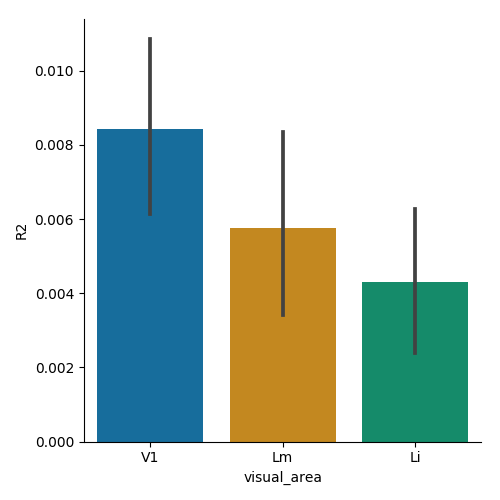

ols_by-session_fit-responses_R2


In [890]:
#pl.figure()

sns.catplot(x='visual_area', y='R2', data=R2_by_session, order=['V1', 'Lm', 'Li'], kind='bar', 
           palette='colorblind')

fit_str = 'residuals' if fit_residuals else 'responses'
figname = 'ols_by-session_fit-%s_%s'  % (fit_str, metric)
pl.savefig(os.path.join(outdir, '%s_bar.svg' % figname))
pl.savefig(os.path.join(outdir, '%s_bar.png' % figname))

print(figname)


## Stats?

In [836]:
import statsmodels.stats.multicomp as ml


In [837]:
c1 = R2_by_session[R2_by_session['visual_area']=='V1']['R2']
c2 = R2_by_session[R2_by_session['visual_area']=='Lm']['R2']
c3 = R2_by_session[R2_by_session['visual_area']=='Li']['R2']
print(c1.shape, c2.shape, c3.shape)

# Shapiro-Wilk normality test 
spstats.shapiro(c1), spstats.shapiro(c2), spstats.shapiro(c3) 

# Shapiro-Wilk normality test 
spstats.shapiro(c1), spstats.shapiro(c2), spstats.shapiro(c3) 

F, p = spstats.f_oneway(c1, c2, c3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

scores = np.hstack([c1, c2, c3])
groups = np.hstack([['V1' for _ in range(len(c1))], 
                   ['Lm' for _ in range(len(c2))],
                   ['Li' for _ in range(len(c3))]])
#print(scores.shape)
#print(groups.shape)


# Note that data in sheet have been preformatted in Group and Score columns 
# Boolean values refer to whether we should reject the null hypothesis (H0) that
# the means of the tested pair are statistically similar (non-significant differences)

mcobj = ml.MultiComparison(scores, groups)
out = mcobj.tukeyhsd(0.05) 

print(out)

((10,), (11,), (11,))
F statistic = 3.314 and probability p = 0.051
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  Li     Lm   -0.0022  -0.0103 0.0059 False 
  Li     V1    0.0062  -0.0021 0.0144 False 
  Lm     V1    0.0084   0.0001 0.0166  True 
--------------------------------------------


#### Collapse all neurons

In [526]:
R2_f.groupby(['visual_area']).mean()

R2      pval
visual_area                    
Li           0.011168  0.189322
Lm           0.006915  0.230240
V1           0.015832  0.128729

In [844]:
R2_f['sig'] = [1 if p<0.05 else 0 for p in R2_f['pval']]
R2_f[R2_f['sig']==1].groupby(['visual_area']).mean()

R2      pval  sig
visual_area                         
Li           0.018526  0.006598    1
Lm           0.013481  0.006770    1
V1           0.022863  0.004224    1

<IPython.core.display.Javascript object>


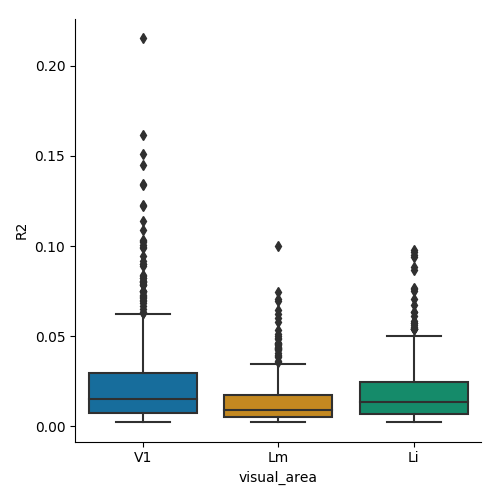

residuals


In [851]:
#fig, ax = pl.subplots(1,2, figsize=(10,4))
sns.catplot(x='visual_area', y='R2', kind='box',
            data=R2_f[R2_f['sig']==1], palette='colorblind', order=['V1', 'Lm', 'Li'],
            #hue='sig',
            height=5, legend_out=False) #ax[0]) #, ax=ax) #, ax=ax) #color='k', alpha=0.1, ax=ax)

pl.ylabel('R2')

#pl.show()

pl.savefig(os.path.join(outdir, 'ols_collapse-sessions_fit-%s_box.png' % fit_str))
print(fit_str)

# Ridge

In [539]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer, quantile_transform
#from sklearn.compose import TransformedTargetRegressor
import sklearn.metrics as skmetrics #import median_absolute_error, r2_score



In [531]:
import sklearn
sklearn.__version__

'0.19.1'

In [532]:
datakey

'20190616_JC097_fov1_blobs'

In [305]:
neuraldf = DATA[datakey]['neural']
pupildf = DATA[datakey]['pupil']
session, animalid, fovn, cexp = datakey.split('_')
fovnum = int(fovn[3:])
visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]

# Split test set
curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
train_x = neuraldf[curr_rois].iloc[0::2]
test_x = neuraldf[curr_rois].iloc[1::2]
train_y = pupildf['pupil'].iloc[0::2]
test_y = pupildf['pupil'].iloc[1::2]

scaler = StandardScaler().fit(train_x.values)


In [307]:
ridge = Ridge(normalize=False)

# Grid search
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
n_folds = None
grid = GridSearchCV(ridge, params, scoring='mean_squared_error') #, 
                          #cv=None, store_cv_values=True)
grid.fit(scaler.transform(train_x), train_y)

# summarize results
#grid_results.append(pd.DataFraem('datakey': datake grid.best_score_)
print(grid.best_estimator_.alpha)

10.0


/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error 

In [533]:
# f_MODELS = {}
# f_R2list = []
grid_results = []
for di, datakey in enumerate(DATA.keys()):
    neuraldf = DATA[datakey]['neural']
    pupildf = DATA[datakey]['pupil']
    session, animalid, fovn, cexp = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    
    # Split test set
    curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
    train_x = neuraldf[curr_rois].iloc[0::2]
    test_x = neuraldf[curr_rois].iloc[1::2]
    train_y = pupildf['pupil'].iloc[0::2]
    test_y = pupildf['pupil'].iloc[1::2]
    scaler = StandardScaler().fit(train_x.values)
    
    # Grid search
    params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
    n_folds = None
    ridge = Ridge(normalize=False)
    grid = GridSearchCV(ridge, params, scoring='neg_mean_squared_error') #, 
                              #cv=None, store_cv_values=True)
    grid.fit(scaler.transform(train_x), train_y)
    
    grid_results.append(pd.DataFrame({'visual_area': visual_area,
                         'datakey': datakey,
                         'best_alpha': grid.best_estimator_.alpha,
                          'best_mse': grid.best_score_}, index=[di]) )
    
grid_results = pd.concat(grid_results, axis=0)

#     f_MODELS[datakey] = {'data': {'train_x': train_x, 
#                                   'train_y': train_y,
#                                   'test_x': test_x,
#                                   'test_y': test_y},
#                          'grid_results': grid}
                          
    
#     ols, R2 = fit_linear_model_per_roi(pupildf, neuraldf,
                                       
#                                visual_area=visual_area, datakey=datakey,
#                                indepvar_x='pupildiam')
#     f_MODELS[datakey] = ols
#     f_R2list.append(R2)
# R2_f = pd.concat(f_R2list, axis=0)
# R2_f['sig'] = [1 if p<0.01 else 0 for p in R2_f['pval']]


In [534]:
grid_results.groupby(['visual_area']).mean()

best_alpha   best_mse
visual_area                       
Li                 10.0 -37.051330
Lm                 10.0 -18.919736
V1                 10.0 -19.401806

In [535]:
datakey

'20190616_JC097_fov1_blobs'

In [536]:
neuraldf = DATA[datakey]['neural']
pupildf = DATA[datakey]['pupil']
session, animalid, fovn, cexp = datakey.split('_')
fovnum = int(fovn[3:])
visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]

# Split test set
curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
train_x = neuraldf[curr_rois].iloc[0::2]
test_x = neuraldf[curr_rois].iloc[1::2]
train_y = pupildf['pupil'].iloc[0::2]
test_y = pupildf['pupil'].iloc[1::2]
scaler = StandardScaler().fit(train_x.values)

# Grid search
#params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
#n_folds = None
ridge = RidgeCV(normalize=False, cv=None, store_cv_values=True)
# ridge = TransformedTargetRegressor(
#     regressor=RidgeCV(),
#     transformer=QuantileTransformer(n_quantiles=300,
#                                     output_distribution='normal'))
#regr_trans.fit(X_train, y_train)

ridge.fit(scaler.transform(train_x), train_y)
prediction = ridge.predict(scaler.transform(test_x))
R2_score = ridge.score(scaler.transform(test_x), test_y)
print(R2_score)

0.194060702115


In [434]:
prediction.shape

(749,)

<IPython.core.display.Javascript object>


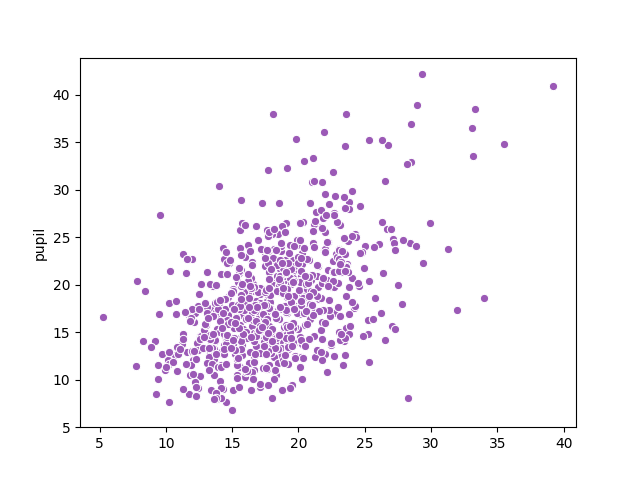

In [435]:
pl.figure()
sns.scatterplot(prediction, test_y)

In [191]:
train_x.shape

(750, 188)

In [877]:
fit_residuals = False

data_type = 'residuals_' if fit_residuals else ''
ridge_results = []
for di, datakey in enumerate(DATA.keys()):
    neuraldf = DATA[datakey]['%sneural' % data_type]
    pupildf = DATA[datakey]['%spupil' % data_type]
    session, animalid, fovn, cexp = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    
    # Split test set
    curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
    train_x = neuraldf[curr_rois].iloc[0::2]
    test_x = neuraldf[curr_rois].iloc[1::2]
    train_y = pupildf['pupil'].iloc[0::2]
    test_y = pupildf['pupil'].iloc[1::2]
    scaler = StandardScaler().fit(train_x.values)

    # Grid search
    regr_ridge = RidgeCV(normalize=False, cv=None, store_cv_values=False, gcv_mode='svd')
    regr_ridge.fit(scaler.transform(train_x), train_y)
    prediction = regr_ridge.predict(scaler.transform(test_x))
    R2_score = regr_ridge.score(scaler.transform(test_x), test_y)
    MAE =  skmetrics.median_absolute_error(test_y, prediction)
    #print(R2_score)
    r, pval = spstats.pearsonr(test_y, prediction)
    
    ridge_results.append(pd.DataFrame({'visual_area': visual_area,
                                      'datakey': datakey,
                                       'MAE': MAE,
                                      'R2': R2_score, 
                                       'pearson_r': r,
                                       'p_value': pval}, index=[di]) )
                        
    
ridge_results = pd.concat(ridge_results, axis=0)

In [ ]:
Train ridge regression model for each dataset, then calculate pearson's corr for predicted versus true pupil size. Bars show mean (+/- std) pearson's r of datasets by visual area.

<IPython.core.display.Javascript object>


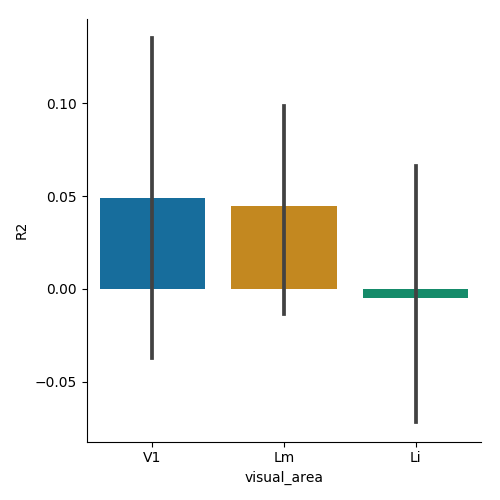

ridge_fit-responses_R2


In [891]:
#fig, ax = pl.subplots()

#R2_f['sig'] = [1 if p<0.01 else 0 for p in R2_f['pval']]
#R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]
metric = 'R2'

sns.catplot(x='visual_area', y=metric, palette='colorblind', order=['V1', 'Lm', 'Li'], kind='bar', 
           data=ridge_results[ridge_results['p_value']<0.05]) #, 
            #alpha=0.5, height=5, legend_out=False, ax=ax) #, ax=ax) #color='k', alpha=0.1, ax=ax)

pl.ylabel(metric)
#pl.xticks([])
#pl.xlabel('')

#pl.subplots_adjust(right=0.9)
label_figure(fig, datakey)

fit_str = 'residuals' if fit_residuals else 'responses'
figname = 'ridge_fit-%s_%s'  % (fit_str, metric)
pl.savefig(os.path.join(outdir, '%s_bar.svg' % figname))
pl.savefig(os.path.join(outdir, '%s_bar.png' % figname))

print(figname)

#### Stats

In [879]:
c1 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='V1')]['R2']
c2 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='Lm')]['R2']
c3 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='Li')]['R2']
print(c1.shape, c2.shape, c3.shape)

((9,), (7,), (8,))


In [880]:
F, p = spstats.f_oneway(c1, c2, c3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

scores = np.hstack([c1, c2, c3])
groups = np.hstack([['V1' for _ in range(len(c1))], 
                   ['Lm' for _ in range(len(c2))],
                   ['Li' for _ in range(len(c3))]])
#print(scores.shape)
#print(groups.shape)


# Note that data in sheet have been preformatted in Group and Score columns 
# Boolean values refer to whether we should reject the null hypothesis (H0) that
# the means of the tested pair are statistically similar (non-significant differences)

mcobj = ml.MultiComparison(scores, groups)
out = mcobj.tukeyhsd(0.05) 

print(out)

F statistic = 0.504 and probability p = 0.611
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  Li     Lm    0.0497  -0.1066 0.206  False 
  Li     V1    0.0537   -0.093 0.2005 False 
  Lm     V1    0.004   -0.1482 0.1562 False 
--------------------------------------------


<IPython.core.display.Javascript object>


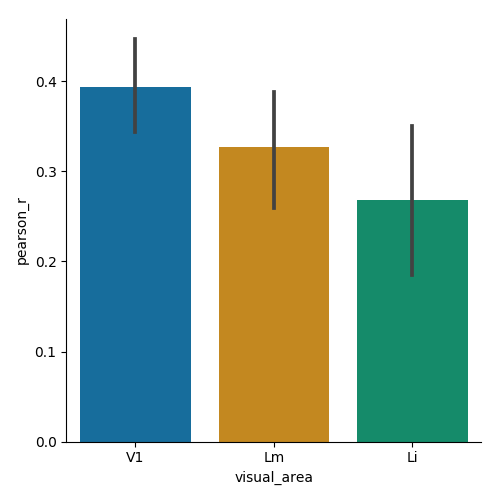

ridge_fit-responses_pearson_r


In [884]:
metric = 'pearson_r'

sns.catplot(x='visual_area', y=metric, palette='colorblind', order=['V1', 'Lm', 'Li'], kind='bar', #['V1', 'Lm', 'Li'],
         data=ridge_results[ridge_results['p_value']<0.01]) #, 

#sns.catplot(x='visual_area', y='R2', data=R2_by_session, order=['V1', 'Lm', 'Li'], kind='bar', 
#           palette='colorblind')
pl.ylabel(metric)
#pl.xticks([])
#pl.xlabel('')


fit_str = 'residuals' if fit_residuals else 'responses'
figname = 'ridge_fit-%s_%s'  % (fit_str, metric)
pl.savefig(os.path.join(outdir, '%s_bar.svg' % figname))
pl.savefig(os.path.join(outdir, '%s_bar.png' % figname))
print(figname)

In [885]:
c1 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='V1')]['pearson_r']
c2 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='Lm')]['pearson_r']
c3 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='Li')]['pearson_r']
print(c1.shape, c2.shape, c3.shape)
F, p = spstats.f_oneway(c1, c2, c3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

scores = np.hstack([c1, c2, c3])
groups = np.hstack([['V1' for _ in range(len(c1))], 
                   ['Lm' for _ in range(len(c2))],
                   ['Li' for _ in range(len(c3))]])
#print(scores.shape)
#print(groups.shape)


# Note that data in sheet have been preformatted in Group and Score columns 
# Boolean values refer to whether we should reject the null hypothesis (H0) that
# the means of the tested pair are statistically similar (non-significant differences)

mcobj = ml.MultiComparison(scores, groups)
out = mcobj.tukeyhsd(0.05) 

print(out)


((9,), (7,), (8,))
F statistic = 4.098 and probability p = 0.031
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  Li     Lm    0.081   -0.0573 0.2194 False 
  Li     V1    0.1476   0.0177 0.2775  True 
  Lm     V1    0.0665  -0.0682 0.2013 False 
--------------------------------------------


In [862]:
ridge_results.head()

MAE        R2                    datakey       p_value  pearson_r  \
0  2.613698 -0.031679  20190603_JC080_fov1_blobs  5.868247e-16   0.290538   
1  2.953203  0.273875  20190420_JC076_fov1_blobs  4.219522e-50   0.545008   
2  1.655002  0.174962  20190525_JC084_fov1_blobs  2.398629e-39   0.453650   
3  2.314208  0.091428  20190612_JC099_fov1_blobs  3.526848e-25   0.365930   
4  3.589200 -0.130418  20191006_JC110_fov1_blobs  4.863452e-01   0.024269   

  visual_area  
0          Lm  
1          V1  
2          Lm  
3          Li  
4          V1

# Fano Factor

In [241]:
datakey

'20190616_JC097_fov1_blobs'

In [423]:
fano_dfs = []
neuraldf = DATA[datakey]['neural']
pupildf = DATA[datakey]['pupil']
print(neuraldf.shape)
curr_rois = neuraldf.columns.tolist()
for rid in curr_rois:
    fano_factor = np.array([np.var(abs(neuraldf[rid].loc[g.index]), ddof=1) / np.nanmean(abs(neuraldf[rid].loc[g.index])) \
                     for cfg, g in pupildf.groupby(['config'])])

    response_mag = np.array([np.nanmean(abs(neuraldf[rid].loc[g.index])) for cfg, g in pupildf.groupby(['config'])])
    #print(response_mag.shape, fano_factor.shape)
    
    fdf = pd.DataFrame({'fano_factor': fano_factor,
                        'response_mag': response_mag,
                        'rid': [rid for _ in np.arange(0, len(fano_factor))]})
    fano_dfs.append(fdf)

(1499, 188)


In [424]:
fano_df = pd.concat(fano_dfs, axis=0)

In [558]:
nrois = len(fano_df['rid'].unique())
colorlist = sns.color_palette('cubehelix', n_colors = nrois)
roi_colors = dict((r, col) for r, col in zip(fano_df['rid'].unique(), colorlist))

In [562]:
sorted_ixs = np.argsort(g['response_mag'])



<IPython.core.display.Javascript object>


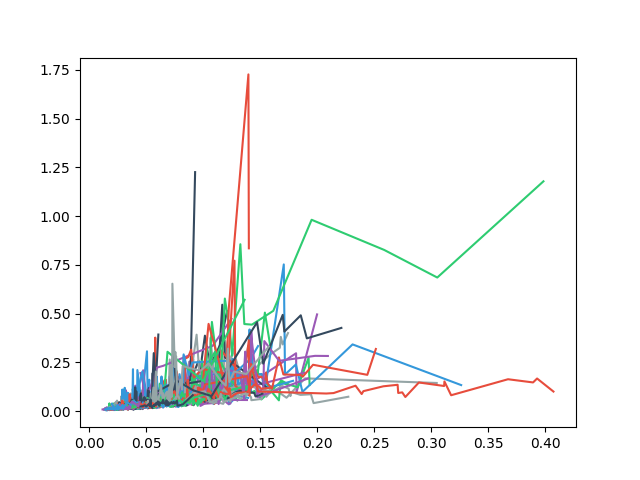

In [567]:
pl.figure()
for rid, g in fano_df.groupby(['rid']):
    sorted_ixs = np.argsort(g['response_mag'])
    pl.plot(g['response_mag'][sorted_ixs], g['fano_factor'][sorted_ixs]) #, color=roi_colors[rid])
#sns.scatterplot(x='response_mag', y='fano_factor', hue='rid', palette='hsv', data=fano_df)

In [421]:
g.shape

(50, 3)

In [367]:
neuraldf.shape

(1499, 188)

In [342]:
fanos = []
for cfg, g in pupildf.groupby(['config']):
    ff_pupil = [float( np.var(g['pupil'], ddof=1) / np.nanmean(g[['pupil']]) ) \
                for cfg, g in pupildf.groupby(['config'])]
    
    ff_neural = [np.var(abs(neuraldf[rid].loc[g.index]), ddof=1) / np.nanmean(abs(neuraldf[rid].loc[g.index]))\
                 for cfg, g in pupildf.groupby(['config'])]
    
    nrois = len(ff_neural)
    fanos.append( pd.DataFrame({'config': [cfg for _ in np.arange(nrois)],
                  'ff_pupil': [ff_pupil for _ in np.arange(nrois)],
                  'ff_neural': ff_neural,
                  'roi': neuraldf.columns.tolist()}) )
    
fanos = pd.concat(fanos, axis=0)

In [374]:
fit_residuals = True

data_type = 'residuals_' if fit_residuals else ''
#for di, datakey in enumerate(DATA.keys()):
neuraldf = DATA[datakey]['%sneural' % data_type]
pupildf = DATA[datakey]['%spupil' % data_type]
session, animalid, fovn, cexp = datakey.split('_')
fovnum = int(fovn[3:])
visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]


<IPython.core.display.Javascript object>


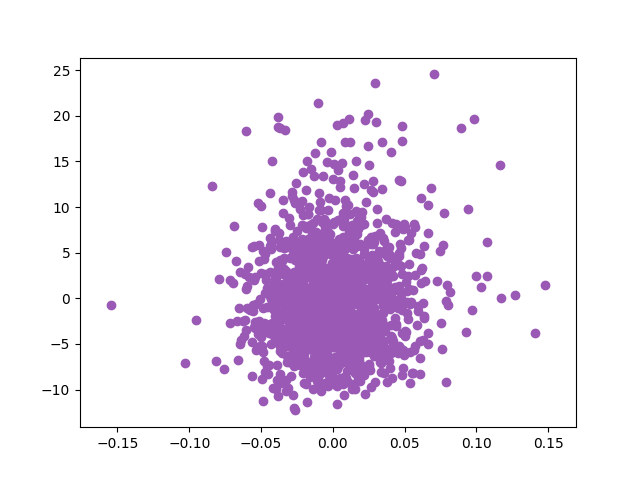

In [379]:
pl.figure()
pl.scatter(neuraldf[rid], pupildf['pupil'])


In [389]:
print(rid)
ff_pupil = float( np.var(abs(pupildf['pupil']), ddof=1) / np.nanmean(abs(pupildf['pupil'])) )

ff_neural = float( np.var(abs(neuraldf[rid]), ddof=1) / np.nanmean(abs(neuraldf[rid])) )

print(rid, ff_pupil, ff_neural)

431
(431, 2.853716963408797, 0.016341970374077086)


In [390]:
curr_rois = neuraldf.columns.tolist()
ff_neurals = [float( np.var(abs(neuraldf[rid]), ddof=1) / np.nanmean(abs(neuraldf[rid])) ) \
 for rid in curr_rois]


<IPython.core.display.Javascript object>


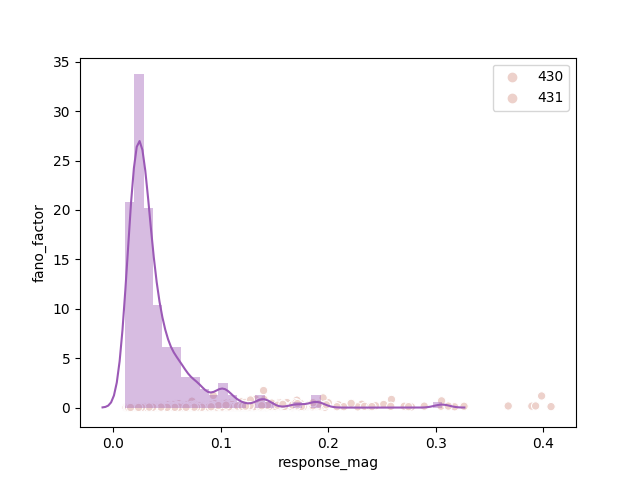

In [392]:
pl.figure()
sns.distplot(ff_neurals)

In [373]:
len(ff_pupil), len(ff_neural)

(50, 50)

In [353]:
ff_neural

ff_neural  ff_pupil
roi config                        
90  config001   0.021902  1.651433
    config002   0.020529  1.284894
    config003   0.019403  1.800445
    config004   0.018906  2.473949
    config005   0.016051  0.968366
    config006   0.031666  1.246181
    config007   0.060472  1.829322
    config008   0.039056  1.549972
    config009   0.058407  2.145511
    config010   0.021684  1.387653
    config011   0.064109  1.622180
    config012   0.071483  1.183094
    config013   0.047775  1.329624
    config014   0.049043  1.364685
    config015   0.043814  1.692130
    config016   0.047894  1.307047
    config017   0.083515  1.820424
    config018   0.092135  1.629192
    config019   0.043616  1.069145
    config020   0.031477  2.188173
    config021   0.065968  1.447792
    config022   0.071349  2.078376
    config023   0.075133  1.539280
    config024   0.090707  4.287219
    config025   0.028993  1.470476
    config026   0.063267  1.570605
    config027   0.077263  1.255422
    config028   0.093379  2.061260
    config029   0.096978  1.316704
    config030   0.030043  1.603102
    config031   0.040861  1.840564
    config032   0.053224  0.983299
    config033   0.057630  2.965408
    config034   0.060198  2.820902
    config035   0.049017  1.900978
    config036   0.046137  1.550385
    config037   0.037928  1.662427
    config038   0.075614  1.649709
    config039   0.077097  0.819739
    config040   0.044265  1.964044
    config041   0.052288  2.448013
    config042   0.057330  2.141988
    config043   0.059148  1.629000
    config044   0.058845  1.756102
    config045   0.087468  1.014411
    config046   0.099958  2.390653
    config047   0.056967  2.123924
    config048   0.038620  2.213379
    config049   0.125657  0.807814
    config050   0.073348  1.289718

In [345]:
np.var(abs(neuraldf[90].loc[g.index])) / abs(neuraldf[90].loc[g.index]).mean()

0.070903083787223153

<IPython.core.display.Javascript object>


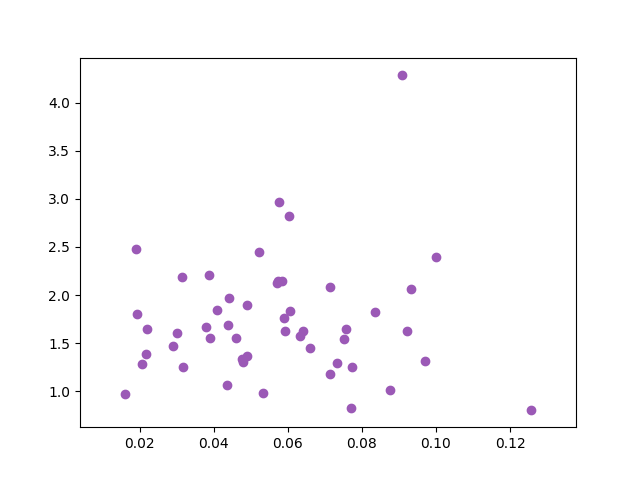

(0.047842244664200118, 0.74145414169491475)


In [355]:
pl.figure()
pl.scatter(avgs['ff_neural'].values, avgs['ff_pupil'].values)

pearson_r, p_value = spstats.pearsonr(avgs['ff_neural'].values, avgs['ff_pupil'].values)
print(pearson_r, p_value)

In [ ]:
fit_residuals = True

data_type = 'residuals_' if fit_residuals else ''
ridge_results = []
for di, datakey in enumerate(DATA.keys()):
    neuraldf = DATA[datakey]['%sneural' % data_type]
    pupildf = DATA[datakey]['%spupil' % data_type]
    session, animalid, fovn, cexp = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    
    # Split test set
    curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
    train_x = neuraldf[curr_rois].iloc[0::2]
    test_x = neuraldf[curr_rois].iloc[1::2]
    train_y = pupildf['pupil'].iloc[0::2]
    test_y = pupildf['pupil'].iloc[1::2]
    scaler = StandardScaler().fit(train_x.values)

    # Grid search
    regr_ridge = RidgeCV(normalize=False, cv=5, store_cv_values=False, gcv_mode='svd')
    regr_ridge.fit(scaler.transform(train_x), train_y)
    prediction = regr_ridge.predict(scaler.transform(test_x))
    R2_score = regr_ridge.score(scaler.transform(test_x), test_y)
    #print(R2_score)
    r, pval = spstats.pearsonr(test_y, prediction)
    
    ridge_results.append(pd.DataFrame({'visual_area': visual_area,
                                      'datakey': datakey,
                                      'R2': R2_score, 
                                       'pearson_r': r,
                                       'p_value': pval}, index=[di]) )
                        
    
ridge_results = pd.concat(ridge_results, axis=0)

In [222]:
DATA[datakey].keys()

['residuals_pupil', 'pupil', 'residuals_neural', 'neural']

<IPython.core.display.Javascript object>


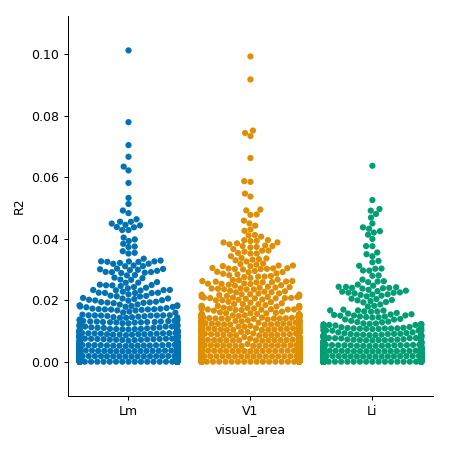

In [704]:
#fig, ax = pl.subplots()

R2_f['sig'] = [1 if p<0.05 else 0 for p in R2_f['pval']]
#R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]

sns.catplot(x='visual_area', y='R2', kind='swarm', palette='colorblind', #hue='sig', 
            data=R2_f) #, ax=ax) #color='k', alpha=0.1, ax=ax)
pl.ylabel('R2')
#pl.xticks([])
#pl.xlabel('')

label_figure(fig, datakey)

# Filter

# Get eyetracker acquisition info

# Get pupil residuals

In [649]:
residuals_pupil = pupilstats.copy()
for c, g in pupilstats.groupby(['config']):
    residuals_pupil['pupil'][g.index] = pupilstats.loc[g.index]['pupil'] - pupilstats.loc[g.index]['pupil'].mean()

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [555]:
plot_residuals = False

if plot_residuals:
    fig, ax = pl.subplots() #pl.figure()
    for c, g in residuals_pupil.groupby(['config']):
        ax.plot(g['pupil'].dropna(), alpha=0.5)


In [554]:
# for config, g in trial_key.groupby(['config']):
#    print(g.shape)

# Get neural responses and residuals

In [561]:
R2_all[R2_all['datakey']==datakey].shape

(141, 5)

In [608]:
residuals_neural = DATA[datakey]['residuals_neural']
residuals_pupil = DATA[datakey]['residuals_pupil']
responsive_cells = residuals_neural.columns.tolist()
print(len(responsive_cells))

141


In [609]:
pupil_values = residuals_pupil.sort_values(by='trial')['pupil']

In [610]:
residuals_pupil.head()

config     pupil  trial
0  config025  2.946112    1.0
1  config024 -0.233637    2.0
2  config046 -1.472992    3.0
3  config013  0.046228    4.0
4  config002 -2.872295    5.0

In [611]:
residuals_neural.shape

(1582, 141)

In [641]:
#dropped_ = np.where(np.isnan(pupil_values))[0]
#keep_ = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])

dropped_ = [i for i in pupil_values.index.tolist() if np.isnan(i)]
keep_ = np.array([i for i in pupil_values.index.tolist() if i not in dropped_])

print("N Nans:", len(dropped_))
print("N keep:", len(keep_))


('N Nans:', 0)
('N keep:', 1582)


In [642]:
dropped_ixs = np.where(np.isnan(pupil_values))[0]
dropped_trs = np.array([i for i in pupil_values.index.tolist() if np.isnan(i)])

keep_ixs = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])
keep_trs = np.array([i for i in pupil_values.index.tolist() if i not in dropped_trs])


In [644]:
#xdf = residuals_neural.iloc[keep_].copy()
xdf = residuals_neural.loc[keep_].copy()
xdf['pupildiam'] = pupil_values[keep_].copy()


In [651]:
residuals_neural.shape

(1582, 141)

In [650]:
max(keep_)

1581

In [645]:
xdf.head()

0         1         4         6         7        13        22  \
0  0.536666 -0.242237  0.276863  0.552535 -0.051407 -0.180313  0.003977   
1  0.359389  0.034676 -0.091373  0.006093 -0.074069 -0.110579 -0.027672   
2 -0.356232  0.131639 -0.154972 -0.075936 -0.060184  0.038357  0.067955   
3  1.019509 -0.061945  0.136980  0.186179  0.018295 -0.042643 -0.115071   
4 -0.061467  0.015477 -0.027016 -0.111911 -0.088562  0.122120  0.099153   

         24        25        27    ...           254       258       259  \
0 -0.036779  0.138382  0.464793    ...      0.400809  0.327629  0.320027   
1 -0.039527 -0.088495  0.060424    ...      0.006097  0.355125 -0.053250   
2 -0.084018 -0.003566  0.101943    ...     -0.131290  0.047555 -0.027075   
3  0.257502  0.154710  0.168349    ...      0.008972  0.106587  0.125058   
4 -0.011372  0.211735  0.002475    ...     -0.025114 -0.040375  0.070321   

        260       261       264       265       269       270  pupildiam  
0  0.479045  0.832553 -0.082252  0.327724  0.164935 -0.010489   2.946112  
1 -0.151231 -0.093623  0.219817 -0.002453  0.077677 -0.022610  -0.233637  
2  0.033762 -0.081263 -0.079244 -0.027671  0.312830  0.123184  -1.472992  
3 -0.012447  0.229084 -0.010587  0.068795  0.032344 -0.049751   0.046228  
4  0.098636 -0.037986  0.127006  0.149954 -0.235430  0.014719  -2.872295  

[5 rows x 142 columns]

In [646]:
ols = {}
for rid in responsive_cells:
    roi_index = list(responsive_cells).index(rid)

    model = sm.OLS(xdf[rid], sm.add_constant(xdf['pupildiam']))
    modelfit = model.fit()
    #p = modelfit.params
    #modelfit.rquared

    ols[rid] = modelfit


In [647]:

R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                   'pval': [ols[rid].f_pvalue for rid in responsive_cells],
                   'datakey': [datakey for _ in np.arange(0, len(responsive_cells))],
                   'visual_area': [visual_area for _ in np.arange(0, len(responsive_cells))]})

In [648]:
model = sm.OLS(xdf[rid], sm.add_constant(xdf['pupildiam']))
modelfit = model.fit()
modelfit.params

const       NaN
pupildiam   NaN
dtype: float64

In [640]:
R2

R2                    datakey      pval visual_area
0    6.926331e-05  20190605_JC090_fov1_blobs  0.740822          V1
1    2.914088e-03  20190605_JC090_fov1_blobs  0.031795          V1
2    9.989896e-04  20190605_JC090_fov1_blobs  0.208949          V1
3    4.066685e-05  20190605_JC090_fov1_blobs  0.799924          V1
4    6.107157e-03  20190605_JC090_fov1_blobs  0.001867          V1
5    9.266029e-04  20190605_JC090_fov1_blobs  0.226255          V1
6    1.496540e-05  20190605_JC090_fov1_blobs  0.877810          V1
7    2.802830e-04  20190605_JC090_fov1_blobs  0.505789          V1
8    1.006246e-03  20190605_JC090_fov1_blobs  0.207302          V1
9    1.675616e-04  20190605_JC090_fov1_blobs  0.606919          V1
10   1.007033e-06  20190605_JC090_fov1_blobs  0.968187          V1
11   3.092700e-05  20190605_JC090_fov1_blobs  0.825077          V1
12   1.784242e-04  20190605_JC090_fov1_blobs  0.595494          V1
13   1.642839e-04  20190605_JC090_fov1_blobs  0.610459          V1
14   3.122885e-03  20190605_JC090_fov1_blobs  0.026237          V1
15   4.463822e-04  20190605_JC090_fov1_blobs  0.401036          V1
16   1.868385e-04  20190605_JC090_fov1_blobs  0.586946          V1
17   2.130309e-06  20190605_JC090_fov1_blobs  0.953743          V1
18   1.687747e-05  20190605_JC090_fov1_blobs  0.870303          V1
19   1.162727e-03  20190605_JC090_fov1_blobs  0.175233          V1
20   4.644560e-04  20190605_JC090_fov1_blobs  0.391661          V1
21   5.796077e-07  20190605_JC090_fov1_blobs  0.975862          V1
22   6.327365e-03  20190605_JC090_fov1_blobs  0.001544          V1
23   1.640784e-03  20190605_JC090_fov1_blobs  0.107286          V1
24   7.058357e-04  20190605_JC090_fov1_blobs  0.290941          V1
25   1.919080e-04  20190605_JC090_fov1_blobs  0.581916          V1
26   7.094030e-04  20190605_JC090_fov1_blobs  0.289725          V1
27   7.989020e-06  20190605_JC090_fov1_blobs  0.910559          V1
28   1.800788e-06  20190605_JC090_fov1_blobs  0.957467          V1
29   2.383724e-04  20190605_JC090_fov1_blobs  0.539453          V1
..            ...                        ...       ...         ...
111  1.327643e-03  20190605_JC090_fov1_blobs  0.147453          V1
112  6.482236e-04  20190605_JC090_fov1_blobs  0.311525          V1
113  9.141153e-04  20190605_JC090_fov1_blobs  0.229412          V1
114  4.295371e-05  20190605_JC090_fov1_blobs  0.794498          V1
115  4.401771e-04  20190605_JC090_fov1_blobs  0.404329          V1
116  1.363014e-02  20190605_JC090_fov1_blobs  0.000003          V1
117  5.090282e-03  20190605_JC090_fov1_blobs  0.004524          V1
118  1.470667e-05  20190605_JC090_fov1_blobs  0.878862          V1
119  2.783511e-05  20190605_JC090_fov1_blobs  0.833917          V1
120  1.447768e-04  20190605_JC090_fov1_blobs  0.632496          V1
121  1.613095e-04  20190605_JC090_fov1_blobs  0.613709          V1
122  5.810567e-03  20190605_JC090_fov1_blobs  0.002414          V1
123  2.221458e-04  20190605_JC090_fov1_blobs  0.553594          V1
124  6.265142e-04  20190605_JC090_fov1_blobs  0.319769          V1
125  1.067050e-06  20190605_JC090_fov1_blobs  0.967253          V1
126  1.461506e-07  20190605_JC090_fov1_blobs  0.987878          V1
127  2.063966e-04  20190605_JC090_fov1_blobs  0.568002          V1
128  5.212958e-04  20190605_JC090_fov1_blobs  0.364129          V1
129  2.255283e-03  20190605_JC090_fov1_blobs  0.058966          V1
130  1.107018e-05  20190605_JC090_fov1_blobs  0.894800          V1
131  9.227109e-07  20190605_JC090_fov1_blobs  0.969547          V1
132  8.380753e-04  20190605_JC090_fov1_blobs  0.249823          V1
133  6.579052e-04  20190605_JC090_fov1_blobs  0.307937          V1
134  2.753761e-05  20190605_JC090_fov1_blobs  0.834794          V1
135  2.757179e-04  20190605_JC090_fov1_blobs  0.509275          V1
136  4.770073e-04  20190605_JC090_fov1_blobs  0.385335          V1
137  3.457827e-06  20190605_JC090_fov1_blobs  0.941088          V1
138  3.170901e-05  20190605_JC090_fov1_blobs  0.822915        

In [551]:
# Get nrois x ntrials array
roi_responses = pd.DataFrame(np.vstack([exp.data.traces.iloc[g.index].mean(axis=0)\
                                    for trial, g in labels.groupby(['trial'])]))

# Get responsive cells
responsive_cells, ncells_total = exp.get_responsive_cells(response_type='dff',\
                                                          responsive_test='ROC', responsive_thr=0.05)
print("%i out of %i cells pass responsive test." % (len(responsive_cells), ncells_total))
neuraldata = roi_responses[responsive_cells]


In [559]:
trial_configs = pd.DataFrame(np.vstack([g['config'].iloc[0]\
                                    for trial, g in labels.groupby(['trial'])]), columns=['config'])

config
0     config032
1     config031
2     config021
3     config020
4     config003
5     config043
6     config034
7     config005
8     config012
9     config009
10    config033
11    config008
12    config042
13    config044
14    config015
15    config017
16    config023
17    config013
18    config006
19    config024
20    config050
21    config002
22    config016
23    config039
24    config018
25    config019
26    config001
27    config014
28    config046
29    config029
...         ...
1470  config021
1471  config034
1472  config016
1473  config001
1474  config044
1475  config022
1476  config009
1477  config026
1478  config043
1479  config045
1480  config005
1481  config020
1482  config018
1483  config049
1484  config015
1485  config037
1486  config007
1487  config031
1488  config046
1489  config013
1490  config028
1491  config027
1492  config019
1493  config003
1494  config050
1495  config035
1496  config039
1497  config030
1498  config004
1499  config041

[1500 rows x 1 columns]

In [604]:
residuals_neural = neuraldata.copy()

for c, g in trial_configs.groupby(['config']):
    residuals_neural.loc[g.index] = neuraldata.loc[g.index] - neuraldata.loc[g.index].mean(axis=0)

In [606]:
ols, R2 = fit_linear_model(residuals_pupil, residuals_neural)


In [607]:
datakey, R2

('20190605_JC090_fov1_blobs',
                R2                    datakey      pval visual_area
 0    6.926331e-05  20190605_JC090_fov1_blobs  0.740822          V1
 1    2.914088e-03  20190605_JC090_fov1_blobs  0.031795          V1
 2    9.989896e-04  20190605_JC090_fov1_blobs  0.208949          V1
 3    4.066685e-05  20190605_JC090_fov1_blobs  0.799924          V1
 4    6.107157e-03  20190605_JC090_fov1_blobs  0.001867          V1
 5    9.266029e-04  20190605_JC090_fov1_blobs  0.226255          V1
 6    1.496540e-05  20190605_JC090_fov1_blobs  0.877810          V1
 7    2.802830e-04  20190605_JC090_fov1_blobs  0.505789          V1
 8    1.006246e-03  20190605_JC090_fov1_blobs  0.207302          V1
 9    1.675616e-04  20190605_JC090_fov1_blobs  0.606919          V1
 10   1.007033e-06  20190605_JC090_fov1_blobs  0.968187          V1
 11   3.092700e-05  20190605_JC090_fov1_blobs  0.825077          V1
 12   1.784242e-04  20190605_JC090_fov1_blobs  0.595494          V1
 13   1.642839e-04

# Regression on residuals

In [48]:
import statsmodels.api as sm
from pipeline.python.utils import label_figure

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [598]:
%matplotlib notebook

In [659]:
residuals_neural.shape

(1500, 100)

In [660]:
residuals_pupil.shape

(1500, 3)

In [661]:
residuals_pupil.head()

config     pupil  trial
0  config032  9.269252      1
1  config031  4.447400      2
2  config021  9.180851      3
3  config020  6.928909      4
4  config003  1.817075      5

In [664]:
pupil_values = residuals_pupil.sort_values(by='trial')['pupil']
dropped_ = np.where(np.isnan(pupil_values))[0]
keep_ = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])


In [676]:
# Look for 1 cell
neural_values = residuals_neural[responsive_cells[0]]

X = pupil_values[keep_].copy()
y = neural_values[keep_].copy()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.945
Date:                Sun, 09 Feb 2020   Prob (F-statistic):             0.0263
Time:                        22:25:16   Log-Likelihood:                 2288.8
No. Observations:                1471   AIC:                            -4574.
Df Residuals:                    1469   BIC:                            -4563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.100      0.9

In [678]:
xdf = residuals_neural.iloc[keep_].copy()
xdf['pupildiam'] = pupil_values[keep_].copy()

In [667]:

ols = {}
for rid in responsive_cells:
    roi_index = list(responsive_cells).index(rid)

    model = sm.OLS(xdf[rid], sm.add_constant(xdf[indepvar_x]))
    modelfit = model.fit()
    p = modelfit.params

    ols[rid] = modelfit


In [686]:
fig.get_facecolor()


(1.0, 1.0, 1.0, 0)

<IPython.core.display.Javascript object>


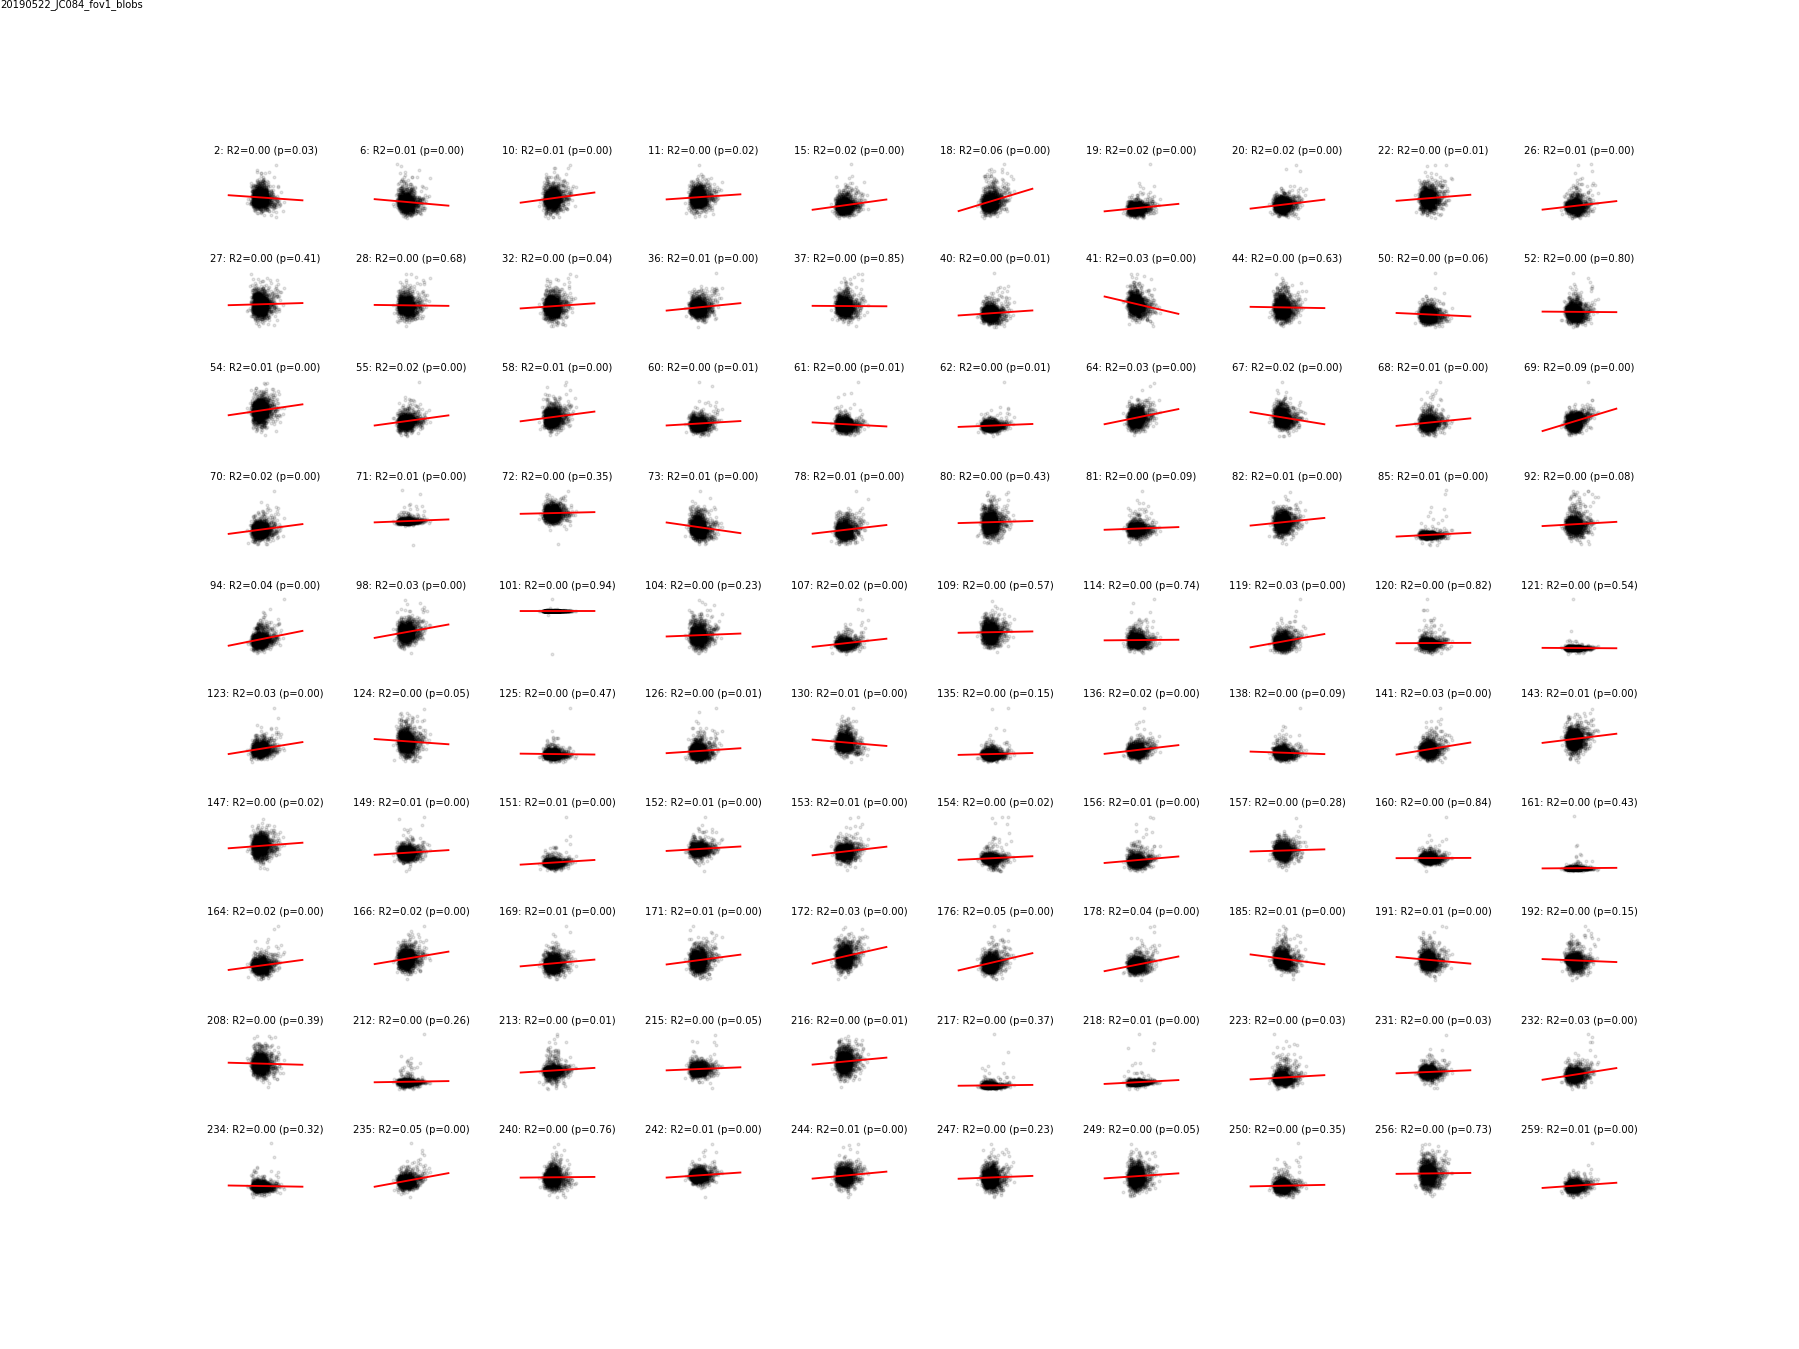

In [695]:
nr = 10
nc = 10

ai = 0
fig, axes = pl.subplots(nr, nc, figsize=(nc*2, nr*1.5))
fig.patch.set_alpha(1)

for rid in responsive_cells:
    ax = axes.flat[ai]
    roi_index = list(responsive_cells).index(rid)
    
    # scatter-plot data
    ax = xdf.plot(x=indepvar_x, y=rid, kind='scatter', alpha=0.1, s=5, c='k', ax=ax)
    #ax.scatter(x_test, y_test,  color='black', alpha=0.5, s=5)

    # generate x-values for your regression line (two is sufficient)
    vmin = xdf[indepvar_x].min()
    vmax = xdf[indepvar_x].max()
    vrange = vmax - vmin
    x = np.linspace(vmin-vrange*.5, vmax+vrange*.5, 3)

    # plot regression line on the same axes, set x-axis limits
    p = ols[rid].params
    ax.plot(x, p.const + p[indepvar_x] * x, color='r')
    #ax.set_xlim([1, 2])

    #modelfit.summary()

    statstr = 'R2=%.2f (p=%.2f)' % (ols[rid].rsquared, ols[rid].f_pvalue)
    #ax.set_title(statstr)

    ax.set_title('%i: %s' % (int(rid+1), statstr), fontsize=8)
    ax.axis('off')

    ai += 1
    
pl.subplots_adjust(hspace=0.8, wspace=0.8)
label_figure(fig, datakey)

[513,
 518,
 519,
 11,
 15,
 530,
 19,
 20,
 22,
 24,
 26,
 28,
 31,
 32,
 34,
 42,
 43,
 48,
 50,
 51,
 54,
 55,
 58,
 59,
 60,
 62,
 65,
 66,
 523,
 69,
 72,
 74,
 75,
 76,
 77,
 85,
 109,
 531,
 126,
 134,
 135,
 137,
 138,
 166,
 169,
 176,
 187,
 196,
 205,
 206,
 209,
 211,
 219,
 234,
 235,
 242,
 243,
 248,
 249,
 251,
 252,
 255,
 256,
 257,
 261,
 266,
 267,
 270,
 272,
 277,
 303,
 304,
 305,
 311,
 316,
 317,
 322,
 326,
 327,
 331,
 332,
 333,
 334,
 341,
 343,
 354,
 362,
 370,
 376,
 378,
 382,
 383,
 387,
 396,
 399,
 401,
 404,
 409,
 414,
 417,
 418,
 429,
 438,
 441,
 447,
 448,
 449,
 453,
 455,
 456,
 457,
 458,
 459,
 464,
 484,
 495,
 496,
 497,
 498,
 499,
 510,
 511]

In [790]:
responsive_cells = ols.keys()
R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                   'pval': [ols[rid].f_pvalue for rid in responsive_cells]})
R2['sig'] = [1 if p<0.05 else 0 for p in R2['pval']]
R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]

<IPython.core.display.Javascript object>


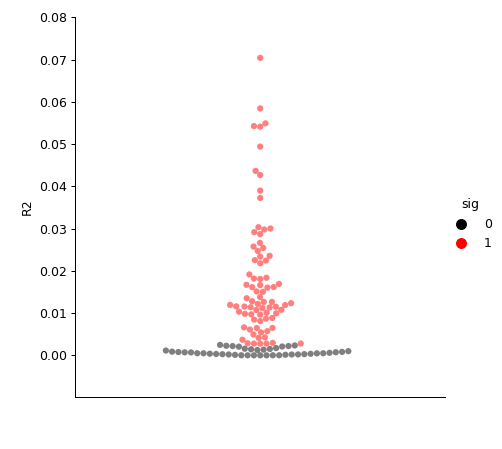

In [791]:

sns.catplot(x='empty', y='R2', kind='swarm', palette=['k', 'r'],
            hue='sig', data=R2, alpha=0.5) #, ax=ax) #color='k', alpha=0.1, ax=ax)
pl.ylabel('R2')
pl.xticks([])
pl.xlabel('')

label_figure(fig, datakey)

# Distribution of R2

In [702]:
R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                   'pval': [ols[rid].f_pvalue for rid in responsive_cells]})
R2['sig'] = [1 if p<0.05 else 0 for p in R2['pval']]

In [711]:
R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]

<IPython.core.display.Javascript object>


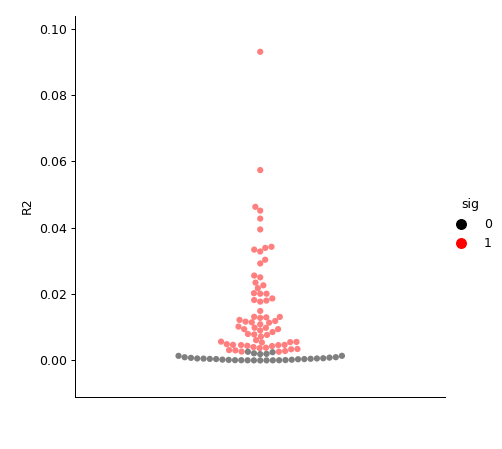

In [716]:

sns.catplot(x='empty', y='R2', kind='swarm', palette=['k', 'r'],
            hue='sig', data=R2, alpha=0.5) #, ax=ax) #color='k', alpha=0.1, ax=ax)
pl.ylabel('R2')
pl.xticks([])
pl.xlabel('')

label_figure(fig, datakey)



<IPython.core.display.Javascript object>


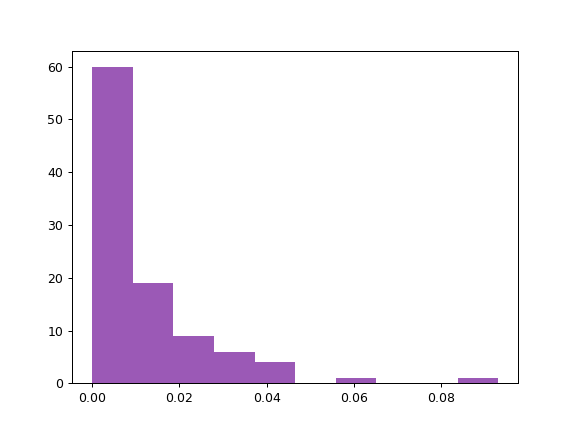

(array([ 60.,  19.,   9.,   6.,   4.,   0.,   1.,   0.,   0.,   1.]),
 array([  4.17311769e-06,   9.31060022e-03,   1.86170273e-02,
          2.79234544e-02,   3.72298815e-02,   4.65363086e-02,
          5.58427357e-02,   6.51491628e-02,   7.44555899e-02,
          8.37620170e-02,   9.30684441e-02]),
 <a list of 10 Patch objects>)

In [717]:
pl.figure()
pl.hist(R2['R2'])